In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy import stats

In [2]:
forests = pd.read_csv("C:/Users/Meijin/Desktop/Econometrics/forestfires.csv")
forests

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
5    8  6   aug  sun  92.3   85.3  488.0  14.7  22.2  29   5.4   0.0   0.00
6    8  6   aug  mon  92.3   88.9  495.6   8.5  24.1  27   3.1   0.0   0.00
7    8  6   aug  mon  91.5  145.4  608.2  10.7   8.0  86   2.2   0.0   0.00
8    8  6   sep  tue  91.0  129.5  692.6   7.0  13.1  63   5.4   0.0   0.00
9    7  5   sep  sat  92.5   88.0  698.6   7.1  22.8  40   4.0   0.0   0.00
10   7  5   sep  sat  92.5   88.0  698.6   7.1  17.8  51   7.2   0.0   0.00
11   7  5   sep  sat  92.8   73.2  713.0  22.6  19.3  38   4.0   0.0   0.00
12   6  5   aug  fri  63.5   70.8  665.3   0.8  17.0  72   6.7   0.0   0.00
13   6  5   sep  mon  90.9  126.5  686.5   7.0  21.3  42   2.2   0.0   0.00
14   6  5   sep  wed  92.9  133.3  699.6   9.2  26.4  21   4.5   0.0   0.00
15   6  5   sep  fri  93.3  141.2  713.9  13.9  22.9  44   5.4   0.0   0.00
16   5  5   mar  sat  91.7   35.8   80.8   7.8  15.1  27   5.4   0.0   0.00
17   8  5   oct  mon  84.9   32.8  664.2   3.0  16.7  47   4.9   0.0   0.00
18   6  4   mar  wed  89.2   27.9   70.8   6.3  15.9  35   4.0   0.0   0.00
19   6  4   apr  sat  86.3   27.4   97.1   5.1   9.3  44   4.5   0.0   0.00
20   6  4   sep  tue  91.0  129.5  692.6   7.0  18.3  40   2.7   0.0   0.00
21   5  4   sep  mon  91.8   78.5  724.3   9.2  19.1  38   2.7   0.0   0.00
22   7  4   jun  sun  94.3   96.3  200.0  56.1  21.0  44   4.5   0.0   0.00
23   7  4   aug  sat  90.2  110.9  537.4   6.2  19.5  43   5.8   0.0   0.00
24   7  4   aug  sat  93.5  139.4  594.2  20.3  23.7  32   5.8   0.0   0.00
25   7  4   aug  sun  91.4  142.4  601.4  10.6  16.3  60   5.4   0.0   0.00
26   7  4   sep  fri  92.4  117.9  668.0  12.2  19.0  34   5.8   0.0   0.00
27   7  4   sep  mon  90.9  126.5  686.5   7.0  19.4  48   1.3   0.0   0.00
28   6  3   sep  sat  93.4  145.4  721.4   8.1  30.2  24   2.7   0.0   0.00
29   6  3   sep  sun  93.5  149.3  728.6   8.1  22.8  39   3.6   0.0   0.00
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
487  5  4   aug  tue  95.1  141.3  605.8  17.7  26.4  34   3.6   0.0  16.40
488  4  4   aug  tue  95.1  141.3  605.8  17.7  19.4  71   7.6   0.0  46.70
489  4  4   aug  wed  95.1  141.3  605.8  17.7  20.6  58   1.3   0.0   0.00
490  4  4   aug  wed  95.1  141.3  605.8  17.7  28.7  33   4.0   0.0   0.00
491  4  4   aug  thu  95.8  152.0  624.1  13.8  32.4  21   4.5   0.0   0.00
492  1  3   aug  fri  95.9  158.0  633.6  11.3  32.4  27   2.2   0.0   0.00
493  1  3   aug  fri  95.9  158.0  633.6  11.3  27.5  29   4.5   0.0  43.32
494  6  6   aug  sat  96.0  164.0  643.0  14.0  30.8  30   4.9   0.0   8.59
495  6  6   aug  mon  96.2  175.5  661.8  16.8  23.9  42   2.2   0.0   0.00
496  4  5   aug  mon  96.2  175.5  661.8  16.8  32.6  26   3.1   0.0   2.77
497  3  4   aug  tue  96.1  181.1  671.2  14.3  32.3  27   2.2   0.0  14.68
498  6  5   aug  tue  96.1  181.1  671.2  14.3  33.3  26   2.7   0.0  40.54
499  7  5   aug  tue  96.1  181.1  671.2  14.3  27.3  63   4.9   6.4  10.82
500  8  6   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8   0.00
501  7  5   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8   0.00
502  4  4   aug  tue  96.1  181.1  671.2  14.3  20.7  69   4.9   0.4   0.00
503  2  4   aug  wed  94.5  139.4  689.1  20.0  29.2  30   4.9   0.0   1.95
504  4  3   aug  wed  94.5  139.4  689.1  20.0  28.9  29   4.9   0.0  49.59
505  1  2   aug  thu  91.0  163.2  744.4  10.1  26.7  35   1.8   0.0   5.80
506  1  2   aug  fri  91.0  166.9  752.6   7.1  18.5  73   8.5   0.0   0.00
507  2  4   aug  fri  91.0  166.9  752.6   7.1  25.9 

In [3]:
forests.shape

(517, 13)

## Данные

<ol>
<li> <b>$X$, $Y$</b> $-$ пространственные координаты на карте парка Монтезиньо, Португалия (<b>$X$</b> $-$ от $1$ до $9$, <b>$Y$</b> $-$ от $2$ до $9$);</li>
<li> <b>$month$</b> $-$ месяц года (январь, февраль, март, апрель, май, июнь, июль, август, сентябрь, октябрь, ноябрь, декабрь);</li>
<li> <b>$day$</b> $-$ день недели (понедельник, вторник, среда, четверг, пятница, суббота, воскресенье);</li>
<li> <b>$FFMC \ (Fine \ Fuel \ Moisture \ Code)$</b> $-$ индекс влажности мелких лесных горючих материалов: численный показатель влаги в мелком опаде и в других твердых мелких горючих материалах. Данный индекс (от $18.7$ до $96.20$) указывает на относительную легкость зажигания и воспламеняемости мелких горючих материалов;</li>
<li> <b>$DMC \ (Duff \ Moisture \ Code)$</b> $-$ индекс влажности подстилки и слаборазложившегося гумусового горизонта: численный показатель среднего содержания влаги неуплотненной органической подстилки на средней глубине. Этот индекс (от $1.1$ до $291.3$) отражает величину сгорающего горючего топлива и древесных материалов среднего размера в средних слоях подстилки;</li>
<li> <b>$DC \ (Drought\ Code)$</b> $-$ индекс засухи: численный показатель среднего содержания влаги в глубокой, уплотненной органической подстилке. Этот индекс (от $7.9$ до $860.6$) указывает на сезонное воздействие засухи на лесные горючие материалы и величину тления в глубокой подстилке и больших бревнах;</li>
<li> <b>$ISI \ (Initial \ Spread \ Index)$</b> $-$ индекс скорости распространения кромки пожара (от $0.0$ до $56.10$ $м/мин$);</li>
<li> <b>$temp$</b> $-$ температура воздуха (от $2.2$ до $33.30$ градусов Цельсия);</li> 
<li> <b>$RH \ (relative \ humidity)$</b>  $-$ относительная влажность воздуха (от $15.0$ до $100$ $\%$);</li> 
<li> <b>$wind$</b> $-$ скорость ветра (от $0.40$ до $9.40$ $км/ч$);</li>
<li> <b>$rain$</b> $-$ интенсивность дождя (от $0.0$ до $6.4$ $мм/м^{2}$);</li>  
<li> <b>$area$</b> $-$ площадь сгоревших лесов (от $0.00$ до $1090.84$ $га$)</li> 
</ol>

In [4]:
# Комментарий: определения соответствующих индексов даны в "Лесные пожары: методы и исследования" (Ходаков В.Е., Жарикова М.В.)

## Подготовка данных

In [5]:
forests_1 = forests.loc[forests["area"] != 0] # Выберем те строки, которые соответствуют ненулевым значениям целевой переменной area
forests_1

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain    area
138  9  9   jul  tue  85.8   48.3  313.4   3.9  18.0  42   2.7   0.0    0.36
139  1  4   sep  tue  91.0  129.5  692.6   7.0  21.7  38   2.2   0.0    0.43
140  2  5   sep  mon  90.9  126.5  686.5   7.0  21.9  39   1.8   0.0    0.47
141  1  2   aug  wed  95.5   99.9  513.3  13.2  23.3  31   4.5   0.0    0.55
142  8  6   aug  fri  90.1  108.0  529.8  12.5  21.2  51   8.9   0.0    0.61
143  1  2   jul  sat  90.0   51.3  296.3   8.7  16.6  53   5.4   0.0    0.71
144  2  5   aug  wed  95.5   99.9  513.3  13.2  23.8  32   5.4   0.0    0.77
145  6  5   aug  thu  95.2  131.7  578.8  10.4  27.4  22   4.0   0.0    0.90
146  5  4   mar  mon  90.1   39.7   86.6   6.2  13.2  40   5.4   0.0    0.95
147  8  3   sep  tue  84.4   73.4  671.9   3.2  24.2  28   3.6   0.0    0.96
148  2  2   aug  tue  94.8  108.3  647.1  17.0  17.4  43   6.7   0.0    1.07
149  8  6   sep  thu  93.7   80.9  685.2  17.9  23.7  25   4.5   0.0    1.12
150  6  5   jun  fri  92.5   56.4  433.3   7.1  23.2  39   5.4   0.0    1.19
151  9  9   jul  sun  90.1   68.6  355.2   7.2  24.8  29   2.2   0.0    1.36
152  3  4   jul  sat  90.1   51.2  424.1   6.2  24.6  43   1.8   0.0    1.43
153  5  4   sep  fri  94.3   85.1  692.3  15.9  20.1  47   4.9   0.0    1.46
154  1  5   sep  sat  93.4  145.4  721.4   8.1  29.6  27   2.7   0.0    1.46
155  7  4   aug  sun  94.8  108.3  647.1  17.0  16.4  47   1.3   0.0    1.56
156  2  4   sep  sat  93.4  145.4  721.4   8.1  28.6  27   2.2   0.0    1.61
157  2  2   aug  wed  92.1  111.2  654.1   9.6  18.4  45   3.6   0.0    1.63
158  2  4   aug  wed  92.1  111.2  654.1   9.6  20.5  35   4.0   0.0    1.64
159  7  4   sep  fri  92.4  117.9  668.0  12.2  19.0  34   5.8   0.0    1.69
160  7  4   mar  mon  90.1   39.7   86.6   6.2  16.1  29   3.1   0.0    1.75
161  6  4   aug  thu  95.2  131.7  578.8  10.4  20.3  41   4.0   0.0    1.90
162  6  3   mar  sat  90.6   50.1  100.4   7.8  15.2  31   8.5   0.0    1.94
163  8  6   sep  sat  92.5  121.1  674.4   8.6  17.8  56   1.8   0.0    1.95
164  8  5   sep  sun  89.7   90.0  704.4   4.8  17.8  67   2.2   0.0    2.01
165  6  5   mar  thu  84.9   18.2   55.0   3.0   5.3  70   4.5   0.0    2.14
166  6  5   aug  wed  92.1  111.2  654.1   9.6  16.6  47   0.9   0.0    2.29
167  6  5   aug  wed  96.0  127.1  570.5  16.5  23.4  33   4.5   0.0    2.51
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...     ...
471  4  3   may  fri  89.6   25.4   73.7   5.7  18.0  40   4.0   0.0   38.48
472  8  3   jun  mon  88.2   96.2  229.0   4.7  14.3  79   4.0   0.0    1.94
473  9  4   jun  sat  90.5   61.1  252.6   9.4  24.5  50   3.1   0.0   70.32
474  4  3   jun  thu  93.0  103.8  316.7  10.8  26.4  35   2.7   0.0   10.08
475  2  5   jun  thu  93.7  121.7  350.2  18.0  22.7  40   9.4   0.0    3.19
476  4  3   jul  thu  93.5   85.3  395.0   9.9  27.2  28   1.3   0.0    1.76
477  4  3   jul  sun  93.7  101.3  423.4  14.7  26.1  45   4.0   0.0    7.36
478  7  4   jul  sun  93.7  101.3  423.4  14.7  18.2  82   4.5   0.0    2.21
479  7  4   jul  mon  89.2  103.9  431.6   6.4  22.6  57   4.9   0.0  278.53
480  9  9   jul  thu  93.2  114.4  560.0   9.5  30.2  25   4.5   0.0    2.75
482  3  4   aug  sun  94.9  130.3  587.1  14.1  23.4  40   5.8   0.0    1.29
484  2  5   aug  sun  94.9  130.3  587.1  14.1  33.1  25   4.0   0.0   26.43
485  2  4   aug  mon  95.0  135.5  596.3  21.3  30.6  28   3.6   0.0    2.07
486  5  4   aug  tue  95.1  141.3  605.8  17.7  24.1  43   6.3   0.0    2.00
487  5  4   aug  tue  95.1  141.3  605.8  17.7  26.4  34   3.6   0.0   16.40
488  4  4   aug  tue  95.1  141.3  605.8  17.7  19.4  71   7.6   0.0   46.70
493  1  3   aug  fri  95.9  158.0  633.6  11.3  27.5  29   4.5   0.0   43.32
494  6  6   aug  sat  96.0  164.0  643.0  14.0  30.8  30   4.9   0.0    8.59
496  4  5   aug  mon  96.2  175.5  661.8  16.8  32.6  26   3.1   0.0    2.77
497  3  4   aug  tue  96.1  181.1  671.2  14.3  32.3  27   2.2   0.0   14.68
4

In [6]:
forests_1.shape

(270, 13)

In [7]:
forests_1["month"].unique()

array(['jul', 'sep', 'aug', 'mar', 'jun', 'apr', 'oct', 'feb', 'dec',
       'may'], dtype=object)

In [8]:
# Преобразуем категориальную переменную month

In [9]:
dummy_variables = pd.get_dummies(forests_1["month"], drop_first = True)
dummy_variables

aug  dec  feb  jul  jun  mar  may  oct  sep
138    0    0    0    1    0    0    0    0    0
139    0    0    0    0    0    0    0    0    1
140    0    0    0    0    0    0    0    0    1
141    1    0    0    0    0    0    0    0    0
142    1    0    0    0    0    0    0    0    0
143    0    0    0    1    0    0    0    0    0
144    1    0    0    0    0    0    0    0    0
145    1    0    0    0    0    0    0    0    0
146    0    0    0    0    0    1    0    0    0
147    0    0    0    0    0    0    0    0    1
148    1    0    0    0    0    0    0    0    0
149    0    0    0    0    0    0    0    0    1
150    0    0    0    0    1    0    0    0    0
151    0    0    0    1    0    0    0    0    0
152    0    0    0    1    0    0    0    0    0
153    0    0    0    0    0    0    0    0    1
154    0    0    0    0    0    0    0    0    1
155    1    0    0    0    0    0    0    0    0
156    0    0    0    0    0    0    0    0    1
157    1    0    0    0    0    0    0    0    0
158    1    0    0    0    0    0    0    0    0
159    0    0    0    0    0    0    0    0    1
160    0    0    0    0    0    1    0    0    0
161    1    0    0    0    0    0    0    0    0
162    0    0    0    0    0    1    0    0    0
163    0    0    0    0    0    0    0    0    1
164    0    0    0    0    0    0    0    0    1
165    0    0    0    0    0    1    0    0    0
166    1    0    0    0    0    0    0    0    0
167    1    0    0    0    0    0    0    0    0
..   ...  ...  ...  ...  ...  ...  ...  ...  ...
471    0    0    0    0    0    0    1    0    0
472    0    0    0    0    1    0    0    0    0
473    0    0    0    0    1    0    0    0    0
474    0    0    0    0    1    0    0    0    0
475    0    0    0    0    1    0    0    0    0
476    0    0    0    1    0    0    0    0    0
477    0    0    0    1    0    0    0    0    0
478    0    0    0    1    0    0    0    0    0
479    0    0    0    1    0    0    0    0    0
480    0    0    0    1    0    0    0    0    0
482    1    0    0    0    0    0    0    0    0
484    1    0    0    0    0    0    0    0    0
485    1    0    0    0    0    0    0    0    0
486    1    0    0    0    0    0    0    0    0
487    1    0    0    0    0    0    0    0    0
488    1    0    0    0    0    0    0    0    0
493    1    0    0    0    0    0    0    0    0
494    1    0    0    0    0    0    0    0    0
496    1    0    0    0    0    0    0    0    0
497    1    0    0    0    0    0    0    0    0
498    1    0    0    0    0    0    0    0    0
499    1    0    0    0    0    0    0    0    0
503    1    0    0    0    0    0    0    0    0
504    1    0    0    0    0    0    0    0    0
505    1    0    0    0    0    0    0    0    0
509    1    0    0    0    0    0    0    0    0
510    1    0    0    0    0    0    0    0    0
512    1    0    0    0    0    0    0    0    0
513    1    0    0    0    0    0    0    0    0
514    1    0    0    0    0    0    0    0    0

[270 rows x 9 columns]

In [10]:
# Комментарий: в таблице forests_1 представлены не все 12 месяцев - нет января, нет ноября. Поэтому переменная month
# принимает 10 значений. Необходимо избежать "ловушки дамми-переменных", приводящей к жесткой мультиколлинеарности:
# для этого мы "удалили" столбец для апреля ("apr").

In [11]:
forests_2 = pd.concat([forests_1, dummy_variables], axis = 1)
forests_2 # Конкатенация двух таблиц: таблицы forests_1 и таблицы, содержащей дамми-переменные

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  ...    area  aug  \
138  9  9   jul  tue  85.8   48.3  313.4   3.9  18.0  42  ...    0.36    0   
139  1  4   sep  tue  91.0  129.5  692.6   7.0  21.7  38  ...    0.43    0   
140  2  5   sep  mon  90.9  126.5  686.5   7.0  21.9  39  ...    0.47    0   
141  1  2   aug  wed  95.5   99.9  513.3  13.2  23.3  31  ...    0.55    1   
142  8  6   aug  fri  90.1  108.0  529.8  12.5  21.2  51  ...    0.61    1   
143  1  2   jul  sat  90.0   51.3  296.3   8.7  16.6  53  ...    0.71    0   
144  2  5   aug  wed  95.5   99.9  513.3  13.2  23.8  32  ...    0.77    1   
145  6  5   aug  thu  95.2  131.7  578.8  10.4  27.4  22  ...    0.90    1   
146  5  4   mar  mon  90.1   39.7   86.6   6.2  13.2  40  ...    0.95    0   
147  8  3   sep  tue  84.4   73.4  671.9   3.2  24.2  28  ...    0.96    0   
148  2  2   aug  tue  94.8  108.3  647.1  17.0  17.4  43  ...    1.07    1   
149  8  6   sep  thu  93.7   80.9  685.2  17.9  23.7  25  ...    1.12    0   
150  6  5   jun  fri  92.5   56.4  433.3   7.1  23.2  39  ...    1.19    0   
151  9  9   jul  sun  90.1   68.6  355.2   7.2  24.8  29  ...    1.36    0   
152  3  4   jul  sat  90.1   51.2  424.1   6.2  24.6  43  ...    1.43    0   
153  5  4   sep  fri  94.3   85.1  692.3  15.9  20.1  47  ...    1.46    0   
154  1  5   sep  sat  93.4  145.4  721.4   8.1  29.6  27  ...    1.46    0   
155  7  4   aug  sun  94.8  108.3  647.1  17.0  16.4  47  ...    1.56    1   
156  2  4   sep  sat  93.4  145.4  721.4   8.1  28.6  27  ...    1.61    0   
157  2  2   aug  wed  92.1  111.2  654.1   9.6  18.4  45  ...    1.63    1   
158  2  4   aug  wed  92.1  111.2  654.1   9.6  20.5  35  ...    1.64    1   
159  7  4   sep  fri  92.4  117.9  668.0  12.2  19.0  34  ...    1.69    0   
160  7  4   mar  mon  90.1   39.7   86.6   6.2  16.1  29  ...    1.75    0   
161  6  4   aug  thu  95.2  131.7  578.8  10.4  20.3  41  ...    1.90    1   
162  6  3   mar  sat  90.6   50.1  100.4   7.8  15.2  31  ...    1.94    0   
163  8  6   sep  sat  92.5  121.1  674.4   8.6  17.8  56  ...    1.95    0   
164  8  5   sep  sun  89.7   90.0  704.4   4.8  17.8  67  ...    2.01    0   
165  6  5   mar  thu  84.9   18.2   55.0   3.0   5.3  70  ...    2.14    0   
166  6  5   aug  wed  92.1  111.2  654.1   9.6  16.6  47  ...    2.29    1   
167  6  5   aug  wed  96.0  127.1  570.5  16.5  23.4  33  ...    2.51    1   
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..  ...     ...  ...   
471  4  3   may  fri  89.6   25.4   73.7   5.7  18.0  40  ...   38.48    0   
472  8  3   jun  mon  88.2   96.2  229.0   4.7  14.3  79  ...    1.94    0   
473  9  4   jun  sat  90.5   61.1  252.6   9.4  24.5  50  ...   70.32    0   
474  4  3   jun  thu  93.0  103.8  316.7  10.8  26.4  35  ...   10.08    0   
475  2  5   jun  thu  93.7  121.7  350.2  18.0  22.7  40  ...    3.19    0   
476  4  3   jul  thu  93.5   85.3  395.0   9.9  27.2  28  ...    1.76    0   
477  4  3   jul  sun  93.7  101.3  423.4  14.7  26.1  45  ...    7.36    0   
478  7  4   jul  sun  93.7  101.3  423.4  14.7  18.2  82  ...    2.21    0   
479  7  4   jul  mon  89.2  103.9  431.6   6.4  22.6  57  ...  278.53    0   
480  9  9   jul  thu  93.2  114.4  560.0   9.5  30.2  25  ...    2.75    0   
482  3  4   aug  sun  94.9  130.3  587.1  14.1  23.4  40  ...    1.29    1   
484  2  5   aug  sun  94.9  130.3  587.1  14.1  33.1  25  ...   26.43    1   
485  2  4   aug  mon  95.0  135.5  596.3  21.3  30.6  28  ...    2.07    1   
486  5  4   aug  tue  95.1  141.3  605.8  17.7  24.1  43  ...    2.00    1   
487  5  4   aug  tue  95.1  141.3  605.8  17.7  26.4  34  ...   16.40    1   
488  4  4   aug  tue  95.1  141.3  605.8  17.7  19.4  71  ...   46.70    1   
493  1  3   aug  fri  95.9  158.0  633.6  11.3  27.5  29  ...   43.32    1   
494  6  6   aug  sat  96.0  164.0  643.0  14.0  30.8  30  ...    8.59    1   
496  4  5   aug  mon  96.2  175.5  661.8  16.8  32.6  26  ...    2.77    1   
497  3  4   aug  tue  96.1 

## Отбор признаков

Целевая (объясняемая) переменная $-$ $area$ $-$ площадь сгоревших лесов.

Регрессоры (предикторы, объясняющие переменные):


<ol>
<li> <b>$FFMC, \ DMC, \ DC$</b>: говоря вольно, представленные показатели характеризуют параметр "<i>влагосодержания</i>" для мелкой, средней и глубокой подстилок соотвественно. Можно выдвинуть следующую гипотезу: чем выше значение каждого из представленных безразмерных индексов, тем выше, при прочих равных условиях, уровень пожарной опасности;</li>
<li>$ISI$: ясно, что высокая скорость распространения кромки пожара способствует стихийному распространению огня по лесным площадям;</li>
<li>$month$: в летние месяцы температура выше $-$ этот фактор далеко не решающий, но высокие летние температуры и длительная засуха способствуют возникновению <i>природных</i> пожаров. Кроме того, летом увеличивается (причем существенно) риск возникновения <i>антропогенных</i> пожаров: люди отдыхают на природе, не соблюдая мер пожарной безопасности;</li>
<li>$temp$: взаимосвязь "высокая температура $-$ высокий риск возникновения пожара" обозначена в предыдущем пункте;</li>
<li>$RH$: риск возникновения природного пожара, при прочих равных условиях, выше при низкой относительной влажности воздуха;</li>
<li>$wind$: чем выше скорость ветра, тем выше скорость распространения пожара.</li>
</ol>

Таким образом, мы ожидаем получить следующие знаки оценок коэффициентов линейной регрессионной модели:
<ol>
<li>всюду $+$;</li>
<li>$+$;</li>
<li>для летних и, возможно, весенних месяцев $+$, для остальных $-$;</li>
<li>$+$;</li>
<li>$-$;</li>
<li>$+$;</li>
</ol>

## Описательные статистики и графики

In [12]:
# Вычисляем выборочное среднее (для каждого столбца)

In [13]:
forests_2.mean(axis = 0)

X         4.807407
Y         4.366667
FFMC     91.034074
DMC     114.707778
DC      570.867037
ISI       9.177037
temp     19.311111
RH       43.733333
wind      4.112963
rain      0.028889
area     24.600185
aug       0.366667
dec       0.033333
feb       0.037037
jul       0.066667
jun       0.029630
mar       0.070370
may       0.003704
oct       0.018519
sep       0.359259
dtype: float64

In [14]:
# Комментарий: 1) среднее для дамми-переменных нам, конечно, не нужно; 2) значения безразмерных индексов FFMC, DMC, DC
# очень высокие, что отвечает высокому уровню пожарной опасности.

In [15]:
# Находим медиану (для каждого столбца)

In [16]:
forests_2.median(axis = 0)

X         5.00
Y         4.00
FFMC     91.70
DMC     111.70
DC      665.60
ISI       8.40
temp     20.10
RH       41.00
wind      4.00
rain      0.00
area      6.37
aug       0.00
dec       0.00
feb       0.00
jul       0.00
jun       0.00
mar       0.00
may       0.00
oct       0.00
sep       0.00
dtype: float64

In [17]:
# Вычисляем выборочную дисперсию (неисправленную) (для каждого столбца)

In [18]:
forests_2.var(axis = 0, ddof = 0)

X           5.659204
Y           1.365556
FFMC       13.705876
DMC      3803.434865
DC      52695.477839
ISI        17.136806
temp       38.044099
RH        226.565926
wind        3.538462
rain        0.158128
area     7454.819705
aug         0.232222
dec         0.032222
feb         0.035665
jul         0.062222
jun         0.028752
mar         0.065418
may         0.003690
oct         0.018176
sep         0.230192
dtype: float64

In [19]:
# Вычисляем несмещенную (исправленную) выборочную дисперсию (для каждого столбца)

In [20]:
forests_2.var(axis = 0)

X           5.680242
Y           1.370632
FFMC       13.756827
DMC      3817.574029
DC      52891.371809
ISI        17.200512
temp       38.185527
RH        227.408178
wind        3.551616
rain        0.158716
area     7482.532789
aug         0.233086
dec         0.032342
feb         0.035798
jul         0.062454
jun         0.028859
mar         0.065662
may         0.003704
oct         0.018243
sep         0.231048
dtype: float64

In [21]:
# Находим max (для каждого столбца)

In [22]:
forests_2.max(axis = 0)

X              9
Y              9
month        sep
day          wed
FFMC        96.2
DMC        291.3
DC         860.6
ISI         22.7
temp        33.3
RH            96
wind         9.4
rain         6.4
area     1090.84
aug            1
dec            1
feb            1
jul            1
jun            1
mar            1
may            1
oct            1
sep            1
dtype: object

In [23]:
# Находим min (для каждого столбца)

In [24]:
forests_2.min(axis = 0)

X           1
Y           2
month     apr
day       fri
FFMC     63.5
DMC       3.2
DC       15.3
ISI       0.8
temp      2.2
RH         15
wind      0.4
rain        0
area     0.09
aug         0
dec         0
feb         0
jul         0
jun         0
mar         0
may         0
oct         0
sep         0
dtype: object

In [25]:
# Отметим также, что можно было поступить следующим образом:
forests_2.describe()

X           Y        FFMC         DMC          DC         ISI  \
count  270.000000  270.000000  270.000000  270.000000  270.000000  270.000000   
mean     4.807407    4.366667   91.034074  114.707778  570.867037    9.177037   
std      2.383326    1.170740    3.709020   61.786520  229.981242    4.147350   
min      1.000000    2.000000   63.500000    3.200000   15.300000    0.800000   
25%      3.000000    4.000000   90.325000   82.900000  486.500000    6.800000   
50%      5.000000    4.000000   91.700000  111.700000  665.600000    8.400000   
75%      7.000000    5.000000   92.975000  141.300000  721.325000   11.375000   
max      9.000000    9.000000   96.200000  291.300000  860.600000   22.700000   

             temp          RH        wind        rain         area  \
count  270.000000  270.000000  270.000000  270.000000   270.000000   
mean    19.311111   43.733333    4.112963    0.028889    24.600185   
std      6.179444   15.080059    1.884573    0.398392    86.501635   
min      2.200000   15.000000    0.400000    0.000000     0.090000   
25%     16.125000   33.000000    2.700000    0.000000     2.140000   
50%     20.100000   41.000000    4.000000    0.000000     6.370000   
75%     23.400000   53.000000    4.900000    0.000000    15.422500   
max     33.300000   96.000000    9.400000    6.400000  1090.840000   

              aug         dec         feb         jul         jun         mar  \
count  270.000000  270.000000  270.000000  270.000000  270.000000  270.000000   
mean     0.366667    0.033333    0.037037    0.066667    0.029630    0.070370   
std      0.482789    0.179839    0.189203    0.249907    0.169878    0.256245   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              may         oct         sep  
count  270.000000  270.000000  270.000000  
mean     0.003704    0.018519    0.359259  
std      0.060858    0.135067    0.480674  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    1.000000  
max      1.000000    1.000000    1.000000

In [26]:
# Видно, что пропусков в данных нет; кроме того, теперь мы располагаем информацией о 25-ом, 50-ом и 75-ом перцентилях

In [27]:
# Дополнительно: 1) проверим, извлечены ли выборки по FFMC, DMC, DC, ISI из нормального распределения (используя критерий Шапиро-Уилка);
#                2) найдем моду (для каждого столбца);
#                3) построим корреляционную матрицу Пирсона

In [28]:
FFMC = forests_2["FFMC"].values 
FFMC

array([85.8, 91. , 90.9, 95.5, 90.1, 90. , 95.5, 95.2, 90.1, 84.4, 94.8,
       93.7, 92.5, 90.1, 90.1, 94.3, 93.4, 94.8, 93.4, 92.1, 92.1, 92.4,
       90.1, 95.2, 90.6, 92.5, 89.7, 84.9, 92.1, 96. , 91.2, 95.2, 92.9,
       85.6, 91.4, 90.9, 90.2, 90.2, 81.5, 90.2, 90.1, 88.8, 92.4, 84.9,
       86.8, 91.7, 93.9, 91. , 89.3, 90.9, 90.8, 90.7, 91.2, 95.2, 94.8,
       92.9, 94.8, 93.9, 81.5, 92.9, 91. , 63.5, 91. , 90.1, 83.9, 91.4,
       90.6, 92.9, 93.5, 91. , 92.4, 93.7, 90.6, 93.5, 94.3, 87.6, 91.7,
       91.7, 92.4, 88.6, 92.9, 90.1, 90.2, 93.3, 87.6, 88.3, 90.1, 93.5,
       91.7, 92.2, 93.5, 92.2, 92.9, 93.5, 91. , 84.4, 92.5, 91.4, 92.5,
       91. , 92.5, 94.2, 91.8, 91.8, 91.8, 92.2, 93.1, 93.1, 93.1, 93.1,
       91.9, 91.6, 94.2, 94.2, 91.8, 93.6, 91.6, 91.6, 91.1, 94.3, 93.7,
       94.3, 92.1, 92.1, 92.1, 92.1, 84.4, 84. , 84.6, 85.4, 85.4, 85.4,
       85.4, 84.7, 85.4, 86.9, 85.2, 91.6, 91.6, 93.1, 92.3, 90.4, 90.4,
       89.6, 89.6, 92.4, 92.6, 92.4, 92.8, 92.8, 92

In [29]:
DMC = forests_2["DMC"].values 
DMC

array([ 48.3, 129.5, 126.5,  99.9, 108. ,  51.3,  99.9, 131.7,  39.7,
        73.4, 108.3,  80.9,  56.4,  68.6,  51.2,  85.1, 145.4, 108.3,
       145.4, 111.2, 111.2, 117.9,  39.7, 131.7,  50.1, 121.1,  90. ,
        18.2, 111.2, 127.1,  48.3, 131.7, 133.3,  90.4, 142.4, 126.5,
        96.9,  96.9,   9.1,  99.6,  82.9, 147.3, 124.1,  32.8,  15.6,
        48.5, 135.7, 129.5,  51.3, 126.5,  41.9,  44. ,  48.3, 131.7,
       108.3, 133.3, 108.3, 135.7,   9.1, 137. , 129.5,  70.8, 129.5,
        37.6,   8.7,  37.9,  50.1, 137. , 139.4, 129.5, 117.9,  80.9,
        43.7, 139.4,  85.1,  52.2,  35.8,  35.8, 124.1,  91.8, 133.3,
        39.7,  99.6, 141.2,  52.2, 150.3,  82.9, 149.3,  48.5,  81.8,
       149.3,  81.8, 133.3, 149.3, 129.5,  73.4, 121.1, 142.4, 121.1,
       129.5, 121.1, 122.3, 175.1, 175.1, 175.1,  91.6, 157.3, 157.3,
       157.3, 157.3, 109.2, 138.1, 117.2, 117.2, 170.9,  97.9, 112.4,
       112.4, 141.1, 167.6, 102.2, 131.7, 152.6, 152.6, 152.6, 152.6,
        27.2,  27.8,

In [30]:
DC = forests_2["DC"].values 
DC

array([313.4, 692.6, 686.5, 513.3, 529.8, 296.3, 513.3, 578.8,  86.6,
       671.9, 647.1, 685.2, 433.3, 355.2, 424.1, 692.3, 721.4, 647.1,
       721.4, 654.1, 654.1, 668. ,  86.6, 578.8, 100.4, 674.4, 704.4,
        55. , 654.1, 570.5,  97.8, 578.8, 699.6, 609.6, 601.4, 686.5,
       624.2, 624.2,  55.2, 631.2, 735.7, 614.5, 680.7, 664.2,  48.3,
       696.1, 586.7, 692.6, 102.2, 686.5,  89.4,  92.4,  97.8, 578.8,
       647.1, 699.6, 647.1, 586.7,  55.2, 706.4, 692.6, 665.3, 692.6,
        83.7,  32.1, 673.8, 100.4, 706.4, 594.2, 692.6, 668. , 685.2,
       686.9, 594.2, 692.3, 103.8,  80.8,  80.8, 680.7, 709.9, 699.6,
        86.6, 631.2, 713.9, 103.8, 309.9, 735.7, 728.6, 696.1, 480.8,
       728.6, 480.8, 699.6, 728.6, 692.6, 671.9, 674.4, 601.4, 674.4,
       692.6, 674.4, 589.9, 700.7, 700.7, 700.7, 503.6, 666.7, 666.7,
       666.7, 666.7, 565.5, 621.7, 581.1, 581.1, 692.3, 542. , 573. ,
       573. , 629.1, 684.4, 550.3, 607.1, 658.2, 658.2, 658.2, 658.2,
       353.5, 354.6,

In [31]:
ISI = forests_2["ISI"].values 
ISI

array([ 3.9,  7. ,  7. , 13.2, 12.5,  8.7, 13.2, 10.4,  6.2,  3.2, 17. ,
       17.9,  7.1,  7.2,  6.2, 15.9,  8.1, 17. ,  8.1,  9.6,  9.6, 12.2,
        6.2, 10.4,  7.8,  8.6,  4.8,  3. ,  9.6, 16.5, 12.5, 10.4,  9.2,
        6.6, 10.6,  7. ,  8.9,  8.9,  2.7,  6.3,  6.2,  9. ,  8.5,  3. ,
        3.9, 11.1, 15.1,  7. ,  9.6,  7. ,  7.9,  5.5, 12.5, 10.4, 17. ,
        9.2, 17. , 15.1,  2.7,  9.2,  7. ,  0.8,  7. ,  7.2,  2.1,  5.2,
        7.8,  9.2, 20.3,  7. , 12.2, 17.9,  6.7, 20.3, 15.9,  5. ,  7.8,
        7.8,  8.5,  7.1,  9.2,  6.2,  6.3, 13.9,  5. ,  6.8,  6.2,  8.1,
       11.1, 11.9,  8.1, 11.9,  9.2,  8.1,  7. ,  3.2,  8.6, 10.6,  8.6,
        7. ,  8.6, 12.9, 13.8, 13.8, 13.8,  9.6, 13.5, 13.5, 13.5, 13.5,
        8. ,  6.3, 11. , 11. , 13.7, 14.4,  8.9,  8.9,  7.1, 13. , 14.6,
       22.7, 14.3, 14.3, 14.3, 14.3,  6.8,  5.3,  2. ,  2.6,  2.6,  2.6,
        2.6,  4.1,  2.6,  3.2,  6.3,  9. ,  6.3, 11. ,  8.5,  6.4,  7.5,
        5.7,  5.7,  9.9,  8.8,  8.6,  7.5,  7.5,  7

In [32]:
alpha = 0.05

In [33]:
stats.shapiro(FFMC)

(0.785476803779602, 1.5375162767162289e-18)

In [34]:
if stats.shapiro(FFMC)[1] > alpha:
    print("Fail to reject H_0: sample is normally distributed")
else:
    print("Reject H_0: sample is not normally distributed")

Reject H_0: sample is not normally distributed


In [35]:
stats.shapiro(DMC)

(0.9625739455223083, 1.8200890963271377e-06)

In [36]:
if stats.shapiro(DMC)[1] > alpha:
    print("Fail to reject H_0: sample is normally distributed")
else:
    print("Reject H_0: sample is not normally distributed")

Reject H_0: sample is not normally distributed


In [37]:
stats.shapiro(DC)

(0.8117990493774414, 2.1773135764765725e-17)

In [38]:
if stats.shapiro(DC)[1] > alpha:
    print("Fail to reject H_0: sample is normally distributed")
else:
    print("Reject H_0: sample is not normally distributed")

Reject H_0: sample is not normally distributed


In [39]:
stats.shapiro(ISI)

(0.9578598141670227, 4.600660759024322e-07)

In [40]:
if stats.shapiro(ISI)[1] > alpha:
    print("Fail to reject H_0: sample is normally distributed")
else:
    print("Reject H_0: sample is not normally distributed")

Reject H_0: sample is not normally distributed


In [41]:
forests_2.mode(axis = 0)

X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  ...  area  aug  dec  \
0  6  4   aug  sun  92.1  99.0  745.3  9.6   4.6  39  ...  1.94    0    0   

   feb  jul  jun  mar  may  oct  sep  
0    0    0    0    0    0    0    0  

[1 rows x 22 columns]

In [42]:
forests_1.corr(method = 'pearson')

X         Y      FFMC       DMC        DC       ISI      temp  \
X     1.000000  0.497039 -0.072176 -0.104614 -0.161281 -0.054832 -0.081485   
Y     0.497039  1.000000 -0.021123  0.037533 -0.034065 -0.071683  0.031705   
FFMC -0.072176 -0.021123  1.000000  0.480250  0.407638  0.704170  0.562256   
DMC  -0.104614  0.037533  0.480250  1.000000  0.668926  0.329656  0.501643   
DC   -0.161281 -0.034065  0.407638  0.668926  1.000000  0.256826  0.495703   
ISI  -0.054832 -0.071683  0.704170  0.329656  0.256826  1.000000  0.466027   
temp -0.081485  0.031705  0.562256  0.501643  0.495703  0.466027  1.000000   
RH    0.064763 -0.039081 -0.285990  0.027861 -0.082217 -0.148804 -0.497548   
wind  0.042686 -0.037208 -0.161384 -0.137897 -0.237593  0.072652 -0.320563   
rain  0.055996  0.028215  0.081447  0.075206  0.036377  0.067225  0.080988   
area  0.070316  0.050242  0.054323  0.089088  0.046735  0.002121  0.110293   

            RH      wind      rain      area  
X     0.064763  0.042686  0.055996  0.070316  
Y    -0.039081 -0.037208  0.028215  0.050242  
FFMC -0.285990 -0.161384  0.081447  0.054323  
DMC   0.027861 -0.137897  0.075206  0.089088  
DC   -0.082217 -0.237593  0.036377  0.046735  
ISI  -0.148804  0.072652  0.067225  0.002121  
temp -0.497548 -0.320563  0.080988  0.110293  
RH    1.000000  0.138490  0.099920 -0.104846  
wind  0.138490  1.000000  0.049112  0.002086  
rain  0.099920  0.049112  1.000000 -0.012901  
area -0.104846  0.002086 -0.012901  1.000000

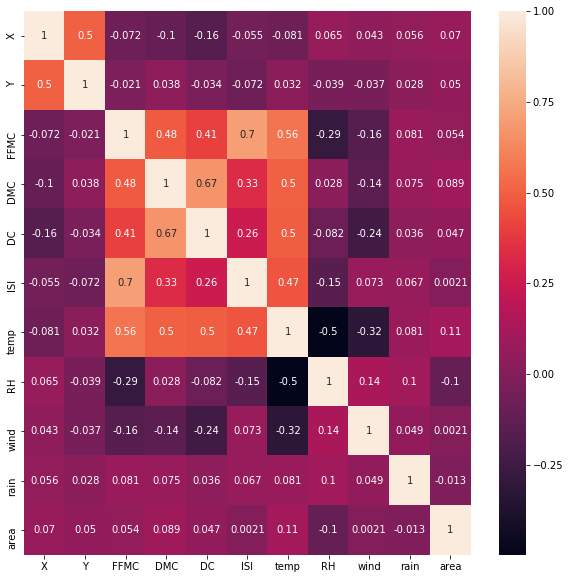

In [43]:
corrMatrix_1 = forests_1.corr()
fig, ax = plt.subplots(figsize = (10,10)) 
sns.heatmap(corrMatrix_1, annot = True)
plt.show()

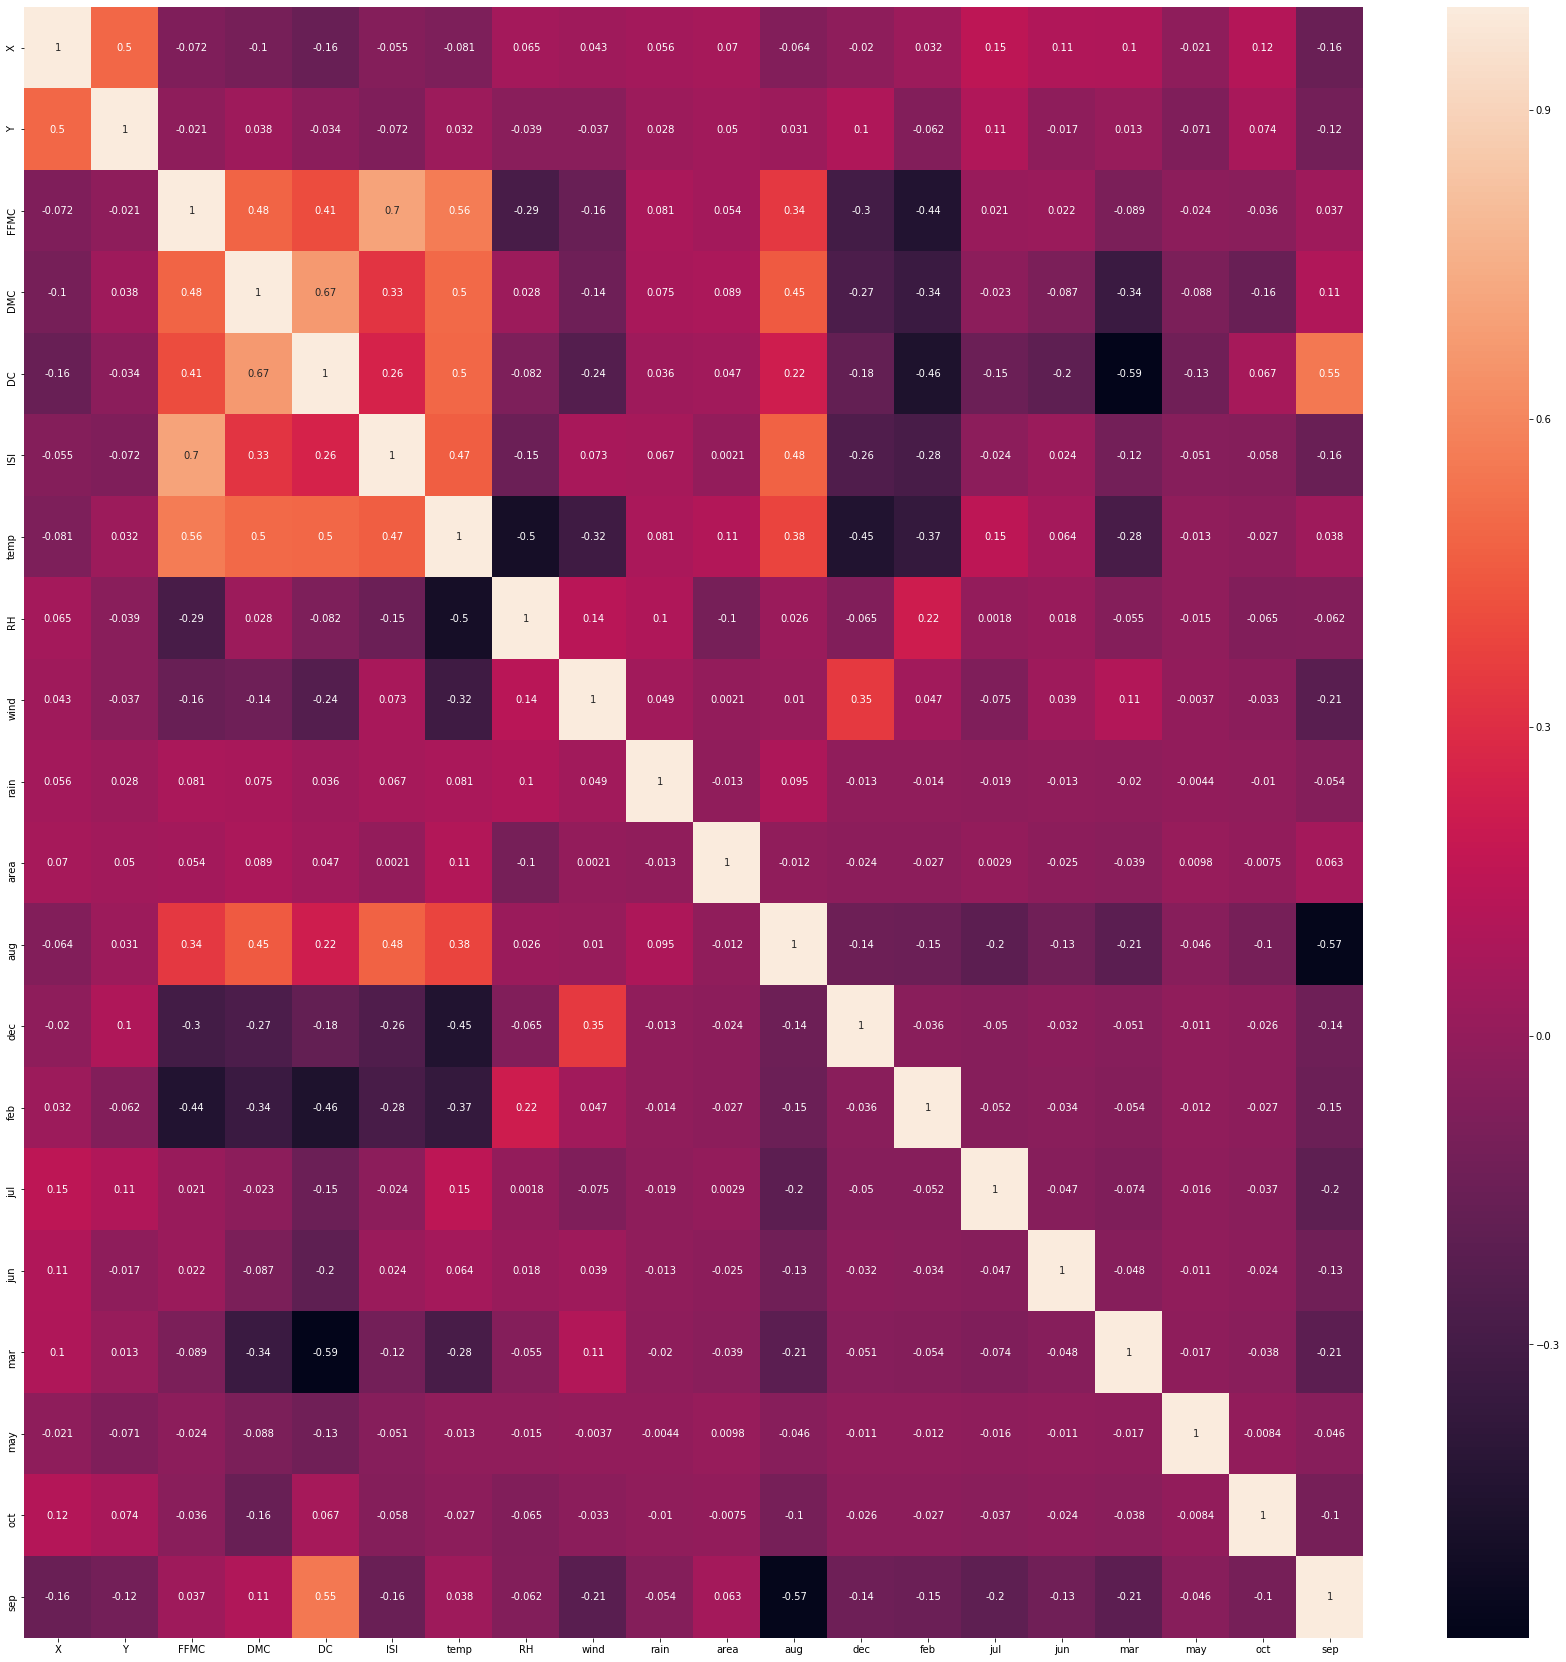

In [44]:
corrMatrix_2 = forests_2.corr()
fig, ax = plt.subplots(figsize = (30,30)) 
sns.heatmap(corrMatrix_2, annot = True)
plt.show()

In [45]:
corr = forests_1.corr()
corr = corr["area"]
print(corr) # Корреляция Пирсона между целевой переменной area и другими переменными

X       0.070316
Y       0.050242
FFMC    0.054323
DMC     0.089088
DC      0.046735
ISI     0.002121
temp    0.110293
RH     -0.104846
wind    0.002086
rain   -0.012901
area    1.000000
Name: area, dtype: float64


In [46]:
# Visualization of correlation

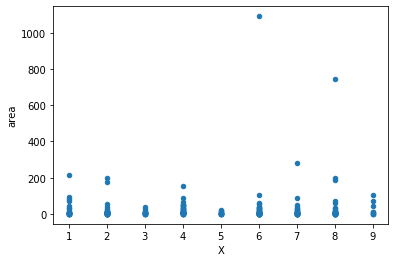

In [47]:
forests_1.plot.scatter(x = "X", y = "area")

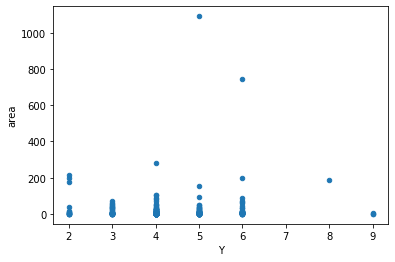

In [48]:
forests_1.plot.scatter(x = "Y", y = "area")

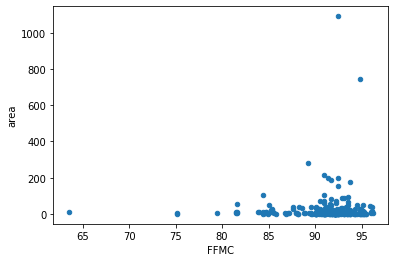

In [49]:
forests_1.plot.scatter(x = "FFMC", y = "area")

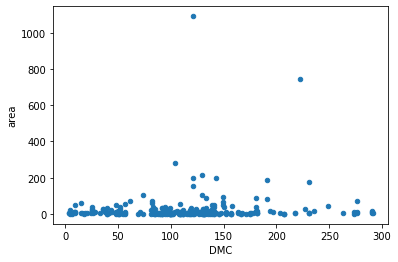

In [50]:
forests_1.plot.scatter(x = "DMC", y = "area")

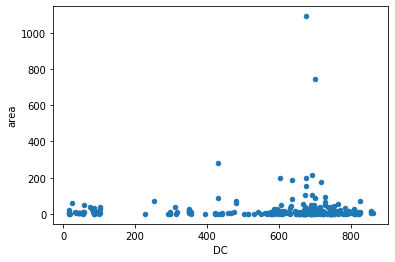

In [51]:
forests_1.plot.scatter(x = "DC", y = "area")

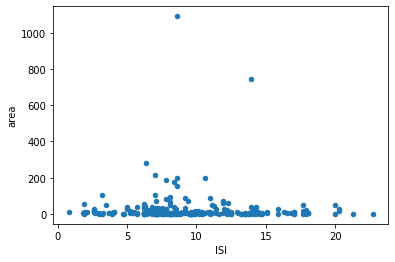

In [52]:
forests_1.plot.scatter(x = "ISI", y = "area")

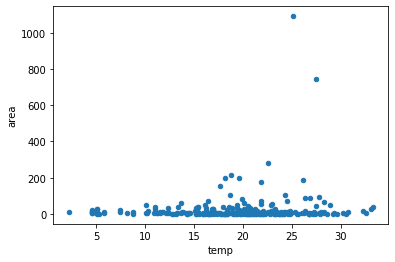

In [53]:
forests_1.plot.scatter(x = "temp", y = "area")

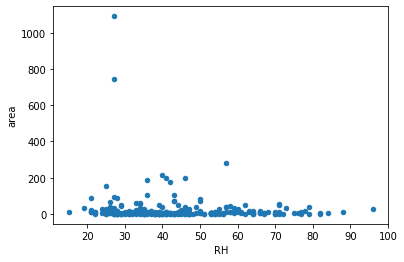

In [54]:
forests_1.plot.scatter(x = "RH", y = "area")

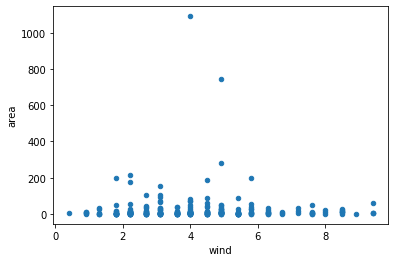

In [55]:
forests_1.plot.scatter(x = "wind", y = "area")

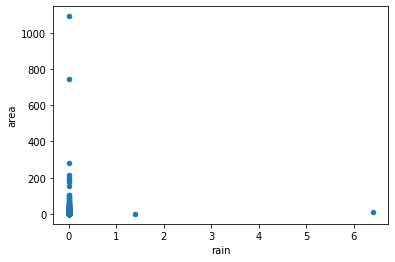

In [56]:
forests_1.plot.scatter(x = "rain", y = "area")

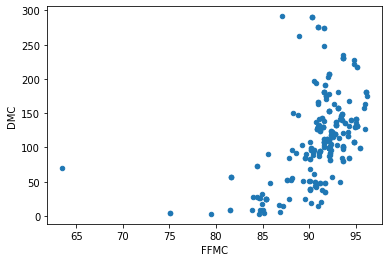

In [57]:
forests_1.plot.scatter(x = "FFMC", y = "DMC")

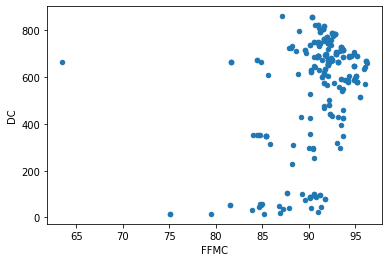

In [58]:
forests_1.plot.scatter(x = "FFMC", y = "DC")

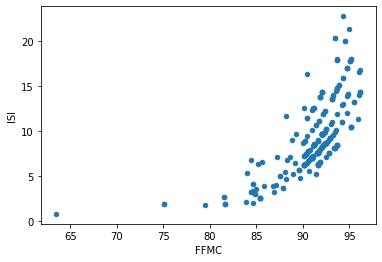

In [59]:
forests_1.plot.scatter(x = "FFMC", y = "ISI")

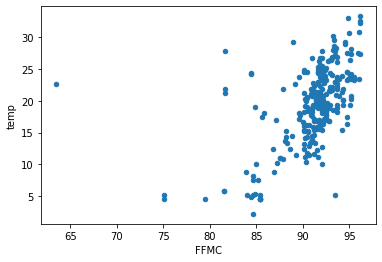

In [60]:
forests_1.plot.scatter(x = "FFMC", y = "temp")

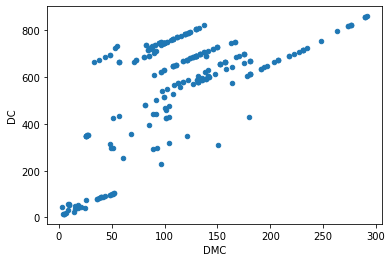

In [61]:
forests_1.plot.scatter(x = "DMC", y = "DC")

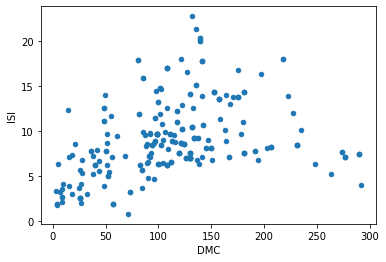

In [62]:
forests_1.plot.scatter(x = "DMC", y = "ISI")

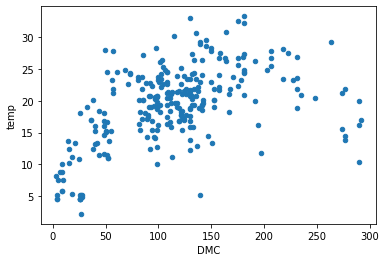

In [63]:
forests_1.plot.scatter(x = "DMC", y = "temp")

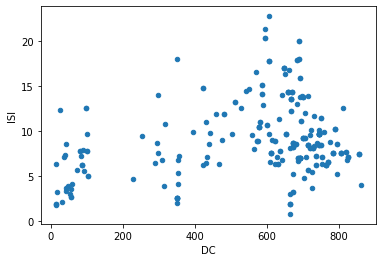

In [64]:
forests_1.plot.scatter(x = "DC", y = "ISI")

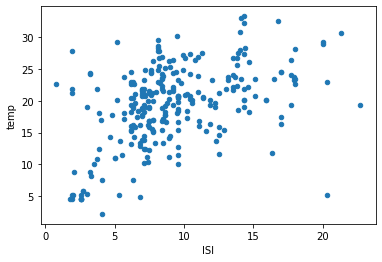

In [65]:
forests_1.plot.scatter(x = "ISI", y = "temp")

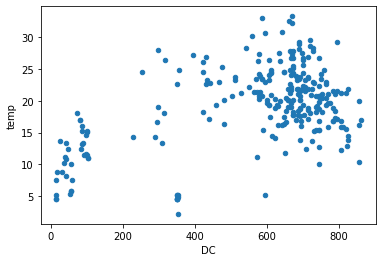

In [66]:
forests_1.plot.scatter(x = "DC", y = "temp")

In [67]:
# Высока сила линейной зависимости (см. корреляционную матрицу Пирсона) между следующими переменными: X и Y, FFMC и DMC, FFMC и DC, FFMC и ISI, FFMC и temp,
# DMC и DC, DMC и ISI, DMC и temp, DС и ISI, ISI и temp, DC и temp;
# Целевая переменная area сильнее всего связана (линейно) с переменными (в порядке убывания силы связи) 1) temp; 2) DMC; 3) X;
# 4) FFMC; 5) Y (тем не менее значение коэффициента корреляции Пирсона в каждом случае крайне невелико)

Text(0.5, 0, 'Values of the FFMC index')

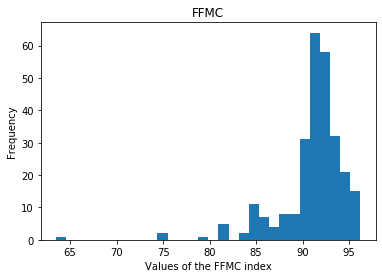

In [68]:
forests_2['FFMC'].plot.hist(title = "FFMC", bins = 30) # Гистограмма для безразмерного индекса FFMC: по оси абсцисс
# отложено значение индекса, по оси ординат - встречаемость значений индекса (сколько раз индекс принимал то или иное значение)
plt.xlabel("Values of the FFMC index")

Text(0.5, 0, 'Values of the FFMC index')

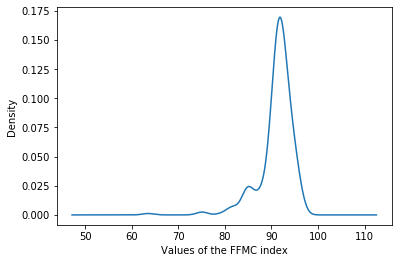

In [69]:
S_1 = pd.Series(FFMC)
S_1.plot.kde()
plt.xlabel("Values of the FFMC index") # Ядерная оценка плотности для FFMC

Text(0.5, 0, 'Values of the DMC index')

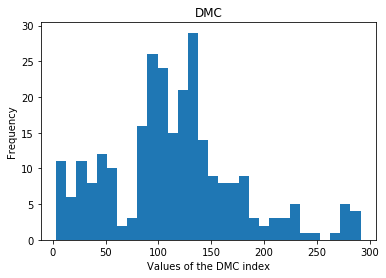

In [70]:
forests_2['DMC'].plot.hist(title = "DMC", bins = 30) # Гистограмма для безразмерного индекса DMC: по оси абсцисс
# отложено значение индекса, по оси ординат - встречаемость значений индекса (сколько раз индекс принимал то или иное значение)
plt.xlabel("Values of the DMC index")

Text(0.5, 0, 'Values of the DMC index')

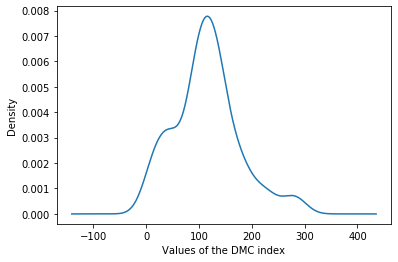

In [71]:
S_2 = pd.Series(DMC)
S_2.plot.kde() 
plt.xlabel("Values of the DMC index") # Ядерная оценка плотности для DMC

Text(0.5, 0, 'Values of the DC index')

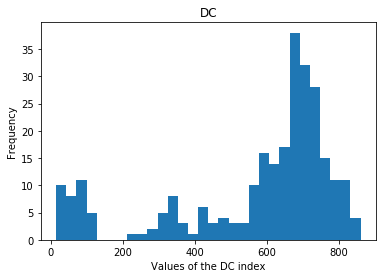

In [72]:
forests_2['DC'].plot.hist(title = "DC", bins = 30) # Гистограмма для безразмерного индекса DC: по оси абсцисс
# отложено значение индекса, по оси ординат - встречаемость значений индекса (сколько раз индекс принимал то или иное значение)
plt.xlabel("Values of the DC index")

Text(0.5, 0, 'Values of the DC index')

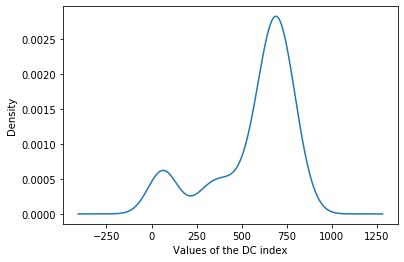

In [73]:
S_3 = pd.Series(DC)
S_3.plot.kde()
plt.xlabel("Values of the DC index") # Ядерная оценка плотности для DC

Text(0.5, 0, 'Values of the ISI index')

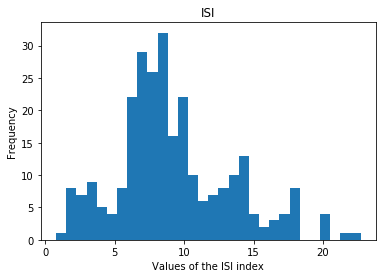

In [74]:
forests_2['ISI'].plot.hist(title = "ISI", bins = 30) # Гистограмма для  индекса ISI: по оси абсцисс
# отложено значение индекса, по оси ординат - встречаемость значений индекса (сколько раз индекс принимал то или иное значение)
plt.xlabel("Values of the ISI index")

Text(0.5, 0, 'Values of the ISI index')

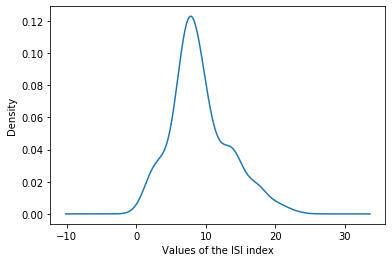

In [75]:
S_4 = pd.Series(ISI)
S_4.plot.kde() 
plt.xlabel("Values of the ISI index") # Ядерная оценка плотности для ISI

Text(0.5, 0, 'Values')

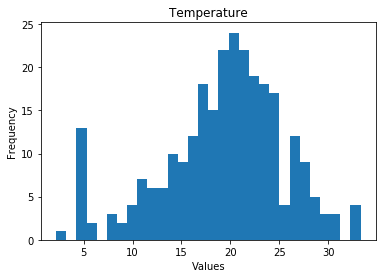

In [76]:
forests_2['temp'].plot.hist(title = "Temperature", bins = 30) # Гистограмма для температуры воздуха: по оси абсцисс
# отложено значение температуры, по оси ординат - встречаемость значений температуры (сколько раз температура принимала то или иное значение)
plt.xlabel("Values")

Text(0.5, 0, 'Temperature values')

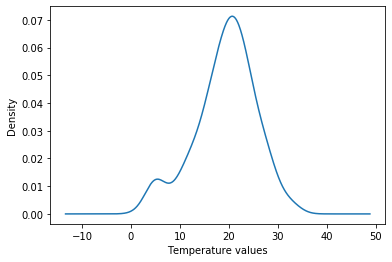

In [77]:
S_5 = pd.Series(forests_2["temp"].values)
S_5.plot.kde() 
plt.xlabel("Temperature values") # Ядерная оценка плотности для temp

Text(0.5, 0, 'Values')

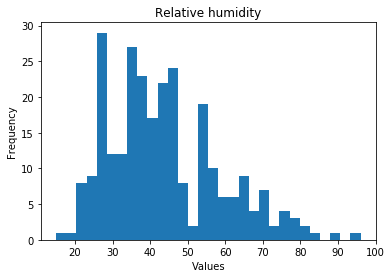

In [78]:
forests_2['RH'].plot.hist(title = "Relative humidity", bins = 30) # Гистограмма для относительной влажности воздуха: по оси абсцисс
# отложено значение влажности, по оси ординат - встречаемость значений влажности (сколько раз влажность воздуха принимала то или иное значение)
plt.xlabel("Values")

Text(0.5, 0, 'Relative humidity values')

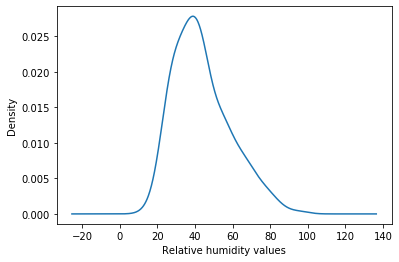

In [79]:
S_6 = pd.Series(forests_2["RH"].values)
S_6.plot.kde()
plt.xlabel("Relative humidity values") # Ядерная оценка плотности для RH

Text(0.5, 0, 'Values')

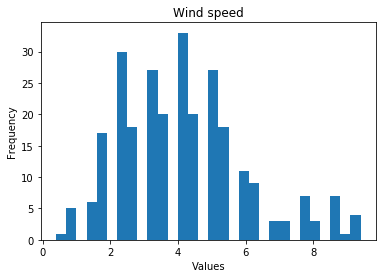

In [80]:
forests_2['wind'].plot.hist(title = "Wind speed", bins = 30) # Гистограмма для скорости ветра: по оси абсцисс
# отложено значение скорости, по оси ординат - встречаемость значений скорости (сколько раз скорость принимала то или иное значение)
plt.xlabel("Values")

Text(0.5, 0, 'Wind speed values')

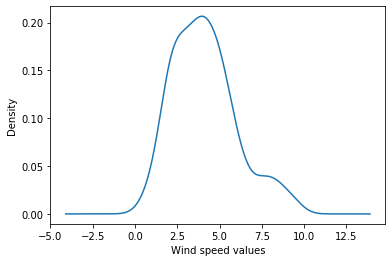

In [81]:
S_7 = pd.Series(forests_2["wind"].values)
S_7.plot.kde() 
plt.xlabel("Wind speed values") # Ядерная оценка плотности для wind

Text(0.5, 0, 'FFMC index')

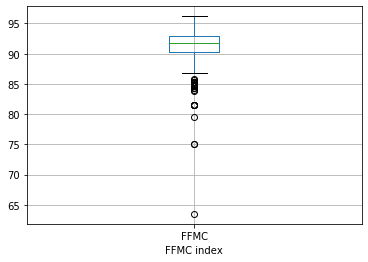

In [82]:
forests_2.boxplot(column = ["FFMC"])
plt.xlabel("FFMC index") # "Ящик с усами" для переменной FFMC

Text(0.5, 0, 'DMC index')

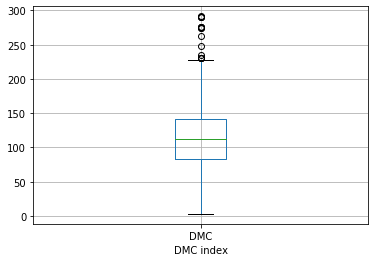

In [83]:
forests_2.boxplot(column = ["DMC"])
plt.xlabel("DMC index") # "Ящик с усами" для переменной DMC

Text(0.5, 0, 'DC index')

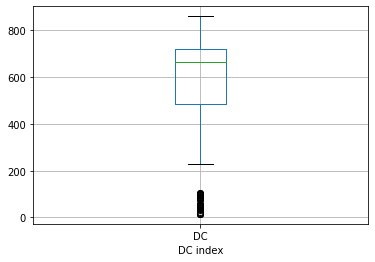

In [84]:
forests_2.boxplot(column = ["DC"])
plt.xlabel("DC index") # "Ящик с усами" для переменной DC

Text(0.5, 0, 'ISI index')

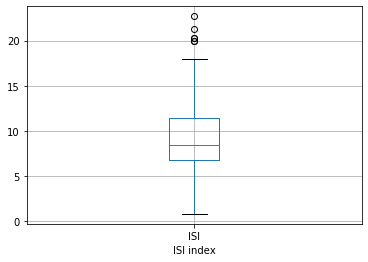

In [85]:
forests_2.boxplot(column = ["ISI"]) 
plt.xlabel("ISI index") # "Ящик с усами" для переменной ISI

Text(0.5, 0, 'Temperature values')

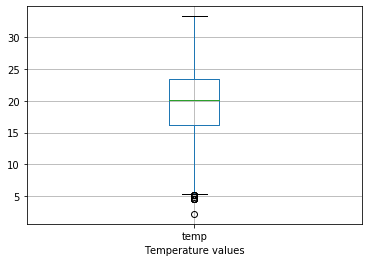

In [86]:
forests_2.boxplot(column = ["temp"])
plt.xlabel("Temperature values") # "Ящик с усами" для переменной temp

Text(0.5, 0, 'Relative humidity values')

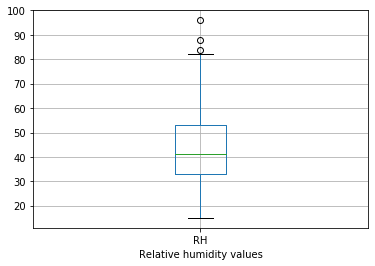

In [87]:
forests_2.boxplot(column = ["RH"])
plt.xlabel("Relative humidity values") # "Ящик с усами" для переменной RH

Text(0.5, 0, 'Wind speed values')

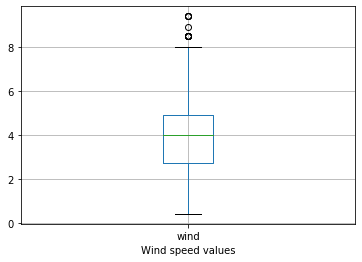

In [88]:
forests_2.boxplot(column = ["wind"])
plt.xlabel("Wind speed values") # "Ящик с усами" для переменной wind

In [89]:
# Графики для целевой переменной area 

Text(0.5, 0, 'Size of the burned area')

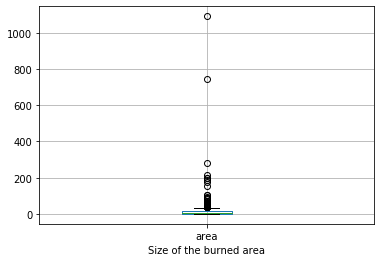

In [90]:
forests_2.boxplot(column = ["area"])
plt.xlabel("Size of the burned area") # "Ящик с усами" для переменной area

Text(0.5, 0, 'Size of the burned area')

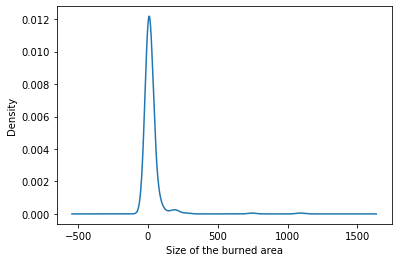

In [91]:
S_8 = pd.Series(forests_2["area"].values)
S_8.plot.kde() 
plt.xlabel("Size of the burned area") # Ядерная оценка плотности для area

In [92]:
forests_2["area"].skew() # посчитали коэффициент асимметрии для целевой переменной

9.445464987439513

In [93]:
forests_2["area"].kurtosis() # посчитали коэффициент эксцесса для целевой переменной

103.74162521803362

In [94]:
# Коэффициент асимметрии высокий, коэффициент эксцесса высокий. Хорошо видно, что наши данные чрезвычайно сильно
# "скошены" влево (правый хвост очень длинный, большая часть значений - ниже среднего). Иными словами, крайне редко площадь
# сгоревших лесов достигает высоких значений.

In [95]:
y_1 = forests_2.loc[forests_2["area"] > 24.600185] 
print(len(y_1.index)) 
y_1 # Посмотрим, сколько раз значение целевой переменной area превышало среднее по выборке

53


X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  ...     area  aug  \
211  7  4   aug  sat  93.5  139.4  594.2  20.3   5.1  96  ...    26.00    1   
212  7  4   sep  fri  94.3   85.1  692.3  15.9  20.1  47  ...    26.13    0   
213  7  3   mar  mon  87.6   52.2  103.8   5.0  11.0  46  ...    27.35    0   
214  4  4   mar  sat  91.7   35.8   80.8   7.8  17.0  27  ...    28.66    0   
215  4  4   mar  sat  91.7   35.8   80.8   7.8  17.0  27  ...    28.66    0   
216  4  4   sep  sun  92.4  124.1  680.7   8.5  16.9  60  ...    29.48    0   
217  1  3   sep  mon  88.6   91.8  709.9   7.1  12.4  73  ...    30.32    0   
218  4  5   sep  wed  92.9  133.3  699.6   9.2  19.4  19  ...    31.72    0   
219  6  5   mar  mon  90.1   39.7   86.6   6.2  15.2  27  ...    31.86    0   
220  8  6   aug  sun  90.2   99.6  631.2   6.3  16.2  59  ...    32.07    1   
221  3  4   sep  fri  93.3  141.2  713.9  13.9  18.6  49  ...    35.88    0   
222  4  3   mar  mon  87.6   52.2  103.8   5.0  11.0  46  ...    36.85    0   
223  2  2   jul  fri  88.3  150.3  309.9   6.8  13.4  79  ...    37.02    0   
224  7  4   sep  wed  90.1   82.9  735.7   6.2  15.4  57  ...    37.71    0   
225  4  4   sep  sun  93.5  149.3  728.6   8.1  22.9  39  ...    48.55    0   
226  7  5   oct  mon  91.7   48.5  696.1  11.1  16.1  44  ...    49.37    0   
227  8  6   aug  sat  92.2   81.8  480.8  11.9  20.1  34  ...    58.30    1   
228  4  6   sep  sun  93.5  149.3  728.6   8.1  28.3  26  ...    64.10    0   
229  8  6   aug  sat  92.2   81.8  480.8  11.9  16.4  43  ...    71.30    1   
230  4  4   sep  wed  92.9  133.3  699.6   9.2  26.4  21  ...    88.49    0   
231  1  5   sep  sun  93.5  149.3  728.6   8.1  27.8  27  ...    95.18    0   
232  6  4   sep  tue  91.0  129.5  692.6   7.0  18.7  43  ...   103.39    0   
233  9  4   sep  tue  84.4   73.4  671.9   3.2  24.3  36  ...   105.66    0   
234  4  5   sep  sat  92.5  121.1  674.4   8.6  17.7  25  ...   154.88    0   
235  8  6   aug  sun  91.4  142.4  601.4  10.6  19.6  41  ...   196.48    1   
236  2  2   sep  sat  92.5  121.1  674.4   8.6  18.2  46  ...   200.94    0   
237  1  2   sep  tue  91.0  129.5  692.6   7.0  18.8  40  ...   212.88    0   
238  6  5   sep  sat  92.5  121.1  674.4   8.6  25.1  27  ...  1090.84    0   
281  6  5   dec  tue  85.4   25.4  349.7   2.6   5.1  24  ...    24.77    0   
293  7  6   jul  tue  93.1  180.4  430.8  11.0  26.9  28  ...    86.45    0   
320  6  3   sep  thu  92.8  119.0  783.5   7.5  18.9  34  ...    34.36    0   
337  6  3   sep  mon  91.6  108.4  764.0   6.2  23.0  34  ...    56.04    0   
346  1  4   sep  mon  91.5  130.1  807.1   7.5  21.3  35  ...    28.19    0   
375  6  5   sep  sat  91.2   94.3  744.4   8.4  15.4  57  ...    39.35    0   
377  2  2   aug  sat  93.7  231.1  715.1   8.4  21.9  42  ...   174.63    1   
383  9  6   aug  thu  91.6  248.4  753.8   6.3  20.5  58  ...    42.87    1   
388  6  4   aug  fri  94.8  227.0  706.7  12.0  23.3  34  ...    28.74    1   
391  8  6   sep  fri  91.1   91.3  738.1   7.2  20.7  46  ...    30.18    0   
392  1  3   sep  sun  91.0  276.3  825.1   7.1  21.9  43  ...    70.76    0   
395  4  5   feb  sun  85.0    9.0   56.9   3.5  10.1  62  ...    51.78    0   
415  8  6   aug  thu  94.8  222.4  698.6  13.9  27.5  27  ...   746.28    1   
420  8  8   aug  wed  91.7  191.4  635.9   7.8  26.2  36  ...   185.76    1   
457  1  4   aug  wed  91.7  191.4  635.9   7.8  19.9  50  ...    82.75    1   
469  6  3   apr  sun  91.0   14.6   25.6  12.3  13.7  33  ...    61.13    0   
471  4  3   may  fri  89.6   25.4   73.7   5.7  18.0  40  ...    38.48    0   
473  9  4   jun  sat  90.5   61.1  252.6   9.4  24.5  50  ...    70.32    0   
479  7  4   jul  mon  89.2  103.9  431.6   6.4  22.6  57  ...   278.53    0   
484  2  5   aug  sun  94.9  130.3  587.1  14.1  33.1  25  ...    26.43    1   
488  4  4   aug  tue  95.1  141.3  605.8  17.7  19.4  71  ...    46.70    1   
493  1  3   aug  fri  95.9  158.0  633.6  11.3  27.5  2

In [96]:
y_2 = forests_2.loc[forests_2["area"] > 50] 
print(len(y_2.index)) 
y_2

24


X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  ...     area  aug  \
227  8  6   aug  sat  92.2   81.8  480.8  11.9  20.1  34  ...    58.30    1   
228  4  6   sep  sun  93.5  149.3  728.6   8.1  28.3  26  ...    64.10    0   
229  8  6   aug  sat  92.2   81.8  480.8  11.9  16.4  43  ...    71.30    1   
230  4  4   sep  wed  92.9  133.3  699.6   9.2  26.4  21  ...    88.49    0   
231  1  5   sep  sun  93.5  149.3  728.6   8.1  27.8  27  ...    95.18    0   
232  6  4   sep  tue  91.0  129.5  692.6   7.0  18.7  43  ...   103.39    0   
233  9  4   sep  tue  84.4   73.4  671.9   3.2  24.3  36  ...   105.66    0   
234  4  5   sep  sat  92.5  121.1  674.4   8.6  17.7  25  ...   154.88    0   
235  8  6   aug  sun  91.4  142.4  601.4  10.6  19.6  41  ...   196.48    1   
236  2  2   sep  sat  92.5  121.1  674.4   8.6  18.2  46  ...   200.94    0   
237  1  2   sep  tue  91.0  129.5  692.6   7.0  18.8  40  ...   212.88    0   
238  6  5   sep  sat  92.5  121.1  674.4   8.6  25.1  27  ...  1090.84    0   
293  7  6   jul  tue  93.1  180.4  430.8  11.0  26.9  28  ...    86.45    0   
337  6  3   sep  mon  91.6  108.4  764.0   6.2  23.0  34  ...    56.04    0   
377  2  2   aug  sat  93.7  231.1  715.1   8.4  21.9  42  ...   174.63    1   
392  1  3   sep  sun  91.0  276.3  825.1   7.1  21.9  43  ...    70.76    0   
395  4  5   feb  sun  85.0    9.0   56.9   3.5  10.1  62  ...    51.78    0   
415  8  6   aug  thu  94.8  222.4  698.6  13.9  27.5  27  ...   746.28    1   
420  8  8   aug  wed  91.7  191.4  635.9   7.8  26.2  36  ...   185.76    1   
457  1  4   aug  wed  91.7  191.4  635.9   7.8  19.9  50  ...    82.75    1   
469  6  3   apr  sun  91.0   14.6   25.6  12.3  13.7  33  ...    61.13    0   
473  9  4   jun  sat  90.5   61.1  252.6   9.4  24.5  50  ...    70.32    0   
479  7  4   jul  mon  89.2  103.9  431.6   6.4  22.6  57  ...   278.53    0   
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71  ...    54.29    1   

     dec  feb  jul  jun  mar  may  oct  sep  
227    0    0    0    0    0    0    0    0  
228    0    0    0    0    0    0    0    1  
229    0    0    0    0    0    0    0    0  
230    0    0    0    0    0    0    0    1  
231    0    0    0    0    0    0    0    1  
232    0    0    0    0    0    0    0    1  
233    0    0    0    0    0    0    0    1  
234    0    0    0    0    0    0    0    1  
235    0    0    0    0    0    0    0    0  
236    0    0    0    0    0    0    0    1  
237    0    0    0    0    0    0    0    1  
238    0    0    0    0    0    0    0    1  
293    0    0    1    0    0    0    0    0  
337    0    0    0    0    0    0    0    1  
377    0    0    0    0    0    0    0    0  
392    0    0    0    0    0    0    0    1  
395    0    1    0    0    0    0    0    0  
415    0    0    0    0    0    0    0    0  
420    0    0    0    0    0    0    0    0  
457    0    0    0    0    0    0    0    0  
469    0    0    0    0    0    0    0    0  
473    0    0    0    1    0    0    0    0  
479    0    0    1    0    0    0    0    0  
513    0    0    0    0    0    0    0    0  

[24 rows x 22 columns]

In [97]:
y_3 = forests_2.loc[forests_2["area"] > 100] 
print(len(y_3.index)) 
y_3

11


X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  ...     area  aug  \
232  6  4   sep  tue  91.0  129.5  692.6   7.0  18.7  43  ...   103.39    0   
233  9  4   sep  tue  84.4   73.4  671.9   3.2  24.3  36  ...   105.66    0   
234  4  5   sep  sat  92.5  121.1  674.4   8.6  17.7  25  ...   154.88    0   
235  8  6   aug  sun  91.4  142.4  601.4  10.6  19.6  41  ...   196.48    1   
236  2  2   sep  sat  92.5  121.1  674.4   8.6  18.2  46  ...   200.94    0   
237  1  2   sep  tue  91.0  129.5  692.6   7.0  18.8  40  ...   212.88    0   
238  6  5   sep  sat  92.5  121.1  674.4   8.6  25.1  27  ...  1090.84    0   
377  2  2   aug  sat  93.7  231.1  715.1   8.4  21.9  42  ...   174.63    1   
415  8  6   aug  thu  94.8  222.4  698.6  13.9  27.5  27  ...   746.28    1   
420  8  8   aug  wed  91.7  191.4  635.9   7.8  26.2  36  ...   185.76    1   
479  7  4   jul  mon  89.2  103.9  431.6   6.4  22.6  57  ...   278.53    0   

     dec  feb  jul  jun  mar  may  oct  sep  
232    0    0    0    0    0    0    0    1  
233    0    0    0    0    0    0    0    1  
234    0    0    0    0    0    0    0    1  
235    0    0    0    0    0    0    0    0  
236    0    0    0    0    0    0    0    1  
237    0    0    0    0    0    0    0    1  
238    0    0    0    0    0    0    0    1  
377    0    0    0    0    0    0    0    0  
415    0    0    0    0    0    0    0    0  
420    0    0    0    0    0    0    0    0  
479    0    0    1    0    0    0    0    0  

[11 rows x 22 columns]

In [98]:
y_3["area"] # Аномально большие значения: 154.88, 174.63, 185.76, 196.48, 200.94, 212.88, 278.53, 746.28, 1090.84

232     103.39
233     105.66
234     154.88
235     196.48
236     200.94
237     212.88
238    1090.84
377     174.63
415     746.28
420     185.76
479     278.53
Name: area, dtype: float64

In [99]:
y_4 = forests_2.loc[forests_2["area"] > 90] 
print(len(y_4.index)) 
y_4

12


X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  ...     area  aug  \
231  1  5   sep  sun  93.5  149.3  728.6   8.1  27.8  27  ...    95.18    0   
232  6  4   sep  tue  91.0  129.5  692.6   7.0  18.7  43  ...   103.39    0   
233  9  4   sep  tue  84.4   73.4  671.9   3.2  24.3  36  ...   105.66    0   
234  4  5   sep  sat  92.5  121.1  674.4   8.6  17.7  25  ...   154.88    0   
235  8  6   aug  sun  91.4  142.4  601.4  10.6  19.6  41  ...   196.48    1   
236  2  2   sep  sat  92.5  121.1  674.4   8.6  18.2  46  ...   200.94    0   
237  1  2   sep  tue  91.0  129.5  692.6   7.0  18.8  40  ...   212.88    0   
238  6  5   sep  sat  92.5  121.1  674.4   8.6  25.1  27  ...  1090.84    0   
377  2  2   aug  sat  93.7  231.1  715.1   8.4  21.9  42  ...   174.63    1   
415  8  6   aug  thu  94.8  222.4  698.6  13.9  27.5  27  ...   746.28    1   
420  8  8   aug  wed  91.7  191.4  635.9   7.8  26.2  36  ...   185.76    1   
479  7  4   jul  mon  89.2  103.9  431.6   6.4  22.6  57  ...   278.53    0   

     dec  feb  jul  jun  mar  may  oct  sep  
231    0    0    0    0    0    0    0    1  
232    0    0    0    0    0    0    0    1  
233    0    0    0    0    0    0    0    1  
234    0    0    0    0    0    0    0    1  
235    0    0    0    0    0    0    0    0  
236    0    0    0    0    0    0    0    1  
237    0    0    0    0    0    0    0    1  
238    0    0    0    0    0    0    0    1  
377    0    0    0    0    0    0    0    0  
415    0    0    0    0    0    0    0    0  
420    0    0    0    0    0    0    0    0  
479    0    0    1    0    0    0    0    0  

[12 rows x 22 columns]

In [100]:
y_5 = forests_2.loc[forests_2["area"] > 80] 
print(len(y_5.index)) 
y_5

15


X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  ...     area  aug  \
230  4  4   sep  wed  92.9  133.3  699.6   9.2  26.4  21  ...    88.49    0   
231  1  5   sep  sun  93.5  149.3  728.6   8.1  27.8  27  ...    95.18    0   
232  6  4   sep  tue  91.0  129.5  692.6   7.0  18.7  43  ...   103.39    0   
233  9  4   sep  tue  84.4   73.4  671.9   3.2  24.3  36  ...   105.66    0   
234  4  5   sep  sat  92.5  121.1  674.4   8.6  17.7  25  ...   154.88    0   
235  8  6   aug  sun  91.4  142.4  601.4  10.6  19.6  41  ...   196.48    1   
236  2  2   sep  sat  92.5  121.1  674.4   8.6  18.2  46  ...   200.94    0   
237  1  2   sep  tue  91.0  129.5  692.6   7.0  18.8  40  ...   212.88    0   
238  6  5   sep  sat  92.5  121.1  674.4   8.6  25.1  27  ...  1090.84    0   
293  7  6   jul  tue  93.1  180.4  430.8  11.0  26.9  28  ...    86.45    0   
377  2  2   aug  sat  93.7  231.1  715.1   8.4  21.9  42  ...   174.63    1   
415  8  6   aug  thu  94.8  222.4  698.6  13.9  27.5  27  ...   746.28    1   
420  8  8   aug  wed  91.7  191.4  635.9   7.8  26.2  36  ...   185.76    1   
457  1  4   aug  wed  91.7  191.4  635.9   7.8  19.9  50  ...    82.75    1   
479  7  4   jul  mon  89.2  103.9  431.6   6.4  22.6  57  ...   278.53    0   

     dec  feb  jul  jun  mar  may  oct  sep  
230    0    0    0    0    0    0    0    1  
231    0    0    0    0    0    0    0    1  
232    0    0    0    0    0    0    0    1  
233    0    0    0    0    0    0    0    1  
234    0    0    0    0    0    0    0    1  
235    0    0    0    0    0    0    0    0  
236    0    0    0    0    0    0    0    1  
237    0    0    0    0    0    0    0    1  
238    0    0    0    0    0    0    0    1  
293    0    0    1    0    0    0    0    0  
377    0    0    0    0    0    0    0    0  
415    0    0    0    0    0    0    0    0  
420    0    0    0    0    0    0    0    0  
457    0    0    0    0    0    0    0    0  
479    0    0    1    0    0    0    0    0  

[15 rows x 22 columns]

In [101]:
y_6 = forests_2.loc[forests_2["area"] > 70] 
print(len(y_6.index)) 
y_6

18


X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  ...     area  aug  \
229  8  6   aug  sat  92.2   81.8  480.8  11.9  16.4  43  ...    71.30    1   
230  4  4   sep  wed  92.9  133.3  699.6   9.2  26.4  21  ...    88.49    0   
231  1  5   sep  sun  93.5  149.3  728.6   8.1  27.8  27  ...    95.18    0   
232  6  4   sep  tue  91.0  129.5  692.6   7.0  18.7  43  ...   103.39    0   
233  9  4   sep  tue  84.4   73.4  671.9   3.2  24.3  36  ...   105.66    0   
234  4  5   sep  sat  92.5  121.1  674.4   8.6  17.7  25  ...   154.88    0   
235  8  6   aug  sun  91.4  142.4  601.4  10.6  19.6  41  ...   196.48    1   
236  2  2   sep  sat  92.5  121.1  674.4   8.6  18.2  46  ...   200.94    0   
237  1  2   sep  tue  91.0  129.5  692.6   7.0  18.8  40  ...   212.88    0   
238  6  5   sep  sat  92.5  121.1  674.4   8.6  25.1  27  ...  1090.84    0   
293  7  6   jul  tue  93.1  180.4  430.8  11.0  26.9  28  ...    86.45    0   
377  2  2   aug  sat  93.7  231.1  715.1   8.4  21.9  42  ...   174.63    1   
392  1  3   sep  sun  91.0  276.3  825.1   7.1  21.9  43  ...    70.76    0   
415  8  6   aug  thu  94.8  222.4  698.6  13.9  27.5  27  ...   746.28    1   
420  8  8   aug  wed  91.7  191.4  635.9   7.8  26.2  36  ...   185.76    1   
457  1  4   aug  wed  91.7  191.4  635.9   7.8  19.9  50  ...    82.75    1   
473  9  4   jun  sat  90.5   61.1  252.6   9.4  24.5  50  ...    70.32    0   
479  7  4   jul  mon  89.2  103.9  431.6   6.4  22.6  57  ...   278.53    0   

     dec  feb  jul  jun  mar  may  oct  sep  
229    0    0    0    0    0    0    0    0  
230    0    0    0    0    0    0    0    1  
231    0    0    0    0    0    0    0    1  
232    0    0    0    0    0    0    0    1  
233    0    0    0    0    0    0    0    1  
234    0    0    0    0    0    0    0    1  
235    0    0    0    0    0    0    0    0  
236    0    0    0    0    0    0    0    1  
237    0    0    0    0    0    0    0    1  
238    0    0    0    0    0    0    0    1  
293    0    0    1    0    0    0    0    0  
377    0    0    0    0    0    0    0    0  
392    0    0    0    0    0    0    0    1  
415    0    0    0    0    0    0    0    0  
420    0    0    0    0    0    0    0    0  
457    0    0    0    0    0    0    0    0  
473    0    0    0    1    0    0    0    0  
479    0    0    1    0    0    0    0    0  

[18 rows x 22 columns]

In [102]:
y_7 = forests_2.loc[forests_2["area"] > 60] 
print(len(y_7.index)) 
y_7

20


X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  ...     area  aug  \
228  4  6   sep  sun  93.5  149.3  728.6   8.1  28.3  26  ...    64.10    0   
229  8  6   aug  sat  92.2   81.8  480.8  11.9  16.4  43  ...    71.30    1   
230  4  4   sep  wed  92.9  133.3  699.6   9.2  26.4  21  ...    88.49    0   
231  1  5   sep  sun  93.5  149.3  728.6   8.1  27.8  27  ...    95.18    0   
232  6  4   sep  tue  91.0  129.5  692.6   7.0  18.7  43  ...   103.39    0   
233  9  4   sep  tue  84.4   73.4  671.9   3.2  24.3  36  ...   105.66    0   
234  4  5   sep  sat  92.5  121.1  674.4   8.6  17.7  25  ...   154.88    0   
235  8  6   aug  sun  91.4  142.4  601.4  10.6  19.6  41  ...   196.48    1   
236  2  2   sep  sat  92.5  121.1  674.4   8.6  18.2  46  ...   200.94    0   
237  1  2   sep  tue  91.0  129.5  692.6   7.0  18.8  40  ...   212.88    0   
238  6  5   sep  sat  92.5  121.1  674.4   8.6  25.1  27  ...  1090.84    0   
293  7  6   jul  tue  93.1  180.4  430.8  11.0  26.9  28  ...    86.45    0   
377  2  2   aug  sat  93.7  231.1  715.1   8.4  21.9  42  ...   174.63    1   
392  1  3   sep  sun  91.0  276.3  825.1   7.1  21.9  43  ...    70.76    0   
415  8  6   aug  thu  94.8  222.4  698.6  13.9  27.5  27  ...   746.28    1   
420  8  8   aug  wed  91.7  191.4  635.9   7.8  26.2  36  ...   185.76    1   
457  1  4   aug  wed  91.7  191.4  635.9   7.8  19.9  50  ...    82.75    1   
469  6  3   apr  sun  91.0   14.6   25.6  12.3  13.7  33  ...    61.13    0   
473  9  4   jun  sat  90.5   61.1  252.6   9.4  24.5  50  ...    70.32    0   
479  7  4   jul  mon  89.2  103.9  431.6   6.4  22.6  57  ...   278.53    0   

     dec  feb  jul  jun  mar  may  oct  sep  
228    0    0    0    0    0    0    0    1  
229    0    0    0    0    0    0    0    0  
230    0    0    0    0    0    0    0    1  
231    0    0    0    0    0    0    0    1  
232    0    0    0    0    0    0    0    1  
233    0    0    0    0    0    0    0    1  
234    0    0    0    0    0    0    0    1  
235    0    0    0    0    0    0    0    0  
236    0    0    0    0    0    0    0    1  
237    0    0    0    0    0    0    0    1  
238    0    0    0    0    0    0    0    1  
293    0    0    1    0    0    0    0    0  
377    0    0    0    0    0    0    0    0  
392    0    0    0    0    0    0    0    1  
415    0    0    0    0    0    0    0    0  
420    0    0    0    0    0    0    0    0  
457    0    0    0    0    0    0    0    0  
469    0    0    0    0    0    0    0    0  
473    0    0    0    1    0    0    0    0  
479    0    0    1    0    0    0    0    0  

[20 rows x 22 columns]

In [103]:
y_8 = forests_2.loc[forests_2["area"] > 50] 
print(len(y_8.index)) 
y_8

24


X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  ...     area  aug  \
227  8  6   aug  sat  92.2   81.8  480.8  11.9  20.1  34  ...    58.30    1   
228  4  6   sep  sun  93.5  149.3  728.6   8.1  28.3  26  ...    64.10    0   
229  8  6   aug  sat  92.2   81.8  480.8  11.9  16.4  43  ...    71.30    1   
230  4  4   sep  wed  92.9  133.3  699.6   9.2  26.4  21  ...    88.49    0   
231  1  5   sep  sun  93.5  149.3  728.6   8.1  27.8  27  ...    95.18    0   
232  6  4   sep  tue  91.0  129.5  692.6   7.0  18.7  43  ...   103.39    0   
233  9  4   sep  tue  84.4   73.4  671.9   3.2  24.3  36  ...   105.66    0   
234  4  5   sep  sat  92.5  121.1  674.4   8.6  17.7  25  ...   154.88    0   
235  8  6   aug  sun  91.4  142.4  601.4  10.6  19.6  41  ...   196.48    1   
236  2  2   sep  sat  92.5  121.1  674.4   8.6  18.2  46  ...   200.94    0   
237  1  2   sep  tue  91.0  129.5  692.6   7.0  18.8  40  ...   212.88    0   
238  6  5   sep  sat  92.5  121.1  674.4   8.6  25.1  27  ...  1090.84    0   
293  7  6   jul  tue  93.1  180.4  430.8  11.0  26.9  28  ...    86.45    0   
337  6  3   sep  mon  91.6  108.4  764.0   6.2  23.0  34  ...    56.04    0   
377  2  2   aug  sat  93.7  231.1  715.1   8.4  21.9  42  ...   174.63    1   
392  1  3   sep  sun  91.0  276.3  825.1   7.1  21.9  43  ...    70.76    0   
395  4  5   feb  sun  85.0    9.0   56.9   3.5  10.1  62  ...    51.78    0   
415  8  6   aug  thu  94.8  222.4  698.6  13.9  27.5  27  ...   746.28    1   
420  8  8   aug  wed  91.7  191.4  635.9   7.8  26.2  36  ...   185.76    1   
457  1  4   aug  wed  91.7  191.4  635.9   7.8  19.9  50  ...    82.75    1   
469  6  3   apr  sun  91.0   14.6   25.6  12.3  13.7  33  ...    61.13    0   
473  9  4   jun  sat  90.5   61.1  252.6   9.4  24.5  50  ...    70.32    0   
479  7  4   jul  mon  89.2  103.9  431.6   6.4  22.6  57  ...   278.53    0   
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71  ...    54.29    1   

     dec  feb  jul  jun  mar  may  oct  sep  
227    0    0    0    0    0    0    0    0  
228    0    0    0    0    0    0    0    1  
229    0    0    0    0    0    0    0    0  
230    0    0    0    0    0    0    0    1  
231    0    0    0    0    0    0    0    1  
232    0    0    0    0    0    0    0    1  
233    0    0    0    0    0    0    0    1  
234    0    0    0    0    0    0    0    1  
235    0    0    0    0    0    0    0    0  
236    0    0    0    0    0    0    0    1  
237    0    0    0    0    0    0    0    1  
238    0    0    0    0    0    0    0    1  
293    0    0    1    0    0    0    0    0  
337    0    0    0    0    0    0    0    1  
377    0    0    0    0    0    0    0    0  
392    0    0    0    0    0    0    0    1  
395    0    1    0    0    0    0    0    0  
415    0    0    0    0    0    0    0    0  
420    0    0    0    0    0    0    0    0  
457    0    0    0    0    0    0    0    0  
469    0    0    0    0    0    0    0    0  
473    0    0    0    1    0    0    0    0  
479    0    0    1    0    0    0    0    0  
513    0    0    0    0    0    0    0    0  

[24 rows x 22 columns]

In [104]:
y_9 = forests_2.loc[forests_2["area"] > 40] 
print(len(y_9.index)) 
y_9

31


X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  ...     area  aug  \
225  4  4   sep  sun  93.5  149.3  728.6   8.1  22.9  39  ...    48.55    0   
226  7  5   oct  mon  91.7   48.5  696.1  11.1  16.1  44  ...    49.37    0   
227  8  6   aug  sat  92.2   81.8  480.8  11.9  20.1  34  ...    58.30    1   
228  4  6   sep  sun  93.5  149.3  728.6   8.1  28.3  26  ...    64.10    0   
229  8  6   aug  sat  92.2   81.8  480.8  11.9  16.4  43  ...    71.30    1   
230  4  4   sep  wed  92.9  133.3  699.6   9.2  26.4  21  ...    88.49    0   
231  1  5   sep  sun  93.5  149.3  728.6   8.1  27.8  27  ...    95.18    0   
232  6  4   sep  tue  91.0  129.5  692.6   7.0  18.7  43  ...   103.39    0   
233  9  4   sep  tue  84.4   73.4  671.9   3.2  24.3  36  ...   105.66    0   
234  4  5   sep  sat  92.5  121.1  674.4   8.6  17.7  25  ...   154.88    0   
235  8  6   aug  sun  91.4  142.4  601.4  10.6  19.6  41  ...   196.48    1   
236  2  2   sep  sat  92.5  121.1  674.4   8.6  18.2  46  ...   200.94    0   
237  1  2   sep  tue  91.0  129.5  692.6   7.0  18.8  40  ...   212.88    0   
238  6  5   sep  sat  92.5  121.1  674.4   8.6  25.1  27  ...  1090.84    0   
293  7  6   jul  tue  93.1  180.4  430.8  11.0  26.9  28  ...    86.45    0   
337  6  3   sep  mon  91.6  108.4  764.0   6.2  23.0  34  ...    56.04    0   
377  2  2   aug  sat  93.7  231.1  715.1   8.4  21.9  42  ...   174.63    1   
383  9  6   aug  thu  91.6  248.4  753.8   6.3  20.5  58  ...    42.87    1   
392  1  3   sep  sun  91.0  276.3  825.1   7.1  21.9  43  ...    70.76    0   
395  4  5   feb  sun  85.0    9.0   56.9   3.5  10.1  62  ...    51.78    0   
415  8  6   aug  thu  94.8  222.4  698.6  13.9  27.5  27  ...   746.28    1   
420  8  8   aug  wed  91.7  191.4  635.9   7.8  26.2  36  ...   185.76    1   
457  1  4   aug  wed  91.7  191.4  635.9   7.8  19.9  50  ...    82.75    1   
469  6  3   apr  sun  91.0   14.6   25.6  12.3  13.7  33  ...    61.13    0   
473  9  4   jun  sat  90.5   61.1  252.6   9.4  24.5  50  ...    70.32    0   
479  7  4   jul  mon  89.2  103.9  431.6   6.4  22.6  57  ...   278.53    0   
488  4  4   aug  tue  95.1  141.3  605.8  17.7  19.4  71  ...    46.70    1   
493  1  3   aug  fri  95.9  158.0  633.6  11.3  27.5  29  ...    43.32    1   
498  6  5   aug  tue  96.1  181.1  671.2  14.3  33.3  26  ...    40.54    1   
504  4  3   aug  wed  94.5  139.4  689.1  20.0  28.9  29  ...    49.59    1   
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71  ...    54.29    1   

     dec  feb  jul  jun  mar  may  oct  sep  
225    0    0    0    0    0    0    0    1  
226    0    0    0    0    0    0    1    0  
227    0    0    0    0    0    0    0    0  
228    0    0    0    0    0    0    0    1  
229    0    0    0    0    0    0    0    0  
230    0    0    0    0    0    0    0    1  
231    0    0    0    0    0    0    0    1  
232    0    0    0    0    0    0    0    1  
233    0    0    0    0    0    0    0    1  
234    0    0    0    0    0    0    0    1  
235    0    0    0    0    0    0    0    0  
236    0    0    0    0    0    0    0    1  
237    0    0    0    0    0    0    0    1  
238    0    0    0    0    0    0    0    1  
293    0    0    1    0    0    0    0    0  
337    0    0    0    0    0    0    0    1  
377    0    0    0    0    0    0    0    0  
383    0    0    0    0    0    0    0    0  
392    0    0    0    0    0    0    0    1  
395    0    1    0    0    0    0    0    0  
415    0    0    0    0    0    0    0    0  
420    0    0    0    0    0    0    0    0  
457    0    0    0    0    0    0    0    0  
469    0    0    0    0    0    0    0    0  
473    0    0    0    1    0    0    0    0  
479    0    0    1    0    0    0    0    0  
488    0    0    0    0    0    0    0    0  
493    0    0    0    0    0    0    0    0  
498    0    0    0    0    0    0    0    0  
504    0    0    0    0    0    0    0    0  
513    0    0    0    0    0    0    0    0  

[31

In [105]:
y_10 = forests_2.loc[forests_2["area"] > 30] 
print(len(y_10.index)) 
y_10

43


X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  ...     area  aug  \
217  1  3   sep  mon  88.6   91.8  709.9   7.1  12.4  73  ...    30.32    0   
218  4  5   sep  wed  92.9  133.3  699.6   9.2  19.4  19  ...    31.72    0   
219  6  5   mar  mon  90.1   39.7   86.6   6.2  15.2  27  ...    31.86    0   
220  8  6   aug  sun  90.2   99.6  631.2   6.3  16.2  59  ...    32.07    1   
221  3  4   sep  fri  93.3  141.2  713.9  13.9  18.6  49  ...    35.88    0   
222  4  3   mar  mon  87.6   52.2  103.8   5.0  11.0  46  ...    36.85    0   
223  2  2   jul  fri  88.3  150.3  309.9   6.8  13.4  79  ...    37.02    0   
224  7  4   sep  wed  90.1   82.9  735.7   6.2  15.4  57  ...    37.71    0   
225  4  4   sep  sun  93.5  149.3  728.6   8.1  22.9  39  ...    48.55    0   
226  7  5   oct  mon  91.7   48.5  696.1  11.1  16.1  44  ...    49.37    0   
227  8  6   aug  sat  92.2   81.8  480.8  11.9  20.1  34  ...    58.30    1   
228  4  6   sep  sun  93.5  149.3  728.6   8.1  28.3  26  ...    64.10    0   
229  8  6   aug  sat  92.2   81.8  480.8  11.9  16.4  43  ...    71.30    1   
230  4  4   sep  wed  92.9  133.3  699.6   9.2  26.4  21  ...    88.49    0   
231  1  5   sep  sun  93.5  149.3  728.6   8.1  27.8  27  ...    95.18    0   
232  6  4   sep  tue  91.0  129.5  692.6   7.0  18.7  43  ...   103.39    0   
233  9  4   sep  tue  84.4   73.4  671.9   3.2  24.3  36  ...   105.66    0   
234  4  5   sep  sat  92.5  121.1  674.4   8.6  17.7  25  ...   154.88    0   
235  8  6   aug  sun  91.4  142.4  601.4  10.6  19.6  41  ...   196.48    1   
236  2  2   sep  sat  92.5  121.1  674.4   8.6  18.2  46  ...   200.94    0   
237  1  2   sep  tue  91.0  129.5  692.6   7.0  18.8  40  ...   212.88    0   
238  6  5   sep  sat  92.5  121.1  674.4   8.6  25.1  27  ...  1090.84    0   
293  7  6   jul  tue  93.1  180.4  430.8  11.0  26.9  28  ...    86.45    0   
320  6  3   sep  thu  92.8  119.0  783.5   7.5  18.9  34  ...    34.36    0   
337  6  3   sep  mon  91.6  108.4  764.0   6.2  23.0  34  ...    56.04    0   
375  6  5   sep  sat  91.2   94.3  744.4   8.4  15.4  57  ...    39.35    0   
377  2  2   aug  sat  93.7  231.1  715.1   8.4  21.9  42  ...   174.63    1   
383  9  6   aug  thu  91.6  248.4  753.8   6.3  20.5  58  ...    42.87    1   
391  8  6   sep  fri  91.1   91.3  738.1   7.2  20.7  46  ...    30.18    0   
392  1  3   sep  sun  91.0  276.3  825.1   7.1  21.9  43  ...    70.76    0   
395  4  5   feb  sun  85.0    9.0   56.9   3.5  10.1  62  ...    51.78    0   
415  8  6   aug  thu  94.8  222.4  698.6  13.9  27.5  27  ...   746.28    1   
420  8  8   aug  wed  91.7  191.4  635.9   7.8  26.2  36  ...   185.76    1   
457  1  4   aug  wed  91.7  191.4  635.9   7.8  19.9  50  ...    82.75    1   
469  6  3   apr  sun  91.0   14.6   25.6  12.3  13.7  33  ...    61.13    0   
471  4  3   may  fri  89.6   25.4   73.7   5.7  18.0  40  ...    38.48    0   
473  9  4   jun  sat  90.5   61.1  252.6   9.4  24.5  50  ...    70.32    0   
479  7  4   jul  mon  89.2  103.9  431.6   6.4  22.6  57  ...   278.53    0   
488  4  4   aug  tue  95.1  141.3  605.8  17.7  19.4  71  ...    46.70    1   
493  1  3   aug  fri  95.9  158.0  633.6  11.3  27.5  29  ...    43.32    1   
498  6  5   aug  tue  96.1  181.1  671.2  14.3  33.3  26  ...    40.54    1   
504  4  3   aug  wed  94.5  139.4  689.1  20.0  28.9  29  ...    49.59    1   
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71  ...    54.29    1   

     dec  feb  jul  jun  mar  may  oct  sep  
217    0    0    0    0    0    0    0    1  
218    0    0    0    0    0    0    0    1  
219    0    0    0    0    1    0    0    0  
220    0    0    0    0    0    0    0    0  
221    0    0    0    0    0    0    0    1  
222    0    0    0    0    1    0    0    0  
223    0    0    1    0    0    0    0    0  
224    0    0    0    0    0    0    0    1  
225    0    0    0    0    0    0    0    1  
226    0    0    0    0    0    0    1    0  
227    0    0    0    

In [106]:
y_11 = forests_2.loc[forests_2["area"] > 20] 
print(len(y_11.index)) 
y_11

59


X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  ...     area  aug  \
209  8  3   sep  thu  93.7   80.9  685.2  17.9  23.2  26  ...    23.41    0   
210  4  4   oct  sat  90.6   43.7  686.9   6.7  18.4  25  ...    24.23    0   
211  7  4   aug  sat  93.5  139.4  594.2  20.3   5.1  96  ...    26.00    1   
212  7  4   sep  fri  94.3   85.1  692.3  15.9  20.1  47  ...    26.13    0   
213  7  3   mar  mon  87.6   52.2  103.8   5.0  11.0  46  ...    27.35    0   
214  4  4   mar  sat  91.7   35.8   80.8   7.8  17.0  27  ...    28.66    0   
215  4  4   mar  sat  91.7   35.8   80.8   7.8  17.0  27  ...    28.66    0   
216  4  4   sep  sun  92.4  124.1  680.7   8.5  16.9  60  ...    29.48    0   
217  1  3   sep  mon  88.6   91.8  709.9   7.1  12.4  73  ...    30.32    0   
218  4  5   sep  wed  92.9  133.3  699.6   9.2  19.4  19  ...    31.72    0   
219  6  5   mar  mon  90.1   39.7   86.6   6.2  15.2  27  ...    31.86    0   
220  8  6   aug  sun  90.2   99.6  631.2   6.3  16.2  59  ...    32.07    1   
221  3  4   sep  fri  93.3  141.2  713.9  13.9  18.6  49  ...    35.88    0   
222  4  3   mar  mon  87.6   52.2  103.8   5.0  11.0  46  ...    36.85    0   
223  2  2   jul  fri  88.3  150.3  309.9   6.8  13.4  79  ...    37.02    0   
224  7  4   sep  wed  90.1   82.9  735.7   6.2  15.4  57  ...    37.71    0   
225  4  4   sep  sun  93.5  149.3  728.6   8.1  22.9  39  ...    48.55    0   
226  7  5   oct  mon  91.7   48.5  696.1  11.1  16.1  44  ...    49.37    0   
227  8  6   aug  sat  92.2   81.8  480.8  11.9  20.1  34  ...    58.30    1   
228  4  6   sep  sun  93.5  149.3  728.6   8.1  28.3  26  ...    64.10    0   
229  8  6   aug  sat  92.2   81.8  480.8  11.9  16.4  43  ...    71.30    1   
230  4  4   sep  wed  92.9  133.3  699.6   9.2  26.4  21  ...    88.49    0   
231  1  5   sep  sun  93.5  149.3  728.6   8.1  27.8  27  ...    95.18    0   
232  6  4   sep  tue  91.0  129.5  692.6   7.0  18.7  43  ...   103.39    0   
233  9  4   sep  tue  84.4   73.4  671.9   3.2  24.3  36  ...   105.66    0   
234  4  5   sep  sat  92.5  121.1  674.4   8.6  17.7  25  ...   154.88    0   
235  8  6   aug  sun  91.4  142.4  601.4  10.6  19.6  41  ...   196.48    1   
236  2  2   sep  sat  92.5  121.1  674.4   8.6  18.2  46  ...   200.94    0   
237  1  2   sep  tue  91.0  129.5  692.6   7.0  18.8  40  ...   212.88    0   
238  6  5   sep  sat  92.5  121.1  674.4   8.6  25.1  27  ...  1090.84    0   
278  4  4   dec  mon  85.4   25.4  349.7   2.6   4.6  21  ...    22.03    0   
281  6  5   dec  tue  85.4   25.4  349.7   2.6   5.1  24  ...    24.77    0   
284  5  4   feb  fri  85.2    4.9   15.8   6.3   7.5  46  ...    24.24    0   
293  7  6   jul  tue  93.1  180.4  430.8  11.0  26.9  28  ...    86.45    0   
320  6  3   sep  thu  92.8  119.0  783.5   7.5  18.9  34  ...    34.36    0   
337  6  3   sep  mon  91.6  108.4  764.0   6.2  23.0  34  ...    56.04    0   
346  1  4   sep  mon  91.5  130.1  807.1   7.5  21.3  35  ...    28.19    0   
365  6  5   sep  tue  91.9  111.7  770.3   6.5  19.6  45  ...    20.03    0   
375  6  5   sep  sat  91.2   94.3  744.4   8.4  15.4  57  ...    39.35    0   
377  2  2   aug  sat  93.7  231.1  715.1   8.4  21.9  42  ...   174.63    1   
383  9  6   aug  thu  91.6  248.4  753.8   6.3  20.5  58  ...    42.87    1   
386  3  4   sep  sun  90.5   96.7  750.5  11.4  20.6  55  ...    24.59    0   
388  6  4   aug  fri  94.8  227.0  706.7  12.0  23.3  34  ...    28.74    1   
391  8  6   sep  fri  91.1   91.3  738.1   7.2  20.7  46  ...    30.18    0   
392  1  3   sep  sun  91.0  276.3  825.1   7.1  21.9  43  ...    70.76    0   
395  4  5   feb  sun  85.0    9.0   56.9   3.5  10.1  62  ...    51.78    0   
415  8  6   aug  thu  94.8  222.4  698.6  13.9  27.5  27  ...   746.28    1   
420  8  8   aug  wed  91.7  191.4  635.9   7.8  26.2  36  ...   185.76    1   
457  1  4   aug  wed  91.7  191.4  635.9   7.8  19.9  50  ...    82.75    1   
469  6  3   apr  sun  91.0   14.6   25.6  12.3  13.7  3

In [107]:
y_12 = forests_2.loc[forests_2["area"] > 10] 
print(len(y_12.index)) 
y_12

95


X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  ...    area  aug  \
194  2  2   aug  tue  94.8  108.3  647.1  17.0  24.6  22  ...   10.01    1   
195  2  5   aug  fri  93.9  135.7  586.7  15.1  23.5  36  ...   10.02    1   
196  6  5   apr  thu  81.5    9.1   55.2   2.7   5.8  54  ...   10.93    0   
197  4  5   sep  thu  92.9  137.0  706.4   9.2  21.5  15  ...   11.06    0   
198  3  4   sep  tue  91.0  129.5  692.6   7.0  13.9  59  ...   11.24    0   
199  2  4   sep  mon  63.5   70.8  665.3   0.8  22.6  38  ...   11.32    0   
200  1  5   sep  tue  91.0  129.5  692.6   7.0  21.6  33  ...   11.53    0   
201  6  5   mar  sun  90.1   37.6   83.7   7.2  12.4  54  ...   12.10    0   
202  7  4   feb  sun  83.9    8.7   32.1   2.1   8.8  68  ...   13.05    0   
203  8  6   oct  wed  91.4   37.9  673.8   5.2  20.2  37  ...   13.70    0   
204  5  6   mar  sat  90.6   50.1  100.4   7.8  15.1  64  ...   13.99    0   
205  4  5   sep  thu  92.9  137.0  706.4   9.2  22.1  34  ...   14.57    0   
206  2  2   aug  sat  93.5  139.4  594.2  20.3  22.9  31  ...   15.45    1   
207  7  5   sep  tue  91.0  129.5  692.6   7.0  20.7  37  ...   17.20    0   
208  6  5   sep  fri  92.4  117.9  668.0  12.2  19.6  33  ...   19.23    0   
209  8  3   sep  thu  93.7   80.9  685.2  17.9  23.2  26  ...   23.41    0   
210  4  4   oct  sat  90.6   43.7  686.9   6.7  18.4  25  ...   24.23    0   
211  7  4   aug  sat  93.5  139.4  594.2  20.3   5.1  96  ...   26.00    1   
212  7  4   sep  fri  94.3   85.1  692.3  15.9  20.1  47  ...   26.13    0   
213  7  3   mar  mon  87.6   52.2  103.8   5.0  11.0  46  ...   27.35    0   
214  4  4   mar  sat  91.7   35.8   80.8   7.8  17.0  27  ...   28.66    0   
215  4  4   mar  sat  91.7   35.8   80.8   7.8  17.0  27  ...   28.66    0   
216  4  4   sep  sun  92.4  124.1  680.7   8.5  16.9  60  ...   29.48    0   
217  1  3   sep  mon  88.6   91.8  709.9   7.1  12.4  73  ...   30.32    0   
218  4  5   sep  wed  92.9  133.3  699.6   9.2  19.4  19  ...   31.72    0   
219  6  5   mar  mon  90.1   39.7   86.6   6.2  15.2  27  ...   31.86    0   
220  8  6   aug  sun  90.2   99.6  631.2   6.3  16.2  59  ...   32.07    1   
221  3  4   sep  fri  93.3  141.2  713.9  13.9  18.6  49  ...   35.88    0   
222  4  3   mar  mon  87.6   52.2  103.8   5.0  11.0  46  ...   36.85    0   
223  2  2   jul  fri  88.3  150.3  309.9   6.8  13.4  79  ...   37.02    0   
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..  ...     ...  ...   
375  6  5   sep  sat  91.2   94.3  744.4   8.4  15.4  57  ...   39.35    0   
377  2  2   aug  sat  93.7  231.1  715.1   8.4  21.9  42  ...  174.63    1   
381  8  6   aug  thu  90.7  194.1  643.0   6.8  16.2  63  ...   16.33    1   
383  9  6   aug  thu  91.6  248.4  753.8   6.3  20.5  58  ...   42.87    1   
384  8  4   aug  sat  91.6  273.8  819.1   7.7  21.3  44  ...   12.18    1   
385  2  4   aug  sun  91.6  181.3  613.0   7.6  20.9  50  ...   16.00    1   
386  3  4   sep  sun  90.5   96.7  750.5  11.4  20.6  55  ...   24.59    0   
388  6  4   aug  fri  94.8  227.0  706.7  12.0  23.3  34  ...   28.74    1   
391  8  6   sep  fri  91.1   91.3  738.1   7.2  20.7  46  ...   30.18    0   
392  1  3   sep  sun  91.0  276.3  825.1   7.1  21.9  43  ...   70.76    0   
395  4  5   feb  sun  85.0    9.0   56.9   3.5  10.1  62  ...   51.78    0   
415  8  6   aug  thu  94.8  222.4  698.6  13.9  27.5  27  ...  746.28    1   
420  8  8   aug  wed  91.7  191.4  635.9   7.8  26.2  36  ...  185.76    1   
433  2  4   aug  sun  93.6  235.1  723.1  10.1  20.9  66  ...   15.34    1   
457  1  4   aug  wed  91.7  191.4  635.9   7.8  19.9  50  ...   82.75    1   
469  6  3   apr  sun  91.0   14.6   25.6  12.3  13.7  33  ...   61.13    0   
471  4  3   may  fri  89.6   25.4   73.7   5.7  18.0  40  ...   38.48    0   
473  9  4   jun  sat  90.5   61.1  252.6   9.4  24.5  50  ...   70.32    0   
474  4  3   jun  thu  93.0  103.8  316.7  10.8  26.4  35  ...   10.08    0   
479  7  4   jul  mon  89.2 

In [108]:
# Значение целевой переменной area действительно МЕНЬШЕ СРЕДНЕГО ПО ВЫБОРКЕ 

In [109]:
# Графики для категориальных переменных

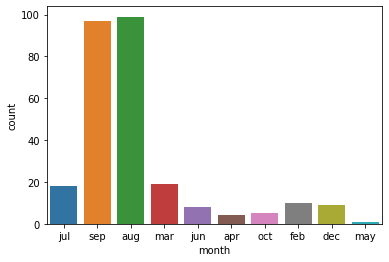

In [110]:
sns.countplot(x = "month", data = forests_2) # Для каждого месяца указано число лесных пожаров

In [111]:
# Комментарий: большее число пожаров приходится на август (конец лета) и сентябрь (начало осени). В остальные месяцы число 
# лесных пожаров куда меньше.

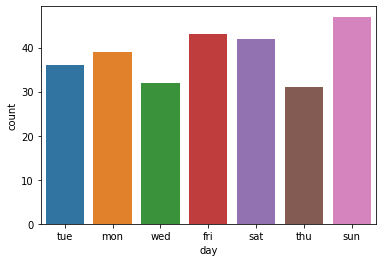

In [112]:
sns.countplot(x = "day", data = forests_2) # Для каждого дня недели указано число лесных пожаров

In [113]:
# Комментарий: четкой связи между конкретным днем недели и числом лесных пожаров не наблюдается

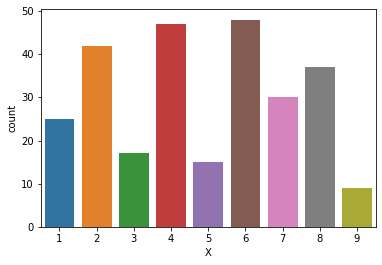

In [114]:
sns.countplot(x = "X", data = forests_2) # Для каждого значения координаты X указано число лесных пожаров

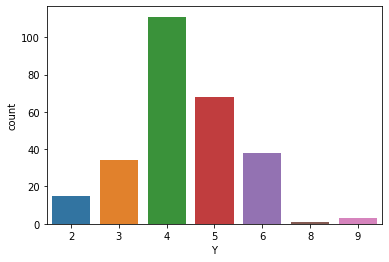

In [115]:
sns.countplot(x = "Y", data = forests_2) # Для каждого значения координаты Y указано число лесных пожаров

In [116]:
# И на первом графике, и на втором графике преобладает значение 4, но вновь нельзя утверждать, что существует четкая связь
# между пространственной координатой и числом лесных пожаров. Возможно, большее число лесных пожаров приходится на "средние"
# значения: 4, 5, 6.

## "Борьба" с выбросами

In [117]:
# ШАГ 1. Выбросим те наблюдения, которые содержат аномально большие значения целевой переменной area.

In [118]:
forests_2.reset_index()

index  X  Y month  day  FFMC    DMC     DC   ISI  temp  ...    area  aug  \
0      138  9  9   jul  tue  85.8   48.3  313.4   3.9  18.0  ...    0.36    0   
1      139  1  4   sep  tue  91.0  129.5  692.6   7.0  21.7  ...    0.43    0   
2      140  2  5   sep  mon  90.9  126.5  686.5   7.0  21.9  ...    0.47    0   
3      141  1  2   aug  wed  95.5   99.9  513.3  13.2  23.3  ...    0.55    1   
4      142  8  6   aug  fri  90.1  108.0  529.8  12.5  21.2  ...    0.61    1   
5      143  1  2   jul  sat  90.0   51.3  296.3   8.7  16.6  ...    0.71    0   
6      144  2  5   aug  wed  95.5   99.9  513.3  13.2  23.8  ...    0.77    1   
7      145  6  5   aug  thu  95.2  131.7  578.8  10.4  27.4  ...    0.90    1   
8      146  5  4   mar  mon  90.1   39.7   86.6   6.2  13.2  ...    0.95    0   
9      147  8  3   sep  tue  84.4   73.4  671.9   3.2  24.2  ...    0.96    0   
10     148  2  2   aug  tue  94.8  108.3  647.1  17.0  17.4  ...    1.07    1   
11     149  8  6   sep  thu  93.7   80.9  685.2  17.9  23.7  ...    1.12    0   
12     150  6  5   jun  fri  92.5   56.4  433.3   7.1  23.2  ...    1.19    0   
13     151  9  9   jul  sun  90.1   68.6  355.2   7.2  24.8  ...    1.36    0   
14     152  3  4   jul  sat  90.1   51.2  424.1   6.2  24.6  ...    1.43    0   
15     153  5  4   sep  fri  94.3   85.1  692.3  15.9  20.1  ...    1.46    0   
16     154  1  5   sep  sat  93.4  145.4  721.4   8.1  29.6  ...    1.46    0   
17     155  7  4   aug  sun  94.8  108.3  647.1  17.0  16.4  ...    1.56    1   
18     156  2  4   sep  sat  93.4  145.4  721.4   8.1  28.6  ...    1.61    0   
19     157  2  2   aug  wed  92.1  111.2  654.1   9.6  18.4  ...    1.63    1   
20     158  2  4   aug  wed  92.1  111.2  654.1   9.6  20.5  ...    1.64    1   
21     159  7  4   sep  fri  92.4  117.9  668.0  12.2  19.0  ...    1.69    0   
22     160  7  4   mar  mon  90.1   39.7   86.6   6.2  16.1  ...    1.75    0   
23     161  6  4   aug  thu  95.2  131.7  578.8  10.4  20.3  ...    1.90    1   
24     162  6  3   mar  sat  90.6   50.1  100.4   7.8  15.2  ...    1.94    0   
25     163  8  6   sep  sat  92.5  121.1  674.4   8.6  17.8  ...    1.95    0   
26     164  8  5   sep  sun  89.7   90.0  704.4   4.8  17.8  ...    2.01    0   
27     165  6  5   mar  thu  84.9   18.2   55.0   3.0   5.3  ...    2.14    0   
28     166  6  5   aug  wed  92.1  111.2  654.1   9.6  16.6  ...    2.29    1   
29     167  6  5   aug  wed  96.0  127.1  570.5  16.5  23.4  ...    2.51    1   
..     ... .. ..   ...  ...   ...    ...    ...   ...   ...  ...     ...  ...   
240    471  4  3   may  fri  89.6   25.4   73.7   5.7  18.0  ...   38.48    0   
241    472  8  3   jun  mon  88.2   96.2  229.0   4.7  14.3  ...    1.94    0   
242    473  9  4   jun  sat  90.5   61.1  252.6   9.4  24.5  ...   70.32    0   
243    474  4  3   jun  thu  93.0  103.8  316.7  10.8  26.4  ...   10.08    0   
244    475  2  5   jun  thu  93.7  121.7  350.2  18.0  22.7  ...    3.19    0   
245    476  4  3   jul  thu  93.5   85.3  395.0   9.9  27.2  ...    1.76    0   
246    477  4  3   jul  sun  93.7  101.3  423.4  14.7  26.1  ...    7.36    0   
247    478  7  4   jul  sun  93.7  101.3  423.4  14.7  18.2  ...    2.21    0   
248    479  7  4   jul  mon  89.2  103.9  431.6   6.4  22.6  ...  278.53    0   
249    480  9  9   jul  thu  93.2  114.4  560.0   9.5  30.2  ...    2.75    0   
250    482  3  4   aug  sun  94.9  130.3  587.1  14.1  23.4  ...    1.29    1   
251    484  2  5   aug  sun  94.9  130.3  587.1  14.1  33.1  ...   26.43    1   
252    485  2  4   aug  mon  95.0  135.5  596.3  21.3  30.6  ...    2.07    1   
253    486  5  4   aug  tue  95.1  141.3  605.8  17.7  24.1  ...    2.00    1   
254    487  5  4   aug  tue  95.1  141.3  605.8  17.7  26.4  ...   16.40    1   
255    488  4  4   aug  tue  95.1  141.3  605.8  17.7  19.4  ...   46.70    1   
256    493  1  3   aug  fri  95.9  158.0  633.6  11.3  27.5  ...   43.32    1   
257    494  6  6   aug  sat  96.0  1

In [119]:
forests_3 = forests_2.set_index(np.arange(270))
forests_3

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  ...    area  aug  \
0    9  9   jul  tue  85.8   48.3  313.4   3.9  18.0  42  ...    0.36    0   
1    1  4   sep  tue  91.0  129.5  692.6   7.0  21.7  38  ...    0.43    0   
2    2  5   sep  mon  90.9  126.5  686.5   7.0  21.9  39  ...    0.47    0   
3    1  2   aug  wed  95.5   99.9  513.3  13.2  23.3  31  ...    0.55    1   
4    8  6   aug  fri  90.1  108.0  529.8  12.5  21.2  51  ...    0.61    1   
5    1  2   jul  sat  90.0   51.3  296.3   8.7  16.6  53  ...    0.71    0   
6    2  5   aug  wed  95.5   99.9  513.3  13.2  23.8  32  ...    0.77    1   
7    6  5   aug  thu  95.2  131.7  578.8  10.4  27.4  22  ...    0.90    1   
8    5  4   mar  mon  90.1   39.7   86.6   6.2  13.2  40  ...    0.95    0   
9    8  3   sep  tue  84.4   73.4  671.9   3.2  24.2  28  ...    0.96    0   
10   2  2   aug  tue  94.8  108.3  647.1  17.0  17.4  43  ...    1.07    1   
11   8  6   sep  thu  93.7   80.9  685.2  17.9  23.7  25  ...    1.12    0   
12   6  5   jun  fri  92.5   56.4  433.3   7.1  23.2  39  ...    1.19    0   
13   9  9   jul  sun  90.1   68.6  355.2   7.2  24.8  29  ...    1.36    0   
14   3  4   jul  sat  90.1   51.2  424.1   6.2  24.6  43  ...    1.43    0   
15   5  4   sep  fri  94.3   85.1  692.3  15.9  20.1  47  ...    1.46    0   
16   1  5   sep  sat  93.4  145.4  721.4   8.1  29.6  27  ...    1.46    0   
17   7  4   aug  sun  94.8  108.3  647.1  17.0  16.4  47  ...    1.56    1   
18   2  4   sep  sat  93.4  145.4  721.4   8.1  28.6  27  ...    1.61    0   
19   2  2   aug  wed  92.1  111.2  654.1   9.6  18.4  45  ...    1.63    1   
20   2  4   aug  wed  92.1  111.2  654.1   9.6  20.5  35  ...    1.64    1   
21   7  4   sep  fri  92.4  117.9  668.0  12.2  19.0  34  ...    1.69    0   
22   7  4   mar  mon  90.1   39.7   86.6   6.2  16.1  29  ...    1.75    0   
23   6  4   aug  thu  95.2  131.7  578.8  10.4  20.3  41  ...    1.90    1   
24   6  3   mar  sat  90.6   50.1  100.4   7.8  15.2  31  ...    1.94    0   
25   8  6   sep  sat  92.5  121.1  674.4   8.6  17.8  56  ...    1.95    0   
26   8  5   sep  sun  89.7   90.0  704.4   4.8  17.8  67  ...    2.01    0   
27   6  5   mar  thu  84.9   18.2   55.0   3.0   5.3  70  ...    2.14    0   
28   6  5   aug  wed  92.1  111.2  654.1   9.6  16.6  47  ...    2.29    1   
29   6  5   aug  wed  96.0  127.1  570.5  16.5  23.4  33  ...    2.51    1   
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..  ...     ...  ...   
240  4  3   may  fri  89.6   25.4   73.7   5.7  18.0  40  ...   38.48    0   
241  8  3   jun  mon  88.2   96.2  229.0   4.7  14.3  79  ...    1.94    0   
242  9  4   jun  sat  90.5   61.1  252.6   9.4  24.5  50  ...   70.32    0   
243  4  3   jun  thu  93.0  103.8  316.7  10.8  26.4  35  ...   10.08    0   
244  2  5   jun  thu  93.7  121.7  350.2  18.0  22.7  40  ...    3.19    0   
245  4  3   jul  thu  93.5   85.3  395.0   9.9  27.2  28  ...    1.76    0   
246  4  3   jul  sun  93.7  101.3  423.4  14.7  26.1  45  ...    7.36    0   
247  7  4   jul  sun  93.7  101.3  423.4  14.7  18.2  82  ...    2.21    0   
248  7  4   jul  mon  89.2  103.9  431.6   6.4  22.6  57  ...  278.53    0   
249  9  9   jul  thu  93.2  114.4  560.0   9.5  30.2  25  ...    2.75    0   
250  3  4   aug  sun  94.9  130.3  587.1  14.1  23.4  40  ...    1.29    1   
251  2  5   aug  sun  94.9  130.3  587.1  14.1  33.1  25  ...   26.43    1   
252  2  4   aug  mon  95.0  135.5  596.3  21.3  30.6  28  ...    2.07    1   
253  5  4   aug  tue  95.1  141.3  605.8  17.7  24.1  43  ...    2.00    1   
254  5  4   aug  tue  95.1  141.3  605.8  17.7  26.4  34  ...   16.40    1   
255  4  4   aug  tue  95.1  141.3  605.8  17.7  19.4  71  ...   46.70    1   
256  1  3   aug  fri  95.9  158.0  633.6  11.3  27.5  29  ...   43.32    1   
257  6  6   aug  sat  96.0  164.0  643.0  14.0  30.8  30  ...    8.59    1   
258  4  5   aug  mon  96.2  175.5  661.8  16.8  32.6  26  ...    2.77    1   
259  3  4   aug  tue  96.1 

In [120]:
y_13 = forests_3.loc[forests_3["area"] > 100] 
print(len(y_13.index)) 
y_13

11


X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  ...     area  aug  \
94   6  4   sep  tue  91.0  129.5  692.6   7.0  18.7  43  ...   103.39    0   
95   9  4   sep  tue  84.4   73.4  671.9   3.2  24.3  36  ...   105.66    0   
96   4  5   sep  sat  92.5  121.1  674.4   8.6  17.7  25  ...   154.88    0   
97   8  6   aug  sun  91.4  142.4  601.4  10.6  19.6  41  ...   196.48    1   
98   2  2   sep  sat  92.5  121.1  674.4   8.6  18.2  46  ...   200.94    0   
99   1  2   sep  tue  91.0  129.5  692.6   7.0  18.8  40  ...   212.88    0   
100  6  5   sep  sat  92.5  121.1  674.4   8.6  25.1  27  ...  1090.84    0   
187  2  2   aug  sat  93.7  231.1  715.1   8.4  21.9  42  ...   174.63    1   
209  8  6   aug  thu  94.8  222.4  698.6  13.9  27.5  27  ...   746.28    1   
213  8  8   aug  wed  91.7  191.4  635.9   7.8  26.2  36  ...   185.76    1   
248  7  4   jul  mon  89.2  103.9  431.6   6.4  22.6  57  ...   278.53    0   

     dec  feb  jul  jun  mar  may  oct  sep  
94     0    0    0    0    0    0    0    1  
95     0    0    0    0    0    0    0    1  
96     0    0    0    0    0    0    0    1  
97     0    0    0    0    0    0    0    0  
98     0    0    0    0    0    0    0    1  
99     0    0    0    0    0    0    0    1  
100    0    0    0    0    0    0    0    1  
187    0    0    0    0    0    0    0    0  
209    0    0    0    0    0    0    0    0  
213    0    0    0    0    0    0    0    0  
248    0    0    1    0    0    0    0    0  

[11 rows x 22 columns]

In [121]:
forests_4 = forests_3.drop(forests_3.index[[96, 97, 98, 99, 100, 187, 209, 213, 248]])
forests_4

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  ...   area  aug  \
0    9  9   jul  tue  85.8   48.3  313.4   3.9  18.0  42  ...   0.36    0   
1    1  4   sep  tue  91.0  129.5  692.6   7.0  21.7  38  ...   0.43    0   
2    2  5   sep  mon  90.9  126.5  686.5   7.0  21.9  39  ...   0.47    0   
3    1  2   aug  wed  95.5   99.9  513.3  13.2  23.3  31  ...   0.55    1   
4    8  6   aug  fri  90.1  108.0  529.8  12.5  21.2  51  ...   0.61    1   
5    1  2   jul  sat  90.0   51.3  296.3   8.7  16.6  53  ...   0.71    0   
6    2  5   aug  wed  95.5   99.9  513.3  13.2  23.8  32  ...   0.77    1   
7    6  5   aug  thu  95.2  131.7  578.8  10.4  27.4  22  ...   0.90    1   
8    5  4   mar  mon  90.1   39.7   86.6   6.2  13.2  40  ...   0.95    0   
9    8  3   sep  tue  84.4   73.4  671.9   3.2  24.2  28  ...   0.96    0   
10   2  2   aug  tue  94.8  108.3  647.1  17.0  17.4  43  ...   1.07    1   
11   8  6   sep  thu  93.7   80.9  685.2  17.9  23.7  25  ...   1.12    0   
12   6  5   jun  fri  92.5   56.4  433.3   7.1  23.2  39  ...   1.19    0   
13   9  9   jul  sun  90.1   68.6  355.2   7.2  24.8  29  ...   1.36    0   
14   3  4   jul  sat  90.1   51.2  424.1   6.2  24.6  43  ...   1.43    0   
15   5  4   sep  fri  94.3   85.1  692.3  15.9  20.1  47  ...   1.46    0   
16   1  5   sep  sat  93.4  145.4  721.4   8.1  29.6  27  ...   1.46    0   
17   7  4   aug  sun  94.8  108.3  647.1  17.0  16.4  47  ...   1.56    1   
18   2  4   sep  sat  93.4  145.4  721.4   8.1  28.6  27  ...   1.61    0   
19   2  2   aug  wed  92.1  111.2  654.1   9.6  18.4  45  ...   1.63    1   
20   2  4   aug  wed  92.1  111.2  654.1   9.6  20.5  35  ...   1.64    1   
21   7  4   sep  fri  92.4  117.9  668.0  12.2  19.0  34  ...   1.69    0   
22   7  4   mar  mon  90.1   39.7   86.6   6.2  16.1  29  ...   1.75    0   
23   6  4   aug  thu  95.2  131.7  578.8  10.4  20.3  41  ...   1.90    1   
24   6  3   mar  sat  90.6   50.1  100.4   7.8  15.2  31  ...   1.94    0   
25   8  6   sep  sat  92.5  121.1  674.4   8.6  17.8  56  ...   1.95    0   
26   8  5   sep  sun  89.7   90.0  704.4   4.8  17.8  67  ...   2.01    0   
27   6  5   mar  thu  84.9   18.2   55.0   3.0   5.3  70  ...   2.14    0   
28   6  5   aug  wed  92.1  111.2  654.1   9.6  16.6  47  ...   2.29    1   
29   6  5   aug  wed  96.0  127.1  570.5  16.5  23.4  33  ...   2.51    1   
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..  ...    ...  ...   
239  6  3   apr  sun  91.0   14.6   25.6  12.3  13.7  33  ...  61.13    0   
240  4  3   may  fri  89.6   25.4   73.7   5.7  18.0  40  ...  38.48    0   
241  8  3   jun  mon  88.2   96.2  229.0   4.7  14.3  79  ...   1.94    0   
242  9  4   jun  sat  90.5   61.1  252.6   9.4  24.5  50  ...  70.32    0   
243  4  3   jun  thu  93.0  103.8  316.7  10.8  26.4  35  ...  10.08    0   
244  2  5   jun  thu  93.7  121.7  350.2  18.0  22.7  40  ...   3.19    0   
245  4  3   jul  thu  93.5   85.3  395.0   9.9  27.2  28  ...   1.76    0   
246  4  3   jul  sun  93.7  101.3  423.4  14.7  26.1  45  ...   7.36    0   
247  7  4   jul  sun  93.7  101.3  423.4  14.7  18.2  82  ...   2.21    0   
249  9  9   jul  thu  93.2  114.4  560.0   9.5  30.2  25  ...   2.75    0   
250  3  4   aug  sun  94.9  130.3  587.1  14.1  23.4  40  ...   1.29    1   
251  2  5   aug  sun  94.9  130.3  587.1  14.1  33.1  25  ...  26.43    1   
252  2  4   aug  mon  95.0  135.5  596.3  21.3  30.6  28  ...   2.07    1   
253  5  4   aug  tue  95.1  141.3  605.8  17.7  24.1  43  ...   2.00    1   
254  5  4   aug  tue  95.1  141.3  605.8  17.7  26.4  34  ...  16.40    1   
255  4  4   aug  tue  95.1  141.3  605.8  17.7  19.4  71  ...  46.70    1   
256  1  3   aug  fri  95.9  158.0  633.6  11.3  27.5  29  ...  43.32    1   
257  6  6   aug  sat  96.0  164.0  643.0  14.0  30.8  30  ...   8.59    1   
258  4  5   aug  mon  96.2  175.5  661.8  16.8  32.6  26  ...   2.77    1   
259  3  4   aug  tue  96.1  181.1  671.2  14.3  32.3  27  ...  14.68    1   
2

In [122]:
# ШАГ 2. Поработаем с переменной FFMC.

In [123]:
y_14 = forests_4.loc[forests_4["FFMC"] < 87] 
print(len(y_14.index)) 
y_14

31


X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  ...    area  aug  dec  \
0    9  9   jul  tue  85.8  48.3  313.4  3.9  18.0  42  ...    0.36    0    0   
9    8  3   sep  tue  84.4  73.4  671.9  3.2  24.2  28  ...    0.96    0    0   
27   6  5   mar  thu  84.9  18.2   55.0  3.0   5.3  70  ...    2.14    0    0   
33   8  6   aug  wed  85.6  90.4  609.6  6.6  17.4  50  ...    2.69    1    0   
38   6  5   apr  thu  81.5   9.1   55.2  2.7   5.8  54  ...    4.61    0    0   
43   8  6   oct  mon  84.9  32.8  664.2  3.0  19.1  32  ...    5.44    0    0   
44   5  4   feb  sun  86.8  15.6   48.3  3.9  12.4  53  ...    6.38    0    0   
58   6  5   apr  thu  81.5   9.1   55.2  2.7   5.8  54  ...   10.93    0    0   
61   2  4   sep  mon  63.5  70.8  665.3  0.8  22.6  38  ...   11.32    0    0   
64   7  4   feb  sun  83.9   8.7   32.1  2.1   8.8  68  ...   13.05    0    0   
95   9  4   sep  tue  84.4  73.4  671.9  3.2  24.3  36  ...  105.66    0    0   
126  4  6   dec  sun  84.4  27.2  353.5  6.8   4.8  57  ...    8.98    0    1   
127  8  6   dec  wed  84.0  27.8  354.6  5.3   5.1  61  ...   11.19    0    1   
128  4  6   dec  thu  84.6  26.4  352.0  2.0   5.1  61  ...    5.38    0    1   
129  4  4   dec  mon  85.4  25.4  349.7  2.6   4.6  21  ...   17.85    0    1   
130  3  4   dec  mon  85.4  25.4  349.7  2.6   4.6  21  ...   10.73    0    1   
131  4  4   dec  mon  85.4  25.4  349.7  2.6   4.6  21  ...   22.03    0    1   
132  4  4   dec  mon  85.4  25.4  349.7  2.6   4.6  21  ...    9.77    0    1   
133  4  6   dec  fri  84.7  26.7  352.6  4.1   2.2  59  ...    9.27    0    1   
134  6  5   dec  tue  85.4  25.4  349.7  2.6   5.1  24  ...   24.77    0    1   
135  3  4   feb  wed  86.9   6.6   18.7  3.2   8.8  35  ...    1.10    0    0   
136  5  4   feb  fri  85.2   4.9   15.8  6.3   7.5  46  ...   24.24    0    0   
196  7  4   feb  mon  84.7   9.5   58.3  4.1   7.5  71  ...    9.96    0    0   
199  4  5   feb  sun  85.0   9.0   56.9  3.5  10.1  62  ...   51.78    0    0   
207  7  4   feb  fri  84.6   3.2   43.6  3.3   8.2  53  ...    4.62    0    0   
233  6  5   feb  tue  75.1   4.4   16.2  1.9   4.6  82  ...    5.39    0    0   
234  6  4   feb  tue  75.1   4.4   16.2  1.9   5.1  77  ...    2.14    0    0   
235  2  2   feb  sat  79.5   3.6   15.3  1.8   4.6  59  ...    6.84    0    0   
267  4  3   aug  sun  81.6  56.7  665.6  1.9  27.8  32  ...    6.44    1    0   
268  2  4   aug  sun  81.6  56.7  665.6  1.9  21.9  71  ...   54.29    1    0   
269  7  4   aug  sun  81.6  56.7  665.6  1.9  21.2  70  ...   11.16    1    0   

     feb  jul  jun  mar  may  oct  sep  
0      0    1    0    0    0    0    0  
9      0    0    0    0    0    0    1  
27     0    0    0    1    0    0    0  
33     0    0    0    0    0    0    0  
38     0    0    0    0    0    0    0  
43     0    0    0    0    0    1    0  
44     1    0    0    0    0    0    0  
58     0    0    0    0    0    0    0  
61     0    0    0    0    0    0    1  
64     1    0    0    0    0    0    0  
95     0    0    0    0    0    0    1  
126    0    0    0    0    0    0    0  
127    0    0    0    0    0    0    0  
128    0    0    0    0    0    0    0  
129    0    0    0    0    0    0    0  
130    0    0    0    0    0    0    0  
131    0    0    0    0    0    0    0  
132    0    0    0    0    0    0    0  
133    0    0    0    0    0    0    0  
134    0    0    0    0    0    0    0  
135    1    0    0    0    0    0    0  
136    1    0    0    0    0    0    0  
196    1    0    0    0    0    0    0  
199    1    0    0    0    0    0    0  
207    1    0    0    0    0    0    0  
233    1    0    0    0    0    0    0  
234    1    0    0    0    0    0    0  
235    1    0    0    0    0    0    0  
267    0    0    0    0    0    0    0  
268    0    0    0    0    0    0    0  
269    0    0    0    0    0    0    0  

[31 rows x 22 columns]

In [124]:
Z_1 = np.abs(stats.zscore(forests_4["FFMC"])) # используем z-score для обнаружения выбросов (в дополнение к box plot) здесь и всюду далее
print(Z_1)

[1.38588023e+00 1.12415622e-03 2.55490050e-02 1.20141641e+00
 2.38934295e-01 2.65607456e-01 1.20141641e+00 1.12139693e+00
 2.38934295e-01 1.75930449e+00 1.01470428e+00 7.21299510e-01
 4.01221575e-01 2.38934295e-01 2.38934295e-01 8.81338478e-01
 6.41280026e-01 1.01470428e+00 6.41280026e-01 2.94528930e-01
 2.94528930e-01 3.74548414e-01 2.38934295e-01 1.12139693e+00
 1.05568489e-01 4.01221575e-01 3.45626940e-01 1.62593868e+00
 2.94528930e-01 1.33478222e+00 5.44704787e-02 1.12139693e+00
 5.07914220e-01 1.43922655e+00 1.07816801e-01 2.55490050e-02
 2.12261134e-01 2.12261134e-01 2.53282616e+00 2.12261134e-01
 2.38934295e-01 5.85685391e-01 3.74548414e-01 1.62593868e+00
 1.11914862e+00 1.87836285e-01 7.74645833e-01 1.12415622e-03
 4.52319585e-01 2.55490050e-02 5.22221663e-02 7.88953276e-02
 5.44704787e-02 1.12139693e+00 1.01470428e+00 5.07914220e-01
 1.01470428e+00 7.74645833e-01 2.53282616e+00 5.07914220e-01
 1.12415622e-03 7.33399519e+00 1.12415622e-03 2.38934295e-01
 1.89267029e+00 1.078168

In [125]:
Z_1.shape

(261,)

In [126]:
print(np.where(Z_1 > 3))

(array([ 61, 225, 226, 227], dtype=int64),)


In [127]:
forests_4.iloc[61]

X            2
Y            4
month      sep
day        mon
FFMC      63.5
DMC       70.8
DC       665.3
ISI        0.8
temp      22.6
RH          38
wind       3.6
rain         0
area     11.32
aug          0
dec          0
feb          0
jul          0
jun          0
mar          0
may          0
oct          0
sep          1
Name: 61, dtype: object

In [128]:
forests_4.iloc[225]

X           6
Y           5
month     feb
day       tue
FFMC     75.1
DMC       4.4
DC       16.2
ISI       1.9
temp      4.6
RH         82
wind      6.3
rain        0
area     5.39
aug         0
dec         0
feb         1
jul         0
jun         0
mar         0
may         0
oct         0
sep         0
Name: 233, dtype: object

In [129]:
forests_4.iloc[226]

X           6
Y           4
month     feb
day       tue
FFMC     75.1
DMC       4.4
DC       16.2
ISI       1.9
temp      5.1
RH         77
wind      5.4
rain        0
area     2.14
aug         0
dec         0
feb         1
jul         0
jun         0
mar         0
may         0
oct         0
sep         0
Name: 234, dtype: object

In [130]:
forests_4.iloc[227]

X           2
Y           2
month     feb
day       sat
FFMC     79.5
DMC       3.6
DC       15.3
ISI       1.8
temp      4.6
RH         59
wind      0.9
rain        0
area     6.84
aug         0
dec         0
feb         1
jul         0
jun         0
mar         0
may         0
oct         0
sep         0
Name: 235, dtype: object

In [131]:
forests_5 = forests_4.drop(forests_4.index[[61, 225, 226, 227]])
forests_5

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  ...   area  aug  \
0    9  9   jul  tue  85.8   48.3  313.4   3.9  18.0  42  ...   0.36    0   
1    1  4   sep  tue  91.0  129.5  692.6   7.0  21.7  38  ...   0.43    0   
2    2  5   sep  mon  90.9  126.5  686.5   7.0  21.9  39  ...   0.47    0   
3    1  2   aug  wed  95.5   99.9  513.3  13.2  23.3  31  ...   0.55    1   
4    8  6   aug  fri  90.1  108.0  529.8  12.5  21.2  51  ...   0.61    1   
5    1  2   jul  sat  90.0   51.3  296.3   8.7  16.6  53  ...   0.71    0   
6    2  5   aug  wed  95.5   99.9  513.3  13.2  23.8  32  ...   0.77    1   
7    6  5   aug  thu  95.2  131.7  578.8  10.4  27.4  22  ...   0.90    1   
8    5  4   mar  mon  90.1   39.7   86.6   6.2  13.2  40  ...   0.95    0   
9    8  3   sep  tue  84.4   73.4  671.9   3.2  24.2  28  ...   0.96    0   
10   2  2   aug  tue  94.8  108.3  647.1  17.0  17.4  43  ...   1.07    1   
11   8  6   sep  thu  93.7   80.9  685.2  17.9  23.7  25  ...   1.12    0   
12   6  5   jun  fri  92.5   56.4  433.3   7.1  23.2  39  ...   1.19    0   
13   9  9   jul  sun  90.1   68.6  355.2   7.2  24.8  29  ...   1.36    0   
14   3  4   jul  sat  90.1   51.2  424.1   6.2  24.6  43  ...   1.43    0   
15   5  4   sep  fri  94.3   85.1  692.3  15.9  20.1  47  ...   1.46    0   
16   1  5   sep  sat  93.4  145.4  721.4   8.1  29.6  27  ...   1.46    0   
17   7  4   aug  sun  94.8  108.3  647.1  17.0  16.4  47  ...   1.56    1   
18   2  4   sep  sat  93.4  145.4  721.4   8.1  28.6  27  ...   1.61    0   
19   2  2   aug  wed  92.1  111.2  654.1   9.6  18.4  45  ...   1.63    1   
20   2  4   aug  wed  92.1  111.2  654.1   9.6  20.5  35  ...   1.64    1   
21   7  4   sep  fri  92.4  117.9  668.0  12.2  19.0  34  ...   1.69    0   
22   7  4   mar  mon  90.1   39.7   86.6   6.2  16.1  29  ...   1.75    0   
23   6  4   aug  thu  95.2  131.7  578.8  10.4  20.3  41  ...   1.90    1   
24   6  3   mar  sat  90.6   50.1  100.4   7.8  15.2  31  ...   1.94    0   
25   8  6   sep  sat  92.5  121.1  674.4   8.6  17.8  56  ...   1.95    0   
26   8  5   sep  sun  89.7   90.0  704.4   4.8  17.8  67  ...   2.01    0   
27   6  5   mar  thu  84.9   18.2   55.0   3.0   5.3  70  ...   2.14    0   
28   6  5   aug  wed  92.1  111.2  654.1   9.6  16.6  47  ...   2.29    1   
29   6  5   aug  wed  96.0  127.1  570.5  16.5  23.4  33  ...   2.51    1   
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..  ...    ...  ...   
239  6  3   apr  sun  91.0   14.6   25.6  12.3  13.7  33  ...  61.13    0   
240  4  3   may  fri  89.6   25.4   73.7   5.7  18.0  40  ...  38.48    0   
241  8  3   jun  mon  88.2   96.2  229.0   4.7  14.3  79  ...   1.94    0   
242  9  4   jun  sat  90.5   61.1  252.6   9.4  24.5  50  ...  70.32    0   
243  4  3   jun  thu  93.0  103.8  316.7  10.8  26.4  35  ...  10.08    0   
244  2  5   jun  thu  93.7  121.7  350.2  18.0  22.7  40  ...   3.19    0   
245  4  3   jul  thu  93.5   85.3  395.0   9.9  27.2  28  ...   1.76    0   
246  4  3   jul  sun  93.7  101.3  423.4  14.7  26.1  45  ...   7.36    0   
247  7  4   jul  sun  93.7  101.3  423.4  14.7  18.2  82  ...   2.21    0   
249  9  9   jul  thu  93.2  114.4  560.0   9.5  30.2  25  ...   2.75    0   
250  3  4   aug  sun  94.9  130.3  587.1  14.1  23.4  40  ...   1.29    1   
251  2  5   aug  sun  94.9  130.3  587.1  14.1  33.1  25  ...  26.43    1   
252  2  4   aug  mon  95.0  135.5  596.3  21.3  30.6  28  ...   2.07    1   
253  5  4   aug  tue  95.1  141.3  605.8  17.7  24.1  43  ...   2.00    1   
254  5  4   aug  tue  95.1  141.3  605.8  17.7  26.4  34  ...  16.40    1   
255  4  4   aug  tue  95.1  141.3  605.8  17.7  19.4  71  ...  46.70    1   
256  1  3   aug  fri  95.9  158.0  633.6  11.3  27.5  29  ...  43.32    1   
257  6  6   aug  sat  96.0  164.0  643.0  14.0  30.8  30  ...   8.59    1   
258  4  5   aug  mon  96.2  175.5  661.8  16.8  32.6  26  ...   2.77    1   
259  3  4   aug  tue  96.1  181.1  671.2  14.3  32.3  27  ...  14.68    1   
2

In [132]:
# ШАГ 3. Поработаем с переменной DMC.

In [133]:
y_15 = forests_5.loc[forests_5["DMC"] > 225] 
print(len(y_15.index)) 
y_15

16


X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  ...   area  aug  \
184  7  4   sep  sun  91.0  276.3  825.1   7.1  13.8  77  ...  11.06    0   
185  6  5   sep  fri  90.3  290.0  855.3   7.4  10.3  78  ...  18.30    0   
191  9  6   aug  thu  91.6  248.4  753.8   6.3  20.5  58  ...  42.87    1   
192  8  4   aug  sat  91.6  273.8  819.1   7.7  21.3  44  ...  12.18    1   
195  6  4   aug  fri  94.8  227.0  706.7  12.0  23.3  34  ...  28.74    1   
198  1  3   sep  sun  91.0  276.3  825.1   7.1  21.9  43  ...  70.76    0   
205  6  5   sep  sat  87.1  291.3  860.6   4.0  17.0  67  ...   3.95    0   
206  4  3   sep  fri  90.3  290.0  855.3   7.4  19.9  44  ...   7.80    0   
214  8  6   jul  sun  88.9  263.1  795.9   5.2  29.3  27  ...   6.30    0   
216  8  6   aug  sat  93.7  231.1  715.1   8.4  26.9  31  ...   4.96    1   
220  2  4   aug  sun  93.6  235.1  723.1  10.1  20.9  66  ...  15.34    1   
222  2  5   aug  sat  93.7  231.1  715.1   8.4  23.6  53  ...   6.43    1   
226  2  5   sep  fri  90.3  290.0  855.3   7.4  16.2  58  ...   9.96    0   
230  8  6   aug  sat  93.7  231.1  715.1   8.4  18.9  64  ...   3.32    1   
231  7  4   aug  sat  91.6  273.8  819.1   7.7  15.5  72  ...   1.94    1   
232  1  4   sep  sun  91.0  276.3  825.1   7.1  14.5  76  ...   3.71    0   

     dec  feb  jul  jun  mar  may  oct  sep  
184    0    0    0    0    0    0    0    1  
185    0    0    0    0    0    0    0    1  
191    0    0    0    0    0    0    0    0  
192    0    0    0    0    0    0    0    0  
195    0    0    0    0    0    0    0    0  
198    0    0    0    0    0    0    0    1  
205    0    0    0    0    0    0    0    1  
206    0    0    0    0    0    0    0    1  
214    0    0    1    0    0    0    0    0  
216    0    0    0    0    0    0    0    0  
220    0    0    0    0    0    0    0    0  
222    0    0    0    0    0    0    0    0  
226    0    0    0    0    0    0    0    1  
230    0    0    0    0    0    0    0    0  
231    0    0    0    0    0    0    0    0  
232    0    0    0    0    0    0    0    1  

[16 rows x 22 columns]

In [134]:
Z_2 = np.abs(stats.zscore(forests_5["DMC"])) 
print(Z_2)

[1.09031522 0.24099368 0.19180739 0.24431104 0.11150806 1.04112893
 0.24431104 0.27706362 1.23131591 0.67878993 0.10658943 0.55582421
 0.95751223 0.75748799 1.04276847 0.4869634  0.50168101 0.10658943
 0.50168101 0.05904269 0.05904269 0.05080669 1.23131591 0.27706362
 1.06080344 0.10327207 0.4066258  1.58381765 0.05904269 0.20164465
 1.09031522 0.27706362 0.30329631 0.40006762 0.45249472 0.19180739
 0.29349733 0.29349733 1.73301606 0.24922967 0.52303335 0.53283233
 0.15245836 1.34444438 1.62644577 1.08703613 0.34264534 0.24099368
 1.04112893 0.19180739 1.19524597 1.16081556 1.09031522 0.27706362
 0.10658943 0.30329631 0.10658943 0.34264534 1.73301606 0.3639594
 0.24099368 0.24099368 1.26574631 1.73957423 1.26082769 1.06080344
 0.3639594  0.40330843 0.24099368 0.05080669 0.55582421 1.16573419
 0.40330843 0.4869634  1.02637304 1.29525809 1.29525809 0.15245836
 0.37711402 0.30329631 1.23131591 0.24922967 0.43282021 1.02637304
 0.58201862 0.52303335 0.56562319 1.08703613 0.54106832 0.56562

In [135]:
print(np.where(Z_2 > 2.8))

(array([179, 198, 199, 217], dtype=int64),)


In [136]:
print(np.where(Z_2 > 3))

(array([], dtype=int64),)


In [137]:
forests_6 = forests_5.drop(forests_5.index[[179, 198, 199, 217]])
forests_6

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  ...   area  aug  \
0    9  9   jul  tue  85.8   48.3  313.4   3.9  18.0  42  ...   0.36    0   
1    1  4   sep  tue  91.0  129.5  692.6   7.0  21.7  38  ...   0.43    0   
2    2  5   sep  mon  90.9  126.5  686.5   7.0  21.9  39  ...   0.47    0   
3    1  2   aug  wed  95.5   99.9  513.3  13.2  23.3  31  ...   0.55    1   
4    8  6   aug  fri  90.1  108.0  529.8  12.5  21.2  51  ...   0.61    1   
5    1  2   jul  sat  90.0   51.3  296.3   8.7  16.6  53  ...   0.71    0   
6    2  5   aug  wed  95.5   99.9  513.3  13.2  23.8  32  ...   0.77    1   
7    6  5   aug  thu  95.2  131.7  578.8  10.4  27.4  22  ...   0.90    1   
8    5  4   mar  mon  90.1   39.7   86.6   6.2  13.2  40  ...   0.95    0   
9    8  3   sep  tue  84.4   73.4  671.9   3.2  24.2  28  ...   0.96    0   
10   2  2   aug  tue  94.8  108.3  647.1  17.0  17.4  43  ...   1.07    1   
11   8  6   sep  thu  93.7   80.9  685.2  17.9  23.7  25  ...   1.12    0   
12   6  5   jun  fri  92.5   56.4  433.3   7.1  23.2  39  ...   1.19    0   
13   9  9   jul  sun  90.1   68.6  355.2   7.2  24.8  29  ...   1.36    0   
14   3  4   jul  sat  90.1   51.2  424.1   6.2  24.6  43  ...   1.43    0   
15   5  4   sep  fri  94.3   85.1  692.3  15.9  20.1  47  ...   1.46    0   
16   1  5   sep  sat  93.4  145.4  721.4   8.1  29.6  27  ...   1.46    0   
17   7  4   aug  sun  94.8  108.3  647.1  17.0  16.4  47  ...   1.56    1   
18   2  4   sep  sat  93.4  145.4  721.4   8.1  28.6  27  ...   1.61    0   
19   2  2   aug  wed  92.1  111.2  654.1   9.6  18.4  45  ...   1.63    1   
20   2  4   aug  wed  92.1  111.2  654.1   9.6  20.5  35  ...   1.64    1   
21   7  4   sep  fri  92.4  117.9  668.0  12.2  19.0  34  ...   1.69    0   
22   7  4   mar  mon  90.1   39.7   86.6   6.2  16.1  29  ...   1.75    0   
23   6  4   aug  thu  95.2  131.7  578.8  10.4  20.3  41  ...   1.90    1   
24   6  3   mar  sat  90.6   50.1  100.4   7.8  15.2  31  ...   1.94    0   
25   8  6   sep  sat  92.5  121.1  674.4   8.6  17.8  56  ...   1.95    0   
26   8  5   sep  sun  89.7   90.0  704.4   4.8  17.8  67  ...   2.01    0   
27   6  5   mar  thu  84.9   18.2   55.0   3.0   5.3  70  ...   2.14    0   
28   6  5   aug  wed  92.1  111.2  654.1   9.6  16.6  47  ...   2.29    1   
29   6  5   aug  wed  96.0  127.1  570.5  16.5  23.4  33  ...   2.51    1   
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..  ...    ...  ...   
239  6  3   apr  sun  91.0   14.6   25.6  12.3  13.7  33  ...  61.13    0   
240  4  3   may  fri  89.6   25.4   73.7   5.7  18.0  40  ...  38.48    0   
241  8  3   jun  mon  88.2   96.2  229.0   4.7  14.3  79  ...   1.94    0   
242  9  4   jun  sat  90.5   61.1  252.6   9.4  24.5  50  ...  70.32    0   
243  4  3   jun  thu  93.0  103.8  316.7  10.8  26.4  35  ...  10.08    0   
244  2  5   jun  thu  93.7  121.7  350.2  18.0  22.7  40  ...   3.19    0   
245  4  3   jul  thu  93.5   85.3  395.0   9.9  27.2  28  ...   1.76    0   
246  4  3   jul  sun  93.7  101.3  423.4  14.7  26.1  45  ...   7.36    0   
247  7  4   jul  sun  93.7  101.3  423.4  14.7  18.2  82  ...   2.21    0   
249  9  9   jul  thu  93.2  114.4  560.0   9.5  30.2  25  ...   2.75    0   
250  3  4   aug  sun  94.9  130.3  587.1  14.1  23.4  40  ...   1.29    1   
251  2  5   aug  sun  94.9  130.3  587.1  14.1  33.1  25  ...  26.43    1   
252  2  4   aug  mon  95.0  135.5  596.3  21.3  30.6  28  ...   2.07    1   
253  5  4   aug  tue  95.1  141.3  605.8  17.7  24.1  43  ...   2.00    1   
254  5  4   aug  tue  95.1  141.3  605.8  17.7  26.4  34  ...  16.40    1   
255  4  4   aug  tue  95.1  141.3  605.8  17.7  19.4  71  ...  46.70    1   
256  1  3   aug  fri  95.9  158.0  633.6  11.3  27.5  29  ...  43.32    1   
257  6  6   aug  sat  96.0  164.0  643.0  14.0  30.8  30  ...   8.59    1   
258  4  5   aug  mon  96.2  175.5  661.8  16.8  32.6  26  ...   2.77    1   
259  3  4   aug  tue  96.1  181.1  671.2  14.3  32.3  27  ...  14.68    1   
2

In [138]:
# ШАГ 4. Поработаем с переменной DC.

In [139]:
y_16 = forests_6.loc[forests_6["DC"] < 200] 
print(len(y_16.index)) 
y_16

31


X  Y month  day  FFMC   DMC     DC   ISI  temp  RH  ...   area  aug  dec  \
8    5  4   mar  mon  90.1  39.7   86.6   6.2  13.2  40  ...   0.95    0    0   
22   7  4   mar  mon  90.1  39.7   86.6   6.2  16.1  29  ...   1.75    0    0   
24   6  3   mar  sat  90.6  50.1  100.4   7.8  15.2  31  ...   1.94    0    0   
27   6  5   mar  thu  84.9  18.2   55.0   3.0   5.3  70  ...   2.14    0    0   
30   6  5   mar  fri  91.2  48.3   97.8  12.5  14.6  26  ...   2.53    0    0   
38   6  5   apr  thu  81.5   9.1   55.2   2.7   5.8  54  ...   4.61    0    0   
44   5  4   feb  sun  86.8  15.6   48.3   3.9  12.4  53  ...   6.38    0    0   
48   8  6   mar  sun  89.3  51.3  102.2   9.6  11.5  39  ...   7.19    0    0   
50   6  4   mar  sat  90.8  41.9   89.4   7.9  13.3  42  ...   7.40    0    0   
51   7  4   mar  sun  90.7  44.0   92.4   5.5  11.5  60  ...   8.24    0    0   
52   6  5   mar  fri  91.2  48.3   97.8  12.5  11.7  33  ...   8.31    0    0   
58   6  5   apr  thu  81.5   9.1   55.2   2.7   5.8  54  ...  10.93    0    0   
63   6  5   mar  sun  90.1  37.6   83.7   7.2  12.4  54  ...  12.10    0    0   
64   7  4   feb  sun  83.9   8.7   32.1   2.1   8.8  68  ...  13.05    0    0   
66   5  6   mar  sat  90.6  50.1  100.4   7.8  15.1  64  ...  13.99    0    0   
75   7  3   mar  mon  87.6  52.2  103.8   5.0  11.0  46  ...  27.35    0    0   
76   4  4   mar  sat  91.7  35.8   80.8   7.8  17.0  27  ...  28.66    0    0   
77   4  4   mar  sat  91.7  35.8   80.8   7.8  17.0  27  ...  28.66    0    0   
81   6  5   mar  mon  90.1  39.7   86.6   6.2  15.2  27  ...  31.86    0    0   
84   4  3   mar  mon  87.6  52.2  103.8   5.0  11.0  46  ...  36.85    0    0   
135  3  4   feb  wed  86.9   6.6   18.7   3.2   8.8  35  ...   1.10    0    0   
136  5  4   feb  fri  85.2   4.9   15.8   6.3   7.5  46  ...  24.24    0    0   
196  7  4   feb  mon  84.7   9.5   58.3   4.1   7.5  71  ...   9.96    0    0   
199  4  5   feb  sun  85.0   9.0   56.9   3.5  10.1  62  ...  51.78    0    0   
207  7  4   feb  fri  84.6   3.2   43.6   3.3   8.2  53  ...   4.62    0    0   
225  6  5   apr  mon  87.9  24.9   41.6   3.7  10.9  64  ...   3.35    0    0   
236  6  5   mar  mon  87.2  15.1   36.9   7.1  10.2  45  ...   3.18    0    0   
237  3  4   mar  wed  90.2  18.5   41.1   7.3  11.2  41  ...   5.55    0    0   
238  6  5   mar  thu  91.3  20.6   43.5   8.5  13.3  27  ...   6.61    0    0   
239  6  3   apr  sun  91.0  14.6   25.6  12.3  13.7  33  ...  61.13    0    0   
240  4  3   may  fri  89.6  25.4   73.7   5.7  18.0  40  ...  38.48    0    0   

     feb  jul  jun  mar  may  oct  sep  
8      0    0    0    1    0    0    0  
22     0    0    0    1    0    0    0  
24     0    0    0    1    0    0    0  
27     0    0    0    1    0    0    0  
30     0    0    0    1    0    0    0  
38     0    0    0    0    0    0    0  
44     1    0    0    0    0    0    0  
48     0    0    0    1    0    0    0  
50     0    0    0    1    0    0    0  
51     0    0    0    1    0    0    0  
52     0    0    0    1    0    0    0  
58     0    0    0    0    0    0    0  
63     0    0    0    1    0    0    0  
64     1    0    0    0    0    0    0  
66     0    0    0    1    0    0    0  
75     0    0    0    1    0    0    0  
76     0    0    0    1    0    0    0  
77     0    0    0    1    0    0    0  
81     0    0    0    1    0    0    0  
84     0    0    0    1    0    0    0  
135    1    0    0    0    0    0    0  
136    1    0    0    0    0    0    0  
196    1    0    0    0    0    0    0  
199    1    0    0    0    0    0    0  
207    1    0    0    0    0    0    0  
225    0    0    0    0    0    0    0  
236    0    0    0    1    0    0    0  
237    0    0    0    1    0    0    0  
238    0    0    0    1    0    0    0  
239    0    0    0    0    0    0    0  
240    0    0    0    0    1    0    0  

[31 rows x 22 columns]

In [140]:
Z_3 = np.abs(stats.zscore(forests_6["DC"])) 
print(Z_3)

[1.13792755 0.54404389 0.51698686 0.25125537 0.17806832 1.21377595
 0.25125537 0.03927503 2.1439168  0.45222741 0.34222506 0.51122061
 0.60610167 0.95252036 0.64690899 0.54271322 0.67178856 0.34222506
 0.67178856 0.37327411 0.37327411 0.43492865 2.1439168  0.03927503
 2.08270582 0.46331636 0.59638372 2.28408109 0.37327411 0.00245973
 2.09423832 0.03927503 0.57509294 0.17589086 0.13951911 0.51698686
 0.24065031 0.24065031 2.28319397 0.27169936 0.73521733 0.19762519
 0.4912605  0.41807345 2.31379947 0.55956841 0.0743161  0.54404389
 2.07472178 0.51698686 2.13149718 2.11819045 2.09423832 0.03927503
 0.34222506 0.57509294 0.34222506 0.0743161  2.28319397 0.60525488
 0.54404389 0.54404389 2.15677998 2.38565584 0.46065501 2.08270582
 0.60525488 0.10758295 0.54404389 0.43492865 0.51122061 0.51876109
 0.10758295 0.54271322 2.06762485 2.16964316 2.16964316 0.4912605
 0.6207794  0.57509294 2.1439168  0.27169936 0.63852172 2.06762485
 1.15345208 0.73521733 0.70372472 0.55956841 0.39541168 0.70372

In [141]:
print(np.where(Z_3 > 3))

(array([], dtype=int64),)


In [142]:
print(np.where(Z_3 > 2.9))

(array([], dtype=int64),)


In [143]:
print(np.where(Z_3 > 2.8))

(array([], dtype=int64),)


In [144]:
# ШАГ 5. Поработаем с переменной ISI.

In [145]:
y_17 = forests_6.loc[forests_6["ISI"] > 18] 
print(len(y_17.index)) 
y_17

6


X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  ...   area  aug  \
68   2  2   aug  sat  93.5  139.4  594.2  20.3  22.9  31  ...  15.45    1   
73   7  4   aug  sat  93.5  139.4  594.2  20.3   5.1  96  ...  26.00    1   
121  6  5   aug  tue  94.3  131.7  607.1  22.7  19.4  55  ...   0.17    1   
252  2  4   aug  mon  95.0  135.5  596.3  21.3  30.6  28  ...   2.07    1   
262  2  4   aug  wed  94.5  139.4  689.1  20.0  29.2  30  ...   1.95    1   
263  4  3   aug  wed  94.5  139.4  689.1  20.0  28.9  29  ...  49.59    1   

     dec  feb  jul  jun  mar  may  oct  sep  
68     0    0    0    0    0    0    0    0  
73     0    0    0    0    0    0    0    0  
121    0    0    0    0    0    0    0    0  
252    0    0    0    0    0    0    0    0  
262    0    0    0    0    0    0    0    0  
263    0    0    0    0    0    0    0    0  

[6 rows x 22 columns]

In [146]:
Z_4 = np.abs(stats.zscore(forests_6["ISI"])) 
print(Z_4)

[1.3198327  0.56896603 0.56896603 0.9327673  0.76321676 0.15720044
 0.9327673  0.25456515 0.76273808 1.48938324 1.85318451 2.07117806
 0.54474453 0.52052302 0.76273808 1.58674795 0.30252947 1.85318451
 0.30252947 0.06079311 0.06079311 0.69055225 0.76273808 0.25456515
 0.37519399 0.18142195 1.10183915 1.53782625 0.06079311 1.73207698
 0.76321676 0.25456515 0.03609292 0.66585206 0.30300816 0.56896603
 0.10875743 0.10875743 1.61049077 0.73851657 0.76273808 0.08453593
 0.20564345 1.53782625 1.3198327  0.42411569 1.3929759  0.56896603
 0.06079311 0.56896603 0.35097249 0.93228862 0.76321676 0.25456515
 1.85318451 0.03609292 1.85318451 1.3929759  1.61049077 0.03609292
 0.56896603 0.56896603 0.52052302 1.7558198  1.00495313 0.37519399
 0.03609292 2.65249419 0.56896603 0.69055225 2.07117806 0.64163055
 2.65249419 1.58674795 1.05339614 0.37519399 0.37519399 0.20564345
 0.54474453 0.03609292 0.76273808 0.73851657 1.10231784 1.05339614
 0.61740905 0.76273808 0.30252947 0.42411569 0.61788773 0.3025

In [147]:
print(np.where(Z_4 > 3))

(array([115], dtype=int64),)


In [148]:
print(np.where(Z_4 > 2.9))

(array([115], dtype=int64),)


In [149]:
print(np.where(Z_4 > 2.8))

(array([115, 235], dtype=int64),)


In [150]:
forests_7 = forests_6.drop(forests_6.index[[115, 235]])
forests_7

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  ...   area  aug  \
0    9  9   jul  tue  85.8   48.3  313.4   3.9  18.0  42  ...   0.36    0   
1    1  4   sep  tue  91.0  129.5  692.6   7.0  21.7  38  ...   0.43    0   
2    2  5   sep  mon  90.9  126.5  686.5   7.0  21.9  39  ...   0.47    0   
3    1  2   aug  wed  95.5   99.9  513.3  13.2  23.3  31  ...   0.55    1   
4    8  6   aug  fri  90.1  108.0  529.8  12.5  21.2  51  ...   0.61    1   
5    1  2   jul  sat  90.0   51.3  296.3   8.7  16.6  53  ...   0.71    0   
6    2  5   aug  wed  95.5   99.9  513.3  13.2  23.8  32  ...   0.77    1   
7    6  5   aug  thu  95.2  131.7  578.8  10.4  27.4  22  ...   0.90    1   
8    5  4   mar  mon  90.1   39.7   86.6   6.2  13.2  40  ...   0.95    0   
9    8  3   sep  tue  84.4   73.4  671.9   3.2  24.2  28  ...   0.96    0   
10   2  2   aug  tue  94.8  108.3  647.1  17.0  17.4  43  ...   1.07    1   
11   8  6   sep  thu  93.7   80.9  685.2  17.9  23.7  25  ...   1.12    0   
12   6  5   jun  fri  92.5   56.4  433.3   7.1  23.2  39  ...   1.19    0   
13   9  9   jul  sun  90.1   68.6  355.2   7.2  24.8  29  ...   1.36    0   
14   3  4   jul  sat  90.1   51.2  424.1   6.2  24.6  43  ...   1.43    0   
15   5  4   sep  fri  94.3   85.1  692.3  15.9  20.1  47  ...   1.46    0   
16   1  5   sep  sat  93.4  145.4  721.4   8.1  29.6  27  ...   1.46    0   
17   7  4   aug  sun  94.8  108.3  647.1  17.0  16.4  47  ...   1.56    1   
18   2  4   sep  sat  93.4  145.4  721.4   8.1  28.6  27  ...   1.61    0   
19   2  2   aug  wed  92.1  111.2  654.1   9.6  18.4  45  ...   1.63    1   
20   2  4   aug  wed  92.1  111.2  654.1   9.6  20.5  35  ...   1.64    1   
21   7  4   sep  fri  92.4  117.9  668.0  12.2  19.0  34  ...   1.69    0   
22   7  4   mar  mon  90.1   39.7   86.6   6.2  16.1  29  ...   1.75    0   
23   6  4   aug  thu  95.2  131.7  578.8  10.4  20.3  41  ...   1.90    1   
24   6  3   mar  sat  90.6   50.1  100.4   7.8  15.2  31  ...   1.94    0   
25   8  6   sep  sat  92.5  121.1  674.4   8.6  17.8  56  ...   1.95    0   
26   8  5   sep  sun  89.7   90.0  704.4   4.8  17.8  67  ...   2.01    0   
27   6  5   mar  thu  84.9   18.2   55.0   3.0   5.3  70  ...   2.14    0   
28   6  5   aug  wed  92.1  111.2  654.1   9.6  16.6  47  ...   2.29    1   
29   6  5   aug  wed  96.0  127.1  570.5  16.5  23.4  33  ...   2.51    1   
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..  ...    ...  ...   
238  6  5   mar  thu  91.3   20.6   43.5   8.5  13.3  27  ...   6.61    0   
239  6  3   apr  sun  91.0   14.6   25.6  12.3  13.7  33  ...  61.13    0   
240  4  3   may  fri  89.6   25.4   73.7   5.7  18.0  40  ...  38.48    0   
241  8  3   jun  mon  88.2   96.2  229.0   4.7  14.3  79  ...   1.94    0   
242  9  4   jun  sat  90.5   61.1  252.6   9.4  24.5  50  ...  70.32    0   
243  4  3   jun  thu  93.0  103.8  316.7  10.8  26.4  35  ...  10.08    0   
244  2  5   jun  thu  93.7  121.7  350.2  18.0  22.7  40  ...   3.19    0   
245  4  3   jul  thu  93.5   85.3  395.0   9.9  27.2  28  ...   1.76    0   
246  4  3   jul  sun  93.7  101.3  423.4  14.7  26.1  45  ...   7.36    0   
247  7  4   jul  sun  93.7  101.3  423.4  14.7  18.2  82  ...   2.21    0   
249  9  9   jul  thu  93.2  114.4  560.0   9.5  30.2  25  ...   2.75    0   
250  3  4   aug  sun  94.9  130.3  587.1  14.1  23.4  40  ...   1.29    1   
251  2  5   aug  sun  94.9  130.3  587.1  14.1  33.1  25  ...  26.43    1   
253  5  4   aug  tue  95.1  141.3  605.8  17.7  24.1  43  ...   2.00    1   
254  5  4   aug  tue  95.1  141.3  605.8  17.7  26.4  34  ...  16.40    1   
255  4  4   aug  tue  95.1  141.3  605.8  17.7  19.4  71  ...  46.70    1   
256  1  3   aug  fri  95.9  158.0  633.6  11.3  27.5  29  ...  43.32    1   
257  6  6   aug  sat  96.0  164.0  643.0  14.0  30.8  30  ...   8.59    1   
258  4  5   aug  mon  96.2  175.5  661.8  16.8  32.6  26  ...   2.77    1   
259  3  4   aug  tue  96.1  181.1  671.2  14.3  32.3  27  ...  14.68    1   
2

In [151]:
# ШАГ 6. Поработаем с переменной temp.

In [152]:
y_18 = forests_7.loc[forests_7["temp"] < 6] 
print(len(y_18.index)) 
y_18

13


X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  ...   area  aug  \
27   6  5   mar  thu  84.9   18.2   55.0   3.0   5.3  70  ...   2.14    0   
38   6  5   apr  thu  81.5    9.1   55.2   2.7   5.8  54  ...   4.61    0   
58   6  5   apr  thu  81.5    9.1   55.2   2.7   5.8  54  ...  10.93    0   
73   7  4   aug  sat  93.5  139.4  594.2  20.3   5.1  96  ...  26.00    1   
126  4  6   dec  sun  84.4   27.2  353.5   6.8   4.8  57  ...   8.98    0   
127  8  6   dec  wed  84.0   27.8  354.6   5.3   5.1  61  ...  11.19    0   
128  4  6   dec  thu  84.6   26.4  352.0   2.0   5.1  61  ...   5.38    0   
129  4  4   dec  mon  85.4   25.4  349.7   2.6   4.6  21  ...  17.85    0   
130  3  4   dec  mon  85.4   25.4  349.7   2.6   4.6  21  ...  10.73    0   
131  4  4   dec  mon  85.4   25.4  349.7   2.6   4.6  21  ...  22.03    0   
132  4  4   dec  mon  85.4   25.4  349.7   2.6   4.6  21  ...   9.77    0   
133  4  6   dec  fri  84.7   26.7  352.6   4.1   2.2  59  ...   9.27    0   
134  6  5   dec  tue  85.4   25.4  349.7   2.6   5.1  24  ...  24.77    0   

     dec  feb  jul  jun  mar  may  oct  sep  
27     0    0    0    0    1    0    0    0  
38     0    0    0    0    0    0    0    0  
58     0    0    0    0    0    0    0    0  
73     0    0    0    0    0    0    0    0  
126    1    0    0    0    0    0    0    0  
127    1    0    0    0    0    0    0    0  
128    1    0    0    0    0    0    0    0  
129    1    0    0    0    0    0    0    0  
130    1    0    0    0    0    0    0    0  
131    1    0    0    0    0    0    0    0  
132    1    0    0    0    0    0    0    0  
133    1    0    0    0    0    0    0    0  
134    1    0    0    0    0    0    0    0  

[13 rows x 22 columns]

In [153]:
Z_5 = np.abs(stats.zscore(forests_7["temp"])) 
print(Z_5)

[2.28686121e-01 3.81428216e-01 4.14407370e-01 6.45261443e-01
 2.98980333e-01 4.59540195e-01 7.27709327e-01 1.32133409e+00
 1.02018580e+00 7.93667633e-01 3.27623581e-01 7.11219750e-01
 6.28771867e-01 8.92605094e-01 8.59625940e-01 1.17594989e-01
 1.68410477e+00 4.92519348e-01 1.51920901e+00 1.62727815e-01
 1.83553296e-01 6.37903544e-02 5.41988078e-01 1.50574143e-01
 6.90394269e-01 2.61665275e-01 2.61665275e-01 2.32286236e+00
 4.59540195e-01 6.61751020e-01 7.89331729e-01 2.16532449e-01
 4.14407370e-01 3.27623581e-01 1.17594989e-01 2.78154851e-01
 8.55290036e-01 1.50574143e-01 2.24041448e+00 3.08112011e-02
 1.79217391e-01 8.22310882e-01 7.44198903e-01 4.73007778e-02
 1.15210242e+00 4.26561042e-01 2.33022026e-01 2.94644428e-01
 1.30050861e+00 2.66001179e-01 1.00369623e+00 1.30050861e+00
 1.26752945e+00 7.93667633e-01 8.59625940e-01 8.10157210e-01
 8.59625940e-01 6.78240597e-01 2.24041448e+00 3.48449063e-01
 9.04758766e-01 3.64938639e-01 1.15210242e+00 1.74572718e+00
 1.34084566e-01 7.068838

In [154]:
print(np.where(Z_5 > 3))

(array([], dtype=int64),)


In [155]:
print(np.where(Z_5 > 2.9))

(array([], dtype=int64),)


In [156]:
print(np.where(Z_5 > 2.8))

(array([126], dtype=int64),)


In [157]:
forests_8 = forests_7.drop(forests_7.index[[126]])
forests_8

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  ...   area  aug  \
0    9  9   jul  tue  85.8   48.3  313.4   3.9  18.0  42  ...   0.36    0   
1    1  4   sep  tue  91.0  129.5  692.6   7.0  21.7  38  ...   0.43    0   
2    2  5   sep  mon  90.9  126.5  686.5   7.0  21.9  39  ...   0.47    0   
3    1  2   aug  wed  95.5   99.9  513.3  13.2  23.3  31  ...   0.55    1   
4    8  6   aug  fri  90.1  108.0  529.8  12.5  21.2  51  ...   0.61    1   
5    1  2   jul  sat  90.0   51.3  296.3   8.7  16.6  53  ...   0.71    0   
6    2  5   aug  wed  95.5   99.9  513.3  13.2  23.8  32  ...   0.77    1   
7    6  5   aug  thu  95.2  131.7  578.8  10.4  27.4  22  ...   0.90    1   
8    5  4   mar  mon  90.1   39.7   86.6   6.2  13.2  40  ...   0.95    0   
9    8  3   sep  tue  84.4   73.4  671.9   3.2  24.2  28  ...   0.96    0   
10   2  2   aug  tue  94.8  108.3  647.1  17.0  17.4  43  ...   1.07    1   
11   8  6   sep  thu  93.7   80.9  685.2  17.9  23.7  25  ...   1.12    0   
12   6  5   jun  fri  92.5   56.4  433.3   7.1  23.2  39  ...   1.19    0   
13   9  9   jul  sun  90.1   68.6  355.2   7.2  24.8  29  ...   1.36    0   
14   3  4   jul  sat  90.1   51.2  424.1   6.2  24.6  43  ...   1.43    0   
15   5  4   sep  fri  94.3   85.1  692.3  15.9  20.1  47  ...   1.46    0   
16   1  5   sep  sat  93.4  145.4  721.4   8.1  29.6  27  ...   1.46    0   
17   7  4   aug  sun  94.8  108.3  647.1  17.0  16.4  47  ...   1.56    1   
18   2  4   sep  sat  93.4  145.4  721.4   8.1  28.6  27  ...   1.61    0   
19   2  2   aug  wed  92.1  111.2  654.1   9.6  18.4  45  ...   1.63    1   
20   2  4   aug  wed  92.1  111.2  654.1   9.6  20.5  35  ...   1.64    1   
21   7  4   sep  fri  92.4  117.9  668.0  12.2  19.0  34  ...   1.69    0   
22   7  4   mar  mon  90.1   39.7   86.6   6.2  16.1  29  ...   1.75    0   
23   6  4   aug  thu  95.2  131.7  578.8  10.4  20.3  41  ...   1.90    1   
24   6  3   mar  sat  90.6   50.1  100.4   7.8  15.2  31  ...   1.94    0   
25   8  6   sep  sat  92.5  121.1  674.4   8.6  17.8  56  ...   1.95    0   
26   8  5   sep  sun  89.7   90.0  704.4   4.8  17.8  67  ...   2.01    0   
27   6  5   mar  thu  84.9   18.2   55.0   3.0   5.3  70  ...   2.14    0   
28   6  5   aug  wed  92.1  111.2  654.1   9.6  16.6  47  ...   2.29    1   
29   6  5   aug  wed  96.0  127.1  570.5  16.5  23.4  33  ...   2.51    1   
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..  ...    ...  ...   
238  6  5   mar  thu  91.3   20.6   43.5   8.5  13.3  27  ...   6.61    0   
239  6  3   apr  sun  91.0   14.6   25.6  12.3  13.7  33  ...  61.13    0   
240  4  3   may  fri  89.6   25.4   73.7   5.7  18.0  40  ...  38.48    0   
241  8  3   jun  mon  88.2   96.2  229.0   4.7  14.3  79  ...   1.94    0   
242  9  4   jun  sat  90.5   61.1  252.6   9.4  24.5  50  ...  70.32    0   
243  4  3   jun  thu  93.0  103.8  316.7  10.8  26.4  35  ...  10.08    0   
244  2  5   jun  thu  93.7  121.7  350.2  18.0  22.7  40  ...   3.19    0   
245  4  3   jul  thu  93.5   85.3  395.0   9.9  27.2  28  ...   1.76    0   
246  4  3   jul  sun  93.7  101.3  423.4  14.7  26.1  45  ...   7.36    0   
247  7  4   jul  sun  93.7  101.3  423.4  14.7  18.2  82  ...   2.21    0   
249  9  9   jul  thu  93.2  114.4  560.0   9.5  30.2  25  ...   2.75    0   
250  3  4   aug  sun  94.9  130.3  587.1  14.1  23.4  40  ...   1.29    1   
251  2  5   aug  sun  94.9  130.3  587.1  14.1  33.1  25  ...  26.43    1   
253  5  4   aug  tue  95.1  141.3  605.8  17.7  24.1  43  ...   2.00    1   
254  5  4   aug  tue  95.1  141.3  605.8  17.7  26.4  34  ...  16.40    1   
255  4  4   aug  tue  95.1  141.3  605.8  17.7  19.4  71  ...  46.70    1   
256  1  3   aug  fri  95.9  158.0  633.6  11.3  27.5  29  ...  43.32    1   
257  6  6   aug  sat  96.0  164.0  643.0  14.0  30.8  30  ...   8.59    1   
258  4  5   aug  mon  96.2  175.5  661.8  16.8  32.6  26  ...   2.77    1   
259  3  4   aug  tue  96.1  181.1  671.2  14.3  32.3  27  ...  14.68    1   
2

In [158]:
# ШАГ 7. Поработаем с переменной RH.

In [159]:
y_19 = forests_8.loc[forests_8["RH"] > 80] 
print(len(y_19.index)) 
y_19

4


X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  ...   area  aug  \
73   7  4   aug  sat  93.5  139.4  594.2  20.3   5.1  96  ...  26.00    1   
116  3  4   aug  fri  91.6  112.4  573.0   8.9  11.2  84  ...   3.30    1   
228  1  4   aug  fri  90.5  196.8  649.9  16.3  11.8  88  ...   9.71    1   
247  7  4   jul  sun  93.7  101.3  423.4  14.7  18.2  82  ...   2.21    0   

     dec  feb  jul  jun  mar  may  oct  sep  
73     0    0    0    0    0    0    0    0  
116    0    0    0    0    0    0    0    0  
228    0    0    0    0    0    0    0    0  
247    0    0    1    0    0    0    0    0  

[4 rows x 22 columns]

In [160]:
Z_6 = np.abs(stats.zscore(forests_8["RH"])) 
print(Z_6)

[0.08716781 0.35787528 0.29019841 0.83161336 0.52192401 0.65727774
 0.76393649 1.44070517 0.22252154 1.03464396 0.01949094 1.23767457
 0.29019841 0.96696709 0.01949094 0.25121653 1.10232083 0.25121653
 1.10232083 0.1158628  0.56090588 0.62858275 0.96696709 0.15484467
 0.83161336 0.86030835 1.6047539  1.8077845  0.25121653 0.69625962
 1.1699977  0.1158628  0.56090588 0.45424714 0.29019841 0.29019841
 0.65727774 0.29019841 0.72495461 0.04818593 0.1158628  1.53707703
 0.76393649 0.76393649 0.65727774 0.1158628  0.62858275 0.18353967
 0.29019841 0.08716781 0.08716781 1.13101582 0.69625962 1.03464396
 1.44070517 1.23767457 1.44070517 0.49322902 0.72495461 1.91444325
 1.06333895 0.69625962 0.72495461 1.67243077 0.42555215 1.40172329
 0.62858275 0.83161336 0.42555215 0.69625962 1.1699977  1.23767457
 3.56738308 0.25121653 0.18353967 1.10232083 1.10232083 1.13101582
 2.01081511 1.64373577 1.10232083 1.06333895 0.38657027 0.18353967
 2.41687632 0.92798522 0.29019841 0.04818593 0.62858275 1.1699

In [161]:
print(np.where(Z_6 > 3))

(array([ 72, 213], dtype=int64),)


In [162]:
forests_9 = forests_8.drop(forests_8.index[[72, 213]])
forests_9

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  ...   area  aug  \
0    9  9   jul  tue  85.8   48.3  313.4   3.9  18.0  42  ...   0.36    0   
1    1  4   sep  tue  91.0  129.5  692.6   7.0  21.7  38  ...   0.43    0   
2    2  5   sep  mon  90.9  126.5  686.5   7.0  21.9  39  ...   0.47    0   
3    1  2   aug  wed  95.5   99.9  513.3  13.2  23.3  31  ...   0.55    1   
4    8  6   aug  fri  90.1  108.0  529.8  12.5  21.2  51  ...   0.61    1   
5    1  2   jul  sat  90.0   51.3  296.3   8.7  16.6  53  ...   0.71    0   
6    2  5   aug  wed  95.5   99.9  513.3  13.2  23.8  32  ...   0.77    1   
7    6  5   aug  thu  95.2  131.7  578.8  10.4  27.4  22  ...   0.90    1   
8    5  4   mar  mon  90.1   39.7   86.6   6.2  13.2  40  ...   0.95    0   
9    8  3   sep  tue  84.4   73.4  671.9   3.2  24.2  28  ...   0.96    0   
10   2  2   aug  tue  94.8  108.3  647.1  17.0  17.4  43  ...   1.07    1   
11   8  6   sep  thu  93.7   80.9  685.2  17.9  23.7  25  ...   1.12    0   
12   6  5   jun  fri  92.5   56.4  433.3   7.1  23.2  39  ...   1.19    0   
13   9  9   jul  sun  90.1   68.6  355.2   7.2  24.8  29  ...   1.36    0   
14   3  4   jul  sat  90.1   51.2  424.1   6.2  24.6  43  ...   1.43    0   
15   5  4   sep  fri  94.3   85.1  692.3  15.9  20.1  47  ...   1.46    0   
16   1  5   sep  sat  93.4  145.4  721.4   8.1  29.6  27  ...   1.46    0   
17   7  4   aug  sun  94.8  108.3  647.1  17.0  16.4  47  ...   1.56    1   
18   2  4   sep  sat  93.4  145.4  721.4   8.1  28.6  27  ...   1.61    0   
19   2  2   aug  wed  92.1  111.2  654.1   9.6  18.4  45  ...   1.63    1   
20   2  4   aug  wed  92.1  111.2  654.1   9.6  20.5  35  ...   1.64    1   
21   7  4   sep  fri  92.4  117.9  668.0  12.2  19.0  34  ...   1.69    0   
22   7  4   mar  mon  90.1   39.7   86.6   6.2  16.1  29  ...   1.75    0   
23   6  4   aug  thu  95.2  131.7  578.8  10.4  20.3  41  ...   1.90    1   
24   6  3   mar  sat  90.6   50.1  100.4   7.8  15.2  31  ...   1.94    0   
25   8  6   sep  sat  92.5  121.1  674.4   8.6  17.8  56  ...   1.95    0   
26   8  5   sep  sun  89.7   90.0  704.4   4.8  17.8  67  ...   2.01    0   
27   6  5   mar  thu  84.9   18.2   55.0   3.0   5.3  70  ...   2.14    0   
28   6  5   aug  wed  92.1  111.2  654.1   9.6  16.6  47  ...   2.29    1   
29   6  5   aug  wed  96.0  127.1  570.5  16.5  23.4  33  ...   2.51    1   
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..  ...    ...  ...   
238  6  5   mar  thu  91.3   20.6   43.5   8.5  13.3  27  ...   6.61    0   
239  6  3   apr  sun  91.0   14.6   25.6  12.3  13.7  33  ...  61.13    0   
240  4  3   may  fri  89.6   25.4   73.7   5.7  18.0  40  ...  38.48    0   
241  8  3   jun  mon  88.2   96.2  229.0   4.7  14.3  79  ...   1.94    0   
242  9  4   jun  sat  90.5   61.1  252.6   9.4  24.5  50  ...  70.32    0   
243  4  3   jun  thu  93.0  103.8  316.7  10.8  26.4  35  ...  10.08    0   
244  2  5   jun  thu  93.7  121.7  350.2  18.0  22.7  40  ...   3.19    0   
245  4  3   jul  thu  93.5   85.3  395.0   9.9  27.2  28  ...   1.76    0   
246  4  3   jul  sun  93.7  101.3  423.4  14.7  26.1  45  ...   7.36    0   
247  7  4   jul  sun  93.7  101.3  423.4  14.7  18.2  82  ...   2.21    0   
249  9  9   jul  thu  93.2  114.4  560.0   9.5  30.2  25  ...   2.75    0   
250  3  4   aug  sun  94.9  130.3  587.1  14.1  23.4  40  ...   1.29    1   
251  2  5   aug  sun  94.9  130.3  587.1  14.1  33.1  25  ...  26.43    1   
253  5  4   aug  tue  95.1  141.3  605.8  17.7  24.1  43  ...   2.00    1   
254  5  4   aug  tue  95.1  141.3  605.8  17.7  26.4  34  ...  16.40    1   
255  4  4   aug  tue  95.1  141.3  605.8  17.7  19.4  71  ...  46.70    1   
256  1  3   aug  fri  95.9  158.0  633.6  11.3  27.5  29  ...  43.32    1   
257  6  6   aug  sat  96.0  164.0  643.0  14.0  30.8  30  ...   8.59    1   
258  4  5   aug  mon  96.2  175.5  661.8  16.8  32.6  26  ...   2.77    1   
259  3  4   aug  tue  96.1  181.1  671.2  14.3  32.3  27  ...  14.68    1   
2

In [163]:
# ШАГ 8. Поработаем с переменной wind.

In [164]:
y_20 = forests_9.loc[forests_9["wind"] > 8] 
print(len(y_20.index)) 
y_20

12


X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  ...   area  aug  \
4    8  6   aug  fri  90.1  108.0  529.8  12.5  21.2  51  ...   0.61    1   
24   6  3   mar  sat  90.6   50.1  100.4   7.8  15.2  31  ...   1.94    0   
30   6  5   mar  fri  91.2   48.3   97.8  12.5  14.6  26  ...   2.53    0   
126  4  6   dec  sun  84.4   27.2  353.5   6.8   4.8  57  ...   8.98    0   
129  4  4   dec  mon  85.4   25.4  349.7   2.6   4.6  21  ...  17.85    0   
130  3  4   dec  mon  85.4   25.4  349.7   2.6   4.6  21  ...  10.73    0   
131  4  4   dec  mon  85.4   25.4  349.7   2.6   4.6  21  ...  22.03    0   
132  4  4   dec  mon  85.4   25.4  349.7   2.6   4.6  21  ...   9.77    0   
134  6  5   dec  tue  85.4   25.4  349.7   2.6   5.1  24  ...  24.77    0   
207  7  4   feb  fri  84.6    3.2   43.6   3.3   8.2  53  ...   4.62    0   
239  6  3   apr  sun  91.0   14.6   25.6  12.3  13.7  33  ...  61.13    0   
244  2  5   jun  thu  93.7  121.7  350.2  18.0  22.7  40  ...   3.19    0   

     dec  feb  jul  jun  mar  may  oct  sep  
4      0    0    0    0    0    0    0    0  
24     0    0    0    0    1    0    0    0  
30     0    0    0    0    1    0    0    0  
126    1    0    0    0    0    0    0    0  
129    1    0    0    0    0    0    0    0  
130    1    0    0    0    0    0    0    0  
131    1    0    0    0    0    0    0    0  
132    1    0    0    0    0    0    0    0  
134    1    0    0    0    0    0    0    0  
207    0    1    0    0    0    0    0    0  
239    0    0    0    0    0    0    0    0  
244    0    0    0    1    0    0    0    0  

[12 rows x 22 columns]

In [165]:
Z_7 = np.abs(stats.zscore(forests_9["wind"])) 
print(Z_7)

[0.74034211 1.00077451 1.20912043 0.19721454 2.48901967 0.66599286
 0.66599286 0.06321787 0.66599286 0.27156379 1.3431171  0.19721454
 0.66599286 1.00077451 1.20912043 0.40556046 0.74034211 1.46955283
 1.00077451 0.27156379 0.06321787 0.87433878 0.53199619 0.06321787
 2.28067375 1.20912043 1.00077451 0.19721454 1.67789875 0.19721454
 2.74945207 1.00077451 1.20912043 0.06321787 0.66599286 1.00077451
 1.20912043 0.40556046 0.87433878 0.74034211 1.00077451 0.66599286
 1.3431171  0.06321787 1.00077451 0.19721454 0.40556046 0.53199619
 0.87433878 1.00077451 1.67789875 0.06321787 0.06321787 0.74034211
 0.19721454 0.06321787 0.19721454 0.66599286 0.87433878 1.67789875
 1.13477118 1.00077451 0.27156379 1.00077451 0.74034211 0.06321787
 1.20912043 1.6035495  1.00077451 1.13477118 0.40556046 0.53199619
 0.40556046 0.87433878 0.40556046 0.40556046 1.46955283 1.13477118
 1.46955283 0.53199619 0.53199619 0.27156379 0.87433878 0.27156379
 0.19721454 0.40556046 0.06321787 0.19721454 0.53199619 0.0632

In [166]:
print(np.where(Z_7 > 3))

(array([], dtype=int64),)


In [167]:
print(np.where(Z_7 > 2.9))

(array([], dtype=int64),)


In [168]:
print(np.where(Z_7 > 2.8))

(array([], dtype=int64),)


## Преобразование данных

In [169]:
# Отметим, что, в частности, "скошены" и значения безразмерного индекса FFMC. Поэтому его значения, равно как и значения
# целевой переменной area, будем логарифмировать. 

In [170]:
forests_10 = np.log(forests_9.loc[:, ["FFMC"]])
forests_10

FFMC
0    4.452019
1    4.510860
2    4.509760
3    4.559126
4    4.500920
5    4.499810
6    4.559126
7    4.555980
8    4.500920
9    4.435567
10   4.551769
11   4.540098
12   4.527209
13   4.500920
14   4.500920
15   4.546481
16   4.536891
17   4.551769
18   4.536891
19   4.522875
20   4.522875
21   4.526127
22   4.500920
23   4.555980
24   4.506454
25   4.527209
26   4.496471
27   4.441474
28   4.522875
29   4.564348
..        ...
238  4.514151
239  4.510860
240  4.495355
241  4.479607
242  4.505350
243  4.532599
244  4.540098
245  4.537961
246  4.540098
247  4.540098
249  4.534748
250  4.552824
251  4.552824
253  4.554929
254  4.554929
255  4.554929
256  4.563306
257  4.564348
258  4.566429
259  4.565389
260  4.565389
261  4.565389
262  4.548600
263  4.548600
264  4.510860
265  4.510860
266  4.510860
267  4.401829
268  4.401829
269  4.401829

[248 rows x 1 columns]

In [171]:
forests_9 = forests_9.assign(FFMC = forests_10["FFMC"])
forests_9

X  Y month  day      FFMC    DMC     DC   ISI  temp  RH  ...   area  aug  \
0    9  9   jul  tue  4.452019   48.3  313.4   3.9  18.0  42  ...   0.36    0   
1    1  4   sep  tue  4.510860  129.5  692.6   7.0  21.7  38  ...   0.43    0   
2    2  5   sep  mon  4.509760  126.5  686.5   7.0  21.9  39  ...   0.47    0   
3    1  2   aug  wed  4.559126   99.9  513.3  13.2  23.3  31  ...   0.55    1   
4    8  6   aug  fri  4.500920  108.0  529.8  12.5  21.2  51  ...   0.61    1   
5    1  2   jul  sat  4.499810   51.3  296.3   8.7  16.6  53  ...   0.71    0   
6    2  5   aug  wed  4.559126   99.9  513.3  13.2  23.8  32  ...   0.77    1   
7    6  5   aug  thu  4.555980  131.7  578.8  10.4  27.4  22  ...   0.90    1   
8    5  4   mar  mon  4.500920   39.7   86.6   6.2  13.2  40  ...   0.95    0   
9    8  3   sep  tue  4.435567   73.4  671.9   3.2  24.2  28  ...   0.96    0   
10   2  2   aug  tue  4.551769  108.3  647.1  17.0  17.4  43  ...   1.07    1   
11   8  6   sep  thu  4.540098   80.9  685.2  17.9  23.7  25  ...   1.12    0   
12   6  5   jun  fri  4.527209   56.4  433.3   7.1  23.2  39  ...   1.19    0   
13   9  9   jul  sun  4.500920   68.6  355.2   7.2  24.8  29  ...   1.36    0   
14   3  4   jul  sat  4.500920   51.2  424.1   6.2  24.6  43  ...   1.43    0   
15   5  4   sep  fri  4.546481   85.1  692.3  15.9  20.1  47  ...   1.46    0   
16   1  5   sep  sat  4.536891  145.4  721.4   8.1  29.6  27  ...   1.46    0   
17   7  4   aug  sun  4.551769  108.3  647.1  17.0  16.4  47  ...   1.56    1   
18   2  4   sep  sat  4.536891  145.4  721.4   8.1  28.6  27  ...   1.61    0   
19   2  2   aug  wed  4.522875  111.2  654.1   9.6  18.4  45  ...   1.63    1   
20   2  4   aug  wed  4.522875  111.2  654.1   9.6  20.5  35  ...   1.64    1   
21   7  4   sep  fri  4.526127  117.9  668.0  12.2  19.0  34  ...   1.69    0   
22   7  4   mar  mon  4.500920   39.7   86.6   6.2  16.1  29  ...   1.75    0   
23   6  4   aug  thu  4.555980  131.7  578.8  10.4  20.3  41  ...   1.90    1   
24   6  3   mar  sat  4.506454   50.1  100.4   7.8  15.2  31  ...   1.94    0   
25   8  6   sep  sat  4.527209  121.1  674.4   8.6  17.8  56  ...   1.95    0   
26   8  5   sep  sun  4.496471   90.0  704.4   4.8  17.8  67  ...   2.01    0   
27   6  5   mar  thu  4.441474   18.2   55.0   3.0   5.3  70  ...   2.14    0   
28   6  5   aug  wed  4.522875  111.2  654.1   9.6  16.6  47  ...   2.29    1   
29   6  5   aug  wed  4.564348  127.1  570.5  16.5  23.4  33  ...   2.51    1   
..  .. ..   ...  ...       ...    ...    ...   ...   ...  ..  ...    ...  ...   
238  6  5   mar  thu  4.514151   20.6   43.5   8.5  13.3  27  ...   6.61    0   
239  6  3   apr  sun  4.510860   14.6   25.6  12.3  13.7  33  ...  61.13    0   
240  4  3   may  fri  4.495355   25.4   73.7   5.7  18.0  40  ...  38.48    0   
241  8  3   jun  mon  4.479607   96.2  229.0   4.7  14.3  79  ...   1.94    0   
242  9  4   jun  sat  4.505350   61.1  252.6   9.4  24.5  50  ...  70.32    0   
243  4  3   jun  thu  4.532599  103.8  316.7  10.8  26.4  35  ...  10.08    0   
244  2  5   jun  thu  4.540098  121.7  350.2  18.0  22.7  40  ...   3.19    0   
245  4  3   jul  thu  4.537961   85.3  395.0   9.9  27.2  28  ...   1.76    0   
246  4  3   jul  sun  4.540098  101.3  423.4  14.7  26.1  45  ...   7.36    0   
247  7  4   jul  sun  4.540098  101.3  423.4  14.7  18.2  82  ...   2.21    0   
249  9  9   jul  thu  4.534748  114.4  560.0   9.5  30.2  25  ...   2.75    0   
250  3  4   aug  sun  4.552824  130.3  587.1  14.1  23.4  40  ...   1.29    1   
251  2  5   aug  sun  4.552824  130.3  587.1  14.1  33.1  25  ...  26.43    1   
253  5  4   aug  tue  4.554929  141.3  605.8  17.7  24.1  43  ...   2.00    1   
254  5  4   aug  tue  4.554929  141.3  605.8  17.7  26.4  34  ...  16.40    1   
255  4  4   aug  tue  4.554929  141.3  605.8  17.7  19.4  71  ...  46.70    1   
256  1  3   aug  fri  4.563306  158.0  633.6  11.3  27.5  29  ...  43.32    1   
257  6  6   aug  sat  4.564348  164.

In [172]:
forests_11 = np.log(forests_9.loc[:, ["area"]])
forests_11

area
0   -1.021651
1   -0.843970
2   -0.755023
3   -0.597837
4   -0.494296
5   -0.342490
6   -0.261365
7   -0.105361
8   -0.051293
9   -0.040822
10   0.067659
11   0.113329
12   0.173953
13   0.307485
14   0.357674
15   0.378436
16   0.378436
17   0.444686
18   0.476234
19   0.488580
20   0.494696
21   0.524729
22   0.559616
23   0.641854
24   0.662688
25   0.667829
26   0.698135
27   0.760806
28   0.828552
29   0.920283
..        ...
238  1.888584
239  4.113003
240  3.650139
241  0.662688
242  4.253056
243  2.310553
244  1.160021
245  0.565314
246  1.996060
247  0.792993
249  1.011601
250  0.254642
251  3.274500
253  0.693147
254  2.797281
255  3.843744
256  3.768614
257  2.150599
258  1.018847
259  2.686486
260  3.702289
261  2.381396
262  0.667829
263  3.903789
264  1.757858
265  0.774727
266 -0.843970
267  1.862529
268  3.994340
269  2.412336

[248 rows x 1 columns]

In [173]:
forests_9 = forests_9.assign(area = forests_11["area"])
forests_9

X  Y month  day      FFMC    DMC     DC   ISI  temp  RH  ...      area  \
0    9  9   jul  tue  4.452019   48.3  313.4   3.9  18.0  42  ... -1.021651   
1    1  4   sep  tue  4.510860  129.5  692.6   7.0  21.7  38  ... -0.843970   
2    2  5   sep  mon  4.509760  126.5  686.5   7.0  21.9  39  ... -0.755023   
3    1  2   aug  wed  4.559126   99.9  513.3  13.2  23.3  31  ... -0.597837   
4    8  6   aug  fri  4.500920  108.0  529.8  12.5  21.2  51  ... -0.494296   
5    1  2   jul  sat  4.499810   51.3  296.3   8.7  16.6  53  ... -0.342490   
6    2  5   aug  wed  4.559126   99.9  513.3  13.2  23.8  32  ... -0.261365   
7    6  5   aug  thu  4.555980  131.7  578.8  10.4  27.4  22  ... -0.105361   
8    5  4   mar  mon  4.500920   39.7   86.6   6.2  13.2  40  ... -0.051293   
9    8  3   sep  tue  4.435567   73.4  671.9   3.2  24.2  28  ... -0.040822   
10   2  2   aug  tue  4.551769  108.3  647.1  17.0  17.4  43  ...  0.067659   
11   8  6   sep  thu  4.540098   80.9  685.2  17.9  23.7  25  ...  0.113329   
12   6  5   jun  fri  4.527209   56.4  433.3   7.1  23.2  39  ...  0.173953   
13   9  9   jul  sun  4.500920   68.6  355.2   7.2  24.8  29  ...  0.307485   
14   3  4   jul  sat  4.500920   51.2  424.1   6.2  24.6  43  ...  0.357674   
15   5  4   sep  fri  4.546481   85.1  692.3  15.9  20.1  47  ...  0.378436   
16   1  5   sep  sat  4.536891  145.4  721.4   8.1  29.6  27  ...  0.378436   
17   7  4   aug  sun  4.551769  108.3  647.1  17.0  16.4  47  ...  0.444686   
18   2  4   sep  sat  4.536891  145.4  721.4   8.1  28.6  27  ...  0.476234   
19   2  2   aug  wed  4.522875  111.2  654.1   9.6  18.4  45  ...  0.488580   
20   2  4   aug  wed  4.522875  111.2  654.1   9.6  20.5  35  ...  0.494696   
21   7  4   sep  fri  4.526127  117.9  668.0  12.2  19.0  34  ...  0.524729   
22   7  4   mar  mon  4.500920   39.7   86.6   6.2  16.1  29  ...  0.559616   
23   6  4   aug  thu  4.555980  131.7  578.8  10.4  20.3  41  ...  0.641854   
24   6  3   mar  sat  4.506454   50.1  100.4   7.8  15.2  31  ...  0.662688   
25   8  6   sep  sat  4.527209  121.1  674.4   8.6  17.8  56  ...  0.667829   
26   8  5   sep  sun  4.496471   90.0  704.4   4.8  17.8  67  ...  0.698135   
27   6  5   mar  thu  4.441474   18.2   55.0   3.0   5.3  70  ...  0.760806   
28   6  5   aug  wed  4.522875  111.2  654.1   9.6  16.6  47  ...  0.828552   
29   6  5   aug  wed  4.564348  127.1  570.5  16.5  23.4  33  ...  0.920283   
..  .. ..   ...  ...       ...    ...    ...   ...   ...  ..  ...       ...   
238  6  5   mar  thu  4.514151   20.6   43.5   8.5  13.3  27  ...  1.888584   
239  6  3   apr  sun  4.510860   14.6   25.6  12.3  13.7  33  ...  4.113003   
240  4  3   may  fri  4.495355   25.4   73.7   5.7  18.0  40  ...  3.650139   
241  8  3   jun  mon  4.479607   96.2  229.0   4.7  14.3  79  ...  0.662688   
242  9  4   jun  sat  4.505350   61.1  252.6   9.4  24.5  50  ...  4.253056   
243  4  3   jun  thu  4.532599  103.8  316.7  10.8  26.4  35  ...  2.310553   
244  2  5   jun  thu  4.540098  121.7  350.2  18.0  22.7  40  ...  1.160021   
245  4  3   jul  thu  4.537961   85.3  395.0   9.9  27.2  28  ...  0.565314   
246  4  3   jul  sun  4.540098  101.3  423.4  14.7  26.1  45  ...  1.996060   
247  7  4   jul  sun  4.540098  101.3  423.4  14.7  18.2  82  ...  0.792993   
249  9  9   jul  thu  4.534748  114.4  560.0   9.5  30.2  25  ...  1.011601   
250  3  4   aug  sun  4.552824  130.3  587.1  14.1  23.4  40  ...  0.254642   
251  2  5   aug  sun  4.552824  130.3  587.1  14.1  33.1  25  ...  3.274500   
253  5  4   aug  tue  4.554929  141.3  605.8  17.7  24.1  43  ...  0.693147   
254  5  4   aug  tue  4.554929  141.3  605.8  17.7  26.4  34  ...  2.797281   
255  4  4   aug  tue  4.554929  141.3  605.8  17.7  19.4  71  ...  3.843744   
256  1  3   aug  fri  4.563306  158.0  633.6  11.3  27.5  29  ...  3.768614   
257  6  6   aug  sat  4.564348  164.0  643.0  14.0  30.8  30  ...  2.150599   
258  4  5   aug  mon  4.566429  175.5  661.8  16.8  32.

Text(0.5, 0, 'Values of the FFMC index')

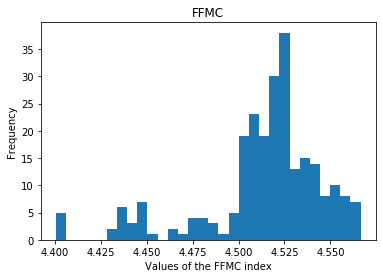

In [174]:
forests_9['FFMC'].plot.hist(title = "FFMC", bins = 30) # Гистограмма для логарифма безразмерного индекса FFMC: по оси абсцисс
# отложен логарифм значения индекса, по оси ординат - встречаемость значений логарифма индекса;
plt.xlabel("Values of the FFMC index")

Text(0.5, 0, 'Size of the burned area')

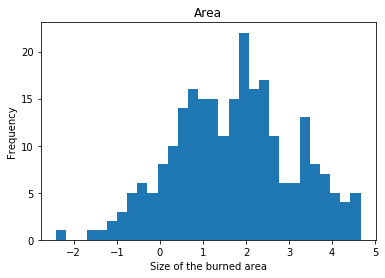

In [175]:
forests_9['area'].plot.hist(title = "Area", bins = 30) # Гистограмма для area: по оси абсцисс
# отложен логарифм значения площади сгоревшего леса, по оси ординат - встречаемость значения логарифма;
plt.xlabel("Size of the burned area")

## Модель + мультиколлинеарность

In [176]:
from statsmodels.tools.tools import add_constant

In [177]:
forests_10 = add_constant(forests_9)
forests_10 # добавляем единичный регрессор

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const  X  Y month  day      FFMC    DMC     DC   ISI  temp  ...  \
0      1.0  9  9   jul  tue  4.452019   48.3  313.4   3.9  18.0  ...   
1      1.0  1  4   sep  tue  4.510860  129.5  692.6   7.0  21.7  ...   
2      1.0  2  5   sep  mon  4.509760  126.5  686.5   7.0  21.9  ...   
3      1.0  1  2   aug  wed  4.559126   99.9  513.3  13.2  23.3  ...   
4      1.0  8  6   aug  fri  4.500920  108.0  529.8  12.5  21.2  ...   
5      1.0  1  2   jul  sat  4.499810   51.3  296.3   8.7  16.6  ...   
6      1.0  2  5   aug  wed  4.559126   99.9  513.3  13.2  23.8  ...   
7      1.0  6  5   aug  thu  4.555980  131.7  578.8  10.4  27.4  ...   
8      1.0  5  4   mar  mon  4.500920   39.7   86.6   6.2  13.2  ...   
9      1.0  8  3   sep  tue  4.435567   73.4  671.9   3.2  24.2  ...   
10     1.0  2  2   aug  tue  4.551769  108.3  647.1  17.0  17.4  ...   
11     1.0  8  6   sep  thu  4.540098   80.9  685.2  17.9  23.7  ...   
12     1.0  6  5   jun  fri  4.527209   56.4  433.3   7.1  23.2  ...   
13     1.0  9  9   jul  sun  4.500920   68.6  355.2   7.2  24.8  ...   
14     1.0  3  4   jul  sat  4.500920   51.2  424.1   6.2  24.6  ...   
15     1.0  5  4   sep  fri  4.546481   85.1  692.3  15.9  20.1  ...   
16     1.0  1  5   sep  sat  4.536891  145.4  721.4   8.1  29.6  ...   
17     1.0  7  4   aug  sun  4.551769  108.3  647.1  17.0  16.4  ...   
18     1.0  2  4   sep  sat  4.536891  145.4  721.4   8.1  28.6  ...   
19     1.0  2  2   aug  wed  4.522875  111.2  654.1   9.6  18.4  ...   
20     1.0  2  4   aug  wed  4.522875  111.2  654.1   9.6  20.5  ...   
21     1.0  7  4   sep  fri  4.526127  117.9  668.0  12.2  19.0  ...   
22     1.0  7  4   mar  mon  4.500920   39.7   86.6   6.2  16.1  ...   
23     1.0  6  4   aug  thu  4.555980  131.7  578.8  10.4  20.3  ...   
24     1.0  6  3   mar  sat  4.506454   50.1  100.4   7.8  15.2  ...   
25     1.0  8  6   sep  sat  4.527209  121.1  674.4   8.6  17.8  ...   
26     1.0  8  5   sep  sun  4.496471   90.0  704.4   4.8  17.8  ...   
27     1.0  6  5   mar  thu  4.441474   18.2   55.0   3.0   5.3  ...   
28     1.0  6  5   aug  wed  4.522875  111.2  654.1   9.6  16.6  ...   
29     1.0  6  5   aug  wed  4.564348  127.1  570.5  16.5  23.4  ...   
..     ... .. ..   ...  ...       ...    ...    ...   ...   ...  ...   
238    1.0  6  5   mar  thu  4.514151   20.6   43.5   8.5  13.3  ...   
239    1.0  6  3   apr  sun  4.510860   14.6   25.6  12.3  13.7  ...   
240    1.0  4  3   may  fri  4.495355   25.4   73.7   5.7  18.0  ...   
241    1.0  8  3   jun  mon  4.479607   96.2  229.0   4.7  14.3  ...   
242    1.0  9  4   jun  sat  4.505350   61.1  252.6   9.4  24.5  ...   
243    1.0  4  3   jun  thu  4.532599  103.8  316.7  10.8  26.4  ...   
244    1.0  2  5   jun  thu  4.540098  121.7  350.2  18.0  22.7  ...   
245    1.0  4  3   jul  thu  4.537961   85.3  395.0   9.9  27.2  ...   
246    1.0  4  3   jul  sun  4.540098  101.3  423.4  14.7  26.1  ...   
247    1.0  7  4   jul  sun  4.540098  101.3  423.4  14.7  18.2  ...   
249    1.0  9  9   jul  thu  4.534748  114.4  560.0   9.5  30.2  ...   
250    1.0  3  4   aug  sun  4.552824  130.3  587.1  14.1  23.4  ...   
251    1.0  2  5   aug  sun  4.552824  130.3  587.1  14.1  33.1  ...   
253    1.0  5  4   aug  tue  4.554929  141.3  605.8  17.7  24.1  ...   
254    1.0  5  4   aug  tue  4.554929  141.3  605.8  17.7  26.4  ...   
255    1.0  4  4   aug  tue  4.554929  141.3  605.8  17.7  19.4  ...   
256    1.0  1  3   aug  fri  4.563306  158.0  633.6  11.3  27.5  ...   
257    1.0  6  6   aug  sat  4.564348  164.0  643.0  14.0  30.8  ...   
258    1.0  4  5   aug  mon  4.566429  175.5  661.8  16.8  32.6  ...   
259    1.0  3  4   aug  tue  4.565389  181.1  671.2  14.3  32.3  ...   
260    1.0  6  5   aug  tue  4.565389  181.1  671.2  14.3  33.3  ...   
261    1.0  7  5   aug  tue  4.565389  181.1  671.2  14.3  27.3  ...   
262    1.0  2  4   aug  wed  4.548600  139.4  689.1  20.0  29.2  ...   
263    1.0  4  3   aug  wed  4.548600  139.4 

In [178]:
forests_11 = forests_10.drop(columns = ["X", "Y", "month", "day", "rain", "area"])
forests_11

const      FFMC    DMC     DC   ISI  temp  RH  wind  aug  dec  feb  jul  \
0      1.0  4.452019   48.3  313.4   3.9  18.0  42   2.7    0    0    0    1   
1      1.0  4.510860  129.5  692.6   7.0  21.7  38   2.2    0    0    0    0   
2      1.0  4.509760  126.5  686.5   7.0  21.9  39   1.8    0    0    0    0   
3      1.0  4.559126   99.9  513.3  13.2  23.3  31   4.5    1    0    0    0   
4      1.0  4.500920  108.0  529.8  12.5  21.2  51   8.9    1    0    0    0   
5      1.0  4.499810   51.3  296.3   8.7  16.6  53   5.4    0    0    0    1   
6      1.0  4.559126   99.9  513.3  13.2  23.8  32   5.4    1    0    0    0   
7      1.0  4.555980  131.7  578.8  10.4  27.4  22   4.0    1    0    0    0   
8      1.0  4.500920   39.7   86.6   6.2  13.2  40   5.4    0    0    0    0   
9      1.0  4.435567   73.4  671.9   3.2  24.2  28   3.6    0    0    0    0   
10     1.0  4.551769  108.3  647.1  17.0  17.4  43   6.7    1    0    0    0   
11     1.0  4.540098   80.9  685.2  17.9  23.7  25   4.5    0    0    0    0   
12     1.0  4.527209   56.4  433.3   7.1  23.2  39   5.4    0    0    0    0   
13     1.0  4.500920   68.6  355.2   7.2  24.8  29   2.2    0    0    0    1   
14     1.0  4.500920   51.2  424.1   6.2  24.6  43   1.8    0    0    0    1   
15     1.0  4.546481   85.1  692.3  15.9  20.1  47   4.9    0    0    0    0   
16     1.0  4.536891  145.4  721.4   8.1  29.6  27   2.7    0    0    0    0   
17     1.0  4.551769  108.3  647.1  17.0  16.4  47   1.3    1    0    0    0   
18     1.0  4.536891  145.4  721.4   8.1  28.6  27   2.2    0    0    0    0   
19     1.0  4.522875  111.2  654.1   9.6  18.4  45   3.6    1    0    0    0   
20     1.0  4.522875  111.2  654.1   9.6  20.5  35   4.0    1    0    0    0   
21     1.0  4.526127  117.9  668.0  12.2  19.0  34   5.8    0    0    0    0   
22     1.0  4.500920   39.7   86.6   6.2  16.1  29   3.1    0    0    0    0   
23     1.0  4.555980  131.7  578.8  10.4  20.3  41   4.0    1    0    0    0   
24     1.0  4.506454   50.1  100.4   7.8  15.2  31   8.5    0    0    0    0   
25     1.0  4.527209  121.1  674.4   8.6  17.8  56   1.8    0    0    0    0   
26     1.0  4.496471   90.0  704.4   4.8  17.8  67   2.2    0    0    0    0   
27     1.0  4.441474   18.2   55.0   3.0   5.3  70   4.5    0    0    0    0   
28     1.0  4.522875  111.2  654.1   9.6  16.6  47   0.9    1    0    0    0   
29     1.0  4.564348  127.1  570.5  16.5  23.4  33   4.5    1    0    0    0   
..     ...       ...    ...    ...   ...   ...  ..   ...  ...  ...  ...  ...   
238    1.0  4.514151   20.6   43.5   8.5  13.3  27   3.6    0    0    0    0   
239    1.0  4.510860   14.6   25.6  12.3  13.7  33   9.4    0    0    0    0   
240    1.0  4.495355   25.4   73.7   5.7  18.0  40   4.0    0    0    0    0   
241    1.0  4.479607   96.2  229.0   4.7  14.3  79   4.0    0    0    0    0   
242    1.0  4.505350   61.1  252.6   9.4  24.5  50   3.1    0    0    0    0   
243    1.0  4.532599  103.8  316.7  10.8  26.4  35   2.7    0    0    0    0   
244    1.0  4.540098  121.7  350.2  18.0  22.7  40   9.4    0    0    0    0   
245    1.0  4.537961   85.3  395.0   9.9  27.2  28   1.3    0    0    0    1   
246    1.0  4.540098  101.3  423.4  14.7  26.1  45   4.0    0    0    0    1   
247    1.0  4.540098  101.3  423.4  14.7  18.2  82   4.5    0    0    0    1   
249    1.0  4.534748  114.4  560.0   9.5  30.2  25   4.5    0    0    0    1   
250    1.0  4.552824  130.3  587.1  14.1  23.4  40   5.8    1    0    0    0   
251    1.0  4.552824  130.3  587.1  14.1  33.1  25   4.0    1    0    0    0   
253    1.0  4.554929  141.3  605.8  17.7  24.1  43   6.3    1    0    0    0   
254    1.0  4.554929  141.3  605.8  17.7  26.4  34   3.6    1    0    0    0   
255    1.0  4.554929  141.3  605.8  17.7  19.4  71   7.6    1    0    0    0   
256    1.0  4.563306  158.0  633.6  11.3  27.5  29   4.5    1    0    0    0   
257    1.0  4.564348  164.0  643.0  14.0  30.8  30   4.9    1    0    0    0   
258  

In [179]:
y_ = forests_10["area"]
y_

0     -1.021651
1     -0.843970
2     -0.755023
3     -0.597837
4     -0.494296
5     -0.342490
6     -0.261365
7     -0.105361
8     -0.051293
9     -0.040822
10     0.067659
11     0.113329
12     0.173953
13     0.307485
14     0.357674
15     0.378436
16     0.378436
17     0.444686
18     0.476234
19     0.488580
20     0.494696
21     0.524729
22     0.559616
23     0.641854
24     0.662688
25     0.667829
26     0.698135
27     0.760806
28     0.828552
29     0.920283
         ...   
238    1.888584
239    4.113003
240    3.650139
241    0.662688
242    4.253056
243    2.310553
244    1.160021
245    0.565314
246    1.996060
247    0.792993
249    1.011601
250    0.254642
251    3.274500
253    0.693147
254    2.797281
255    3.843744
256    3.768614
257    2.150599
258    1.018847
259    2.686486
260    3.702289
261    2.381396
262    0.667829
263    3.903789
264    1.757858
265    0.774727
266   -0.843970
267    1.862529
268    3.994340
269    2.412336
Name: area, Length: 248,

In [180]:
import statsmodels.api as sm

In [181]:
model = sm.OLS(y_, forests_11)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     1.761
Date:                Sat, 20 Jun 2020   Prob (F-statistic):             0.0374
Time:                        14:09:22   Log-Likelihood:                -417.07
No. Observations:                 248   AIC:                             868.1
Df Residuals:                     231   BIC:                             927.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.1848     24.012      0.383      0.7

In [182]:
# Есть мультиколлинеарность: на это указывают и значения VIF (см. вычисления ниже), и число обусловленности (посчитано выше);
# Знаки при temp, wind - "+" - ожидаемо;
# Знаки при jun, jul, aug - "-" - предположение было иное. Однако у переменной sep (о которой речь шла выше) знак положительный;
# Знак RH - "+" - предположение было иное;
# Знаки FFMC, DC, ISI - "-" - предположение было иное;
# Знак DMC - "+" - ожидаемо;

In [183]:
# Предварительно посмотрим еще на две модели

In [184]:
# Модель 2 - включаем пространственные координаты X, Y

In [185]:
forests_11_for_model_2 = forests_10.drop(columns = ["month", "day", "rain", "area"])
forests_11_for_model_2

const  X  Y      FFMC    DMC     DC   ISI  temp  RH  wind  aug  dec  feb  \
0      1.0  9  9  4.452019   48.3  313.4   3.9  18.0  42   2.7    0    0    0   
1      1.0  1  4  4.510860  129.5  692.6   7.0  21.7  38   2.2    0    0    0   
2      1.0  2  5  4.509760  126.5  686.5   7.0  21.9  39   1.8    0    0    0   
3      1.0  1  2  4.559126   99.9  513.3  13.2  23.3  31   4.5    1    0    0   
4      1.0  8  6  4.500920  108.0  529.8  12.5  21.2  51   8.9    1    0    0   
5      1.0  1  2  4.499810   51.3  296.3   8.7  16.6  53   5.4    0    0    0   
6      1.0  2  5  4.559126   99.9  513.3  13.2  23.8  32   5.4    1    0    0   
7      1.0  6  5  4.555980  131.7  578.8  10.4  27.4  22   4.0    1    0    0   
8      1.0  5  4  4.500920   39.7   86.6   6.2  13.2  40   5.4    0    0    0   
9      1.0  8  3  4.435567   73.4  671.9   3.2  24.2  28   3.6    0    0    0   
10     1.0  2  2  4.551769  108.3  647.1  17.0  17.4  43   6.7    1    0    0   
11     1.0  8  6  4.540098   80.9  685.2  17.9  23.7  25   4.5    0    0    0   
12     1.0  6  5  4.527209   56.4  433.3   7.1  23.2  39   5.4    0    0    0   
13     1.0  9  9  4.500920   68.6  355.2   7.2  24.8  29   2.2    0    0    0   
14     1.0  3  4  4.500920   51.2  424.1   6.2  24.6  43   1.8    0    0    0   
15     1.0  5  4  4.546481   85.1  692.3  15.9  20.1  47   4.9    0    0    0   
16     1.0  1  5  4.536891  145.4  721.4   8.1  29.6  27   2.7    0    0    0   
17     1.0  7  4  4.551769  108.3  647.1  17.0  16.4  47   1.3    1    0    0   
18     1.0  2  4  4.536891  145.4  721.4   8.1  28.6  27   2.2    0    0    0   
19     1.0  2  2  4.522875  111.2  654.1   9.6  18.4  45   3.6    1    0    0   
20     1.0  2  4  4.522875  111.2  654.1   9.6  20.5  35   4.0    1    0    0   
21     1.0  7  4  4.526127  117.9  668.0  12.2  19.0  34   5.8    0    0    0   
22     1.0  7  4  4.500920   39.7   86.6   6.2  16.1  29   3.1    0    0    0   
23     1.0  6  4  4.555980  131.7  578.8  10.4  20.3  41   4.0    1    0    0   
24     1.0  6  3  4.506454   50.1  100.4   7.8  15.2  31   8.5    0    0    0   
25     1.0  8  6  4.527209  121.1  674.4   8.6  17.8  56   1.8    0    0    0   
26     1.0  8  5  4.496471   90.0  704.4   4.8  17.8  67   2.2    0    0    0   
27     1.0  6  5  4.441474   18.2   55.0   3.0   5.3  70   4.5    0    0    0   
28     1.0  6  5  4.522875  111.2  654.1   9.6  16.6  47   0.9    1    0    0   
29     1.0  6  5  4.564348  127.1  570.5  16.5  23.4  33   4.5    1    0    0   
..     ... .. ..       ...    ...    ...   ...   ...  ..   ...  ...  ...  ...   
238    1.0  6  5  4.514151   20.6   43.5   8.5  13.3  27   3.6    0    0    0   
239    1.0  6  3  4.510860   14.6   25.6  12.3  13.7  33   9.4    0    0    0   
240    1.0  4  3  4.495355   25.4   73.7   5.7  18.0  40   4.0    0    0    0   
241    1.0  8  3  4.479607   96.2  229.0   4.7  14.3  79   4.0    0    0    0   
242    1.0  9  4  4.505350   61.1  252.6   9.4  24.5  50   3.1    0    0    0   
243    1.0  4  3  4.532599  103.8  316.7  10.8  26.4  35   2.7    0    0    0   
244    1.0  2  5  4.540098  121.7  350.2  18.0  22.7  40   9.4    0    0    0   
245    1.0  4  3  4.537961   85.3  395.0   9.9  27.2  28   1.3    0    0    0   
246    1.0  4  3  4.540098  101.3  423.4  14.7  26.1  45   4.0    0    0    0   
247    1.0  7  4  4.540098  101.3  423.4  14.7  18.2  82   4.5    0    0    0   
249    1.0  9  9  4.534748  114.4  560.0   9.5  30.2  25   4.5    0    0    0   
250    1.0  3  4  4.552824  130.3  587.1  14.1  23.4  40   5.8    1    0    0   
251    1.0  2  5  4.552824  130.3  587.1  14.1  33.1  25   4.0    1    0    0   
253    1.0  5  4  4.554929  141.3  605.8  17.7  24.1  43   6.3    1    0    0   
254    1.0  5  4  4.554929  141.3  605.8  17.7  26.4  34   3.6    1    0    0   
255    1.0  4  4  4.554929  141.3  605.8  17.7  19.4  71   7.6    1    0    0   
256    1.0  1  3  4.563306  158.0  633.6  11.3  27.5  29   4.5    1    0    0   
257    1.0  6  6  4.564348  164.0  6

In [186]:
model_2 = sm.OLS(y_, forests_11_for_model_2)
results_2 = model_2.fit()
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     1.607
Date:                Sat, 20 Jun 2020   Prob (F-statistic):             0.0595
Time:                        14:10:07   Log-Likelihood:                -416.59
No. Observations:                 248   AIC:                             871.2
Df Residuals:                     229   BIC:                             937.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1846     24.214      0.338      0.7

In [187]:
# Модель 3 - включаем дамми для дней недели + включаем пространственные координаты X, Y

In [188]:
dummy_variables_1 = pd.get_dummies(forests_10["day"], drop_first = True)
dummy_variables_1

mon  sat  sun  thu  tue  wed
0      0    0    0    0    1    0
1      0    0    0    0    1    0
2      1    0    0    0    0    0
3      0    0    0    0    0    1
4      0    0    0    0    0    0
5      0    1    0    0    0    0
6      0    0    0    0    0    1
7      0    0    0    1    0    0
8      1    0    0    0    0    0
9      0    0    0    0    1    0
10     0    0    0    0    1    0
11     0    0    0    1    0    0
12     0    0    0    0    0    0
13     0    0    1    0    0    0
14     0    1    0    0    0    0
15     0    0    0    0    0    0
16     0    1    0    0    0    0
17     0    0    1    0    0    0
18     0    1    0    0    0    0
19     0    0    0    0    0    1
20     0    0    0    0    0    1
21     0    0    0    0    0    0
22     1    0    0    0    0    0
23     0    0    0    1    0    0
24     0    1    0    0    0    0
25     0    1    0    0    0    0
26     0    0    1    0    0    0
27     0    0    0    1    0    0
28     0    0    0    0    0    1
29     0    0    0    0    0    1
..   ...  ...  ...  ...  ...  ...
238    0    0    0    1    0    0
239    0    0    1    0    0    0
240    0    0    0    0    0    0
241    1    0    0    0    0    0
242    0    1    0    0    0    0
243    0    0    0    1    0    0
244    0    0    0    1    0    0
245    0    0    0    1    0    0
246    0    0    1    0    0    0
247    0    0    1    0    0    0
249    0    0    0    1    0    0
250    0    0    1    0    0    0
251    0    0    1    0    0    0
253    0    0    0    0    1    0
254    0    0    0    0    1    0
255    0    0    0    0    1    0
256    0    0    0    0    0    0
257    0    1    0    0    0    0
258    1    0    0    0    0    0
259    0    0    0    0    1    0
260    0    0    0    0    1    0
261    0    0    0    0    1    0
262    0    0    0    0    0    1
263    0    0    0    0    0    1
264    0    0    0    1    0    0
265    0    0    0    0    0    0
266    0    0    0    0    0    0
267    0    0    1    0    0    0
268    0    0    1    0    0    0
269    0    0    1    0    0    0

[248 rows x 6 columns]

In [189]:
forests_for_model_3 = pd.concat([forests_10, dummy_variables_1], axis = 1)
forests_for_model_3

const  X  Y month  day      FFMC    DMC     DC   ISI  temp  ...  mar  \
0      1.0  9  9   jul  tue  4.452019   48.3  313.4   3.9  18.0  ...    0   
1      1.0  1  4   sep  tue  4.510860  129.5  692.6   7.0  21.7  ...    0   
2      1.0  2  5   sep  mon  4.509760  126.5  686.5   7.0  21.9  ...    0   
3      1.0  1  2   aug  wed  4.559126   99.9  513.3  13.2  23.3  ...    0   
4      1.0  8  6   aug  fri  4.500920  108.0  529.8  12.5  21.2  ...    0   
5      1.0  1  2   jul  sat  4.499810   51.3  296.3   8.7  16.6  ...    0   
6      1.0  2  5   aug  wed  4.559126   99.9  513.3  13.2  23.8  ...    0   
7      1.0  6  5   aug  thu  4.555980  131.7  578.8  10.4  27.4  ...    0   
8      1.0  5  4   mar  mon  4.500920   39.7   86.6   6.2  13.2  ...    1   
9      1.0  8  3   sep  tue  4.435567   73.4  671.9   3.2  24.2  ...    0   
10     1.0  2  2   aug  tue  4.551769  108.3  647.1  17.0  17.4  ...    0   
11     1.0  8  6   sep  thu  4.540098   80.9  685.2  17.9  23.7  ...    0   
12     1.0  6  5   jun  fri  4.527209   56.4  433.3   7.1  23.2  ...    0   
13     1.0  9  9   jul  sun  4.500920   68.6  355.2   7.2  24.8  ...    0   
14     1.0  3  4   jul  sat  4.500920   51.2  424.1   6.2  24.6  ...    0   
15     1.0  5  4   sep  fri  4.546481   85.1  692.3  15.9  20.1  ...    0   
16     1.0  1  5   sep  sat  4.536891  145.4  721.4   8.1  29.6  ...    0   
17     1.0  7  4   aug  sun  4.551769  108.3  647.1  17.0  16.4  ...    0   
18     1.0  2  4   sep  sat  4.536891  145.4  721.4   8.1  28.6  ...    0   
19     1.0  2  2   aug  wed  4.522875  111.2  654.1   9.6  18.4  ...    0   
20     1.0  2  4   aug  wed  4.522875  111.2  654.1   9.6  20.5  ...    0   
21     1.0  7  4   sep  fri  4.526127  117.9  668.0  12.2  19.0  ...    0   
22     1.0  7  4   mar  mon  4.500920   39.7   86.6   6.2  16.1  ...    1   
23     1.0  6  4   aug  thu  4.555980  131.7  578.8  10.4  20.3  ...    0   
24     1.0  6  3   mar  sat  4.506454   50.1  100.4   7.8  15.2  ...    1   
25     1.0  8  6   sep  sat  4.527209  121.1  674.4   8.6  17.8  ...    0   
26     1.0  8  5   sep  sun  4.496471   90.0  704.4   4.8  17.8  ...    0   
27     1.0  6  5   mar  thu  4.441474   18.2   55.0   3.0   5.3  ...    1   
28     1.0  6  5   aug  wed  4.522875  111.2  654.1   9.6  16.6  ...    0   
29     1.0  6  5   aug  wed  4.564348  127.1  570.5  16.5  23.4  ...    0   
..     ... .. ..   ...  ...       ...    ...    ...   ...   ...  ...  ...   
238    1.0  6  5   mar  thu  4.514151   20.6   43.5   8.5  13.3  ...    1   
239    1.0  6  3   apr  sun  4.510860   14.6   25.6  12.3  13.7  ...    0   
240    1.0  4  3   may  fri  4.495355   25.4   73.7   5.7  18.0  ...    0   
241    1.0  8  3   jun  mon  4.479607   96.2  229.0   4.7  14.3  ...    0   
242    1.0  9  4   jun  sat  4.505350   61.1  252.6   9.4  24.5  ...    0   
243    1.0  4  3   jun  thu  4.532599  103.8  316.7  10.8  26.4  ...    0   
244    1.0  2  5   jun  thu  4.540098  121.7  350.2  18.0  22.7  ...    0   
245    1.0  4  3   jul  thu  4.537961   85.3  395.0   9.9  27.2  ...    0   
246    1.0  4  3   jul  sun  4.540098  101.3  423.4  14.7  26.1  ...    0   
247    1.0  7  4   jul  sun  4.540098  101.3  423.4  14.7  18.2  ...    0   
249    1.0  9  9   jul  thu  4.534748  114.4  560.0   9.5  30.2  ...    0   
250    1.0  3  4   aug  sun  4.552824  130.3  587.1  14.1  23.4  ...    0   
251    1.0  2  5   aug  sun  4.552824  130.3  587.1  14.1  33.1  ...    0   
253    1.0  5  4   aug  tue  4.554929  141.3  605.8  17.7  24.1  ...    0   
254    1.0  5  4   aug  tue  4.554929  141.3  605.8  17.7  26.4  ...    0   
255    1.0  4  4   aug  tue  4.554929  141.3  605.8  17.7  19.4  ...    0   
256    1.0  1  3   aug  fri  4.563306  158.0  633.6  11.3  27.5  ...    0   
257    1.0  6  6   aug  sat  4.564348  164.0  643.0  14.0  30.8  ...    0   
258    1.0  4  5   aug  mon  4.566429  175.5  661.8  16.8  32.6  ...    0   
259    1.0  3  4   aug  tue  4.565389  181.1  671.2  14.3  32.3  ...    0   
2

In [190]:
forests_for_model_3_1 = forests_for_model_3.drop(columns = ["month", "day", "rain", "area"])
forests_for_model_3_1

const  X  Y      FFMC    DMC     DC   ISI  temp  RH  wind  ...  mar  may  \
0      1.0  9  9  4.452019   48.3  313.4   3.9  18.0  42   2.7  ...    0    0   
1      1.0  1  4  4.510860  129.5  692.6   7.0  21.7  38   2.2  ...    0    0   
2      1.0  2  5  4.509760  126.5  686.5   7.0  21.9  39   1.8  ...    0    0   
3      1.0  1  2  4.559126   99.9  513.3  13.2  23.3  31   4.5  ...    0    0   
4      1.0  8  6  4.500920  108.0  529.8  12.5  21.2  51   8.9  ...    0    0   
5      1.0  1  2  4.499810   51.3  296.3   8.7  16.6  53   5.4  ...    0    0   
6      1.0  2  5  4.559126   99.9  513.3  13.2  23.8  32   5.4  ...    0    0   
7      1.0  6  5  4.555980  131.7  578.8  10.4  27.4  22   4.0  ...    0    0   
8      1.0  5  4  4.500920   39.7   86.6   6.2  13.2  40   5.4  ...    1    0   
9      1.0  8  3  4.435567   73.4  671.9   3.2  24.2  28   3.6  ...    0    0   
10     1.0  2  2  4.551769  108.3  647.1  17.0  17.4  43   6.7  ...    0    0   
11     1.0  8  6  4.540098   80.9  685.2  17.9  23.7  25   4.5  ...    0    0   
12     1.0  6  5  4.527209   56.4  433.3   7.1  23.2  39   5.4  ...    0    0   
13     1.0  9  9  4.500920   68.6  355.2   7.2  24.8  29   2.2  ...    0    0   
14     1.0  3  4  4.500920   51.2  424.1   6.2  24.6  43   1.8  ...    0    0   
15     1.0  5  4  4.546481   85.1  692.3  15.9  20.1  47   4.9  ...    0    0   
16     1.0  1  5  4.536891  145.4  721.4   8.1  29.6  27   2.7  ...    0    0   
17     1.0  7  4  4.551769  108.3  647.1  17.0  16.4  47   1.3  ...    0    0   
18     1.0  2  4  4.536891  145.4  721.4   8.1  28.6  27   2.2  ...    0    0   
19     1.0  2  2  4.522875  111.2  654.1   9.6  18.4  45   3.6  ...    0    0   
20     1.0  2  4  4.522875  111.2  654.1   9.6  20.5  35   4.0  ...    0    0   
21     1.0  7  4  4.526127  117.9  668.0  12.2  19.0  34   5.8  ...    0    0   
22     1.0  7  4  4.500920   39.7   86.6   6.2  16.1  29   3.1  ...    1    0   
23     1.0  6  4  4.555980  131.7  578.8  10.4  20.3  41   4.0  ...    0    0   
24     1.0  6  3  4.506454   50.1  100.4   7.8  15.2  31   8.5  ...    1    0   
25     1.0  8  6  4.527209  121.1  674.4   8.6  17.8  56   1.8  ...    0    0   
26     1.0  8  5  4.496471   90.0  704.4   4.8  17.8  67   2.2  ...    0    0   
27     1.0  6  5  4.441474   18.2   55.0   3.0   5.3  70   4.5  ...    1    0   
28     1.0  6  5  4.522875  111.2  654.1   9.6  16.6  47   0.9  ...    0    0   
29     1.0  6  5  4.564348  127.1  570.5  16.5  23.4  33   4.5  ...    0    0   
..     ... .. ..       ...    ...    ...   ...   ...  ..   ...  ...  ...  ...   
238    1.0  6  5  4.514151   20.6   43.5   8.5  13.3  27   3.6  ...    1    0   
239    1.0  6  3  4.510860   14.6   25.6  12.3  13.7  33   9.4  ...    0    0   
240    1.0  4  3  4.495355   25.4   73.7   5.7  18.0  40   4.0  ...    0    1   
241    1.0  8  3  4.479607   96.2  229.0   4.7  14.3  79   4.0  ...    0    0   
242    1.0  9  4  4.505350   61.1  252.6   9.4  24.5  50   3.1  ...    0    0   
243    1.0  4  3  4.532599  103.8  316.7  10.8  26.4  35   2.7  ...    0    0   
244    1.0  2  5  4.540098  121.7  350.2  18.0  22.7  40   9.4  ...    0    0   
245    1.0  4  3  4.537961   85.3  395.0   9.9  27.2  28   1.3  ...    0    0   
246    1.0  4  3  4.540098  101.3  423.4  14.7  26.1  45   4.0  ...    0    0   
247    1.0  7  4  4.540098  101.3  423.4  14.7  18.2  82   4.5  ...    0    0   
249    1.0  9  9  4.534748  114.4  560.0   9.5  30.2  25   4.5  ...    0    0   
250    1.0  3  4  4.552824  130.3  587.1  14.1  23.4  40   5.8  ...    0    0   
251    1.0  2  5  4.552824  130.3  587.1  14.1  33.1  25   4.0  ...    0    0   
253    1.0  5  4  4.554929  141.3  605.8  17.7  24.1  43   6.3  ...    0    0   
254    1.0  5  4  4.554929  141.3  605.8  17.7  26.4  34   3.6  ...    0    0   
255    1.0  4  4  4.554929  141.3  605.8  17.7  19.4  71   7.6  ...    0    0   
256    1.0  1  3  4.563306  158.0  633.6  11.3  27.5  29   4.5  ...    0    0   
257    1.0  6  6  4.564348  164.0  6

In [191]:
model_3 = sm.OLS(y_, forests_for_model_3_1)
results_3 = model_3.fit()
print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     1.427
Date:                Sat, 20 Jun 2020   Prob (F-statistic):             0.0961
Time:                        14:10:19   Log-Likelihood:                -413.63
No. Observations:                 248   AIC:                             877.3
Df Residuals:                     223   BIC:                             965.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3199     24.725      0.134      0.8

In [192]:
# В дальнейшем будем использовать и модифицировать модель 3

In [193]:
# Коэффициент детерминации невысокий: 0.133
# Скорректированный коэффициент детерминации невысокий: 0.040

# Комментарии по поводу знаков оценок коэффициентов линейной регрессионной модели были даны выше: для данной модели знаки
# остались такими же, как и для модели 1

# Дополнительно стоит отметить, что знак "+" имеем при переменных thu, tue, sun, sat (дни недели), may, oct, sep, dec (месяцы):
# полученные результаты отчасти (хотя и весьма слабо) согласуются с описанным выше (см. комментарии к графикам категориальных
# переменных);

# Практически все коэффициенты  - статистически незначимые (исключение составляет коэффициент при переменной DMC);
# Линейная регрессионная модель статистически значима на уровне значимости 0.1.

In [194]:
# Вычисление VIF

In [195]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [196]:
VIF = pd.DataFrame()
VIF["VIF"] = [variance_inflation_factor(forests_for_model_3_1.values, i) for i in range(forests_for_model_3_1.shape[1])]
VIF["Variables"] = forests_for_model_3_1.columns

In [197]:
VIF

VIF Variables
0   82867.655136     const
1       1.492302         X
2       1.461872         Y
3       4.568592      FFMC
4       4.248550       DMC
5      26.202542        DC
6       3.581526       ISI
7       5.039531      temp
8       2.296058        RH
9       1.564867      wind
10     50.947068       aug
11      4.913512       dec
12      2.808130       feb
13     10.232881       jul
14      4.345801       jun
15      5.900945       mar
16      1.361898       may
17      6.454284       oct
18     64.433656       sep
19      2.021370       mon
20      1.848151       sat
21      2.110590       sun
22      1.778388       thu
23      1.737721       tue
24      1.774682       wed

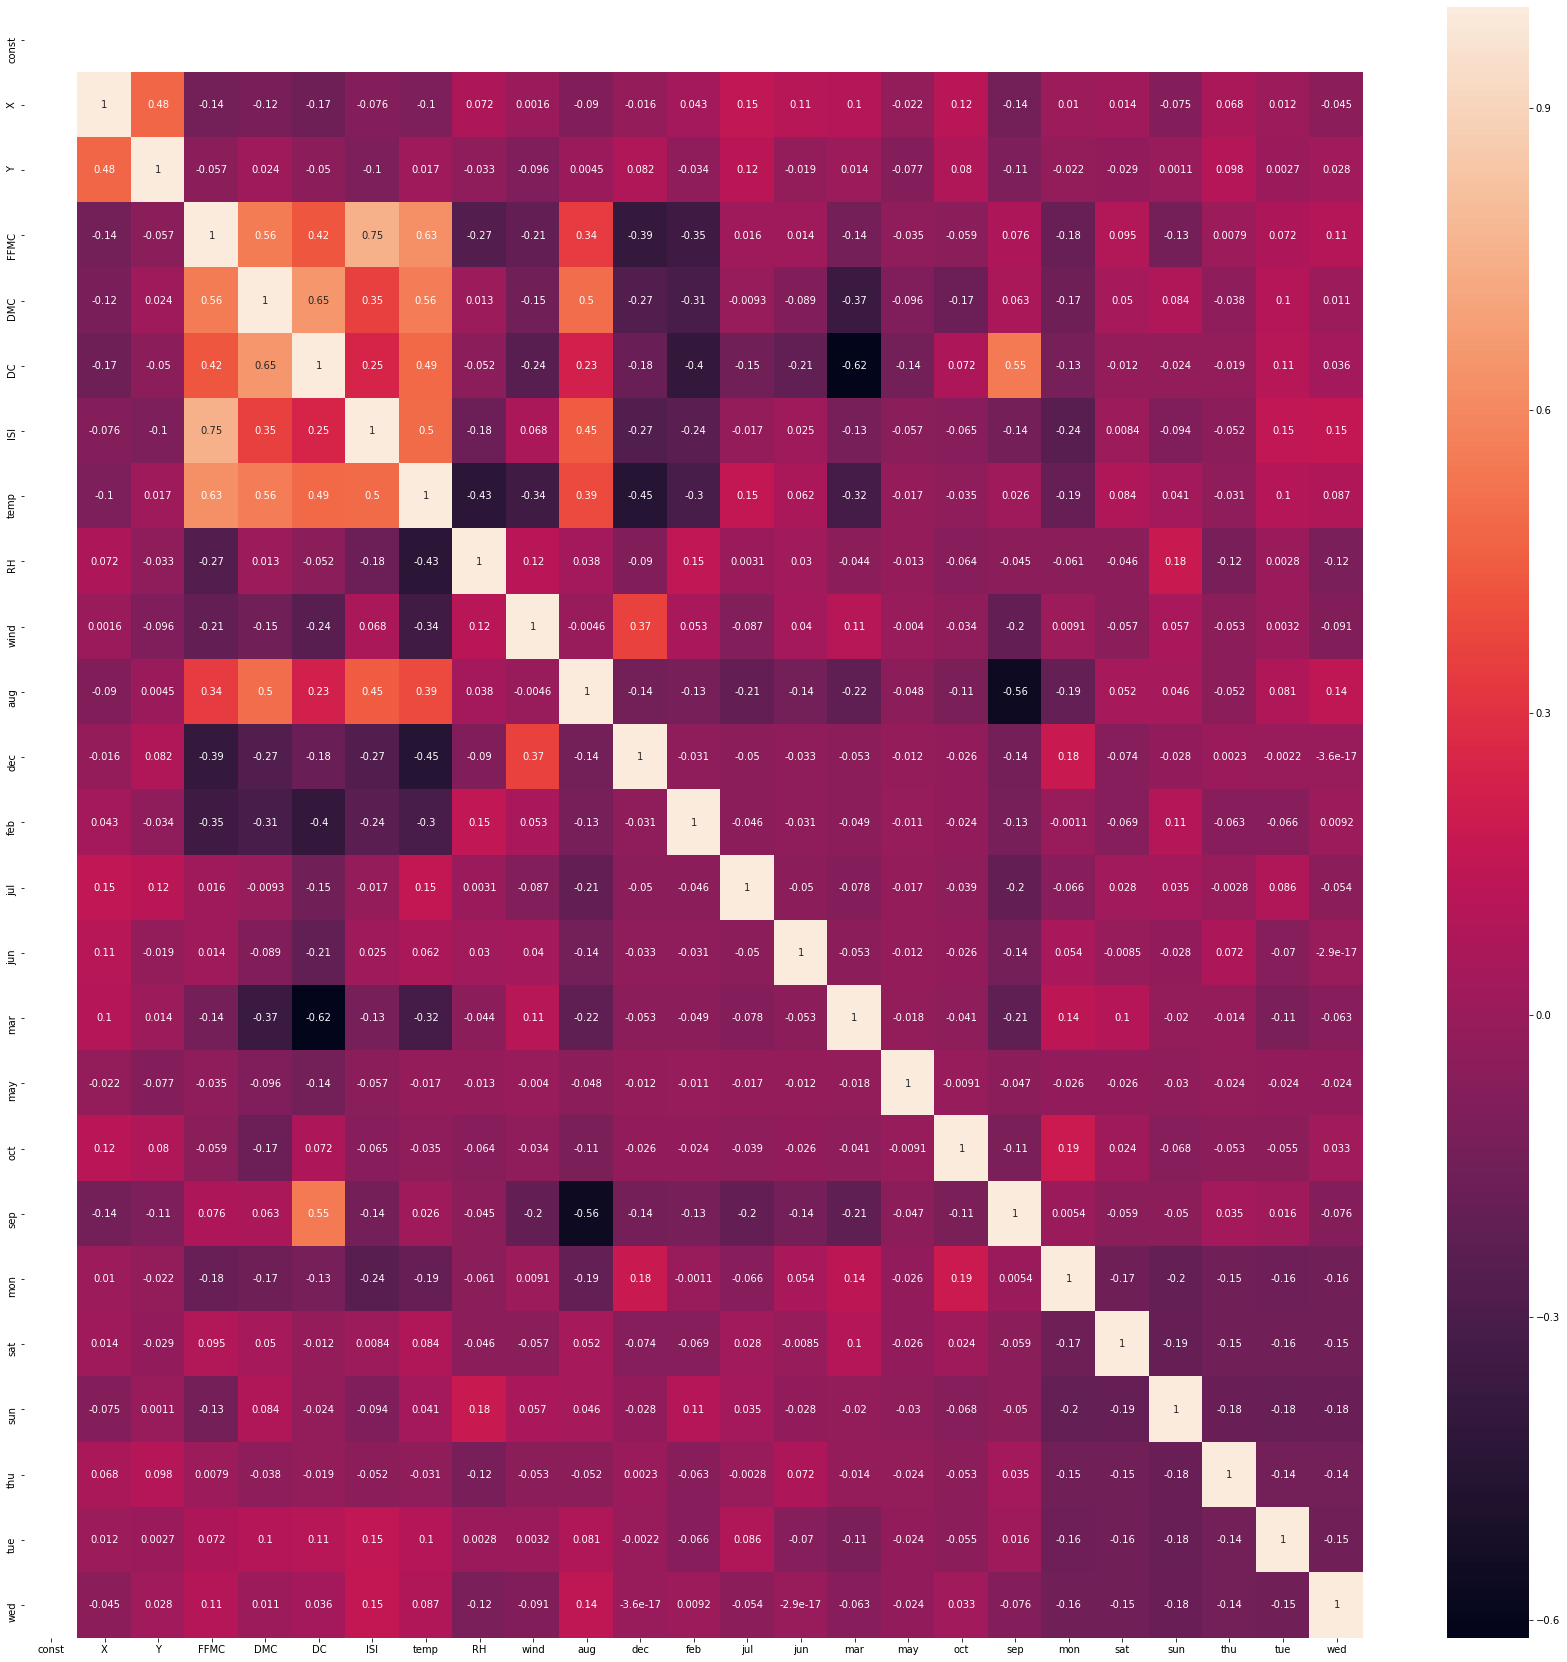

In [198]:
corrMatrix_3 = forests_for_model_3_1.corr()
fig, ax = plt.subplots(figsize = (30, 30)) 
sns.heatmap(corrMatrix_3, annot = True)
plt.show() # корреляционная матрицы Пирсона

In [199]:
# Вообще говоря, оценки коэффициентов линейной регрессионной модели в условиях мультиколлинеарности остаются несмещенными,
# обладают наименьшей дисперсией (в классе линейных несмещенных оценок), то есть условия теоремы Гаусса-Маркова выполняются. Можно попробовать убрать проблемные
# (линейно зависимые) регрессоры.

In [200]:
# ВАРИАНТ 1 - "выкидываем" sep, DC, aug

In [201]:
forests_for_model_3_2 = forests_for_model_3.drop(columns = ["month", "day", "sep", "area", "DC", "aug", "rain"])
forests_for_model_3_2

const  X  Y      FFMC    DMC   ISI  temp  RH  wind  dec  ...  jun  mar  \
0      1.0  9  9  4.452019   48.3   3.9  18.0  42   2.7    0  ...    0    0   
1      1.0  1  4  4.510860  129.5   7.0  21.7  38   2.2    0  ...    0    0   
2      1.0  2  5  4.509760  126.5   7.0  21.9  39   1.8    0  ...    0    0   
3      1.0  1  2  4.559126   99.9  13.2  23.3  31   4.5    0  ...    0    0   
4      1.0  8  6  4.500920  108.0  12.5  21.2  51   8.9    0  ...    0    0   
5      1.0  1  2  4.499810   51.3   8.7  16.6  53   5.4    0  ...    0    0   
6      1.0  2  5  4.559126   99.9  13.2  23.8  32   5.4    0  ...    0    0   
7      1.0  6  5  4.555980  131.7  10.4  27.4  22   4.0    0  ...    0    0   
8      1.0  5  4  4.500920   39.7   6.2  13.2  40   5.4    0  ...    0    1   
9      1.0  8  3  4.435567   73.4   3.2  24.2  28   3.6    0  ...    0    0   
10     1.0  2  2  4.551769  108.3  17.0  17.4  43   6.7    0  ...    0    0   
11     1.0  8  6  4.540098   80.9  17.9  23.7  25   4.5    0  ...    0    0   
12     1.0  6  5  4.527209   56.4   7.1  23.2  39   5.4    0  ...    1    0   
13     1.0  9  9  4.500920   68.6   7.2  24.8  29   2.2    0  ...    0    0   
14     1.0  3  4  4.500920   51.2   6.2  24.6  43   1.8    0  ...    0    0   
15     1.0  5  4  4.546481   85.1  15.9  20.1  47   4.9    0  ...    0    0   
16     1.0  1  5  4.536891  145.4   8.1  29.6  27   2.7    0  ...    0    0   
17     1.0  7  4  4.551769  108.3  17.0  16.4  47   1.3    0  ...    0    0   
18     1.0  2  4  4.536891  145.4   8.1  28.6  27   2.2    0  ...    0    0   
19     1.0  2  2  4.522875  111.2   9.6  18.4  45   3.6    0  ...    0    0   
20     1.0  2  4  4.522875  111.2   9.6  20.5  35   4.0    0  ...    0    0   
21     1.0  7  4  4.526127  117.9  12.2  19.0  34   5.8    0  ...    0    0   
22     1.0  7  4  4.500920   39.7   6.2  16.1  29   3.1    0  ...    0    1   
23     1.0  6  4  4.555980  131.7  10.4  20.3  41   4.0    0  ...    0    0   
24     1.0  6  3  4.506454   50.1   7.8  15.2  31   8.5    0  ...    0    1   
25     1.0  8  6  4.527209  121.1   8.6  17.8  56   1.8    0  ...    0    0   
26     1.0  8  5  4.496471   90.0   4.8  17.8  67   2.2    0  ...    0    0   
27     1.0  6  5  4.441474   18.2   3.0   5.3  70   4.5    0  ...    0    1   
28     1.0  6  5  4.522875  111.2   9.6  16.6  47   0.9    0  ...    0    0   
29     1.0  6  5  4.564348  127.1  16.5  23.4  33   4.5    0  ...    0    0   
..     ... .. ..       ...    ...   ...   ...  ..   ...  ...  ...  ...  ...   
238    1.0  6  5  4.514151   20.6   8.5  13.3  27   3.6    0  ...    0    1   
239    1.0  6  3  4.510860   14.6  12.3  13.7  33   9.4    0  ...    0    0   
240    1.0  4  3  4.495355   25.4   5.7  18.0  40   4.0    0  ...    0    0   
241    1.0  8  3  4.479607   96.2   4.7  14.3  79   4.0    0  ...    1    0   
242    1.0  9  4  4.505350   61.1   9.4  24.5  50   3.1    0  ...    1    0   
243    1.0  4  3  4.532599  103.8  10.8  26.4  35   2.7    0  ...    1    0   
244    1.0  2  5  4.540098  121.7  18.0  22.7  40   9.4    0  ...    1    0   
245    1.0  4  3  4.537961   85.3   9.9  27.2  28   1.3    0  ...    0    0   
246    1.0  4  3  4.540098  101.3  14.7  26.1  45   4.0    0  ...    0    0   
247    1.0  7  4  4.540098  101.3  14.7  18.2  82   4.5    0  ...    0    0   
249    1.0  9  9  4.534748  114.4   9.5  30.2  25   4.5    0  ...    0    0   
250    1.0  3  4  4.552824  130.3  14.1  23.4  40   5.8    0  ...    0    0   
251    1.0  2  5  4.552824  130.3  14.1  33.1  25   4.0    0  ...    0    0   
253    1.0  5  4  4.554929  141.3  17.7  24.1  43   6.3    0  ...    0    0   
254    1.0  5  4  4.554929  141.3  17.7  26.4  34   3.6    0  ...    0    0   
255    1.0  4  4  4.554929  141.3  17.7  19.4  71   7.6    0  ...    0    0   
256    1.0  1  3  4.563306  158.0  11.3  27.5  29   4.5    0  ...    0    0   
257    1.0  6  6  4.564348  164.0  14.0  30.8  30   4.9    0  ...    0    0   
258    1.0  4  5  4.566429  175.5  16.8  32.6  26   3.1

In [202]:
model_4 = sm.OLS(y_, forests_for_model_3_2)
results_4 = model_4.fit()
print(results_4.summary())

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.9777
Date:                Sat, 20 Jun 2020   Prob (F-statistic):              0.492
Time:                        14:11:28   Log-Likelihood:                -420.56
No. Observations:                 248   AIC:                             885.1
Df Residuals:                     226   BIC:                             962.4
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.1989     24.228     -0.338      0.7

In [203]:
# ВАРИАНТ 2 - "выкидываем" aug, DC

In [204]:
forests_for_model_3_3 = forests_for_model_3.drop(columns = ["month", "day", "aug", "area", "DC", "rain"])
forests_for_model_3_3

const  X  Y      FFMC    DMC   ISI  temp  RH  wind  dec  ...  mar  may  \
0      1.0  9  9  4.452019   48.3   3.9  18.0  42   2.7    0  ...    0    0   
1      1.0  1  4  4.510860  129.5   7.0  21.7  38   2.2    0  ...    0    0   
2      1.0  2  5  4.509760  126.5   7.0  21.9  39   1.8    0  ...    0    0   
3      1.0  1  2  4.559126   99.9  13.2  23.3  31   4.5    0  ...    0    0   
4      1.0  8  6  4.500920  108.0  12.5  21.2  51   8.9    0  ...    0    0   
5      1.0  1  2  4.499810   51.3   8.7  16.6  53   5.4    0  ...    0    0   
6      1.0  2  5  4.559126   99.9  13.2  23.8  32   5.4    0  ...    0    0   
7      1.0  6  5  4.555980  131.7  10.4  27.4  22   4.0    0  ...    0    0   
8      1.0  5  4  4.500920   39.7   6.2  13.2  40   5.4    0  ...    1    0   
9      1.0  8  3  4.435567   73.4   3.2  24.2  28   3.6    0  ...    0    0   
10     1.0  2  2  4.551769  108.3  17.0  17.4  43   6.7    0  ...    0    0   
11     1.0  8  6  4.540098   80.9  17.9  23.7  25   4.5    0  ...    0    0   
12     1.0  6  5  4.527209   56.4   7.1  23.2  39   5.4    0  ...    0    0   
13     1.0  9  9  4.500920   68.6   7.2  24.8  29   2.2    0  ...    0    0   
14     1.0  3  4  4.500920   51.2   6.2  24.6  43   1.8    0  ...    0    0   
15     1.0  5  4  4.546481   85.1  15.9  20.1  47   4.9    0  ...    0    0   
16     1.0  1  5  4.536891  145.4   8.1  29.6  27   2.7    0  ...    0    0   
17     1.0  7  4  4.551769  108.3  17.0  16.4  47   1.3    0  ...    0    0   
18     1.0  2  4  4.536891  145.4   8.1  28.6  27   2.2    0  ...    0    0   
19     1.0  2  2  4.522875  111.2   9.6  18.4  45   3.6    0  ...    0    0   
20     1.0  2  4  4.522875  111.2   9.6  20.5  35   4.0    0  ...    0    0   
21     1.0  7  4  4.526127  117.9  12.2  19.0  34   5.8    0  ...    0    0   
22     1.0  7  4  4.500920   39.7   6.2  16.1  29   3.1    0  ...    1    0   
23     1.0  6  4  4.555980  131.7  10.4  20.3  41   4.0    0  ...    0    0   
24     1.0  6  3  4.506454   50.1   7.8  15.2  31   8.5    0  ...    1    0   
25     1.0  8  6  4.527209  121.1   8.6  17.8  56   1.8    0  ...    0    0   
26     1.0  8  5  4.496471   90.0   4.8  17.8  67   2.2    0  ...    0    0   
27     1.0  6  5  4.441474   18.2   3.0   5.3  70   4.5    0  ...    1    0   
28     1.0  6  5  4.522875  111.2   9.6  16.6  47   0.9    0  ...    0    0   
29     1.0  6  5  4.564348  127.1  16.5  23.4  33   4.5    0  ...    0    0   
..     ... .. ..       ...    ...   ...   ...  ..   ...  ...  ...  ...  ...   
238    1.0  6  5  4.514151   20.6   8.5  13.3  27   3.6    0  ...    1    0   
239    1.0  6  3  4.510860   14.6  12.3  13.7  33   9.4    0  ...    0    0   
240    1.0  4  3  4.495355   25.4   5.7  18.0  40   4.0    0  ...    0    1   
241    1.0  8  3  4.479607   96.2   4.7  14.3  79   4.0    0  ...    0    0   
242    1.0  9  4  4.505350   61.1   9.4  24.5  50   3.1    0  ...    0    0   
243    1.0  4  3  4.532599  103.8  10.8  26.4  35   2.7    0  ...    0    0   
244    1.0  2  5  4.540098  121.7  18.0  22.7  40   9.4    0  ...    0    0   
245    1.0  4  3  4.537961   85.3   9.9  27.2  28   1.3    0  ...    0    0   
246    1.0  4  3  4.540098  101.3  14.7  26.1  45   4.0    0  ...    0    0   
247    1.0  7  4  4.540098  101.3  14.7  18.2  82   4.5    0  ...    0    0   
249    1.0  9  9  4.534748  114.4   9.5  30.2  25   4.5    0  ...    0    0   
250    1.0  3  4  4.552824  130.3  14.1  23.4  40   5.8    0  ...    0    0   
251    1.0  2  5  4.552824  130.3  14.1  33.1  25   4.0    0  ...    0    0   
253    1.0  5  4  4.554929  141.3  17.7  24.1  43   6.3    0  ...    0    0   
254    1.0  5  4  4.554929  141.3  17.7  26.4  34   3.6    0  ...    0    0   
255    1.0  4  4  4.554929  141.3  17.7  19.4  71   7.6    0  ...    0    0   
256    1.0  1  3  4.563306  158.0  11.3  27.5  29   4.5    0  ...    0    0   
257    1.0  6  6  4.564348  164.0  14.0  30.8  30   4.9    0  ...    0    0   
258    1.0  4  5  4.566429  175.5  16.8  32.6  26   3.1

In [205]:
model_5 = sm.OLS(y_, forests_for_model_3_3)
results_5 = model_5.fit()
print(results_5.summary())

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.158
Date:                Sat, 20 Jun 2020   Prob (F-statistic):              0.288
Time:                        14:11:35   Log-Likelihood:                -418.04
No. Observations:                 248   AIC:                             882.1
Df Residuals:                     225   BIC:                             962.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9986     24.594      0.122      0.9

In [206]:
# ВАРИАНТ 3 - "выкидываем" aug, sep

In [207]:
forests_for_model_3_4 = forests_for_model_3.drop(columns = ["month", "day", "aug", "area", "sep", "rain"])
forests_for_model_3_4

const  X  Y      FFMC    DMC     DC   ISI  temp  RH  wind  ...  jun  mar  \
0      1.0  9  9  4.452019   48.3  313.4   3.9  18.0  42   2.7  ...    0    0   
1      1.0  1  4  4.510860  129.5  692.6   7.0  21.7  38   2.2  ...    0    0   
2      1.0  2  5  4.509760  126.5  686.5   7.0  21.9  39   1.8  ...    0    0   
3      1.0  1  2  4.559126   99.9  513.3  13.2  23.3  31   4.5  ...    0    0   
4      1.0  8  6  4.500920  108.0  529.8  12.5  21.2  51   8.9  ...    0    0   
5      1.0  1  2  4.499810   51.3  296.3   8.7  16.6  53   5.4  ...    0    0   
6      1.0  2  5  4.559126   99.9  513.3  13.2  23.8  32   5.4  ...    0    0   
7      1.0  6  5  4.555980  131.7  578.8  10.4  27.4  22   4.0  ...    0    0   
8      1.0  5  4  4.500920   39.7   86.6   6.2  13.2  40   5.4  ...    0    1   
9      1.0  8  3  4.435567   73.4  671.9   3.2  24.2  28   3.6  ...    0    0   
10     1.0  2  2  4.551769  108.3  647.1  17.0  17.4  43   6.7  ...    0    0   
11     1.0  8  6  4.540098   80.9  685.2  17.9  23.7  25   4.5  ...    0    0   
12     1.0  6  5  4.527209   56.4  433.3   7.1  23.2  39   5.4  ...    1    0   
13     1.0  9  9  4.500920   68.6  355.2   7.2  24.8  29   2.2  ...    0    0   
14     1.0  3  4  4.500920   51.2  424.1   6.2  24.6  43   1.8  ...    0    0   
15     1.0  5  4  4.546481   85.1  692.3  15.9  20.1  47   4.9  ...    0    0   
16     1.0  1  5  4.536891  145.4  721.4   8.1  29.6  27   2.7  ...    0    0   
17     1.0  7  4  4.551769  108.3  647.1  17.0  16.4  47   1.3  ...    0    0   
18     1.0  2  4  4.536891  145.4  721.4   8.1  28.6  27   2.2  ...    0    0   
19     1.0  2  2  4.522875  111.2  654.1   9.6  18.4  45   3.6  ...    0    0   
20     1.0  2  4  4.522875  111.2  654.1   9.6  20.5  35   4.0  ...    0    0   
21     1.0  7  4  4.526127  117.9  668.0  12.2  19.0  34   5.8  ...    0    0   
22     1.0  7  4  4.500920   39.7   86.6   6.2  16.1  29   3.1  ...    0    1   
23     1.0  6  4  4.555980  131.7  578.8  10.4  20.3  41   4.0  ...    0    0   
24     1.0  6  3  4.506454   50.1  100.4   7.8  15.2  31   8.5  ...    0    1   
25     1.0  8  6  4.527209  121.1  674.4   8.6  17.8  56   1.8  ...    0    0   
26     1.0  8  5  4.496471   90.0  704.4   4.8  17.8  67   2.2  ...    0    0   
27     1.0  6  5  4.441474   18.2   55.0   3.0   5.3  70   4.5  ...    0    1   
28     1.0  6  5  4.522875  111.2  654.1   9.6  16.6  47   0.9  ...    0    0   
29     1.0  6  5  4.564348  127.1  570.5  16.5  23.4  33   4.5  ...    0    0   
..     ... .. ..       ...    ...    ...   ...   ...  ..   ...  ...  ...  ...   
238    1.0  6  5  4.514151   20.6   43.5   8.5  13.3  27   3.6  ...    0    1   
239    1.0  6  3  4.510860   14.6   25.6  12.3  13.7  33   9.4  ...    0    0   
240    1.0  4  3  4.495355   25.4   73.7   5.7  18.0  40   4.0  ...    0    0   
241    1.0  8  3  4.479607   96.2  229.0   4.7  14.3  79   4.0  ...    1    0   
242    1.0  9  4  4.505350   61.1  252.6   9.4  24.5  50   3.1  ...    1    0   
243    1.0  4  3  4.532599  103.8  316.7  10.8  26.4  35   2.7  ...    1    0   
244    1.0  2  5  4.540098  121.7  350.2  18.0  22.7  40   9.4  ...    1    0   
245    1.0  4  3  4.537961   85.3  395.0   9.9  27.2  28   1.3  ...    0    0   
246    1.0  4  3  4.540098  101.3  423.4  14.7  26.1  45   4.0  ...    0    0   
247    1.0  7  4  4.540098  101.3  423.4  14.7  18.2  82   4.5  ...    0    0   
249    1.0  9  9  4.534748  114.4  560.0   9.5  30.2  25   4.5  ...    0    0   
250    1.0  3  4  4.552824  130.3  587.1  14.1  23.4  40   5.8  ...    0    0   
251    1.0  2  5  4.552824  130.3  587.1  14.1  33.1  25   4.0  ...    0    0   
253    1.0  5  4  4.554929  141.3  605.8  17.7  24.1  43   6.3  ...    0    0   
254    1.0  5  4  4.554929  141.3  605.8  17.7  26.4  34   3.6  ...    0    0   
255    1.0  4  4  4.554929  141.3  605.8  17.7  19.4  71   7.6  ...    0    0   
256    1.0  1  3  4.563306  158.0  633.6  11.3  27.5  29   4.5  ...    0    0   
257    1.0  6  6  4.564348  164.0  6

In [208]:
model_6 = sm.OLS(y_, forests_for_model_3_4)
results_6 = model_6.fit()
print(results_6.summary())

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.9415
Date:                Sat, 20 Jun 2020   Prob (F-statistic):              0.540
Time:                        14:11:40   Log-Likelihood:                -420.42
No. Observations:                 248   AIC:                             886.8
Df Residuals:                     225   BIC:                             967.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.7264     24.459     -0.398      0.6

In [209]:
# ВАРИАНТ 4 -"выкидываем" aug, sep, DC, DMC, ISI, temp

In [210]:
forests_for_model_3_5 = forests_for_model_3.drop(columns = ["month", "day", "aug", "area", "sep", "DMC", "rain",
                                                             "DC", "ISI", "temp"])
forests_for_model_3_5

const  X  Y      FFMC  RH  wind  dec  feb  jul  jun  mar  may  oct  mon  \
0      1.0  9  9  4.452019  42   2.7    0    0    1    0    0    0    0    0   
1      1.0  1  4  4.510860  38   2.2    0    0    0    0    0    0    0    0   
2      1.0  2  5  4.509760  39   1.8    0    0    0    0    0    0    0    1   
3      1.0  1  2  4.559126  31   4.5    0    0    0    0    0    0    0    0   
4      1.0  8  6  4.500920  51   8.9    0    0    0    0    0    0    0    0   
5      1.0  1  2  4.499810  53   5.4    0    0    1    0    0    0    0    0   
6      1.0  2  5  4.559126  32   5.4    0    0    0    0    0    0    0    0   
7      1.0  6  5  4.555980  22   4.0    0    0    0    0    0    0    0    0   
8      1.0  5  4  4.500920  40   5.4    0    0    0    0    1    0    0    1   
9      1.0  8  3  4.435567  28   3.6    0    0    0    0    0    0    0    0   
10     1.0  2  2  4.551769  43   6.7    0    0    0    0    0    0    0    0   
11     1.0  8  6  4.540098  25   4.5    0    0    0    0    0    0    0    0   
12     1.0  6  5  4.527209  39   5.4    0    0    0    1    0    0    0    0   
13     1.0  9  9  4.500920  29   2.2    0    0    1    0    0    0    0    0   
14     1.0  3  4  4.500920  43   1.8    0    0    1    0    0    0    0    0   
15     1.0  5  4  4.546481  47   4.9    0    0    0    0    0    0    0    0   
16     1.0  1  5  4.536891  27   2.7    0    0    0    0    0    0    0    0   
17     1.0  7  4  4.551769  47   1.3    0    0    0    0    0    0    0    0   
18     1.0  2  4  4.536891  27   2.2    0    0    0    0    0    0    0    0   
19     1.0  2  2  4.522875  45   3.6    0    0    0    0    0    0    0    0   
20     1.0  2  4  4.522875  35   4.0    0    0    0    0    0    0    0    0   
21     1.0  7  4  4.526127  34   5.8    0    0    0    0    0    0    0    0   
22     1.0  7  4  4.500920  29   3.1    0    0    0    0    1    0    0    1   
23     1.0  6  4  4.555980  41   4.0    0    0    0    0    0    0    0    0   
24     1.0  6  3  4.506454  31   8.5    0    0    0    0    1    0    0    0   
25     1.0  8  6  4.527209  56   1.8    0    0    0    0    0    0    0    0   
26     1.0  8  5  4.496471  67   2.2    0    0    0    0    0    0    0    0   
27     1.0  6  5  4.441474  70   4.5    0    0    0    0    1    0    0    0   
28     1.0  6  5  4.522875  47   0.9    0    0    0    0    0    0    0    0   
29     1.0  6  5  4.564348  33   4.5    0    0    0    0    0    0    0    0   
..     ... .. ..       ...  ..   ...  ...  ...  ...  ...  ...  ...  ...  ...   
238    1.0  6  5  4.514151  27   3.6    0    0    0    0    1    0    0    0   
239    1.0  6  3  4.510860  33   9.4    0    0    0    0    0    0    0    0   
240    1.0  4  3  4.495355  40   4.0    0    0    0    0    0    1    0    0   
241    1.0  8  3  4.479607  79   4.0    0    0    0    1    0    0    0    1   
242    1.0  9  4  4.505350  50   3.1    0    0    0    1    0    0    0    0   
243    1.0  4  3  4.532599  35   2.7    0    0    0    1    0    0    0    0   
244    1.0  2  5  4.540098  40   9.4    0    0    0    1    0    0    0    0   
245    1.0  4  3  4.537961  28   1.3    0    0    1    0    0    0    0    0   
246    1.0  4  3  4.540098  45   4.0    0    0    1    0    0    0    0    0   
247    1.0  7  4  4.540098  82   4.5    0    0    1    0    0    0    0    0   
249    1.0  9  9  4.534748  25   4.5    0    0    1    0    0    0    0    0   
250    1.0  3  4  4.552824  40   5.8    0    0    0    0    0    0    0    0   
251    1.0  2  5  4.552824  25   4.0    0    0    0    0    0    0    0    0   
253    1.0  5  4  4.554929  43   6.3    0    0    0    0    0    0    0    0   
254    1.0  5  4  4.554929  34   3.6    0    0    0    0    0    0    0    0   
255    1.0  4  4  4.554929  71   7.6    0    0    0    0    0    0    0    0   
256    1.0  1  3  4.563306  29   4.5    0    0    0    0    0    0    0    0   
257    1.0  6  6  4.564348  30   4.9    0    0    0    0    0    0    0    0   
258  

In [211]:
model_7 = sm.OLS(y_, forests_for_model_3_5)
results_7 = model_7.fit()
print(results_7.summary())

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.035
Date:                Sat, 20 Jun 2020   Prob (F-statistic):              0.421
Time:                        14:11:47   Log-Likelihood:                -421.64
No. Observations:                 248   AIC:                             881.3
Df Residuals:                     229   BIC:                             948.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2673     15.961      0.142      0.8

In [212]:
# ВАРИАНТ 5 -"выкидываем" aug, sep, DC, DMC, ISI, temp, jul, Y, sun, но добавим переменную rain (мы ее не включали пока ни в одну модель)

In [213]:
forests_for_model_3_6 = forests_for_model_3.drop(columns = ["month", "day", "area", "sep", "DC", "aug", "DMC",
                                                             "ISI", "temp", "jul", "Y", "sun"])
forests_for_model_3_6

const  X      FFMC  RH  wind  rain  dec  feb  jun  mar  may  oct  mon  \
0      1.0  9  4.452019  42   2.7   0.0    0    0    0    0    0    0    0   
1      1.0  1  4.510860  38   2.2   0.0    0    0    0    0    0    0    0   
2      1.0  2  4.509760  39   1.8   0.0    0    0    0    0    0    0    1   
3      1.0  1  4.559126  31   4.5   0.0    0    0    0    0    0    0    0   
4      1.0  8  4.500920  51   8.9   0.0    0    0    0    0    0    0    0   
5      1.0  1  4.499810  53   5.4   0.0    0    0    0    0    0    0    0   
6      1.0  2  4.559126  32   5.4   0.0    0    0    0    0    0    0    0   
7      1.0  6  4.555980  22   4.0   0.0    0    0    0    0    0    0    0   
8      1.0  5  4.500920  40   5.4   0.0    0    0    0    1    0    0    1   
9      1.0  8  4.435567  28   3.6   0.0    0    0    0    0    0    0    0   
10     1.0  2  4.551769  43   6.7   0.0    0    0    0    0    0    0    0   
11     1.0  8  4.540098  25   4.5   0.0    0    0    0    0    0    0    0   
12     1.0  6  4.527209  39   5.4   0.0    0    0    1    0    0    0    0   
13     1.0  9  4.500920  29   2.2   0.0    0    0    0    0    0    0    0   
14     1.0  3  4.500920  43   1.8   0.0    0    0    0    0    0    0    0   
15     1.0  5  4.546481  47   4.9   0.0    0    0    0    0    0    0    0   
16     1.0  1  4.536891  27   2.7   0.0    0    0    0    0    0    0    0   
17     1.0  7  4.551769  47   1.3   0.0    0    0    0    0    0    0    0   
18     1.0  2  4.536891  27   2.2   0.0    0    0    0    0    0    0    0   
19     1.0  2  4.522875  45   3.6   0.0    0    0    0    0    0    0    0   
20     1.0  2  4.522875  35   4.0   0.0    0    0    0    0    0    0    0   
21     1.0  7  4.526127  34   5.8   0.0    0    0    0    0    0    0    0   
22     1.0  7  4.500920  29   3.1   0.0    0    0    0    1    0    0    1   
23     1.0  6  4.555980  41   4.0   0.0    0    0    0    0    0    0    0   
24     1.0  6  4.506454  31   8.5   0.0    0    0    0    1    0    0    0   
25     1.0  8  4.527209  56   1.8   0.0    0    0    0    0    0    0    0   
26     1.0  8  4.496471  67   2.2   0.0    0    0    0    0    0    0    0   
27     1.0  6  4.441474  70   4.5   0.0    0    0    0    1    0    0    0   
28     1.0  6  4.522875  47   0.9   0.0    0    0    0    0    0    0    0   
29     1.0  6  4.564348  33   4.5   0.0    0    0    0    0    0    0    0   
..     ... ..       ...  ..   ...   ...  ...  ...  ...  ...  ...  ...  ...   
238    1.0  6  4.514151  27   3.6   0.0    0    0    0    1    0    0    0   
239    1.0  6  4.510860  33   9.4   0.0    0    0    0    0    0    0    0   
240    1.0  4  4.495355  40   4.0   0.0    0    0    0    0    1    0    0   
241    1.0  8  4.479607  79   4.0   0.0    0    0    1    0    0    0    1   
242    1.0  9  4.505350  50   3.1   0.0    0    0    1    0    0    0    0   
243    1.0  4  4.532599  35   2.7   0.0    0    0    1    0    0    0    0   
244    1.0  2  4.540098  40   9.4   0.0    0    0    1    0    0    0    0   
245    1.0  4  4.537961  28   1.3   0.0    0    0    0    0    0    0    0   
246    1.0  4  4.540098  45   4.0   0.0    0    0    0    0    0    0    0   
247    1.0  7  4.540098  82   4.5   0.0    0    0    0    0    0    0    0   
249    1.0  9  4.534748  25   4.5   0.0    0    0    0    0    0    0    0   
250    1.0  3  4.552824  40   5.8   0.0    0    0    0    0    0    0    0   
251    1.0  2  4.552824  25   4.0   0.0    0    0    0    0    0    0    0   
253    1.0  5  4.554929  43   6.3   0.0    0    0    0    0    0    0    0   
254    1.0  5  4.554929  34   3.6   0.0    0    0    0    0    0    0    0   
255    1.0  4  4.554929  71   7.6   0.0    0    0    0    0    0    0    0   
256    1.0  1  4.563306  29   4.5   0.0    0    0    0    0    0    0    0   
257    1.0  6  4.564348  30   4.9   0.0    0    0    0    0    0    0    0   
258    1.0  4  4.566429  26   3.1   0.0    0    0    0    0    0    0    1   
259    1.0  3  4.565389  27

In [214]:
model_8 = sm.OLS(y_, forests_for_model_3_6)
results_8 = model_8.fit()
print(results_8.summary())

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.9390
Date:                Sat, 20 Jun 2020   Prob (F-statistic):              0.525
Time:                        14:11:51   Log-Likelihood:                -423.53
No. Observations:                 248   AIC:                             881.1
Df Residuals:                     231   BIC:                             940.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0649     16.021      0.379      0.7

In [215]:
# ВАРИАНТ 6 -"выкидываем" sep, DC, DMC, FFMC, но добавим переменную rain 

In [216]:
forests_for_model_3_7 = forests_for_model_3.drop(columns = ["month", "day", "area", "sep", "DMC", "DC", "FFMC"
                                                             ])
forests_for_model_3_7

const  X  Y   ISI  temp  RH  wind  rain  aug  dec  ...  jun  mar  may  \
0      1.0  9  9   3.9  18.0  42   2.7   0.0    0    0  ...    0    0    0   
1      1.0  1  4   7.0  21.7  38   2.2   0.0    0    0  ...    0    0    0   
2      1.0  2  5   7.0  21.9  39   1.8   0.0    0    0  ...    0    0    0   
3      1.0  1  2  13.2  23.3  31   4.5   0.0    1    0  ...    0    0    0   
4      1.0  8  6  12.5  21.2  51   8.9   0.0    1    0  ...    0    0    0   
5      1.0  1  2   8.7  16.6  53   5.4   0.0    0    0  ...    0    0    0   
6      1.0  2  5  13.2  23.8  32   5.4   0.0    1    0  ...    0    0    0   
7      1.0  6  5  10.4  27.4  22   4.0   0.0    1    0  ...    0    0    0   
8      1.0  5  4   6.2  13.2  40   5.4   0.0    0    0  ...    0    1    0   
9      1.0  8  3   3.2  24.2  28   3.6   0.0    0    0  ...    0    0    0   
10     1.0  2  2  17.0  17.4  43   6.7   0.0    1    0  ...    0    0    0   
11     1.0  8  6  17.9  23.7  25   4.5   0.0    0    0  ...    0    0    0   
12     1.0  6  5   7.1  23.2  39   5.4   0.0    0    0  ...    1    0    0   
13     1.0  9  9   7.2  24.8  29   2.2   0.0    0    0  ...    0    0    0   
14     1.0  3  4   6.2  24.6  43   1.8   0.0    0    0  ...    0    0    0   
15     1.0  5  4  15.9  20.1  47   4.9   0.0    0    0  ...    0    0    0   
16     1.0  1  5   8.1  29.6  27   2.7   0.0    0    0  ...    0    0    0   
17     1.0  7  4  17.0  16.4  47   1.3   0.0    1    0  ...    0    0    0   
18     1.0  2  4   8.1  28.6  27   2.2   0.0    0    0  ...    0    0    0   
19     1.0  2  2   9.6  18.4  45   3.6   0.0    1    0  ...    0    0    0   
20     1.0  2  4   9.6  20.5  35   4.0   0.0    1    0  ...    0    0    0   
21     1.0  7  4  12.2  19.0  34   5.8   0.0    0    0  ...    0    0    0   
22     1.0  7  4   6.2  16.1  29   3.1   0.0    0    0  ...    0    1    0   
23     1.0  6  4  10.4  20.3  41   4.0   0.0    1    0  ...    0    0    0   
24     1.0  6  3   7.8  15.2  31   8.5   0.0    0    0  ...    0    1    0   
25     1.0  8  6   8.6  17.8  56   1.8   0.0    0    0  ...    0    0    0   
26     1.0  8  5   4.8  17.8  67   2.2   0.0    0    0  ...    0    0    0   
27     1.0  6  5   3.0   5.3  70   4.5   0.0    0    0  ...    0    1    0   
28     1.0  6  5   9.6  16.6  47   0.9   0.0    1    0  ...    0    0    0   
29     1.0  6  5  16.5  23.4  33   4.5   0.0    1    0  ...    0    0    0   
..     ... .. ..   ...   ...  ..   ...   ...  ...  ...  ...  ...  ...  ...   
238    1.0  6  5   8.5  13.3  27   3.6   0.0    0    0  ...    0    1    0   
239    1.0  6  3  12.3  13.7  33   9.4   0.0    0    0  ...    0    0    0   
240    1.0  4  3   5.7  18.0  40   4.0   0.0    0    0  ...    0    0    1   
241    1.0  8  3   4.7  14.3  79   4.0   0.0    0    0  ...    1    0    0   
242    1.0  9  4   9.4  24.5  50   3.1   0.0    0    0  ...    1    0    0   
243    1.0  4  3  10.8  26.4  35   2.7   0.0    0    0  ...    1    0    0   
244    1.0  2  5  18.0  22.7  40   9.4   0.0    0    0  ...    1    0    0   
245    1.0  4  3   9.9  27.2  28   1.3   0.0    0    0  ...    0    0    0   
246    1.0  4  3  14.7  26.1  45   4.0   0.0    0    0  ...    0    0    0   
247    1.0  7  4  14.7  18.2  82   4.5   0.0    0    0  ...    0    0    0   
249    1.0  9  9   9.5  30.2  25   4.5   0.0    0    0  ...    0    0    0   
250    1.0  3  4  14.1  23.4  40   5.8   0.0    1    0  ...    0    0    0   
251    1.0  2  5  14.1  33.1  25   4.0   0.0    1    0  ...    0    0    0   
253    1.0  5  4  17.7  24.1  43   6.3   0.0    1    0  ...    0    0    0   
254    1.0  5  4  17.7  26.4  34   3.6   0.0    1    0  ...    0    0    0   
255    1.0  4  4  17.7  19.4  71   7.6   0.0    1    0  ...    0    0    0   
256    1.0  1  3  11.3  27.5  29   4.5   0.0    1    0  ...    0    0    0   
257    1.0  6  6  14.0  30.8  30   4.9   0.0    1    0  ...    0    0    0   
258    1.0  4  5  16.8  32.6  26   3.1   0.0    1    0  ...    0    0    0   
259    1.0  3  4  14.3  32.

In [217]:
model_9 = sm.OLS(y_, forests_for_model_3_7)
results_9 = model_9.fit()
print(results_9.summary())

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1.259
Date:                Sat, 20 Jun 2020   Prob (F-statistic):              0.205
Time:                        14:12:00   Log-Likelihood:                -417.62
No. Observations:                 248   AIC:                             879.2
Df Residuals:                     226   BIC:                             956.5
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7010      1.042      0.673      0.5

In [218]:
# Мы рассмотрели несколько возможных вариантов - в каждом из этих вариантов - где-то лучше, где-то хуже - нам удалось
# уменьшить число обусловленности (что свидетельствует о том, что нам удалось "смягчить" жесткую мультиколлинеарность).
# Наилучший результат был получен в ВАРИАНТЕ 6 (нет никакого предупреждения о большом числе обсуловленности = нет жесткой мультиколлинеарности). Итоговая модель включает следующие регрессоры:
# X, Y, ISI, temp, RH, wind, month (дамми - нет только сентября), day (дамми) + единичный регрессор.
# Жесткая мультиколлинеарность была вызвана, вероятно, сильно скоррелированными безразмерными индексами FFMC, DC, DMC. 
# Их исключение, однако, привело к снижению коэффициента детерминации на ~0.03. Не исключено, что большое число обусловленности
# указывало и на наличие scaling problem.

In [219]:
# Можно было использовать и регуляризацию (Ridge, Lasso, elastic net), но мы этого делать не стали.

## Проверка остатков на нормальность

In [220]:
# Используем тест Харке-Бера

In [221]:
import statsmodels.stats.api as sms

In [222]:
test = sms.jarque_bera(results_9.resid)

In [223]:
test

(0.06210619516447461,
 0.9694240976336803,
 0.009584928844497716,
 2.9248814702780703)

In [224]:
# Выше представлены следующие значения (сверху вниз): 
# -значение статистики Харке-Бера;
# -p-value;
# -оценка коэффициента асимметрии;
# -оценка коэффициента эксцесса;

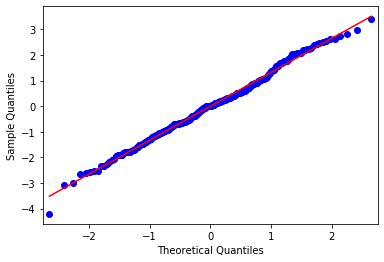

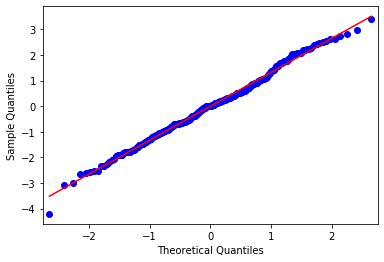

In [225]:
sm.qqplot(results_9.resid, line = 'r') # Гипотеза о нормальности остатков не отвергается

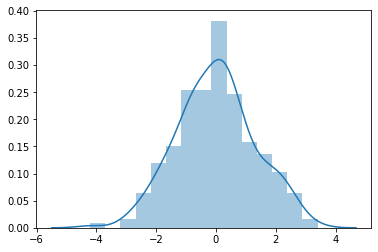

In [226]:
sns.distplot(results_9.resid) # Гистограмма и график плотности распределения остатков линейной регрессионной модели

In [227]:
results_9.resid #остатки регрессионной модели

0     -2.261674e+00
1     -2.985567e+00
2     -2.325514e+00
3     -1.756023e+00
4     -1.800332e+00
5     -1.668718e+00
6     -1.375667e+00
7     -1.602160e+00
8     -1.893930e+00
9     -2.522275e+00
10    -1.527477e+00
11    -1.801067e+00
12    -1.203790e+00
13    -1.055444e+00
14    -1.076465e+00
15    -1.295659e+00
16    -1.905710e+00
17    -8.219792e-01
18    -1.805259e+00
19    -5.209222e-01
20    -5.038115e-01
21    -1.174471e+00
22    -1.301235e+00
23    -6.649803e-01
24    -1.844386e+00
25    -1.265547e+00
26    -1.414901e+00
27    -1.029012e+00
28     6.074193e-02
29    -1.860520e-01
           ...     
238   -9.187706e-03
239    1.962825e+00
240    8.881784e-15
241   -5.610289e-01
242    2.382607e+00
243    6.966901e-01
244   -4.372436e-01
245   -7.280629e-01
246    3.541292e-01
247   -6.750398e-01
249   -3.829217e-01
250   -1.430533e+00
251    1.380893e+00
253   -1.122927e+00
254    1.036653e+00
255    2.094250e+00
256    2.464209e+00
257    3.153138e-01
258   -3.543988e-01


## Гетероскедастичность

In [228]:
# Гетероскедастичность означает непостоянство условных дисперсий ошибок. Трудно сказать, какой именно регрессор (регрессоры)
# может порождать гетероскедастичность (вероятно, это могли быть безразмерные индексы DC, DMC, FFMC, которые были исключены
# нами при борьбе с мультиколлинеарностью - см. далее, почему именно они). Ясно, что в нашем случае гетероскедастичность связана с 1) существенной неоднородностью
# данных, а также 2) с большим разбросом значений по отдельным переменным (высокая дисперсия значений наблюдений).

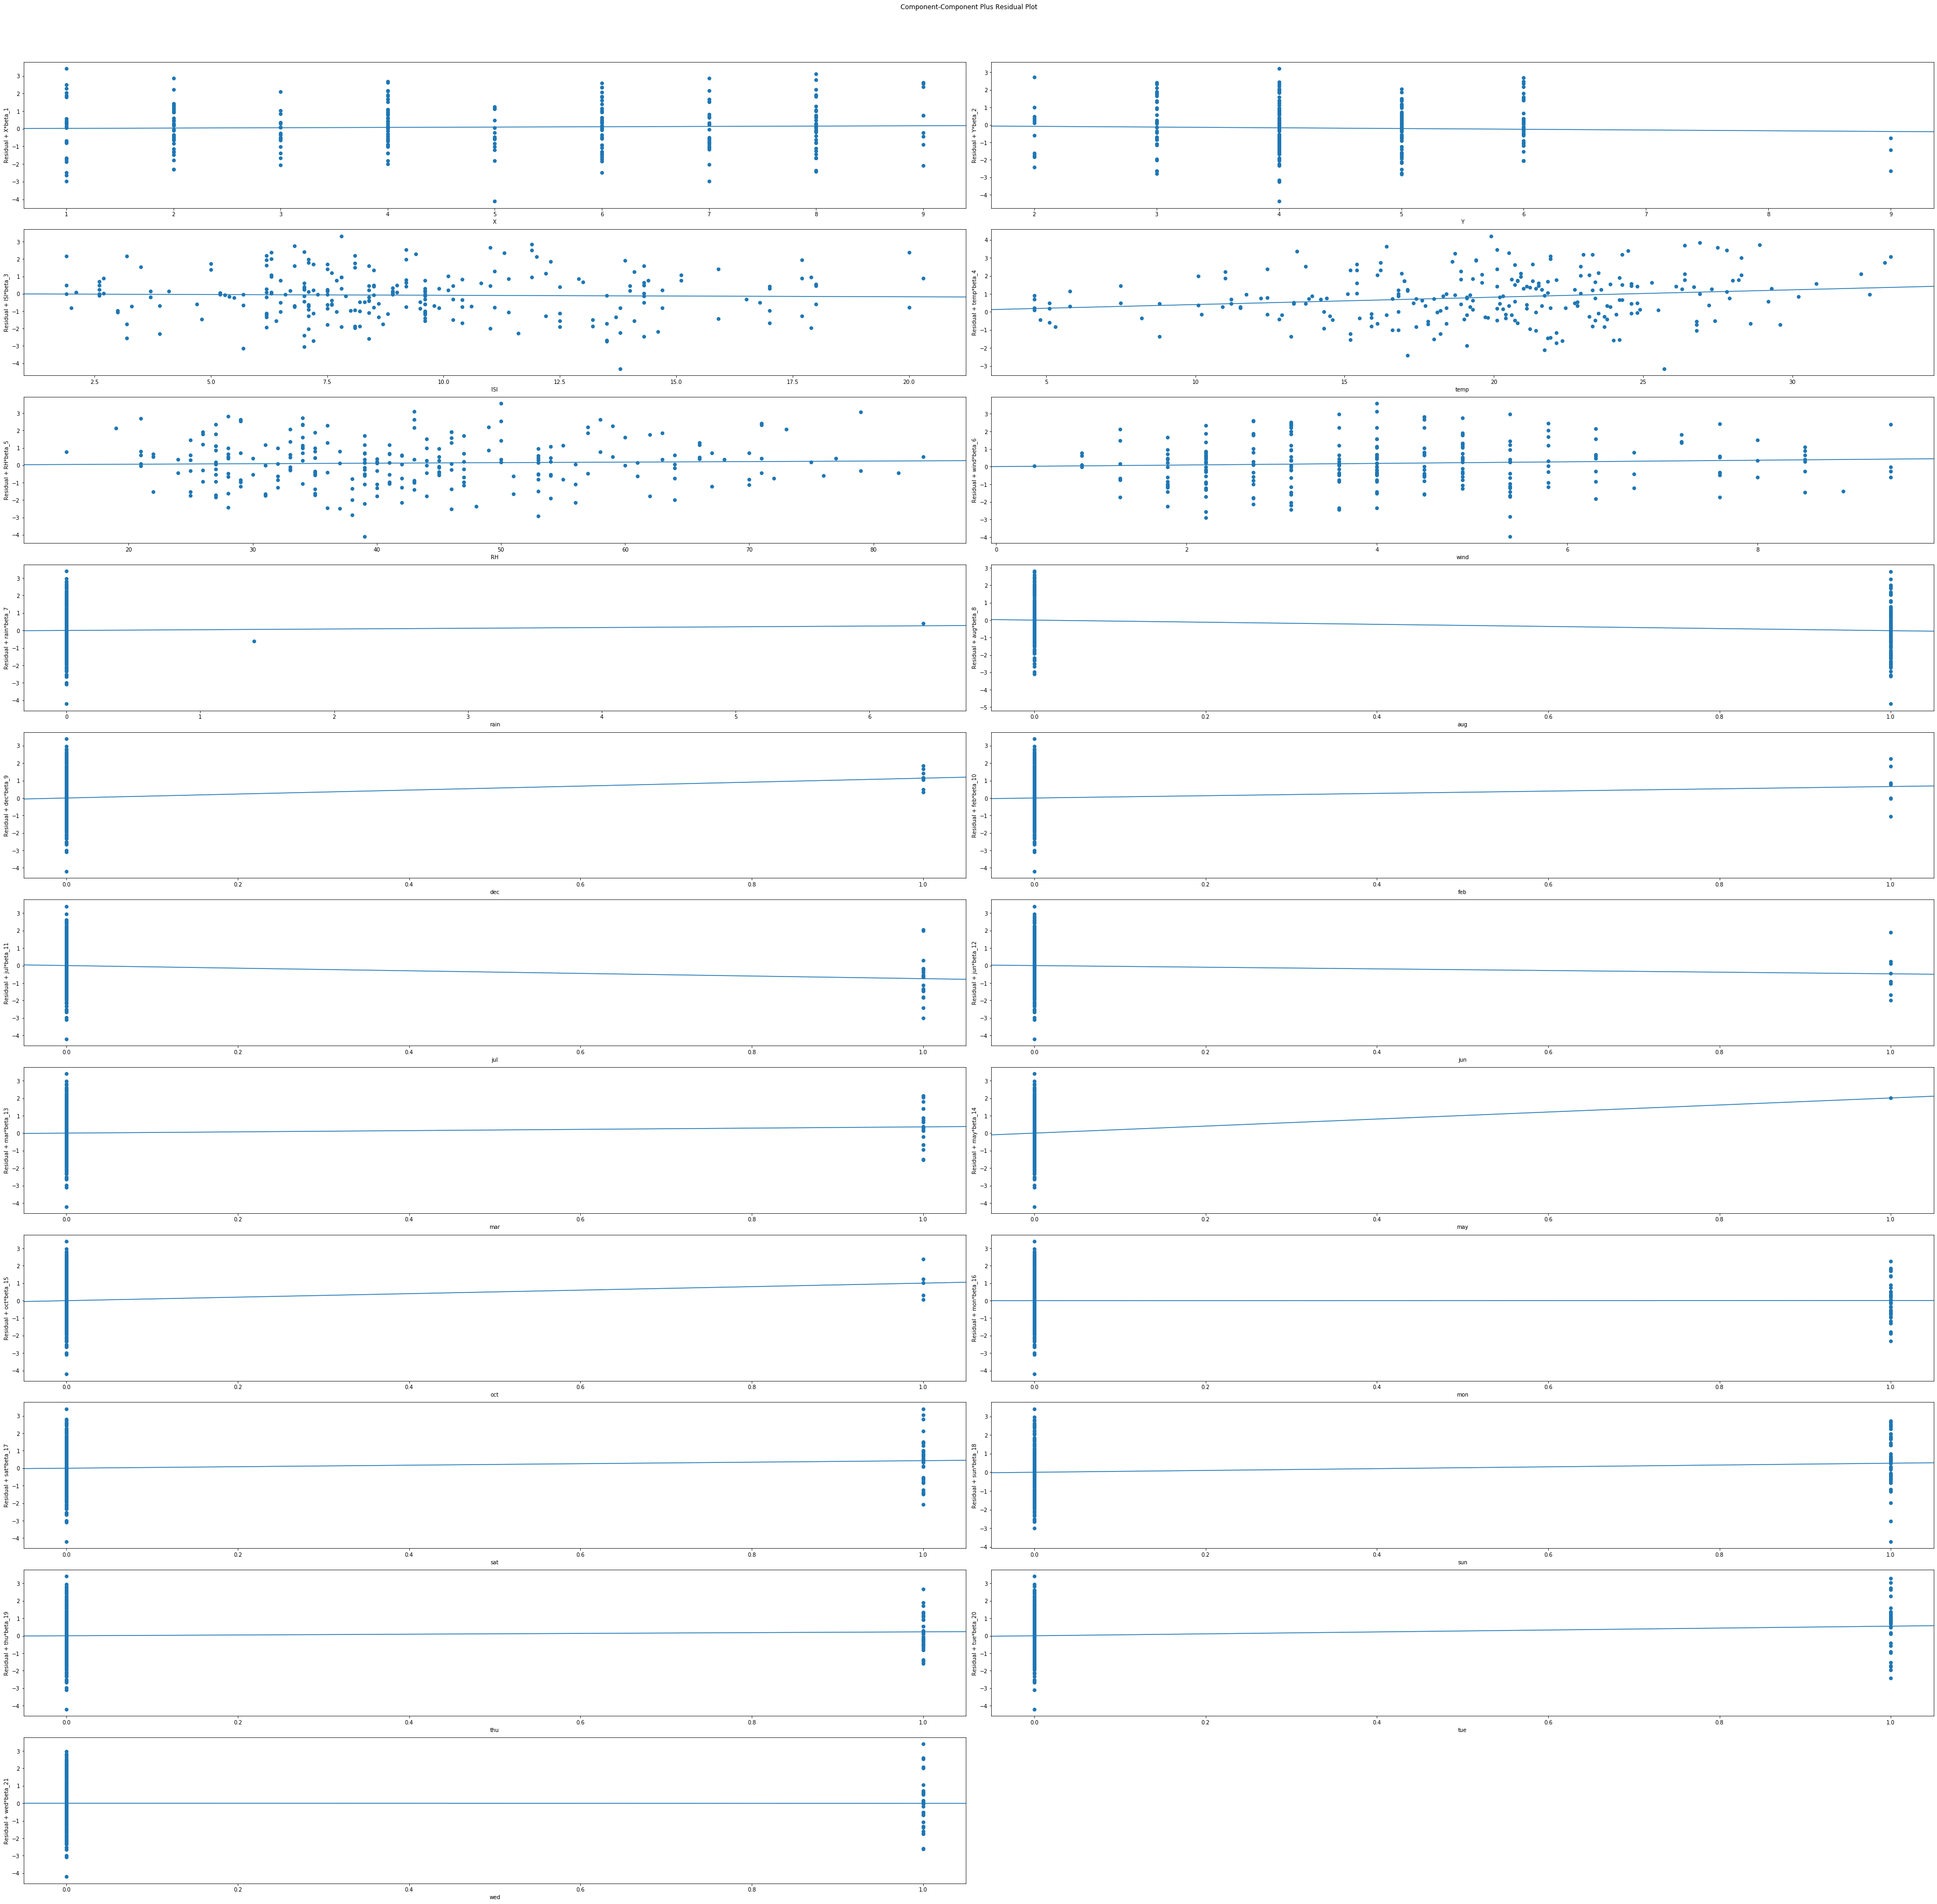

In [229]:
fig = plt.figure(figsize = (50, 50))
fig = sm.graphics.plot_ccpr_grid(results_9, fig = fig)

In [230]:
# Из представленных выше графиков нас интересуют только те, которые построены НЕ для дамми-переменных

In [231]:
resid_sq = results_9.resid ** 2
resid_sq

0      5.115169e+00
1      8.913611e+00
2      5.408018e+00
3      3.083617e+00
4      3.241195e+00
5      2.784618e+00
6      1.892458e+00
7      2.566917e+00
8      3.586970e+00
9      6.361872e+00
10     2.333186e+00
11     3.243841e+00
12     1.449110e+00
13     1.113963e+00
14     1.158776e+00
15     1.678733e+00
16     3.631731e+00
17     6.756499e-01
18     3.258959e+00
19     2.713599e-01
20     2.538260e-01
21     1.379382e+00
22     1.693211e+00
23     4.421989e-01
24     3.401761e+00
25     1.601609e+00
26     2.001944e+00
27     1.058866e+00
28     3.689582e-03
29     3.461533e-02
           ...     
238    8.441395e-05
239    3.852682e+00
240    7.888609e-29
241    3.147534e-01
242    5.676817e+00
243    4.853771e-01
244    1.911819e-01
245    5.300756e-01
246    1.254075e-01
247    4.556788e-01
249    1.466291e-01
250    2.046423e+00
251    1.906866e+00
253    1.260965e+00
254    1.074650e+00
255    4.385882e+00
256    6.072324e+00
257    9.942280e-02
258    1.255985e-01


In [232]:
results_9.predict() # Предсказанные значения

array([1.24002259, 2.14159703, 1.57049191, 1.15818612, 1.30603561,
       1.32622727, 1.1143018 , 1.49679962, 1.84263647, 2.48145314,
       1.59513558, 1.91439528, 1.37774298, 1.36292916, 1.43413912,
       1.67409567, 2.28414659, 1.26666505, 2.28149296, 1.00950219,
       0.99850774, 1.69919927, 1.86085034, 1.30683423, 2.50707442,
       1.93337631, 2.11303529, 1.78981791, 0.76780989, 1.1063347 ,
       1.95139861, 1.20678991, 1.62193521, 0.97042318, 1.63366269,
       1.49637754, 1.12247378, 1.46908151, 1.46585934, 1.39194366,
       1.45122102, 1.49530081, 2.381495  , 2.64181919, 2.50158603,
       2.60628391, 1.03487735, 2.01553012, 2.20666778, 1.54235238,
       2.07650796, 2.2903064 , 1.61026851, 1.25128344, 1.72589501,
       1.72813964, 1.72589501, 1.1045391 , 1.46585934, 1.67402164,
       2.10934491, 2.08008964, 2.21534198, 2.45283482, 2.60890428,
       2.25495156, 1.79703954, 1.65991223, 2.1670104 , 1.68246975,
       2.04169018, 2.95257145, 1.71126391, 1.87878968, 2.32639

In [233]:
forests_for_model_3_7["RH"]

0      42
1      38
2      39
3      31
4      51
5      53
6      32
7      22
8      40
9      28
10     43
11     25
12     39
13     29
14     43
15     47
16     27
17     47
18     27
19     45
20     35
21     34
22     29
23     41
24     31
25     56
26     67
27     70
28     47
29     33
       ..
238    27
239    33
240    40
241    79
242    50
243    35
244    40
245    28
246    45
247    82
249    25
250    40
251    25
253    43
254    34
255    71
256    29
257    30
258    26
259    27
260    26
261    63
262    30
263    29
264    35
265    71
266    62
267    32
268    71
269    70
Name: RH, Length: 248, dtype: int64

In [234]:
# Графически: если имеет место гетероскедастичность, то квадраты остатков УВЕЛИЧИВАЮТСЯ по мере роста значений регрессора

Text(0, 0.5, 'Squared estimates of errors')

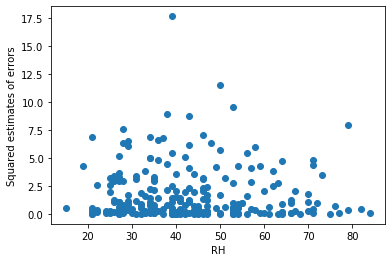

In [235]:
plt.scatter(forests_for_model_3_7["RH"], resid_sq)
plt.xlabel("RH")
plt.ylabel("Squared estimates of errors") # По оси абсцисс отложены значения переменной RH (relative humidity), по оси ординат -
# квадраты остатков регрессии

In [238]:
# Трудно однозначно судить о (не)наличии гетероскедастичности в данном случае - нужны тесты

Text(0, 0.5, 'Squared estimates of errors')

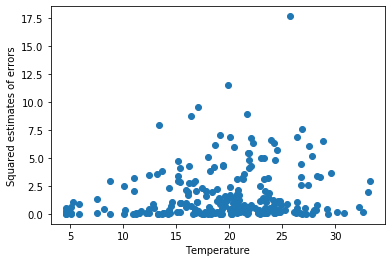

In [239]:
plt.scatter(forests_for_model_3_7["temp"], resid_sq)
plt.xlabel("Temperature")
plt.ylabel("Squared estimates of errors") # По оси абсцисс отложены значения переменной temp (temperature), по оси ординат -
# квадраты остатков регрессии

In [240]:
# Трудно однозначно судить о (не)наличии гетероскедастичности в данном случае - нужны тесты

In [241]:
# ДОПОЛНИТЕЛЬНО: проведем небольшой эксперимент. Возьмем модель из ВАРИАНТА 3, в которую включены переменные FFMC, DMC, DС.
# Эти индексы характеризуются чрезвычайно сильным разбросом значений. Посмотрим, будет ли гетероскедастичность в модели из
# ВАРИАНТА 3 (скорее всего, гетероскедастичность будет, но точно сказать пока нельзя)

In [243]:
resid_sq_for_model_variant_3 = results_6.resid ** 2
resid_sq_for_model_variant_3 # квадраты остатков в модели из варианта 3

0      5.444180e+00
1      7.922829e+00
2      4.359454e+00
3      4.228534e+00
4      3.652586e+00
5      2.900066e+00
6      2.446214e+00
7      3.730684e+00
8      3.851534e+00
9      4.966010e+00
10     3.194708e+00
11     1.256958e+00
12     1.651618e+00
13     1.025272e+00
14     8.994779e-01
15     6.756251e-01
16     2.192489e+00
17     1.164124e+00
18     2.099449e+00
19     7.761478e-01
20     6.655809e-01
21     1.004468e+00
22     1.934416e+00
23     1.223252e+00
24     3.315453e+00
25     8.760019e-01
26     1.161369e+00
27     1.013233e+00
28     9.121018e-02
29     1.004190e-01
           ...     
238    4.445655e-03
239    3.943089e+00
240    1.043269e-28
241    5.590114e-01
242    6.626452e+00
243    5.124930e-01
244    1.967228e-02
245    5.403247e-01
246    3.470325e-01
247    1.475415e-01
249    1.443899e-02
250    2.677749e+00
251    1.934007e+00
253    1.404549e+00
254    9.057525e-01
255    4.478304e+00
256    4.101648e+00
257    9.516971e-02
258    1.225882e-01


Text(0, 0.5, 'Squared estimates of errors')

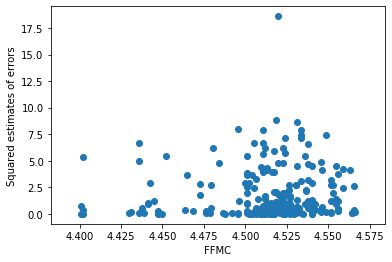

In [244]:
plt.scatter(forests_for_model_3_4["FFMC"], resid_sq_for_model_variant_3)
plt.xlabel("FFMC")
plt.ylabel("Squared estimates of errors") # По оси абсцисс отложен логарифм значения переменной FFMC, по оси ординат -
# квадраты остатков регрессии

Text(0, 0.5, 'Squared estimates of errors')

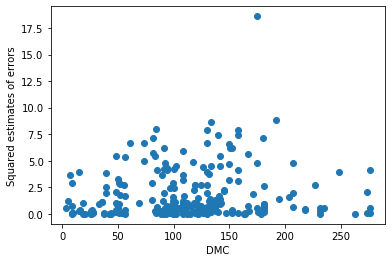

In [245]:
plt.scatter(forests_for_model_3_4["DMC"], resid_sq_for_model_variant_3)
plt.xlabel("DMC")
plt.ylabel("Squared estimates of errors") # По оси абсцисс отложены значения переменной DMC, по оси ординат -
# квадраты остатков регрессии

Text(0, 0.5, 'Squared estimates of errors')

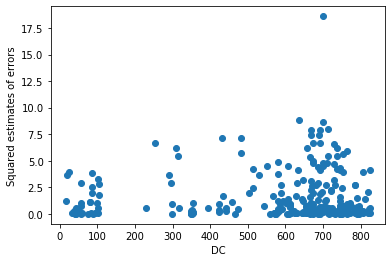

In [246]:
plt.scatter(forests_for_model_3_4["DC"], resid_sq_for_model_variant_3)
plt.xlabel("DC")
plt.ylabel("Squared estimates of errors") # По оси абсцисс отложены значения переменной DMC, по оси ординат -
# квадраты остатков регрессии

In [247]:
results_9.model.exog # Регрессионная матрица

array([[1., 9., 9., ..., 0., 1., 0.],
       [1., 1., 4., ..., 0., 1., 0.],
       [1., 2., 5., ..., 0., 0., 0.],
       ...,
       [1., 4., 3., ..., 0., 0., 0.],
       [1., 2., 4., ..., 0., 0., 0.],
       [1., 7., 4., ..., 0., 0., 0.]])

In [248]:
# Перейдем к тестам: для обнаружения гетероскедастичности будем использовать тест Голдфельда-Кванта и тест Бройша-Пагана

In [249]:
sms.het_goldfeldquandt(results_9.resid, results_9.model.exog)

(0.7922031930451991, 0.8812442980965645, 'increasing')

In [250]:
# Первое значение: значение F-статистики
# Второе значение: p-value

In [251]:
# Гипотеза об условной гомоскедастичности НЕ ОТВЕРГАЕТСЯ

In [252]:
sms.het_breuschpagan(results_9.resid, results_9.model.exog)

(17.359555693107097,
 0.6890936007831019,
 0.8100135500502802,
 0.7062355169673352)

In [253]:
# Первое значение: значение LM-статистики
# Второе значение: p-value
# Третье значение: f-value
# Четвертое значение: f p-value

In [254]:
# Гипотеза об условной гомоскедастичности НЕ ОТВЕРГАЕТСЯ

In [255]:
# Для модели из ВАРИАНТА 3

In [256]:
sms.het_goldfeldquandt(results_6.resid, results_6.model.exog)

(0.7366806622302264, 0.9377869961666008, 'increasing')

In [257]:
sms.het_breuschpagan(results_6.resid, results_6.model.exog)

(23.906514313022498,
 0.3521488219603759,
 1.0910555524994379,
 0.35760347420956257)

In [258]:
# Гипотеза об условной гомоскедастичности НЕ ОТВЕРГАЕТСЯ

In [259]:
# Тест Уайта

In [260]:
sms.het_white(results_9.resid,  results_9.model.exog)

(109.28753360247933,
 0.9553108396585454,
 0.6430417955322223,
 0.9928637938121699)

In [261]:
# Гипотеза об условной гомоскедастичности НЕ ОТВЕРГАЕТСЯ

Text(0, 0.5, 'Residuals')

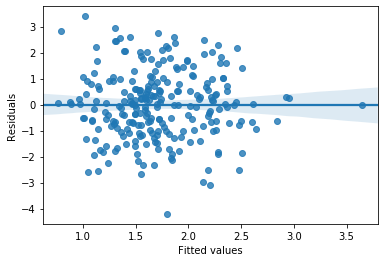

In [262]:
sns.regplot(x = results_9.predict(), y = results_9.resid)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

In [263]:
# Действительно, никакого существенного разброса, указывающего на возможную гетероскедастичность, не наблюдается
# Нет ни "расширений", ни "сужений" (речь о разбросе значений остатков)

In [264]:
# Для модели из ВАРИАНТА 3

Text(0, 0.5, 'Residuals')

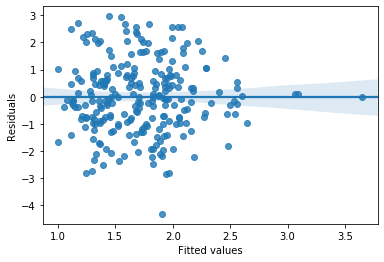

In [265]:
sns.regplot(x = results_6.predict(), y = results_6.resid)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

In [266]:
# Примерно такой же график

## Взвешенный МНК

In [267]:
w = np.ones(248)
model_WLS = sm.WLS(y_, forests_for_model_3_7, weights = 1./(w ** 2))
results_WLS = model_WLS.fit()
print(results_WLS.summary())

                            WLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.105
Model:                            WLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1.259
Date:                Sat, 20 Jun 2020   Prob (F-statistic):              0.205
Time:                        14:16:59   Log-Likelihood:                -417.62
No. Observations:                 248   AIC:                             879.2
Df Residuals:                     226   BIC:                             956.5
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7010      1.042      0.673      0.5

In [268]:
# Единичная взвешивающая матрица - тот же самый результат: beta_OLS = beta_WLS

In [269]:
# Эксперимент: предположим, что имеет место гетероскедастичность, Var(epsilon) = SIGMA, где SIGMA - 
# положительно определенная ковариационная матрица вектора ошибок;
# Предположим, что Var(epsilon_i) = (sigma_i)^2 = sigma * i^4; Тогда можно использовать веса w_i = 1/i^2;

In [270]:
w_1 = np.arange(1, 249, 1)
model_WLS_1 = sm.WLS(y_, forests_for_model_3_7, weights = 1./(w_1 ** 2))
results_WLS_1 = model_WLS_1.fit()
print(results_WLS_1.summary())

                            WLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.695
Model:                            WLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     24.52
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           7.55e-47
Time:                        14:17:30   Log-Likelihood:                -534.61
No. Observations:                 248   AIC:                             1113.
Df Residuals:                     226   BIC:                             1191.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0630      1.147      2.672      0.0

In [271]:
# Коэффициенты, стандартные ошибки, p-value представлены выше;
# Существенно вырос как коэффициент детерминации, так и скорректированный коэффициент детерминации;
# Теперь больше коэффициентов статистически значимые (например, X, const, temp, RH, jul, oct, mon, sat, sun, tue);
# Этот результат кажется отчасти удивительным, учитывая, что НА САМОМ ДЕЛЕ гетероскедастичности указанной выше структуры НЕТ.
# Гипотеза: использование взвешивающей матрицы помогло ОТМАСШТАБИРОВАТЬ качественно разнородные признаки, т.е.
# WLS отчасти решил scaling problem, речь о которой речь шла выше

In [272]:
# Проверим

In [273]:
forests_for_model_3_7

const  X  Y   ISI  temp  RH  wind  rain  aug  dec  ...  jun  mar  may  \
0      1.0  9  9   3.9  18.0  42   2.7   0.0    0    0  ...    0    0    0   
1      1.0  1  4   7.0  21.7  38   2.2   0.0    0    0  ...    0    0    0   
2      1.0  2  5   7.0  21.9  39   1.8   0.0    0    0  ...    0    0    0   
3      1.0  1  2  13.2  23.3  31   4.5   0.0    1    0  ...    0    0    0   
4      1.0  8  6  12.5  21.2  51   8.9   0.0    1    0  ...    0    0    0   
5      1.0  1  2   8.7  16.6  53   5.4   0.0    0    0  ...    0    0    0   
6      1.0  2  5  13.2  23.8  32   5.4   0.0    1    0  ...    0    0    0   
7      1.0  6  5  10.4  27.4  22   4.0   0.0    1    0  ...    0    0    0   
8      1.0  5  4   6.2  13.2  40   5.4   0.0    0    0  ...    0    1    0   
9      1.0  8  3   3.2  24.2  28   3.6   0.0    0    0  ...    0    0    0   
10     1.0  2  2  17.0  17.4  43   6.7   0.0    1    0  ...    0    0    0   
11     1.0  8  6  17.9  23.7  25   4.5   0.0    0    0  ...    0    0    0   
12     1.0  6  5   7.1  23.2  39   5.4   0.0    0    0  ...    1    0    0   
13     1.0  9  9   7.2  24.8  29   2.2   0.0    0    0  ...    0    0    0   
14     1.0  3  4   6.2  24.6  43   1.8   0.0    0    0  ...    0    0    0   
15     1.0  5  4  15.9  20.1  47   4.9   0.0    0    0  ...    0    0    0   
16     1.0  1  5   8.1  29.6  27   2.7   0.0    0    0  ...    0    0    0   
17     1.0  7  4  17.0  16.4  47   1.3   0.0    1    0  ...    0    0    0   
18     1.0  2  4   8.1  28.6  27   2.2   0.0    0    0  ...    0    0    0   
19     1.0  2  2   9.6  18.4  45   3.6   0.0    1    0  ...    0    0    0   
20     1.0  2  4   9.6  20.5  35   4.0   0.0    1    0  ...    0    0    0   
21     1.0  7  4  12.2  19.0  34   5.8   0.0    0    0  ...    0    0    0   
22     1.0  7  4   6.2  16.1  29   3.1   0.0    0    0  ...    0    1    0   
23     1.0  6  4  10.4  20.3  41   4.0   0.0    1    0  ...    0    0    0   
24     1.0  6  3   7.8  15.2  31   8.5   0.0    0    0  ...    0    1    0   
25     1.0  8  6   8.6  17.8  56   1.8   0.0    0    0  ...    0    0    0   
26     1.0  8  5   4.8  17.8  67   2.2   0.0    0    0  ...    0    0    0   
27     1.0  6  5   3.0   5.3  70   4.5   0.0    0    0  ...    0    1    0   
28     1.0  6  5   9.6  16.6  47   0.9   0.0    1    0  ...    0    0    0   
29     1.0  6  5  16.5  23.4  33   4.5   0.0    1    0  ...    0    0    0   
..     ... .. ..   ...   ...  ..   ...   ...  ...  ...  ...  ...  ...  ...   
238    1.0  6  5   8.5  13.3  27   3.6   0.0    0    0  ...    0    1    0   
239    1.0  6  3  12.3  13.7  33   9.4   0.0    0    0  ...    0    0    0   
240    1.0  4  3   5.7  18.0  40   4.0   0.0    0    0  ...    0    0    1   
241    1.0  8  3   4.7  14.3  79   4.0   0.0    0    0  ...    1    0    0   
242    1.0  9  4   9.4  24.5  50   3.1   0.0    0    0  ...    1    0    0   
243    1.0  4  3  10.8  26.4  35   2.7   0.0    0    0  ...    1    0    0   
244    1.0  2  5  18.0  22.7  40   9.4   0.0    0    0  ...    1    0    0   
245    1.0  4  3   9.9  27.2  28   1.3   0.0    0    0  ...    0    0    0   
246    1.0  4  3  14.7  26.1  45   4.0   0.0    0    0  ...    0    0    0   
247    1.0  7  4  14.7  18.2  82   4.5   0.0    0    0  ...    0    0    0   
249    1.0  9  9   9.5  30.2  25   4.5   0.0    0    0  ...    0    0    0   
250    1.0  3  4  14.1  23.4  40   5.8   0.0    1    0  ...    0    0    0   
251    1.0  2  5  14.1  33.1  25   4.0   0.0    1    0  ...    0    0    0   
253    1.0  5  4  17.7  24.1  43   6.3   0.0    1    0  ...    0    0    0   
254    1.0  5  4  17.7  26.4  34   3.6   0.0    1    0  ...    0    0    0   
255    1.0  4  4  17.7  19.4  71   7.6   0.0    1    0  ...    0    0    0   
256    1.0  1  3  11.3  27.5  29   4.5   0.0    1    0  ...    0    0    0   
257    1.0  6  6  14.0  30.8  30   4.9   0.0    1    0  ...    0    0    0   
258    1.0  4  5  16.8  32.6  26   3.1   0.0    1    0  ...    0    0    0   
259    1.0  3  4  14.3  32.

In [274]:
from sklearn.preprocessing import MinMaxScaler

In [275]:
scaler = MinMaxScaler()

In [276]:
forests_for_model_3_7_scaled = scaler.fit_transform(forests_for_model_3_7[["RH", "temp"]])

In [277]:
forests_for_model_3_7_scaled

array([[0.39130435, 0.46689895],
       [0.33333333, 0.59581882],
       [0.34782609, 0.60278746],
       [0.23188406, 0.65156794],
       [0.52173913, 0.57839721],
       [0.55072464, 0.41811847],
       [0.24637681, 0.66898955],
       [0.10144928, 0.79442509],
       [0.36231884, 0.29965157],
       [0.1884058 , 0.68292683],
       [0.4057971 , 0.44599303],
       [0.14492754, 0.66550523],
       [0.34782609, 0.64808362],
       [0.20289855, 0.70383275],
       [0.4057971 , 0.69686411],
       [0.46376812, 0.54006969],
       [0.17391304, 0.87108014],
       [0.46376812, 0.41114983],
       [0.17391304, 0.83623693],
       [0.43478261, 0.48083624],
       [0.28985507, 0.55400697],
       [0.27536232, 0.50174216],
       [0.20289855, 0.40069686],
       [0.37681159, 0.54703833],
       [0.23188406, 0.36933798],
       [0.5942029 , 0.45993031],
       [0.75362319, 0.45993031],
       [0.79710145, 0.02439024],
       [0.46376812, 0.41811847],
       [0.26086957, 0.65505226],
       [0.

In [278]:
forests_for_model_3_7_scaled.shape

(248, 2)

In [279]:
forests_for_model_3_7_scaled[:, 0]

array([0.39130435, 0.33333333, 0.34782609, 0.23188406, 0.52173913,
       0.55072464, 0.24637681, 0.10144928, 0.36231884, 0.1884058 ,
       0.4057971 , 0.14492754, 0.34782609, 0.20289855, 0.4057971 ,
       0.46376812, 0.17391304, 0.46376812, 0.17391304, 0.43478261,
       0.28985507, 0.27536232, 0.20289855, 0.37681159, 0.23188406,
       0.5942029 , 0.75362319, 0.79710145, 0.46376812, 0.26086957,
       0.15942029, 0.43478261, 0.28985507, 0.50724638, 0.34782609,
       0.34782609, 0.55072464, 0.34782609, 0.56521739, 0.42028986,
       0.43478261, 0.73913043, 0.24637681, 0.24637681, 0.55072464,
       0.43478261, 0.27536232, 0.44927536, 0.34782609, 0.39130435,
       0.39130435, 0.65217391, 0.26086957, 0.1884058 , 0.10144928,
       0.14492754, 0.10144928, 0.30434783, 0.56521739, 0.        ,
       0.63768116, 0.26086957, 0.56521739, 0.76811594, 0.31884058,
       0.71014493, 0.27536232, 0.23188406, 0.31884058, 0.26086957,
       0.15942029, 0.14492754, 0.46376812, 0.44927536, 0.17391

In [280]:
forests_for_model_3_7_new = forests_for_model_3_7.assign(RH = forests_for_model_3_7_scaled[:, 0])
forests_for_model_3_7_new 

const  X  Y   ISI  temp        RH  wind  rain  aug  dec  ...  jun  mar  \
0      1.0  9  9   3.9  18.0  0.391304   2.7   0.0    0    0  ...    0    0   
1      1.0  1  4   7.0  21.7  0.333333   2.2   0.0    0    0  ...    0    0   
2      1.0  2  5   7.0  21.9  0.347826   1.8   0.0    0    0  ...    0    0   
3      1.0  1  2  13.2  23.3  0.231884   4.5   0.0    1    0  ...    0    0   
4      1.0  8  6  12.5  21.2  0.521739   8.9   0.0    1    0  ...    0    0   
5      1.0  1  2   8.7  16.6  0.550725   5.4   0.0    0    0  ...    0    0   
6      1.0  2  5  13.2  23.8  0.246377   5.4   0.0    1    0  ...    0    0   
7      1.0  6  5  10.4  27.4  0.101449   4.0   0.0    1    0  ...    0    0   
8      1.0  5  4   6.2  13.2  0.362319   5.4   0.0    0    0  ...    0    1   
9      1.0  8  3   3.2  24.2  0.188406   3.6   0.0    0    0  ...    0    0   
10     1.0  2  2  17.0  17.4  0.405797   6.7   0.0    1    0  ...    0    0   
11     1.0  8  6  17.9  23.7  0.144928   4.5   0.0    0    0  ...    0    0   
12     1.0  6  5   7.1  23.2  0.347826   5.4   0.0    0    0  ...    1    0   
13     1.0  9  9   7.2  24.8  0.202899   2.2   0.0    0    0  ...    0    0   
14     1.0  3  4   6.2  24.6  0.405797   1.8   0.0    0    0  ...    0    0   
15     1.0  5  4  15.9  20.1  0.463768   4.9   0.0    0    0  ...    0    0   
16     1.0  1  5   8.1  29.6  0.173913   2.7   0.0    0    0  ...    0    0   
17     1.0  7  4  17.0  16.4  0.463768   1.3   0.0    1    0  ...    0    0   
18     1.0  2  4   8.1  28.6  0.173913   2.2   0.0    0    0  ...    0    0   
19     1.0  2  2   9.6  18.4  0.434783   3.6   0.0    1    0  ...    0    0   
20     1.0  2  4   9.6  20.5  0.289855   4.0   0.0    1    0  ...    0    0   
21     1.0  7  4  12.2  19.0  0.275362   5.8   0.0    0    0  ...    0    0   
22     1.0  7  4   6.2  16.1  0.202899   3.1   0.0    0    0  ...    0    1   
23     1.0  6  4  10.4  20.3  0.376812   4.0   0.0    1    0  ...    0    0   
24     1.0  6  3   7.8  15.2  0.231884   8.5   0.0    0    0  ...    0    1   
25     1.0  8  6   8.6  17.8  0.594203   1.8   0.0    0    0  ...    0    0   
26     1.0  8  5   4.8  17.8  0.753623   2.2   0.0    0    0  ...    0    0   
27     1.0  6  5   3.0   5.3  0.797101   4.5   0.0    0    0  ...    0    1   
28     1.0  6  5   9.6  16.6  0.463768   0.9   0.0    1    0  ...    0    0   
29     1.0  6  5  16.5  23.4  0.260870   4.5   0.0    1    0  ...    0    0   
..     ... .. ..   ...   ...       ...   ...   ...  ...  ...  ...  ...  ...   
238    1.0  6  5   8.5  13.3  0.173913   3.6   0.0    0    0  ...    0    1   
239    1.0  6  3  12.3  13.7  0.260870   9.4   0.0    0    0  ...    0    0   
240    1.0  4  3   5.7  18.0  0.362319   4.0   0.0    0    0  ...    0    0   
241    1.0  8  3   4.7  14.3  0.927536   4.0   0.0    0    0  ...    1    0   
242    1.0  9  4   9.4  24.5  0.507246   3.1   0.0    0    0  ...    1    0   
243    1.0  4  3  10.8  26.4  0.289855   2.7   0.0    0    0  ...    1    0   
244    1.0  2  5  18.0  22.7  0.362319   9.4   0.0    0    0  ...    1    0   
245    1.0  4  3   9.9  27.2  0.188406   1.3   0.0    0    0  ...    0    0   
246    1.0  4  3  14.7  26.1  0.434783   4.0   0.0    0    0  ...    0    0   
247    1.0  7  4  14.7  18.2  0.971014   4.5   0.0    0    0  ...    0    0   
249    1.0  9  9   9.5  30.2  0.144928   4.5   0.0    0    0  ...    0    0   
250    1.0  3  4  14.1  23.4  0.362319   5.8   0.0    1    0  ...    0    0   
251    1.0  2  5  14.1  33.1  0.144928   4.0   0.0    1    0  ...    0    0   
253    1.0  5  4  17.7  24.1  0.405797   6.3   0.0    1    0  ...    0    0   
254    1.0  5  4  17.7  26.4  0.275362   3.6   0.0    1    0  ...    0    0   
255    1.0  4  4  17.7  19.4  0.811594   7.6   0.0    1    0  ...    0    0   
256    1.0  1  3  11.3  27.5  0.202899   4.5   0.0    1    0  ...    0    0   
257    1.0  6  6  14.0  30.8  0.217391   4.9   0.0    1    0  ...    0    0   
258    1.0  4  5  16.8  32.6  0.159420   3.1   0.0    1

In [281]:
forests_for_model_3_7_new_1 = forests_for_model_3_7_new.assign(temp = forests_for_model_3_7_scaled[:, 1])
forests_for_model_3_7_new_1

const  X  Y   ISI      temp        RH  wind  rain  aug  dec  ...  jun  \
0      1.0  9  9   3.9  0.466899  0.391304   2.7   0.0    0    0  ...    0   
1      1.0  1  4   7.0  0.595819  0.333333   2.2   0.0    0    0  ...    0   
2      1.0  2  5   7.0  0.602787  0.347826   1.8   0.0    0    0  ...    0   
3      1.0  1  2  13.2  0.651568  0.231884   4.5   0.0    1    0  ...    0   
4      1.0  8  6  12.5  0.578397  0.521739   8.9   0.0    1    0  ...    0   
5      1.0  1  2   8.7  0.418118  0.550725   5.4   0.0    0    0  ...    0   
6      1.0  2  5  13.2  0.668990  0.246377   5.4   0.0    1    0  ...    0   
7      1.0  6  5  10.4  0.794425  0.101449   4.0   0.0    1    0  ...    0   
8      1.0  5  4   6.2  0.299652  0.362319   5.4   0.0    0    0  ...    0   
9      1.0  8  3   3.2  0.682927  0.188406   3.6   0.0    0    0  ...    0   
10     1.0  2  2  17.0  0.445993  0.405797   6.7   0.0    1    0  ...    0   
11     1.0  8  6  17.9  0.665505  0.144928   4.5   0.0    0    0  ...    0   
12     1.0  6  5   7.1  0.648084  0.347826   5.4   0.0    0    0  ...    1   
13     1.0  9  9   7.2  0.703833  0.202899   2.2   0.0    0    0  ...    0   
14     1.0  3  4   6.2  0.696864  0.405797   1.8   0.0    0    0  ...    0   
15     1.0  5  4  15.9  0.540070  0.463768   4.9   0.0    0    0  ...    0   
16     1.0  1  5   8.1  0.871080  0.173913   2.7   0.0    0    0  ...    0   
17     1.0  7  4  17.0  0.411150  0.463768   1.3   0.0    1    0  ...    0   
18     1.0  2  4   8.1  0.836237  0.173913   2.2   0.0    0    0  ...    0   
19     1.0  2  2   9.6  0.480836  0.434783   3.6   0.0    1    0  ...    0   
20     1.0  2  4   9.6  0.554007  0.289855   4.0   0.0    1    0  ...    0   
21     1.0  7  4  12.2  0.501742  0.275362   5.8   0.0    0    0  ...    0   
22     1.0  7  4   6.2  0.400697  0.202899   3.1   0.0    0    0  ...    0   
23     1.0  6  4  10.4  0.547038  0.376812   4.0   0.0    1    0  ...    0   
24     1.0  6  3   7.8  0.369338  0.231884   8.5   0.0    0    0  ...    0   
25     1.0  8  6   8.6  0.459930  0.594203   1.8   0.0    0    0  ...    0   
26     1.0  8  5   4.8  0.459930  0.753623   2.2   0.0    0    0  ...    0   
27     1.0  6  5   3.0  0.024390  0.797101   4.5   0.0    0    0  ...    0   
28     1.0  6  5   9.6  0.418118  0.463768   0.9   0.0    1    0  ...    0   
29     1.0  6  5  16.5  0.655052  0.260870   4.5   0.0    1    0  ...    0   
..     ... .. ..   ...       ...       ...   ...   ...  ...  ...  ...  ...   
238    1.0  6  5   8.5  0.303136  0.173913   3.6   0.0    0    0  ...    0   
239    1.0  6  3  12.3  0.317073  0.260870   9.4   0.0    0    0  ...    0   
240    1.0  4  3   5.7  0.466899  0.362319   4.0   0.0    0    0  ...    0   
241    1.0  8  3   4.7  0.337979  0.927536   4.0   0.0    0    0  ...    1   
242    1.0  9  4   9.4  0.693380  0.507246   3.1   0.0    0    0  ...    1   
243    1.0  4  3  10.8  0.759582  0.289855   2.7   0.0    0    0  ...    1   
244    1.0  2  5  18.0  0.630662  0.362319   9.4   0.0    0    0  ...    1   
245    1.0  4  3   9.9  0.787456  0.188406   1.3   0.0    0    0  ...    0   
246    1.0  4  3  14.7  0.749129  0.434783   4.0   0.0    0    0  ...    0   
247    1.0  7  4  14.7  0.473868  0.971014   4.5   0.0    0    0  ...    0   
249    1.0  9  9   9.5  0.891986  0.144928   4.5   0.0    0    0  ...    0   
250    1.0  3  4  14.1  0.655052  0.362319   5.8   0.0    1    0  ...    0   
251    1.0  2  5  14.1  0.993031  0.144928   4.0   0.0    1    0  ...    0   
253    1.0  5  4  17.7  0.679443  0.405797   6.3   0.0    1    0  ...    0   
254    1.0  5  4  17.7  0.759582  0.275362   3.6   0.0    1    0  ...    0   
255    1.0  4  4  17.7  0.515679  0.811594   7.6   0.0    1    0  ...    0   
256    1.0  1  3  11.3  0.797909  0.202899   4.5   0.0    1    0  ...    0   
257    1.0  6  6  14.0  0.912892  0.217391   4.9   0.0    1    0  ...    0   
258    1.0  4  5  16.8  0.975610  0.159420   3.1   0.0    1    0  ...    0   
259    1.0  3  4  14.3  0.9

In [282]:
model_10 = sm.OLS(y_, forests_for_model_3_7_new_1)
results_10 = model_10.fit()
print(results_10.summary())

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1.259
Date:                Sat, 20 Jun 2020   Prob (F-statistic):              0.205
Time:                        14:18:20   Log-Likelihood:                -417.62
No. Observations:                 248   AIC:                             879.2
Df Residuals:                     226   BIC:                             956.5
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9346      0.836      1.119      0.2

In [283]:
forests_for_model_3_7_scaled_1 = scaler.fit_transform(forests_for_model_3_7[["ISI", "X", "Y"]])
forests_for_model_3_7_scaled_1

array([[0.10869565, 1.        , 1.        ],
       [0.27717391, 0.        , 0.28571429],
       [0.27717391, 0.125     , 0.42857143],
       [0.61413043, 0.        , 0.        ],
       [0.57608696, 0.875     , 0.57142857],
       [0.36956522, 0.        , 0.        ],
       [0.61413043, 0.125     , 0.42857143],
       [0.46195652, 0.625     , 0.42857143],
       [0.23369565, 0.5       , 0.28571429],
       [0.07065217, 0.875     , 0.14285714],
       [0.82065217, 0.125     , 0.        ],
       [0.86956522, 0.875     , 0.57142857],
       [0.2826087 , 0.625     , 0.42857143],
       [0.28804348, 1.        , 1.        ],
       [0.23369565, 0.25      , 0.28571429],
       [0.76086957, 0.5       , 0.28571429],
       [0.33695652, 0.        , 0.42857143],
       [0.82065217, 0.75      , 0.28571429],
       [0.33695652, 0.125     , 0.28571429],
       [0.41847826, 0.125     , 0.        ],
       [0.41847826, 0.125     , 0.28571429],
       [0.55978261, 0.75      , 0.28571429],
       [0.

In [284]:
forests_for_model_3_7_new_2 = forests_for_model_3_7_new_1.assign(ISI = forests_for_model_3_7_scaled_1[:, 0])
forests_for_model_3_7_new_2

const  X  Y       ISI      temp        RH  wind  rain  aug  dec  ...  \
0      1.0  9  9  0.108696  0.466899  0.391304   2.7   0.0    0    0  ...   
1      1.0  1  4  0.277174  0.595819  0.333333   2.2   0.0    0    0  ...   
2      1.0  2  5  0.277174  0.602787  0.347826   1.8   0.0    0    0  ...   
3      1.0  1  2  0.614130  0.651568  0.231884   4.5   0.0    1    0  ...   
4      1.0  8  6  0.576087  0.578397  0.521739   8.9   0.0    1    0  ...   
5      1.0  1  2  0.369565  0.418118  0.550725   5.4   0.0    0    0  ...   
6      1.0  2  5  0.614130  0.668990  0.246377   5.4   0.0    1    0  ...   
7      1.0  6  5  0.461957  0.794425  0.101449   4.0   0.0    1    0  ...   
8      1.0  5  4  0.233696  0.299652  0.362319   5.4   0.0    0    0  ...   
9      1.0  8  3  0.070652  0.682927  0.188406   3.6   0.0    0    0  ...   
10     1.0  2  2  0.820652  0.445993  0.405797   6.7   0.0    1    0  ...   
11     1.0  8  6  0.869565  0.665505  0.144928   4.5   0.0    0    0  ...   
12     1.0  6  5  0.282609  0.648084  0.347826   5.4   0.0    0    0  ...   
13     1.0  9  9  0.288043  0.703833  0.202899   2.2   0.0    0    0  ...   
14     1.0  3  4  0.233696  0.696864  0.405797   1.8   0.0    0    0  ...   
15     1.0  5  4  0.760870  0.540070  0.463768   4.9   0.0    0    0  ...   
16     1.0  1  5  0.336957  0.871080  0.173913   2.7   0.0    0    0  ...   
17     1.0  7  4  0.820652  0.411150  0.463768   1.3   0.0    1    0  ...   
18     1.0  2  4  0.336957  0.836237  0.173913   2.2   0.0    0    0  ...   
19     1.0  2  2  0.418478  0.480836  0.434783   3.6   0.0    1    0  ...   
20     1.0  2  4  0.418478  0.554007  0.289855   4.0   0.0    1    0  ...   
21     1.0  7  4  0.559783  0.501742  0.275362   5.8   0.0    0    0  ...   
22     1.0  7  4  0.233696  0.400697  0.202899   3.1   0.0    0    0  ...   
23     1.0  6  4  0.461957  0.547038  0.376812   4.0   0.0    1    0  ...   
24     1.0  6  3  0.320652  0.369338  0.231884   8.5   0.0    0    0  ...   
25     1.0  8  6  0.364130  0.459930  0.594203   1.8   0.0    0    0  ...   
26     1.0  8  5  0.157609  0.459930  0.753623   2.2   0.0    0    0  ...   
27     1.0  6  5  0.059783  0.024390  0.797101   4.5   0.0    0    0  ...   
28     1.0  6  5  0.418478  0.418118  0.463768   0.9   0.0    1    0  ...   
29     1.0  6  5  0.793478  0.655052  0.260870   4.5   0.0    1    0  ...   
..     ... .. ..       ...       ...       ...   ...   ...  ...  ...  ...   
238    1.0  6  5  0.358696  0.303136  0.173913   3.6   0.0    0    0  ...   
239    1.0  6  3  0.565217  0.317073  0.260870   9.4   0.0    0    0  ...   
240    1.0  4  3  0.206522  0.466899  0.362319   4.0   0.0    0    0  ...   
241    1.0  8  3  0.152174  0.337979  0.927536   4.0   0.0    0    0  ...   
242    1.0  9  4  0.407609  0.693380  0.507246   3.1   0.0    0    0  ...   
243    1.0  4  3  0.483696  0.759582  0.289855   2.7   0.0    0    0  ...   
244    1.0  2  5  0.875000  0.630662  0.362319   9.4   0.0    0    0  ...   
245    1.0  4  3  0.434783  0.787456  0.188406   1.3   0.0    0    0  ...   
246    1.0  4  3  0.695652  0.749129  0.434783   4.0   0.0    0    0  ...   
247    1.0  7  4  0.695652  0.473868  0.971014   4.5   0.0    0    0  ...   
249    1.0  9  9  0.413043  0.891986  0.144928   4.5   0.0    0    0  ...   
250    1.0  3  4  0.663043  0.655052  0.362319   5.8   0.0    1    0  ...   
251    1.0  2  5  0.663043  0.993031  0.144928   4.0   0.0    1    0  ...   
253    1.0  5  4  0.858696  0.679443  0.405797   6.3   0.0    1    0  ...   
254    1.0  5  4  0.858696  0.759582  0.275362   3.6   0.0    1    0  ...   
255    1.0  4  4  0.858696  0.515679  0.811594   7.6   0.0    1    0  ...   
256    1.0  1  3  0.510870  0.797909  0.202899   4.5   0.0    1    0  ...   
257    1.0  6  6  0.657609  0.912892  0.217391   4.9   0.0    1    0  ...   
258    1.0  4  5  0.809783  0.975610  0.159420   3.1   0.0    1    0  ...   
259    1.0  3  4  0.673913  0.965157  0.173913   2.2   0.0    1    0  ...   
2

In [285]:
forests_for_model_3_7_new_3 = forests_for_model_3_7_new_2.assign(X = forests_for_model_3_7_scaled_1[:, 1])
forests_for_model_3_7_new_3

const      X  Y       ISI      temp        RH  wind  rain  aug  dec  ...  \
0      1.0  1.000  9  0.108696  0.466899  0.391304   2.7   0.0    0    0  ...   
1      1.0  0.000  4  0.277174  0.595819  0.333333   2.2   0.0    0    0  ...   
2      1.0  0.125  5  0.277174  0.602787  0.347826   1.8   0.0    0    0  ...   
3      1.0  0.000  2  0.614130  0.651568  0.231884   4.5   0.0    1    0  ...   
4      1.0  0.875  6  0.576087  0.578397  0.521739   8.9   0.0    1    0  ...   
5      1.0  0.000  2  0.369565  0.418118  0.550725   5.4   0.0    0    0  ...   
6      1.0  0.125  5  0.614130  0.668990  0.246377   5.4   0.0    1    0  ...   
7      1.0  0.625  5  0.461957  0.794425  0.101449   4.0   0.0    1    0  ...   
8      1.0  0.500  4  0.233696  0.299652  0.362319   5.4   0.0    0    0  ...   
9      1.0  0.875  3  0.070652  0.682927  0.188406   3.6   0.0    0    0  ...   
10     1.0  0.125  2  0.820652  0.445993  0.405797   6.7   0.0    1    0  ...   
11     1.0  0.875  6  0.869565  0.665505  0.144928   4.5   0.0    0    0  ...   
12     1.0  0.625  5  0.282609  0.648084  0.347826   5.4   0.0    0    0  ...   
13     1.0  1.000  9  0.288043  0.703833  0.202899   2.2   0.0    0    0  ...   
14     1.0  0.250  4  0.233696  0.696864  0.405797   1.8   0.0    0    0  ...   
15     1.0  0.500  4  0.760870  0.540070  0.463768   4.9   0.0    0    0  ...   
16     1.0  0.000  5  0.336957  0.871080  0.173913   2.7   0.0    0    0  ...   
17     1.0  0.750  4  0.820652  0.411150  0.463768   1.3   0.0    1    0  ...   
18     1.0  0.125  4  0.336957  0.836237  0.173913   2.2   0.0    0    0  ...   
19     1.0  0.125  2  0.418478  0.480836  0.434783   3.6   0.0    1    0  ...   
20     1.0  0.125  4  0.418478  0.554007  0.289855   4.0   0.0    1    0  ...   
21     1.0  0.750  4  0.559783  0.501742  0.275362   5.8   0.0    0    0  ...   
22     1.0  0.750  4  0.233696  0.400697  0.202899   3.1   0.0    0    0  ...   
23     1.0  0.625  4  0.461957  0.547038  0.376812   4.0   0.0    1    0  ...   
24     1.0  0.625  3  0.320652  0.369338  0.231884   8.5   0.0    0    0  ...   
25     1.0  0.875  6  0.364130  0.459930  0.594203   1.8   0.0    0    0  ...   
26     1.0  0.875  5  0.157609  0.459930  0.753623   2.2   0.0    0    0  ...   
27     1.0  0.625  5  0.059783  0.024390  0.797101   4.5   0.0    0    0  ...   
28     1.0  0.625  5  0.418478  0.418118  0.463768   0.9   0.0    1    0  ...   
29     1.0  0.625  5  0.793478  0.655052  0.260870   4.5   0.0    1    0  ...   
..     ...    ... ..       ...       ...       ...   ...   ...  ...  ...  ...   
238    1.0  0.625  5  0.358696  0.303136  0.173913   3.6   0.0    0    0  ...   
239    1.0  0.625  3  0.565217  0.317073  0.260870   9.4   0.0    0    0  ...   
240    1.0  0.375  3  0.206522  0.466899  0.362319   4.0   0.0    0    0  ...   
241    1.0  0.875  3  0.152174  0.337979  0.927536   4.0   0.0    0    0  ...   
242    1.0  1.000  4  0.407609  0.693380  0.507246   3.1   0.0    0    0  ...   
243    1.0  0.375  3  0.483696  0.759582  0.289855   2.7   0.0    0    0  ...   
244    1.0  0.125  5  0.875000  0.630662  0.362319   9.4   0.0    0    0  ...   
245    1.0  0.375  3  0.434783  0.787456  0.188406   1.3   0.0    0    0  ...   
246    1.0  0.375  3  0.695652  0.749129  0.434783   4.0   0.0    0    0  ...   
247    1.0  0.750  4  0.695652  0.473868  0.971014   4.5   0.0    0    0  ...   
249    1.0  1.000  9  0.413043  0.891986  0.144928   4.5   0.0    0    0  ...   
250    1.0  0.250  4  0.663043  0.655052  0.362319   5.8   0.0    1    0  ...   
251    1.0  0.125  5  0.663043  0.993031  0.144928   4.0   0.0    1    0  ...   
253    1.0  0.500  4  0.858696  0.679443  0.405797   6.3   0.0    1    0  ...   
254    1.0  0.500  4  0.858696  0.759582  0.275362   3.6   0.0    1    0  ...   
255    1.0  0.375  4  0.858696  0.515679  0.811594   7.6   0.0    1    0  ...   
256    1.0  0.000  3  0.510870  0.797909  0.202899   4.5   0.0    1    0  ...   
257    1.0  0.625  6  0.657609  0.91

In [286]:
forests_for_model_3_7_new_4 = forests_for_model_3_7_new_3.assign(Y = forests_for_model_3_7_scaled_1[:, 2])
forests_for_model_3_7_new_4

const      X         Y       ISI      temp        RH  wind  rain  aug  \
0      1.0  1.000  1.000000  0.108696  0.466899  0.391304   2.7   0.0    0   
1      1.0  0.000  0.285714  0.277174  0.595819  0.333333   2.2   0.0    0   
2      1.0  0.125  0.428571  0.277174  0.602787  0.347826   1.8   0.0    0   
3      1.0  0.000  0.000000  0.614130  0.651568  0.231884   4.5   0.0    1   
4      1.0  0.875  0.571429  0.576087  0.578397  0.521739   8.9   0.0    1   
5      1.0  0.000  0.000000  0.369565  0.418118  0.550725   5.4   0.0    0   
6      1.0  0.125  0.428571  0.614130  0.668990  0.246377   5.4   0.0    1   
7      1.0  0.625  0.428571  0.461957  0.794425  0.101449   4.0   0.0    1   
8      1.0  0.500  0.285714  0.233696  0.299652  0.362319   5.4   0.0    0   
9      1.0  0.875  0.142857  0.070652  0.682927  0.188406   3.6   0.0    0   
10     1.0  0.125  0.000000  0.820652  0.445993  0.405797   6.7   0.0    1   
11     1.0  0.875  0.571429  0.869565  0.665505  0.144928   4.5   0.0    0   
12     1.0  0.625  0.428571  0.282609  0.648084  0.347826   5.4   0.0    0   
13     1.0  1.000  1.000000  0.288043  0.703833  0.202899   2.2   0.0    0   
14     1.0  0.250  0.285714  0.233696  0.696864  0.405797   1.8   0.0    0   
15     1.0  0.500  0.285714  0.760870  0.540070  0.463768   4.9   0.0    0   
16     1.0  0.000  0.428571  0.336957  0.871080  0.173913   2.7   0.0    0   
17     1.0  0.750  0.285714  0.820652  0.411150  0.463768   1.3   0.0    1   
18     1.0  0.125  0.285714  0.336957  0.836237  0.173913   2.2   0.0    0   
19     1.0  0.125  0.000000  0.418478  0.480836  0.434783   3.6   0.0    1   
20     1.0  0.125  0.285714  0.418478  0.554007  0.289855   4.0   0.0    1   
21     1.0  0.750  0.285714  0.559783  0.501742  0.275362   5.8   0.0    0   
22     1.0  0.750  0.285714  0.233696  0.400697  0.202899   3.1   0.0    0   
23     1.0  0.625  0.285714  0.461957  0.547038  0.376812   4.0   0.0    1   
24     1.0  0.625  0.142857  0.320652  0.369338  0.231884   8.5   0.0    0   
25     1.0  0.875  0.571429  0.364130  0.459930  0.594203   1.8   0.0    0   
26     1.0  0.875  0.428571  0.157609  0.459930  0.753623   2.2   0.0    0   
27     1.0  0.625  0.428571  0.059783  0.024390  0.797101   4.5   0.0    0   
28     1.0  0.625  0.428571  0.418478  0.418118  0.463768   0.9   0.0    1   
29     1.0  0.625  0.428571  0.793478  0.655052  0.260870   4.5   0.0    1   
..     ...    ...       ...       ...       ...       ...   ...   ...  ...   
238    1.0  0.625  0.428571  0.358696  0.303136  0.173913   3.6   0.0    0   
239    1.0  0.625  0.142857  0.565217  0.317073  0.260870   9.4   0.0    0   
240    1.0  0.375  0.142857  0.206522  0.466899  0.362319   4.0   0.0    0   
241    1.0  0.875  0.142857  0.152174  0.337979  0.927536   4.0   0.0    0   
242    1.0  1.000  0.285714  0.407609  0.693380  0.507246   3.1   0.0    0   
243    1.0  0.375  0.142857  0.483696  0.759582  0.289855   2.7   0.0    0   
244    1.0  0.125  0.428571  0.875000  0.630662  0.362319   9.4   0.0    0   
245    1.0  0.375  0.142857  0.434783  0.787456  0.188406   1.3   0.0    0   
246    1.0  0.375  0.142857  0.695652  0.749129  0.434783   4.0   0.0    0   
247    1.0  0.750  0.285714  0.695652  0.473868  0.971014   4.5   0.0    0   
249    1.0  1.000  1.000000  0.413043  0.891986  0.144928   4.5   0.0    0   
250    1.0  0.250  0.285714  0.663043  0.655052  0.362319   5.8   0.0    1   
251    1.0  0.125  0.428571  0.663043  0.993031  0.144928   4.0   0.0    1   
253    1.0  0.500  0.285714  0.858696  0.679443  0.405797   6.3   0.0    1   
254    1.0  0.500  0.285714  0.858696  0.759582  0.275362   3.6   0.0    1   
255    1.0  0.375  0.285714  0.858696  0.515679  0.811594   7.6   0.0    1   
256    1.0  0.000  0.142857  0.510870  0.797909  0.202899   4.5   0.0    1   
257    1.0  0.625  0.571429  0.657609  0.912892  0.217391   4.9   0.0    1   
258    1.0  0.375  0.428571  0.809783  0.975610  0.159420   3.1   0.0    1   
259    1.0  0.250  0.285714

In [287]:
model_11 = sm.OLS(y_, forests_for_model_3_7_new_4)
results_11 = model_11.fit()
print(results_11.summary())

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1.259
Date:                Sat, 20 Jun 2020   Prob (F-statistic):              0.205
Time:                        14:18:30   Log-Likelihood:                -417.62
No. Observations:                 248   AIC:                             879.2
Df Residuals:                     226   BIC:                             956.5
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8525      0.776      1.099      0.2

In [288]:
# При масштабировании (на отрезок [0, 1]) признаков качество модели практически не поменялось

## Робастные ошибки в форме Уайта (HC0 и HC3)

In [289]:
# Сначала с помощью пакета

In [290]:
results_9.HC0_se

const    0.893807
X        0.045156
Y        0.089648
ISI      0.029423
temp     0.030673
RH       0.008407
wind     0.048781
rain     0.075206
aug      0.234258
dec      0.539993
feb      0.480345
jul      0.393616
jun      0.460856
mar      0.343657
may      0.295253
oct      0.421323
mon      0.310045
sat      0.338128
sun      0.328221
thu      0.306179
tue      0.353745
wed      0.356656
dtype: float64

In [291]:
# Вручную 

In [292]:
# Вычисление по формуле Var_(hat)_(beta_hat)_(HC0) = (X^T * X)^(-1) * X^T * diag{(e_1_hat)^2, ...,(e_n_hat)^2} * X * (X^T * X)^(-1)

In [293]:
# Здесь X - регрессионная матрица, (e_i_hat)^2 - квадрат i-ого регрессионного остатка, diag{(e_1_hat)^2, ...,(e_n_hat)^2} - диагональная матрица: на главной диагонали расположены квадраты остатков регрессии, внедиагональные элементы - нули

In [294]:
Residuals_sq = results_9.resid ** 2
Residuals_sq

0      5.115169e+00
1      8.913611e+00
2      5.408018e+00
3      3.083617e+00
4      3.241195e+00
5      2.784618e+00
6      1.892458e+00
7      2.566917e+00
8      3.586970e+00
9      6.361872e+00
10     2.333186e+00
11     3.243841e+00
12     1.449110e+00
13     1.113963e+00
14     1.158776e+00
15     1.678733e+00
16     3.631731e+00
17     6.756499e-01
18     3.258959e+00
19     2.713599e-01
20     2.538260e-01
21     1.379382e+00
22     1.693211e+00
23     4.421989e-01
24     3.401761e+00
25     1.601609e+00
26     2.001944e+00
27     1.058866e+00
28     3.689582e-03
29     3.461533e-02
           ...     
238    8.441395e-05
239    3.852682e+00
240    7.888609e-29
241    3.147534e-01
242    5.676817e+00
243    4.853771e-01
244    1.911819e-01
245    5.300756e-01
246    1.254075e-01
247    4.556788e-01
249    1.466291e-01
250    2.046423e+00
251    1.906866e+00
253    1.260965e+00
254    1.074650e+00
255    4.385882e+00
256    6.072324e+00
257    9.942280e-02
258    1.255985e-01


In [295]:
Residuals_sq.dtype

dtype('float64')

In [296]:
Residuals_sq.shape

(248,)

In [297]:
MATRIX = forests_for_model_3_7.values
MATRIX

array([[1., 9., 9., ..., 0., 1., 0.],
       [1., 1., 4., ..., 0., 1., 0.],
       [1., 2., 5., ..., 0., 0., 0.],
       ...,
       [1., 4., 3., ..., 0., 0., 0.],
       [1., 2., 4., ..., 0., 0., 0.],
       [1., 7., 4., ..., 0., 0., 0.]])

In [298]:
First_step = np.dot(MATRIX.transpose(), MATRIX)
First_step

array([[2.480000e+02, 1.198000e+03, 1.083000e+03, 2.280600e+03,
        4.847000e+03, 1.063800e+04, 1.022100e+03, 7.800000e+00,
        9.100000e+01, 8.000000e+00, 7.000000e+00, 1.700000e+01,
        8.000000e+00, 1.900000e+01, 1.000000e+00, 5.000000e+00,
        3.600000e+01, 3.500000e+01, 4.600000e+01, 3.000000e+01,
        3.200000e+01, 3.100000e+01],
       [1.198000e+03, 7.188000e+03, 5.551000e+03, 1.084140e+04,
        2.305570e+04, 5.199100e+04, 4.939200e+03, 5.180000e+01,
        4.140000e+02, 3.700000e+01, 3.800000e+01, 1.040000e+02,
        5.000000e+01, 1.080000e+02, 4.000000e+00, 3.400000e+01,
        1.760000e+02, 1.720000e+02, 2.050000e+02, 1.580000e+02,
        1.570000e+02, 1.410000e+02],
       [1.083000e+03, 5.551000e+03, 5.049000e+03, 9.847300e+03,
        2.119470e+04, 4.632400e+04, 4.411700e+03, 3.760000e+01,
        3.980000e+02, 3.900000e+01, 2.900000e+01, 8.300000e+01,
        3.400000e+01, 8.400000e+01, 3.000000e+00, 2.500000e+01,
        1.550000e+02, 1.500000

In [299]:
from numpy import linalg as LA

In [300]:
Second_step = LA.inv(First_step)
Second_step

array([[ 5.82540004e-01, -1.45611655e-03, -1.31839465e-02,
        -2.55274606e-03, -1.35662302e-02, -3.94693987e-03,
        -8.72087664e-03,  2.78838292e-02,  4.91829500e-02,
        -1.87071253e-01, -1.13504032e-01,  4.93103156e-02,
         5.35481382e-02, -8.66943225e-02, -8.56598001e-02,
        -2.38302417e-02, -4.62350412e-02, -3.06385511e-02,
        -4.86809321e-03, -5.79327895e-02, -2.70345567e-02,
        -3.94091348e-02],
       [-1.45611655e-03,  1.02989631e-03, -1.02199944e-03,
        -1.71698185e-05,  6.64990850e-05, -1.36165495e-06,
        -2.73721601e-05, -3.02677494e-04, -1.26307631e-04,
         1.39731461e-03, -5.90817801e-04, -1.28874980e-03,
        -1.94963504e-03, -6.53374533e-04, -5.32631091e-04,
        -1.63321149e-03,  2.59109873e-04,  7.48564868e-05,
         5.85535670e-04,  9.16447307e-05,  6.33315600e-05,
         4.90242135e-04],
       [-1.31839465e-02, -1.02199944e-03,  4.43464401e-03,
         1.53230915e-04, -1.39449792e-04, -7.50366784e-06,
    

In [301]:
Third_step = np.dot(Second_step, MATRIX.transpose())
Third_step

array([[ 0.0295895 ,  0.01988748, -0.0171249 , ...,  0.04963869,
        -0.06155763, -0.0632437 ],
       [-0.00161154, -0.00324001, -0.00301344, ...,  0.00175527,
        -0.00185682,  0.00322284],
       [ 0.01514017,  0.00179273,  0.00563034, ..., -0.00818248,
        -0.00039772, -0.00517731],
       ...,
       [-0.01275668, -0.00287124, -0.00089868, ..., -0.00884488,
         0.00209946,  0.00267868],
       [ 0.02852195,  0.03231827, -0.00114383, ..., -0.00559935,
        -0.00086255,  0.00017967],
       [-0.0019059 , -0.00168573, -0.00130609, ..., -0.00733786,
         0.00193058,  0.00553769]])

In [302]:
SIGMA = np.diag(Residuals_sq)
SIGMA

array([[5.11516856e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 8.91361093e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 5.40801765e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.24203923e-05, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 4.79543905e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.55931930e-01]])

In [303]:
Fourth_step = np.dot(Third_step, SIGMA)
Fourth_step

array([[ 1.51355282e-01,  1.77269282e-01, -9.26117627e-02, ...,
         6.16532054e-07, -2.95195879e-01, -1.61860833e-02],
       [-8.24327864e-03, -2.88801588e-02, -1.62967608e-02, ...,
         2.18011733e-08, -8.90427850e-03,  8.24826770e-04],
       [ 7.74445241e-02,  1.59796662e-02,  3.04490021e-02, ...,
        -1.01629603e-07, -1.90724796e-03, -1.32503850e-03],
       ...,
       [-6.52525638e-02, -2.55931074e-02, -4.86007772e-03, ...,
        -1.09856931e-07,  1.00678417e-02,  6.85558865e-04],
       [ 1.45894569e-01,  2.88072487e-01, -6.18587811e-03, ...,
        -6.95461739e-08, -4.13631432e-03,  4.59820945e-05],
       [-9.74901969e-03, -1.50259304e-02, -7.06334697e-03, ...,
        -9.11391034e-08,  9.25797725e-03,  1.41727228e-03]])

In [304]:
Fifth_step = np.dot(Fourth_step, MATRIX)
Fifth_step

array([[ 7.82236516e-01,  3.53316958e-01, -1.04537525e+00,
        -8.48274616e+00, -2.27135964e+01,  4.76369350e+00,
        -2.62429908e+00, -2.35184892e-02, -1.14100766e+00,
        -4.27831984e-02,  2.47623206e-01,  5.56678564e-01,
         1.24283904e-01,  4.34635064e-02,  3.28429328e-45,
        -4.89668413e-02, -2.44659037e-01,  1.00692568e-01,
        -1.35244079e-01, -4.83379528e-01, -5.43709704e-01,
         2.57593639e-01],
       [ 7.84209768e-02,  2.40583747e+00,  4.21539367e-01,
         9.95644845e-01,  1.78265059e+00,  2.06773118e+00,
         4.21015579e-01,  1.86499450e-05,  6.39438271e-02,
        -1.59342561e-03, -1.17797544e-02, -3.52238051e-02,
         1.66939025e-02,  8.34568823e-03, -1.19739859e-46,
         6.43370062e-04, -5.72466367e-03,  1.65426710e-02,
         1.66433618e-02,  3.87289761e-02,  2.27756402e-02,
         3.48150741e-03],
       [-1.60156920e-01, -4.90305687e-01,  1.21074659e+00,
        -1.60633457e+00, -3.15183917e+00, -9.40170063e+00,
    

In [305]:
Sixth_step = np.dot(Fifth_step, Second_step)
Sixth_step

array([[ 7.98891562e-01, -2.05670863e-03, -1.28870123e-02,
        -2.48056676e-03, -2.01738021e-02, -5.10028237e-03,
        -1.33377278e-02,  4.15206088e-02,  5.79152909e-02,
        -2.67869113e-01, -1.35007529e-01,  1.06696465e-01,
         9.50425092e-02, -1.22509344e-01, -1.17373816e-01,
        -4.46683816e-02, -7.86338258e-02, -4.45921331e-02,
        -1.90771867e-02, -1.05650477e-01, -6.27533902e-02,
        -5.02781428e-02],
       [-2.05670863e-03,  2.03906376e-03, -1.66936484e-03,
        -7.24776618e-06,  4.63451521e-05, -4.55707003e-05,
         1.11399712e-04, -6.27189267e-04,  9.34587722e-05,
        -8.59842010e-05, -3.44332671e-03, -5.11346421e-03,
        -2.02470606e-03, -2.06302384e-03, -5.07123182e-04,
        -3.80164750e-03,  7.90236892e-04,  1.07961776e-03,
         2.28624248e-03,  1.48266433e-03,  1.38898769e-03,
         1.26162030e-03],
       [-1.28870123e-02, -1.66936484e-03,  8.03668217e-03,
         3.69269796e-04, -6.34285239e-04, -1.44953190e-04,
    

In [306]:
Sixth_step.shape

(22, 22)

In [307]:
q = np.diagonal(Sixth_step)

In [308]:
q

array([7.98891562e-01, 2.03906376e-03, 8.03668217e-03, 8.65726137e-04,
       9.40856262e-04, 7.06746323e-05, 2.37961828e-03, 5.65592178e-03,
       5.48769152e-02, 2.91592802e-01, 2.30730967e-01, 1.54933388e-01,
       2.12388324e-01, 1.18100425e-01, 8.71744329e-02, 1.77512773e-01,
       9.61276578e-02, 1.14330579e-01, 1.07728935e-01, 9.37456572e-02,
       1.25135687e-01, 1.27203432e-01])

In [309]:
np.sqrt(q)

array([0.89380734, 0.04515599, 0.08964754, 0.02942322, 0.03067338,
       0.00840682, 0.04878133, 0.07520586, 0.23425822, 0.53999334,
       0.48034463, 0.39361579, 0.46085608, 0.34365742, 0.29525317,
       0.42132265, 0.31004461, 0.33812805, 0.32822086, 0.30617913,
       0.35374523, 0.3566559 ])

In [310]:
# Тот же результат, те же стандартные робастные ошибки в форме Уайта

In [311]:
# Проделаем то же самое, но теперь нас интересуют HC3

In [312]:
results_9.HC3_se

const    0.992831
X        0.049012
Y        0.099626
ISI      0.032308
temp     0.033989
RH       0.009357
wind     0.053837
rain     0.523130
aug      0.251540
dec      0.610059
feb      0.567533
jul      0.446776
jun      0.552390
mar      0.376723
may      3.650482
oct      0.518284
mon      0.336020
sat      0.367171
sun      0.356344
thu      0.332572
tue      0.384115
wed      0.383567
dtype: float64

In [313]:
# Вычисление по формуле Var_(hat)_(beta_hat)_(HC3) = (X^T * X)^(-1) * X^T * diag{(e_1_hat)^2 / (1 - h_11)^2, ...,(e_n_hat)^2 / (1 - h_nn)^2} * X * (X^T * X)^(-1)

In [314]:
# Все то же самое: но теперь есть h_11, ..., h_nn - диагональные элементы hat-matrix

In [315]:
HAT_MATRIX = np.dot(np.dot(MATRIX, LA.inv(np.dot(MATRIX.transpose(), MATRIX))), MATRIX.transpose())
HAT_MATRIX

array([[ 0.1619664 ,  0.02879632,  0.00972419, ..., -0.01521322,
        -0.00508913, -0.01064253],
       [ 0.02879632,  0.05672041,  0.01779803, ...,  0.00655669,
         0.00828879, -0.00963551],
       [ 0.00972419,  0.01779803,  0.05288938, ..., -0.00722361,
         0.00212769, -0.01492254],
       ...,
       [-0.01521322,  0.00655669, -0.00722361, ...,  0.09331798,
         0.05948793,  0.06726118],
       [-0.00508913,  0.00828879,  0.00212769, ...,  0.05948793,
         0.09152248,  0.08307563],
       [-0.01064253, -0.00963551, -0.01492254, ...,  0.06726118,
         0.08307563,  0.10118875]])

In [316]:
h = np.diagonal(HAT_MATRIX)
h

array([0.1619664 , 0.05672041, 0.05288938, 0.05932942, 0.07940049,
       0.12929515, 0.05287782, 0.0553813 , 0.07269268, 0.10529757,
       0.07994029, 0.09582802, 0.16909337, 0.14447871, 0.09640517,
       0.05073203, 0.07960943, 0.12013957, 0.06173055, 0.06498657,
       0.05019542, 0.04664843, 0.08146141, 0.04749055, 0.10513374,
       0.06487175, 0.05757507, 0.11460835, 0.06515543, 0.04782607,
       0.11533331, 0.05612838, 0.04790446, 0.06488652, 0.05158891,
       0.04230091, 0.08585956, 0.05643721, 0.09658481, 0.05771373,
       0.05779244, 0.06913633, 0.05715089, 0.22057939, 0.16527217,
       0.2213733 , 0.06240625, 0.05691225, 0.09520605, 0.0591111 ,
       0.09952972, 0.0878149 , 0.1012681 , 0.05749452, 0.07354491,
       0.05273825, 0.07354491, 0.05633025, 0.09658481, 0.06378728,
       0.06032412, 0.06573852, 0.08190189, 0.17158663, 0.24541091,
       0.12201172, 0.04751697, 0.09273734, 0.04997966, 0.04717556,
       0.10788304, 0.24679389, 0.05673512, 0.08779753, 0.07908

In [317]:
h.shape

(248,)

In [318]:
h_new = np.ones(248) - h
h_new

array([0.8380336 , 0.94327959, 0.94711062, 0.94067058, 0.92059951,
       0.87070485, 0.94712218, 0.9446187 , 0.92730732, 0.89470243,
       0.92005971, 0.90417198, 0.83090663, 0.85552129, 0.90359483,
       0.94926797, 0.92039057, 0.87986043, 0.93826945, 0.93501343,
       0.94980458, 0.95335157, 0.91853859, 0.95250945, 0.89486626,
       0.93512825, 0.94242493, 0.88539165, 0.93484457, 0.95217393,
       0.88466669, 0.94387162, 0.95209554, 0.93511348, 0.94841109,
       0.95769909, 0.91414044, 0.94356279, 0.90341519, 0.94228627,
       0.94220756, 0.93086367, 0.94284911, 0.77942061, 0.83472783,
       0.7786267 , 0.93759375, 0.94308775, 0.90479395, 0.9408889 ,
       0.90047028, 0.9121851 , 0.8987319 , 0.94250548, 0.92645509,
       0.94726175, 0.92645509, 0.94366975, 0.90341519, 0.93621272,
       0.93967588, 0.93426148, 0.91809811, 0.82841337, 0.75458909,
       0.87798828, 0.95248303, 0.90726266, 0.95002034, 0.95282444,
       0.89211696, 0.75320611, 0.94326488, 0.91220247, 0.92091

In [319]:
NEW_RESIDUALS = Residuals_sq / h_new ** 2
NEW_RESIDUALS

0       7.283449
1      10.017810
2       6.028881
3       3.484860
4       3.824403
5       3.673024
6       2.109669
7       2.876728
8       4.171386
9       7.947448
10      2.756242
11      3.967870
12      2.098924
13      1.521981
14      1.419228
15      1.862962
16      4.287157
17      0.872759
18      3.701892
19      0.310392
20      0.281363
21      1.517673
22      2.006857
23      0.487393
24      4.248030
25      1.831531
26      2.254023
27      1.350735
28      0.004222
29      0.038180
         ...    
238     0.000102
239     5.007097
240          inf
241     0.475641
242     8.242994
243     0.703787
244     0.326191
245     0.683305
246     0.156281
247     0.615172
249     0.209555
250     2.210742
251     2.162421
253     1.411130
254     1.199972
255     5.260856
256     6.910128
257     0.114080
258     0.149988
259     0.694931
260     3.437205
261    11.825116
262     0.445989
263     7.523058
264     0.117575
265     0.565850
266     4.269581
267     0.0000

In [320]:
SIGMA_1 = np.diag(NEW_RESIDUALS)
SIGMA_1

array([[7.28344905e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00178103e+01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 6.02888070e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.51086376e-05, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 5.81031933e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.16801678e-01]])

In [321]:
FIRST_STEP = np.dot(MATRIX.transpose(), MATRIX)
FIRST_STEP

array([[2.480000e+02, 1.198000e+03, 1.083000e+03, 2.280600e+03,
        4.847000e+03, 1.063800e+04, 1.022100e+03, 7.800000e+00,
        9.100000e+01, 8.000000e+00, 7.000000e+00, 1.700000e+01,
        8.000000e+00, 1.900000e+01, 1.000000e+00, 5.000000e+00,
        3.600000e+01, 3.500000e+01, 4.600000e+01, 3.000000e+01,
        3.200000e+01, 3.100000e+01],
       [1.198000e+03, 7.188000e+03, 5.551000e+03, 1.084140e+04,
        2.305570e+04, 5.199100e+04, 4.939200e+03, 5.180000e+01,
        4.140000e+02, 3.700000e+01, 3.800000e+01, 1.040000e+02,
        5.000000e+01, 1.080000e+02, 4.000000e+00, 3.400000e+01,
        1.760000e+02, 1.720000e+02, 2.050000e+02, 1.580000e+02,
        1.570000e+02, 1.410000e+02],
       [1.083000e+03, 5.551000e+03, 5.049000e+03, 9.847300e+03,
        2.119470e+04, 4.632400e+04, 4.411700e+03, 3.760000e+01,
        3.980000e+02, 3.900000e+01, 2.900000e+01, 8.300000e+01,
        3.400000e+01, 8.400000e+01, 3.000000e+00, 2.500000e+01,
        1.550000e+02, 1.500000

In [322]:
SECOND_STEP = LA.inv(FIRST_STEP)
SECOND_STEP

array([[ 5.82540004e-01, -1.45611655e-03, -1.31839465e-02,
        -2.55274606e-03, -1.35662302e-02, -3.94693987e-03,
        -8.72087664e-03,  2.78838292e-02,  4.91829500e-02,
        -1.87071253e-01, -1.13504032e-01,  4.93103156e-02,
         5.35481382e-02, -8.66943225e-02, -8.56598001e-02,
        -2.38302417e-02, -4.62350412e-02, -3.06385511e-02,
        -4.86809321e-03, -5.79327895e-02, -2.70345567e-02,
        -3.94091348e-02],
       [-1.45611655e-03,  1.02989631e-03, -1.02199944e-03,
        -1.71698185e-05,  6.64990850e-05, -1.36165495e-06,
        -2.73721601e-05, -3.02677494e-04, -1.26307631e-04,
         1.39731461e-03, -5.90817801e-04, -1.28874980e-03,
        -1.94963504e-03, -6.53374533e-04, -5.32631091e-04,
        -1.63321149e-03,  2.59109873e-04,  7.48564868e-05,
         5.85535670e-04,  9.16447307e-05,  6.33315600e-05,
         4.90242135e-04],
       [-1.31839465e-02, -1.02199944e-03,  4.43464401e-03,
         1.53230915e-04, -1.39449792e-04, -7.50366784e-06,
    

In [323]:
THIRD_STEP = np.dot(SECOND_STEP, MATRIX.transpose())
THIRD_STEP

array([[ 0.0295895 ,  0.01988748, -0.0171249 , ...,  0.04963869,
        -0.06155763, -0.0632437 ],
       [-0.00161154, -0.00324001, -0.00301344, ...,  0.00175527,
        -0.00185682,  0.00322284],
       [ 0.01514017,  0.00179273,  0.00563034, ..., -0.00818248,
        -0.00039772, -0.00517731],
       ...,
       [-0.01275668, -0.00287124, -0.00089868, ..., -0.00884488,
         0.00209946,  0.00267868],
       [ 0.02852195,  0.03231827, -0.00114383, ..., -0.00559935,
        -0.00086255,  0.00017967],
       [-0.0019059 , -0.00168573, -0.00130609, ..., -0.00733786,
         0.00193058,  0.00553769]])

In [324]:
FOURTH_STEP = np.dot(THIRD_STEP, SIGMA_1)
FOURTH_STEP

array([[ 2.15513618e-01,  1.99229027e-01, -1.03243981e-01, ...,
         7.49973039e-07, -3.57669507e-01, -2.00357115e-02],
       [-1.17375409e-02, -3.24577719e-02, -1.81676971e-02, ...,
         2.65197763e-08, -1.07887309e-02,  1.02100001e-03],
       [ 1.10272660e-01,  1.79591935e-02,  3.39446750e-02, ...,
        -1.23626115e-07, -2.31088740e-03, -1.64017995e-03],
       ...,
       [-9.29126223e-02, -2.87635276e-02, -5.41803498e-03, ...,
        -1.33634150e-07,  1.21985442e-02,  8.48609231e-04],
       [ 2.07738151e-01,  3.23758299e-01, -6.89604280e-03, ...,
        -8.45986111e-08, -5.01170107e-03,  5.69182777e-05],
       [-1.38815539e-02, -1.68873109e-02, -7.87424876e-03, ...,
        -1.10865072e-07,  1.12172845e-02,  1.75435021e-03]])

In [325]:
from numpy import inf, nan
FOURTH_STEP[FOURTH_STEP == -inf] = 0

In [326]:
FOURTH_STEP[FOURTH_STEP == inf] = 0

In [327]:
FOURTH_STEP[FOURTH_STEP == nan] = 0

In [328]:
FIFTH_STEP = np.dot(FOURTH_STEP, MATRIX)
FIFTH_STEP

array([[ 1.22835493e+00,  1.77516943e+00, -1.32043116e-01,
        -7.52088459e+00, -2.20036851e+01,  2.17914259e+01,
        -1.73844021e+00,  6.32716261e-01, -1.25070275e+00,
        -7.92391244e-02,  3.80022908e-01,  7.91533830e-01,
         2.29320908e-01,  4.70438951e-02,  0.00000000e+00,
        -7.99203376e-02, -2.97843893e-01,  7.49242360e-02,
         5.58443245e-02, -6.34389149e-01, -5.20060016e-01,
         3.76474572e-01],
       [ 8.88586570e-02,  2.79582898e+00,  4.65744016e-01,
         1.15260556e+00,  2.14459284e+00,  2.07691236e+00,
         4.79152266e-01, -5.01738158e-04,  7.14913400e-02,
        -2.56620132e-03, -1.76882680e-02, -4.78979421e-02,
         2.40482190e-02,  1.02007747e-02,  0.00000000e+00,
         1.04809132e-03, -4.68888319e-03,  2.30816378e-02,
         1.68509318e-02,  4.44226362e-02,  2.89512729e-02,
         1.03772606e-03],
       [-1.77940804e-01, -4.26816421e-01,  1.60960240e+00,
        -1.82731741e+00, -3.46981433e+00, -1.09037654e+01,
    

In [329]:
FIFTH_STEP = np.nan_to_num(FIFTH_STEP)
FIFTH_STEP

array([[ 1.22835493e+00,  1.77516943e+00, -1.32043116e-01,
        -7.52088459e+00, -2.20036851e+01,  2.17914259e+01,
        -1.73844021e+00,  6.32716261e-01, -1.25070275e+00,
        -7.92391244e-02,  3.80022908e-01,  7.91533830e-01,
         2.29320908e-01,  4.70438951e-02,  0.00000000e+00,
        -7.99203376e-02, -2.97843893e-01,  7.49242360e-02,
         5.58443245e-02, -6.34389149e-01, -5.20060016e-01,
         3.76474572e-01],
       [ 8.88586570e-02,  2.79582898e+00,  4.65744016e-01,
         1.15260556e+00,  2.14459284e+00,  2.07691236e+00,
         4.79152266e-01, -5.01738158e-04,  7.14913400e-02,
        -2.56620132e-03, -1.76882680e-02, -4.78979421e-02,
         2.40482190e-02,  1.02007747e-02,  0.00000000e+00,
         1.04809132e-03, -4.68888319e-03,  2.30816378e-02,
         1.68509318e-02,  4.44226362e-02,  2.89512729e-02,
         1.03772606e-03],
       [-1.77940804e-01, -4.26816421e-01,  1.60960240e+00,
        -1.82731741e+00, -3.46981433e+00, -1.09037654e+01,
    

In [330]:
SIXTH_STEP = np.dot(FIFTH_STEP, SECOND_STEP)
SIXTH_STEP

array([[ 9.85712617e-01, -2.82317115e-03, -1.56964973e-02,
        -2.96963338e-03, -2.51334145e-02, -6.33963310e-03,
        -1.60527346e-02,  6.69033333e-02,  7.25891281e-02,
        -3.39033952e-01, -1.57597642e-01,  1.39455453e-01,
         1.28653953e-01, -1.52223913e-01, -1.40205807e-01,
        -5.84159062e-02, -9.25891455e-02, -5.25819526e-02,
        -1.54589696e-02, -1.28283742e-01, -7.21148685e-02,
        -5.64755988e-02],
       [-2.82317115e-03,  2.40216153e-03, -2.00538464e-03,
        -1.89762403e-05,  8.22586520e-05, -5.22441548e-05,
         1.44838493e-04, -7.79587154e-04, -6.13039372e-05,
         5.62658616e-05, -4.42590506e-03, -6.55681826e-03,
        -1.95792588e-03, -2.33360523e-03, -6.31399966e-04,
        -4.45081307e-03,  1.03589188e-03,  1.44352689e-03,
         2.72966582e-03,  1.79047207e-03,  1.83209631e-03,
         1.48945466e-03],
       [-1.56964973e-02, -2.00538464e-03,  9.92543706e-03,
         4.34438672e-04, -7.87721330e-04, -1.87910462e-04,
    

In [331]:
SIXTH_STEP = np.nan_to_num(SIXTH_STEP)
SIXTH_STEP

array([[ 9.85712617e-01, -2.82317115e-03, -1.56964973e-02,
        -2.96963338e-03, -2.51334145e-02, -6.33963310e-03,
        -1.60527346e-02,  6.69033333e-02,  7.25891281e-02,
        -3.39033952e-01, -1.57597642e-01,  1.39455453e-01,
         1.28653953e-01, -1.52223913e-01, -1.40205807e-01,
        -5.84159062e-02, -9.25891455e-02, -5.25819526e-02,
        -1.54589696e-02, -1.28283742e-01, -7.21148685e-02,
        -5.64755988e-02],
       [-2.82317115e-03,  2.40216153e-03, -2.00538464e-03,
        -1.89762403e-05,  8.22586520e-05, -5.22441548e-05,
         1.44838493e-04, -7.79587154e-04, -6.13039372e-05,
         5.62658616e-05, -4.42590506e-03, -6.55681826e-03,
        -1.95792588e-03, -2.33360523e-03, -6.31399966e-04,
        -4.45081307e-03,  1.03589188e-03,  1.44352689e-03,
         2.72966582e-03,  1.79047207e-03,  1.83209631e-03,
         1.48945466e-03],
       [-1.56964973e-02, -2.00538464e-03,  9.92543706e-03,
         4.34438672e-04, -7.87721330e-04, -1.87910462e-04,
    

In [332]:
q_1 = np.diagonal(SIXTH_STEP)

In [333]:
q_1

array([9.85712617e-01, 2.40216153e-03, 9.92543706e-03, 1.04382447e-03,
       1.15523070e-03, 8.75589498e-05, 2.89846979e-03, 2.73664841e-01,
       6.32721611e-02, 3.72172511e-01, 3.22093541e-01, 1.99608405e-01,
       3.05134554e-01, 1.41919954e-01, 1.02878301e-01, 2.68618135e-01,
       0.00000000e+00, 0.00000000e+00, 1.26981397e-01, 1.10603850e-01,
       1.47544172e-01, 1.47123520e-01])

In [334]:
np.sqrt(q_1)

array([0.99283061, 0.04901185, 0.09962649, 0.03230827, 0.03398868,
       0.00935729, 0.05383744, 0.52312985, 0.25153958, 0.61005943,
       0.56753285, 0.44677556, 0.55238986, 0.37672265, 0.32074647,
       0.51828384, 0.        , 0.        , 0.35634449, 0.33257157,
       0.38411479, 0.38356684])

In [335]:
# Результат такой же, но из-за вычислительных проблем получили два нуля вместо истинных значений стандартных робастных ошибок для mon, sat

## PCA

In [336]:
forests_for_model_3_7

const  X  Y   ISI  temp  RH  wind  rain  aug  dec  ...  jun  mar  may  \
0      1.0  9  9   3.9  18.0  42   2.7   0.0    0    0  ...    0    0    0   
1      1.0  1  4   7.0  21.7  38   2.2   0.0    0    0  ...    0    0    0   
2      1.0  2  5   7.0  21.9  39   1.8   0.0    0    0  ...    0    0    0   
3      1.0  1  2  13.2  23.3  31   4.5   0.0    1    0  ...    0    0    0   
4      1.0  8  6  12.5  21.2  51   8.9   0.0    1    0  ...    0    0    0   
5      1.0  1  2   8.7  16.6  53   5.4   0.0    0    0  ...    0    0    0   
6      1.0  2  5  13.2  23.8  32   5.4   0.0    1    0  ...    0    0    0   
7      1.0  6  5  10.4  27.4  22   4.0   0.0    1    0  ...    0    0    0   
8      1.0  5  4   6.2  13.2  40   5.4   0.0    0    0  ...    0    1    0   
9      1.0  8  3   3.2  24.2  28   3.6   0.0    0    0  ...    0    0    0   
10     1.0  2  2  17.0  17.4  43   6.7   0.0    1    0  ...    0    0    0   
11     1.0  8  6  17.9  23.7  25   4.5   0.0    0    0  ...    0    0    0   
12     1.0  6  5   7.1  23.2  39   5.4   0.0    0    0  ...    1    0    0   
13     1.0  9  9   7.2  24.8  29   2.2   0.0    0    0  ...    0    0    0   
14     1.0  3  4   6.2  24.6  43   1.8   0.0    0    0  ...    0    0    0   
15     1.0  5  4  15.9  20.1  47   4.9   0.0    0    0  ...    0    0    0   
16     1.0  1  5   8.1  29.6  27   2.7   0.0    0    0  ...    0    0    0   
17     1.0  7  4  17.0  16.4  47   1.3   0.0    1    0  ...    0    0    0   
18     1.0  2  4   8.1  28.6  27   2.2   0.0    0    0  ...    0    0    0   
19     1.0  2  2   9.6  18.4  45   3.6   0.0    1    0  ...    0    0    0   
20     1.0  2  4   9.6  20.5  35   4.0   0.0    1    0  ...    0    0    0   
21     1.0  7  4  12.2  19.0  34   5.8   0.0    0    0  ...    0    0    0   
22     1.0  7  4   6.2  16.1  29   3.1   0.0    0    0  ...    0    1    0   
23     1.0  6  4  10.4  20.3  41   4.0   0.0    1    0  ...    0    0    0   
24     1.0  6  3   7.8  15.2  31   8.5   0.0    0    0  ...    0    1    0   
25     1.0  8  6   8.6  17.8  56   1.8   0.0    0    0  ...    0    0    0   
26     1.0  8  5   4.8  17.8  67   2.2   0.0    0    0  ...    0    0    0   
27     1.0  6  5   3.0   5.3  70   4.5   0.0    0    0  ...    0    1    0   
28     1.0  6  5   9.6  16.6  47   0.9   0.0    1    0  ...    0    0    0   
29     1.0  6  5  16.5  23.4  33   4.5   0.0    1    0  ...    0    0    0   
..     ... .. ..   ...   ...  ..   ...   ...  ...  ...  ...  ...  ...  ...   
238    1.0  6  5   8.5  13.3  27   3.6   0.0    0    0  ...    0    1    0   
239    1.0  6  3  12.3  13.7  33   9.4   0.0    0    0  ...    0    0    0   
240    1.0  4  3   5.7  18.0  40   4.0   0.0    0    0  ...    0    0    1   
241    1.0  8  3   4.7  14.3  79   4.0   0.0    0    0  ...    1    0    0   
242    1.0  9  4   9.4  24.5  50   3.1   0.0    0    0  ...    1    0    0   
243    1.0  4  3  10.8  26.4  35   2.7   0.0    0    0  ...    1    0    0   
244    1.0  2  5  18.0  22.7  40   9.4   0.0    0    0  ...    1    0    0   
245    1.0  4  3   9.9  27.2  28   1.3   0.0    0    0  ...    0    0    0   
246    1.0  4  3  14.7  26.1  45   4.0   0.0    0    0  ...    0    0    0   
247    1.0  7  4  14.7  18.2  82   4.5   0.0    0    0  ...    0    0    0   
249    1.0  9  9   9.5  30.2  25   4.5   0.0    0    0  ...    0    0    0   
250    1.0  3  4  14.1  23.4  40   5.8   0.0    1    0  ...    0    0    0   
251    1.0  2  5  14.1  33.1  25   4.0   0.0    1    0  ...    0    0    0   
253    1.0  5  4  17.7  24.1  43   6.3   0.0    1    0  ...    0    0    0   
254    1.0  5  4  17.7  26.4  34   3.6   0.0    1    0  ...    0    0    0   
255    1.0  4  4  17.7  19.4  71   7.6   0.0    1    0  ...    0    0    0   
256    1.0  1  3  11.3  27.5  29   4.5   0.0    1    0  ...    0    0    0   
257    1.0  6  6  14.0  30.8  30   4.9   0.0    1    0  ...    0    0    0   
258    1.0  4  5  16.8  32.6  26   3.1   0.0    1    0  ...    0    0    0   
259    1.0  3  4  14.3  32.

In [337]:
MATRIX_for_PCA = forests_for_model_3_7.values
MATRIX_for_PCA 

array([[1., 9., 9., ..., 0., 1., 0.],
       [1., 1., 4., ..., 0., 1., 0.],
       [1., 2., 5., ..., 0., 0., 0.],
       ...,
       [1., 4., 3., ..., 0., 0., 0.],
       [1., 2., 4., ..., 0., 0., 0.],
       [1., 7., 4., ..., 0., 0., 0.]])

In [338]:
MATRIX_for_PCA.shape

(248, 22)

In [339]:
from sklearn.decomposition import PCA

In [341]:
pca = PCA(n_components = 5) # количество главных компонент = 5

In [342]:
pca_forests = pca.fit_transform(MATRIX_for_PCA)

In [343]:
pca_forests

array([[ -0.21149367,   4.00788828,  -4.69100423,   4.89873381,
          0.39617231],
       [ -5.17870114,  -0.11292706,  -2.97534213,  -3.8336101 ,
          1.12938969],
       [ -4.24198838,  -0.45833204,  -3.32800194,  -2.61087583,
          1.42989544],
       ...,
       [-11.9339977 ,  -1.63821277,  -9.55909068,  -1.53277186,
         -1.86633723],
       [ 27.38421107,  -4.71625485,  -7.76547589,  -3.54739889,
         -3.88994358],
       [ 26.63804833,  -3.6306248 ,  -7.3540676 ,   1.23545377,
         -4.82096723]])

In [344]:
pca_forests.shape

(248, 5)

In [345]:
principal_components = pd.DataFrame(data = pca_forests, columns = ["First principal component", "Second principal component", "Third principal component", "Fourth principal component", "Fifth principal component"])
principal_components

First principal component  Second principal component  \
0                    -0.211494                    4.007888   
1                    -5.178701                   -0.112927   
2                    -4.241988                   -0.458332   
3                   -12.675725                   -2.673620   
4                     7.493688                   -4.146722   
5                    10.482235                    0.535826   
6                   -11.780279                   -3.177665   
7                   -22.090229                   -2.807288   
8                    -1.295198                    7.581690   
9                   -15.102156                    1.988086   
10                    0.088346                   -1.683277   
11                  -18.817933                   -3.510603   
12                   -4.394169                   -1.182431   
13                  -14.519594                   -0.591177   
14                   -0.835884                   -3.260438   
15                    3.498151                   -4.317348   
16                  -17.618052                   -4.987897   
17                    4.161824                   -1.913343   
18                  -17.403987                   -4.140175   
19                    2.222378                    0.142393   
20                   -7.970445                    0.525176   
21                   -8.688928                    1.237294   
22                  -12.651263                    7.329959   
23                   -2.068873                   -0.780392   
24                  -10.516661                    7.328057   
25                   13.180366                   -1.073709   
26                   24.163879                   -1.673768   
27                   29.812741                    9.370861   
28                    4.542315                    1.217498   
29                  -10.887376                   -4.465203   
..                         ...                         ...   
218                 -14.169014                    9.113199   
219                  -8.504775                    6.196869   
220                  -2.300133                    3.493540   
221                  36.643255                   -1.032383   
222                   5.925879                   -5.776142   
223                  -9.266745                   -5.068634   
224                  -3.959855                   -5.740679   
225                 -16.236925                   -3.971071   
226                   0.347741                   -8.627971   
227                  38.146421                   -9.581998   
228                 -19.649909                   -5.211471   
229                  -3.914070                   -4.890470   
230                 -20.621009                  -10.190940   
231                  -1.320926                   -7.648810   
232                 -10.634809                   -7.924700   
233                  26.993655                   -9.526001   
234                 -15.384493                   -4.974541   
235                 -15.194481                   -8.995590   
236                 -19.702800                  -11.174386   
237                 -18.539090                  -10.141752   
238                 -19.675733                  -10.618502   
239                  17.755163                  -13.222354   
240                 -15.279074                  -10.524282   
241                 -16.163491                   -9.982775   
242                  -9.341775                   -5.249781   
243                  27.306621                   -6.135018   
244                  19.091034                   -1.844215   
245                 -11.933998                   -1.638213   
246                  27.384211                   -4.716255   
247                  26.638048                   -3.630625   

     Third principal component  Fourth principal component  \
0                    -4.691004                    4.898734   
1                    -2.975342      

In [346]:
print(pca.explained_variance_ratio_)

[0.79547232 0.12382146 0.03948161 0.02254383 0.01054034]


In [347]:
principal_components_1 = principal_components.drop(columns = ["Third principal component", "Fourth principal component", "Fifth principal component"])
principal_components_1

First principal component  Second principal component
0                    -0.211494                    4.007888
1                    -5.178701                   -0.112927
2                    -4.241988                   -0.458332
3                   -12.675725                   -2.673620
4                     7.493688                   -4.146722
5                    10.482235                    0.535826
6                   -11.780279                   -3.177665
7                   -22.090229                   -2.807288
8                    -1.295198                    7.581690
9                   -15.102156                    1.988086
10                    0.088346                   -1.683277
11                  -18.817933                   -3.510603
12                   -4.394169                   -1.182431
13                  -14.519594                   -0.591177
14                   -0.835884                   -3.260438
15                    3.498151                   -4.317348
16                  -17.618052                   -4.987897
17                    4.161824                   -1.913343
18                  -17.403987                   -4.140175
19                    2.222378                    0.142393
20                   -7.970445                    0.525176
21                   -8.688928                    1.237294
22                  -12.651263                    7.329959
23                   -2.068873                   -0.780392
24                  -10.516661                    7.328057
25                   13.180366                   -1.073709
26                   24.163879                   -1.673768
27                   29.812741                    9.370861
28                    4.542315                    1.217498
29                  -10.887376                   -4.465203
..                         ...                         ...
218                 -14.169014                    9.113199
219                  -8.504775                    6.196869
220                  -2.300133                    3.493540
221                  36.643255                   -1.032383
222                   5.925879                   -5.776142
223                  -9.266745                   -5.068634
224                  -3.959855                   -5.740679
225                 -16.236925                   -3.971071
226                   0.347741                   -8.627971
227                  38.146421                   -9.581998
228                 -19.649909                   -5.211471
229                  -3.914070                   -4.890470
230                 -20.621009                  -10.190940
231                  -1.320926                   -7.648810
232                 -10.634809                   -7.924700
233                  26.993655                   -9.526001
234                 -15.384493                   -4.974541
235                 -15.194481                   -8.995590
236                 -19.702800                  -11.174386
237                 -18.539090                  -10.141752
238                 -19.675733                  -10.618502
239                  17.755163                  -13.222354
240                 -15.279074                  -10.524282
241                 -16.163491                   -9.982775
242                  -9.341775                   -5.249781
243                  27.306621                   -6.135018
244                  19.091034                   -1.844215
245                 -11.933998                   -1.638213
246                  27.384211                   -4.716255
247                  26.638048                   -3.630625

[248 rows x 2 columns]

In [348]:
y_

0     -1.021651
1     -0.843970
2     -0.755023
3     -0.597837
4     -0.494296
5     -0.342490
6     -0.261365
7     -0.105361
8     -0.051293
9     -0.040822
10     0.067659
11     0.113329
12     0.173953
13     0.307485
14     0.357674
15     0.378436
16     0.378436
17     0.444686
18     0.476234
19     0.488580
20     0.494696
21     0.524729
22     0.559616
23     0.641854
24     0.662688
25     0.667829
26     0.698135
27     0.760806
28     0.828552
29     0.920283
         ...   
238    1.888584
239    4.113003
240    3.650139
241    0.662688
242    4.253056
243    2.310553
244    1.160021
245    0.565314
246    1.996060
247    0.792993
249    1.011601
250    0.254642
251    3.274500
253    0.693147
254    2.797281
255    3.843744
256    3.768614
257    2.150599
258    1.018847
259    2.686486
260    3.702289
261    2.381396
262    0.667829
263    3.903789
264    1.757858
265    0.774727
266   -0.843970
267    1.862529
268    3.994340
269    2.412336
Name: area, Length: 248,

In [349]:
# Первая главная компонента объясняет ~ 80 процентов дисперсии
# Вторая главная компонента объясняет ~ 12 процентов дисперсии

In [350]:
model_PCA = sm.OLS(list(y_), principal_components_1)
results_PCA = model_PCA.fit()
print(results_PCA.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.006
Model:                            OLS   Adj. R-squared (uncentered):             -0.002
Method:                 Least Squares   F-statistic:                             0.7397
Date:                Sat, 20 Jun 2020   Prob (F-statistic):                       0.478
Time:                        14:20:41   Log-Likelihood:                         -546.68
No. Observations:                 248   AIC:                                      1097.
Df Residuals:                     246   BIC:                                      1104.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [351]:
# Объясняющая способность модели относительно обычной линейной УМЕНЬШИЛАСЬ;
# Оценки коэффициентов СТАТИСТИЧЕСКИ НЕЗНАЧИМЫЕ

## Прогнозы

In [352]:
results_9.predict()

array([1.24002259, 2.14159703, 1.57049191, 1.15818612, 1.30603561,
       1.32622727, 1.1143018 , 1.49679962, 1.84263647, 2.48145314,
       1.59513558, 1.91439528, 1.37774298, 1.36292916, 1.43413912,
       1.67409567, 2.28414659, 1.26666505, 2.28149296, 1.00950219,
       0.99850774, 1.69919927, 1.86085034, 1.30683423, 2.50707442,
       1.93337631, 2.11303529, 1.78981791, 0.76780989, 1.1063347 ,
       1.95139861, 1.20678991, 1.62193521, 0.97042318, 1.63366269,
       1.49637754, 1.12247378, 1.46908151, 1.46585934, 1.39194366,
       1.45122102, 1.49530081, 2.381495  , 2.64181919, 2.50158603,
       2.60628391, 1.03487735, 2.01553012, 2.20666778, 1.54235238,
       2.07650796, 2.2903064 , 1.61026851, 1.25128344, 1.72589501,
       1.72813964, 1.72589501, 1.1045391 , 1.46585934, 1.67402164,
       2.10934491, 2.08008964, 2.21534198, 2.45283482, 2.60890428,
       2.25495156, 1.79703954, 1.65991223, 2.1670104 , 1.68246975,
       2.04169018, 2.95257145, 1.71126391, 1.87878968, 2.32639

In [353]:
y_

0     -1.021651
1     -0.843970
2     -0.755023
3     -0.597837
4     -0.494296
5     -0.342490
6     -0.261365
7     -0.105361
8     -0.051293
9     -0.040822
10     0.067659
11     0.113329
12     0.173953
13     0.307485
14     0.357674
15     0.378436
16     0.378436
17     0.444686
18     0.476234
19     0.488580
20     0.494696
21     0.524729
22     0.559616
23     0.641854
24     0.662688
25     0.667829
26     0.698135
27     0.760806
28     0.828552
29     0.920283
         ...   
238    1.888584
239    4.113003
240    3.650139
241    0.662688
242    4.253056
243    2.310553
244    1.160021
245    0.565314
246    1.996060
247    0.792993
249    1.011601
250    0.254642
251    3.274500
253    0.693147
254    2.797281
255    3.843744
256    3.768614
257    2.150599
258    1.018847
259    2.686486
260    3.702289
261    2.381396
262    0.667829
263    3.903789
264    1.757858
265    0.774727
266   -0.843970
267    1.862529
268    3.994340
269    2.412336
Name: area, Length: 248,

## Maximal Likelihood

In [354]:
# Функция правдоподобия в матричной форме

In [355]:
# P(X, y | beta) пропорционально (с точностью до константы) L(beta) [функция правдоподобия] пропорционально (с точностью до константы) exp(-0.5 * (y - X*beta)^T * 1/sigma * I * (y - X*beta))

In [356]:
# ПУНКТ А: решение задачи максимизации логарифма правдоподобия ---> те же оценки коэффициентов
# линейной регрессионной модели

In [357]:
# ПУНКТ Б: поиск оценок коэффициентов линейной регрессионной модели с помощью градиентного спуска

In [358]:
# Целевая функция: f(beta) = || y - X * beta ||^2 -----> min по beta;
# Производная по beta: df(beta)/dbeta = 2 * X^T * X * beta - 2 * X^T * y;
# Значит, итеративно beta меняем на beta - learning_rate * 2 * (X^T * X * beta - X^T * y)

In [359]:
beta = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [360]:
COEFF = np.array([0.7010, 0.0186, -0.0422, -0.0086, 0.0408, 0.0030, 0.0452, 0.0418, -0.6065, 1.1364, 0.6576, -0.7495, -0.4732, 0.3570, 2.0126, 1.0039, 0.0088, 0.4318, 0.4851, 0.2241, 0.5494, -0.0066]) # OLS-оценки 

In [361]:
beta_1 = beta - 0.000001 * 2 * (np.dot(np.dot(MATRIX.transpose(), MATRIX), beta) - np.dot(MATRIX.transpose(), y_))
beta_1

array([8.50698674e-04, 4.12505036e-03, 3.69656374e-03, 7.54350278e-03,
       1.63274794e-02, 3.61398310e-02, 3.61174384e-03, 3.26511084e-05,
       2.59337475e-04, 4.02582214e-05, 3.09624926e-05, 4.59874906e-05,
       2.36252327e-05, 7.60788121e-05, 7.30027725e-06, 2.66388681e-05,
       1.23498748e-04, 1.29768182e-04, 1.78465388e-04, 9.70924666e-05,
       1.22317204e-04, 8.46088383e-05])

In [362]:
np.abs(beta_1 - COEFF)

array([0.7001493 , 0.01447495, 0.04589656, 0.0161435 , 0.02447252,
       0.03313983, 0.04158826, 0.04176735, 0.60675934, 1.13635974,
       0.65756904, 0.74954599, 0.47322363, 0.35692392, 2.0125927 ,
       1.00387336, 0.0086765 , 0.43167023, 0.48492153, 0.22400291,
       0.54927768, 0.00668461])

In [363]:
beta_2 = beta_1 - 0.000001 * 2 * (np.dot(np.dot(MATRIX.transpose(), MATRIX), beta_1) - np.dot(MATRIX.transpose(), y_))
beta_2

array([7.13997648e-04, 3.43719621e-03, 3.08686045e-03, 6.03173464e-03,
       1.36911948e-02, 2.66482856e-02, 3.11836567e-03, 1.97432209e-05,
       1.39700737e-04, 5.70347313e-05, 3.06350107e-05, 2.21306107e-05,
       1.33352285e-05, 8.38409860e-05, 1.09497931e-05, 3.59248263e-05,
       1.13529773e-04, 1.22874085e-04, 1.55556045e-04, 8.54026823e-05,
       1.14578673e-04, 5.37823795e-05])

In [364]:
np.abs(beta_2 - COEFF)

array([0.700286  , 0.0151628 , 0.04528686, 0.01463173, 0.02710881,
       0.02364829, 0.04208163, 0.04178026, 0.6066397 , 1.13634297,
       0.65756936, 0.74952213, 0.47321334, 0.35691616, 2.01258905,
       1.00386408, 0.00868647, 0.43167713, 0.48494444, 0.2240146 ,
       0.54928542, 0.00665378])

In [365]:
beta_3 = beta_2 - 0.000001 * 2 * (np.dot(np.dot(MATRIX.transpose(), MATRIX), beta_2) - np.dot(MATRIX.transpose(), y_))
beta_3

array([8.15764152e-04, 3.91262584e-03, 3.51662284e-03, 6.69352556e-03,
       1.55976650e-02, 2.82773141e-02, 3.61943336e-03, 1.79237388e-05,
       1.10859553e-04, 7.97079766e-05, 3.82088831e-05, 1.49895338e-05,
       1.12107789e-05, 1.08365702e-04, 1.54841472e-05, 4.93712844e-05,
       1.35983877e-04, 1.48791709e-04, 1.81625388e-04, 9.98153919e-05,
       1.38091431e-04, 5.05003906e-05])

In [366]:
np.abs(beta_3 - COEFF)

array([0.70018424, 0.01468737, 0.04571662, 0.01529353, 0.02520233,
       0.02527731, 0.04158057, 0.04178208, 0.60661086, 1.13632029,
       0.65756179, 0.74951499, 0.47321121, 0.35689163, 2.01258452,
       1.00385063, 0.00866402, 0.43165121, 0.48491837, 0.22400018,
       0.54926191, 0.0066505 ])

In [367]:
beta_4 = beta_3 - 0.000001 * 2 * (np.dot(np.dot(MATRIX.transpose(), MATRIX), beta_3) - np.dot(MATRIX.transpose(), y_))
beta_4

array([8.58222825e-04, 4.09958550e-03, 3.68733413e-03, 6.80201491e-03,
       1.63388210e-02, 2.72364297e-02, 3.87604013e-03, 1.34286908e-05,
       5.87434880e-05, 1.01128460e-04, 4.41464728e-05, 3.54505360e-06,
       7.03109010e-06, 1.28971842e-04, 1.98013984e-05, 6.17534723e-05,
       1.50553189e-04, 1.66363805e-04, 1.95842934e-04, 1.07573276e-04,
       1.53681159e-04, 4.00494864e-05])

In [368]:
np.abs(beta_4 - COEFF)

array([0.70014178, 0.01450041, 0.04588733, 0.01540201, 0.02446118,
       0.02423643, 0.04132396, 0.04178657, 0.60655874, 1.13629887,
       0.65755585, 0.74950355, 0.47320703, 0.35687103, 2.0125802 ,
       1.00383825, 0.00864945, 0.43163364, 0.48490416, 0.22399243,
       0.54924632, 0.00664005])

In [369]:
beta_5 = beta_4 - 0.000001 * 2 * (np.dot(np.dot(MATRIX.transpose(), MATRIX), beta_4) - np.dot(MATRIX.transpose(), y_))
beta_5

array([ 9.13788682e-04,  4.35104839e-03,  3.91479061e-03,  7.02103636e-03,
        1.73045938e-02,  2.68746647e-02,  4.18930926e-03,  9.60172346e-06,
        1.11322092e-05,  1.23022325e-04,  5.07504129e-05, -7.08446628e-06,
        3.28272163e-06,  1.50674970e-04,  2.41693357e-05,  7.43429857e-05,
        1.67029275e-04,  1.85608461e-04,  2.12985557e-04,  1.16649639e-04,
        1.70882858e-04,  3.08884375e-05])

In [370]:
np.abs(beta_5 - COEFF)

array([0.70008621, 0.01424895, 0.04611479, 0.01562104, 0.02349541,
       0.02387466, 0.04101069, 0.0417904 , 0.60651113, 1.13627698,
       0.65754925, 0.74949292, 0.47320328, 0.35684933, 2.01257583,
       1.00382566, 0.00863297, 0.43161439, 0.48488701, 0.22398335,
       0.54922912, 0.00663089])

In [371]:
beta_6 = beta_5 - 0.000001 * 2 * (np.dot(np.dot(MATRIX.transpose(), MATRIX), beta_5) - np.dot(MATRIX.transpose(), y_))
beta_6

array([ 9.64929684e-04,  4.58148779e-03,  4.12254999e-03,  7.19053412e-03,
        1.81601868e-02,  2.63768050e-02,  4.48618312e-03,  5.62993436e-06,
       -3.86626357e-05,  1.44959782e-04,  5.74472842e-05, -1.81317762e-05,
       -6.35386523e-07,  1.72247685e-04,  2.85229471e-05,  8.68329172e-05,
        1.83031329e-04,  2.04108975e-04,  2.29460236e-04,  1.25120903e-04,
        1.87395956e-04,  2.09854062e-05])

In [372]:
np.abs(beta_6 - COEFF)

array([0.70003507, 0.01401851, 0.04632255, 0.01579053, 0.02263981,
       0.02337681, 0.04071382, 0.04179437, 0.60646134, 1.13625504,
       0.65754255, 0.74948187, 0.47319936, 0.35682775, 2.01257148,
       1.00381317, 0.00861697, 0.43159589, 0.48487054, 0.22397488,
       0.5492126 , 0.00662099])

In [373]:
beta_7 = beta_6 - 0.000001 * 2 * (np.dot(np.dot(MATRIX.transpose(), MATRIX), beta_6) - np.dot(MATRIX.transpose(), y_))
beta_7

array([ 1.01596479e-03,  4.81190618e-03,  4.32945658e-03,  7.35056811e-03,
        1.89897089e-02,  2.59394834e-02,  4.78451225e-03,  1.71034669e-06,
       -8.89578953e-05,  1.67035385e-04,  6.43631492e-05, -2.92870570e-05,
       -4.57425978e-06,  1.93979859e-04,  3.28780776e-05,  9.92997823e-05,
        1.99136116e-04,  2.22469016e-04,  2.46137352e-04,  1.33467423e-04,
        2.03794724e-04,  1.08562517e-05])

In [374]:
np.abs(beta_7 - COEFF)

array([0.69998404, 0.01378809, 0.04652946, 0.01595057, 0.02181029,
       0.02293948, 0.04041549, 0.04179829, 0.60641104, 1.13623296,
       0.65753564, 0.74947071, 0.47319543, 0.35680602, 2.01256712,
       1.0038007 , 0.00860086, 0.43157753, 0.48485386, 0.22396653,
       0.54919621, 0.00661086])

In [375]:
beta_8 = beta_7 - 0.000001 * 2 * (np.dot(np.dot(MATRIX.transpose(), MATRIX), beta_7) - np.dot(MATRIX.transpose(), y_))
beta_8

array([ 1.06590097e-03,  5.03741213e-03,  4.53118980e-03,  7.49251825e-03,
        1.97753515e-02,  2.55135598e-02,  5.08005463e-03, -2.20537120e-06,
       -1.40107323e-04,  1.89216785e-04,  7.14547830e-05, -4.06157919e-05,
       -8.56730200e-06,  2.15793140e-04,  3.72309244e-05,  1.11726842e-04,
        2.15201902e-04,  2.40557583e-04,  2.62802963e-04,  1.41584834e-04,
        2.19954175e-04,  3.96719147e-07])

In [376]:
np.abs(beta_8 - COEFF)

array([0.6999341 , 0.01356259, 0.04673119, 0.01609252, 0.02102465,
       0.02251356, 0.04011995, 0.04180221, 0.60635989, 1.13621078,
       0.65752855, 0.74945938, 0.47319143, 0.35678421, 2.01256277,
       1.00378827, 0.0085848 , 0.43155944, 0.4848372 , 0.22395842,
       0.54918005, 0.0066004 ])

In [377]:
beta_9 = beta_8 - 0.000001 * 2 * (np.dot(np.dot(MATRIX.transpose(), MATRIX), beta_8) - np.dot(MATRIX.transpose(), y_))
beta_9

array([ 1.11503301e-03,  5.25939521e-03,  4.72904460e-03,  7.61953636e-03,
        2.05239374e-02,  2.51096766e-02,  5.37393131e-03, -6.10591601e-06,
       -1.91972539e-04,  2.11502941e-04,  7.87207218e-05, -5.20927633e-05,
       -1.26037433e-05,  2.37699040e-04,  4.15824563e-05,  1.24119926e-04,
        2.31261614e-04,  2.58421397e-04,  2.79506704e-04,  1.49510230e-04,
        2.35918490e-04, -1.03478333e-05])

In [378]:
np.abs(beta_9 - COEFF)

array([0.69988497, 0.0133406 , 0.04692904, 0.01621954, 0.02027606,
       0.02210968, 0.03982607, 0.04180611, 0.60630803, 1.1361885 ,
       0.65752128, 0.74944791, 0.4731874 , 0.3567623 , 2.01255842,
       1.00377588, 0.00856874, 0.43154158, 0.48482049, 0.22395049,
       0.54916408, 0.00658965])

In [379]:
beta_10 = beta_9 - 0.000001 * 2 * (np.dot(np.dot(MATRIX.transpose(), MATRIX), beta_9) - np.dot(MATRIX.transpose(), y_))
beta_10

array([ 1.16334014e-03,  5.47770906e-03,  4.92293938e-03,  7.73186118e-03,
        2.12361805e-02,  2.47240157e-02,  5.66595582e-03, -9.99445290e-06,
       -2.44537362e-04,  2.33885653e-04,  8.61499539e-05, -6.37152514e-05,
       -1.66836777e-05,  2.59687616e-04,  4.59324809e-05,  1.36479293e-04,
        2.47305823e-04,  2.76063254e-04,  2.96234288e-04,  1.57245752e-04,
        2.51690060e-04, -2.13694000e-05])

In [380]:
np.abs(beta_10 - COEFF)

array([0.69983666, 0.01312229, 0.04712294, 0.01633186, 0.01956382,
       0.02172402, 0.03953404, 0.04180999, 0.60625546, 1.13616611,
       0.65751385, 0.74943628, 0.47318332, 0.35674031, 2.01255407,
       1.00376352, 0.00855269, 0.43152394, 0.48480377, 0.22394275,
       0.54914831, 0.00657863])

In [381]:
beta_11 = beta_10 - 0.000001 * 2 * (np.dot(np.dot(MATRIX.transpose(), MATRIX), beta_10) - np.dot(MATRIX.transpose(), y_))
beta_11

array([ 1.21087573e-03,  5.69257112e-03,  5.11311547e-03,  7.83038892e-03,
        2.19141606e-02,  2.43563338e-02,  5.95625516e-03, -1.38706118e-05,
       -2.97758418e-04,  2.56358887e-04,  9.37343560e-05, -7.54755080e-05,
       -2.08046843e-05,  2.81754499e-04,  5.02810857e-05,  1.48806475e-04,
        2.63335469e-04,  2.93495923e-04,  3.12987072e-04,  1.64801483e-04,
        2.67280771e-04, -3.26518512e-05])

In [382]:
np.abs(beta_11 - COEFF)

array([0.69978912, 0.01290743, 0.04731312, 0.01643039, 0.01888584,
       0.02135633, 0.03924374, 0.04181387, 0.60620224, 1.13614364,
       0.65750627, 0.74942452, 0.4731792 , 0.35671825, 2.01254972,
       1.00375119, 0.00853666, 0.4315065 , 0.48478701, 0.2239352 ,
       0.54913272, 0.00656735])

In [383]:
beta_12 = beta_11 - 0.000001 * 2 * (np.dot(np.dot(MATRIX.transpose(), MATRIX), beta_11) - np.dot(MATRIX.transpose(), y_))
beta_12

array([ 1.25767275e-03,  5.90410156e-03,  5.29972478e-03,  7.91580830e-03,
        2.25595135e-02,  2.40055776e-02,  6.24487614e-03, -1.77348629e-05,
       -3.51601313e-04,  2.78916485e-04,  1.01465644e-04, -8.73674223e-05,
       -2.49650717e-05,  3.03894309e-04,  5.46282884e-05,  1.61102616e-04,
        2.79349048e-04,  3.10729077e-04,  3.29762718e-04,  1.72185051e-04,
        2.82699579e-04, -4.41819355e-05])

In [384]:
np.abs(beta_12 - COEFF)

array([0.69974233, 0.0126959 , 0.04749972, 0.01651581, 0.01824049,
       0.02100558, 0.03895512, 0.04181773, 0.6061484 , 1.13612108,
       0.65749853, 0.74941263, 0.47317503, 0.35669611, 2.01254537,
       1.0037389 , 0.00852065, 0.43148927, 0.48477024, 0.22392781,
       0.5491173 , 0.00655582])

In [385]:
beta_13 = beta_12 - 0.000001 * 2 * (np.dot(np.dot(MATRIX.transpose(), MATRIX), beta_12) - np.dot(MATRIX.transpose(), y_))
beta_13

array([ 1.30376684e-03,  6.11243574e-03,  5.48293050e-03,  7.98881308e-03,
        2.31738760e-02,  2.36709459e-02,  6.53188122e-03, -2.15874541e-05,
       -4.06031725e-04,  3.01552707e-04,  1.09336084e-04, -9.93848811e-05,
       -2.91630838e-05,  3.26102235e-04,  5.89741219e-05,  1.73368881e-04,
        2.95345722e-04,  3.27772507e-04,  3.46559888e-04,  1.79404184e-04,
        2.97955557e-04, -5.59465607e-05])

In [386]:
np.abs(beta_13 - COEFF)

array([0.69969623, 0.01248756, 0.04768293, 0.01658881, 0.01762612,
       0.02067095, 0.03866812, 0.04182159, 0.60609397, 1.13609845,
       0.65749066, 0.74940062, 0.47317084, 0.3566739 , 2.01254103,
       1.00372663, 0.00850465, 0.43147223, 0.48475344, 0.2239206 ,
       0.54910204, 0.00654405])

In [387]:
beta_14 = beta_13 - 0.000001 * 2 * (np.dot(np.dot(MATRIX.transpose(), MATRIX), beta_13) - np.dot(MATRIX.transpose(), y_))
beta_14

array([ 1.34919080e-03,  6.31769729e-03,  5.66288322e-03,  8.05005263e-03,
        2.37587833e-02,  2.33516291e-02,  6.81732544e-03, -2.54286706e-05,
       -4.61017453e-04,  3.24262076e-04,  1.17338300e-04, -1.11522147e-04,
       -3.33970871e-05,  3.48373639e-04,  6.33186139e-05,  1.85606361e-04,
        3.11324556e-04,  3.44635373e-04,  3.63377097e-04,  1.86466110e-04,
        3.13057190e-04, -6.79334121e-05])

In [388]:
np.abs(beta_14 - COEFF)

array([0.69965081, 0.0122823 , 0.04786288, 0.01665005, 0.01704122,
       0.02035163, 0.03838267, 0.04182543, 0.60603898, 1.13607574,
       0.65748266, 0.74938848, 0.4731666 , 0.35665163, 2.01253668,
       1.00371439, 0.00848868, 0.43145536, 0.48473662, 0.22391353,
       0.54908694, 0.00653207])

In [389]:
beta_15 = beta_14 - 0.000001 * 2 * (np.dot(np.dot(MATRIX.transpose(), MATRIX), beta_14) - np.dot(MATRIX.transpose(), y_))
beta_15

array([ 1.39397607e-03,  6.52000505e-03,  5.83972718e-03,  8.10014618e-03,
        2.43156990e-02,  2.30468695e-02,  7.10126219e-03, -2.92587720e-05,
       -5.16527819e-04,  3.47039399e-04,  1.25465290e-04, -1.23773748e-04,
       -3.76655200e-05,  3.70704135e-04,  6.76617915e-05,  1.97816096e-04,
        3.27284705e-04,  3.61326412e-04,  3.80212988e-04,  1.93377731e-04,
        3.28012569e-04, -8.01307616e-05])

In [390]:
np.abs(beta_15 - COEFF)

array([0.69960602, 0.01207999, 0.04803973, 0.01670015, 0.0164843 ,
       0.02004687, 0.03809874, 0.04182926, 0.60598347, 1.13605296,
       0.65747453, 0.74937623, 0.47316233, 0.3566293 , 2.01253234,
       1.00370218, 0.00847272, 0.43143867, 0.48471979, 0.22390662,
       0.54907199, 0.00651987])

In [391]:
beta_16 = beta_15 - 0.000001 * 2 * (np.dot(np.dot(MATRIX.transpose(), MATRIX), beta_15) - np.dot(MATRIX.transpose(), y_))
beta_16

array([ 1.43815249e-03,  6.71947178e-03,  6.01359920e-03,  8.13968132e-03,
        2.48460124e-02,  2.27559446e-02,  7.38374197e-03, -3.30780091e-05,
       -5.72533707e-04,  3.69879743e-04,  1.33710401e-04, -1.36134488e-04,
       -4.19668997e-05,  3.93089552e-04,  7.20036806e-05,  2.09999078e-04,
        3.43225361e-04,  3.77853920e-04,  3.97066259e-04,  2.00145601e-04,
        3.42829372e-04, -9.25274752e-05])

In [392]:
np.abs(beta_16 - COEFF)

array([0.69956185, 0.01188053, 0.0482136 , 0.01673968, 0.01595399,
       0.01975594, 0.03781626, 0.04183308, 0.60592747, 1.13603012,
       0.65746629, 0.74936387, 0.47315803, 0.35660691, 2.012528  ,
       1.00369   , 0.00845677, 0.43142215, 0.48470293, 0.22389985,
       0.54905717, 0.00650747])

In [393]:
beta_17 = beta_16 - 0.000001 * 2 * (np.dot(np.dot(MATRIX.transpose(), MATRIX), beta_16) - np.dot(MATRIX.transpose(), y_))
beta_17

array([ 1.48174839e-03,  6.91620485e-03,  6.18462944e-03,  8.16921636e-03,
        2.53510441e-02,  2.24781684e-02,  7.66481290e-03, -3.68866201e-05,
       -6.29007456e-04,  3.92778425e-04,  1.42067315e-04, -1.48599423e-04,
       -4.62998164e-05,  4.15525935e-04,  7.63443059e-05,  2.22156248e-04,
        3.59145765e-04,  3.94225782e-04,  4.13935678e-04,  2.06775950e-04,
        3.57514895e-04, -1.05112975e-04])

In [394]:
np.abs(beta_17 - COEFF)

array([0.69951825, 0.0116838 , 0.04838463, 0.01676922, 0.01544896,
       0.01947817, 0.03753519, 0.04183689, 0.60587099, 1.13600722,
       0.65745793, 0.7493514 , 0.4731537 , 0.35658447, 2.01252366,
       1.00367784, 0.00844085, 0.43140577, 0.48468606, 0.22389322,
       0.54904249, 0.00649489])

In [395]:
beta_18 = beta_17 - 0.000001 * 2 * (np.dot(np.dot(MATRIX.transpose(), MATRIX), beta_17) - np.dot(MATRIX.transpose(), y_))
beta_18

array([ 1.52479071e-03,  7.11030635e-03,  6.35294160e-03,  8.18928157e-03,
        2.58320485e-02,  2.22128889e-02,  7.94452069e-03, -4.06848323e-05,
       -6.85922798e-04,  4.15731001e-04,  1.50530029e-04, -1.61163857e-04,
       -5.06629293e-05,  4.38009527e-04,  8.06836909e-05,  2.34288504e-04,
        3.75045201e-04,  4.10449491e-04,  4.30820073e-04,  2.13274702e-04,
        3.72076069e-04, -1.17877211e-04])

In [396]:
np.abs(beta_18 - COEFF)

array([0.69947521, 0.01148969, 0.04855294, 0.01678928, 0.01496795,
       0.01921289, 0.03725548, 0.04184068, 0.60581408, 1.13598427,
       0.65744947, 0.74933884, 0.47314934, 0.35656199, 2.01251932,
       1.00366571, 0.00842495, 0.43138955, 0.48466918, 0.22388673,
       0.54902792, 0.00648212])

In [397]:
beta_19 = beta_18 - 0.000001 * 2 * (np.dot(np.dot(MATRIX.transpose(), MATRIX), beta_18) - np.dot(MATRIX.transpose(), y_))
beta_19

array([ 1.56730506e-03,  7.30187347e-03,  6.51865330e-03,  8.20038067e-03,
        2.62902179e-02,  2.19594870e-02,  8.22290883e-03, -4.44728626e-05,
       -7.43254785e-04,  4.38733250e-04,  1.59092842e-04, -1.73823322e-04,
       -5.50549640e-05,  4.60536762e-04,  8.50218583e-05,  2.46396699e-04,
        3.90922996e-04,  4.26532166e-04,  4.47718334e-04,  2.19647491e-04,
        3.86519475e-04, -1.30810641e-04])

In [398]:
np.abs(beta_19 - COEFF)

array([0.69943269, 0.01129813, 0.04871865, 0.01680038, 0.01450978,
       0.01895949, 0.03697709, 0.04184447, 0.60575675, 1.13596127,
       0.65744091, 0.74932618, 0.47314495, 0.35653946, 2.01251498,
       1.0036536 , 0.00840908, 0.43137347, 0.48465228, 0.22388035,
       0.54901348, 0.00646919])

In [399]:
beta_20 = beta_19 - 0.000001 * 2 * (np.dot(np.dot(MATRIX.transpose(), MATRIX), beta_19) - np.dot(MATRIX.transpose(), y_))
beta_20

array([ 1.60931577e-03,  7.49099865e-03,  6.68187633e-03,  8.20299209e-03,
        2.67266848e-02,  2.17173739e-02,  8.50001869e-03, -4.82509178e-05,
       -8.00979723e-04,  4.61781167e-04,  1.67750339e-04, -1.86573573e-04,
       -5.94747084e-05,  4.83104255e-04,  8.93588295e-05,  2.58481647e-04,
        4.06778513e-04,  4.42480574e-04,  4.64629406e-04,  2.25899670e-04,
        4.00851367e-04, -1.43904195e-04])

In [400]:
np.abs(beta_20 - COEFF)

array([0.69939068, 0.011109  , 0.04888188, 0.01680299, 0.01407332,
       0.01871737, 0.03669998, 0.04184825, 0.60569902, 1.13593822,
       0.65743225, 0.74931343, 0.47314053, 0.3565169 , 2.01251064,
       1.00364152, 0.00839322, 0.43135752, 0.48463537, 0.2238741 ,
       0.54899915, 0.0064561 ])

In [401]:
# Результат существенным образом зависит от выбора learning_rate!
# Вычислительные эксперименты показали, что значения 0.000001 и 0.0000001 показали себя неплохо
# Вероятно, для получения оптимального результата (продолжаем до сходимости) потребуется очень большое число итераций